 <h1><center> Discussing the Covid19 Pandemic </center></h1>
  <h2><center> Topic Modeling Book 2 </center></h2>


**Student: Shreyas Chitransh     
Course: BrainStation DataScience and AI Bootcamp  
Project: Capstone
Notebook: Part 4 of 4    
Previous Notebook: Part 3 - Topic Modeling Book 1**


## Introduction

In part 1 of the report, the overall data was imported, cleaned and an Exploratory Data Analysis (EDA) performed. Part 2 of the report conducted EDA specifically for the text of the Tweets and gave us insights which assisted us in part 3, where we generated the first and second Topic models. The modelling and evaluation of models 1 and 2 have given some additional great insights into methods which may improve model coherency and interpretability for our upcoming models. These learnings from the first 2 models are: 
 - Make all terms lowercase in preprocessing as the previous mix case corpus did not yield better segregation and instead proved to be counterproductive;
 - The new corpus should change the synonyms for Covid19 to a singular word;
 - Tremendous potential of  PyLDAvis tool should be exploited  by interactive topic identification and evaluation, in addition to using it as a unique visualization tool;
 - The optimum model is not solely based on a coherence score, but a balance between higher coherence of topics and reasonably lower topics to avoid overfitting. This decrease in overfitting also reduces the Mixture & Randomness Score (MRS).

As discussed at the end of part 3, we will have to generate the corpus with different preprocessing steps for our Latent Dirichlet Allocation (LDA) models 3 and 4. Therefore we will re-import `analysis_df`, which contains the cleaned data from part 1, and start the preprocessing for the third model. 
 
It should be reiterated that in a regular modelling workflow there are hyperparameters that need to be tuned for improved results, however, in Natural Language Processing (NLP) Topic Modeling there are very few optional hyperparameters. The `alpha` and `eta` hyperparameters are more relevant when the author has a-priori knowledge about the number of topics and word probabilities expected respectively. In our case, we have to change the input data preprocessing methodology and number of topics as a means to yield different (potentially better) results. 

Note: Some functions defined in the part 3 have been converted into scripts and will be called for use in this notebook. To understand the function being used, part 3 of the report should be referred. The function names will be the same. In order to clarify the names of the function and their inputs, the scripts have been named in this specific format: 'function__name_of_function__input1andtype_input2andtype'.
While this would have been preferred for all functions defined previously, there were module importing errors when the script was run,but not when the same function was copied in this notebook (from the script) and run. To fix the issue, several methods were tried such as:
 - Calling an import for the module within the script;
 - Importing the module right before running the script;
 - Running the script followed by importing the module and calling the function;
 - Re-installing the module.
 
None of the above methods were able to fix the issue. One of the TA's also tried to assist with the issue for a couple of days but were unable to find a solution. Therefore, several of the same functions have been redefined in this part as well.

Let's move ahead and import the data. 

## Importing the Data Subset  

After importing `analysis_df` we will check to ensure there are no errors with the data.

### Importing

The first step is to import all modules and libraries which will be used throughout this part. Then the dataframe will be imported.

In [1]:
# Make sure to install using: 
# pip install gensim==3.8.3

In [2]:
# Import the relevant libraries and modules which will be utilized in the overall report
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import gensim
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models.coherencemodel import CoherenceModel
import warnings 
from wordcloud.wordcloud import WordCloud
from pprint import pprint
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\shch9\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


Now the data will be imported below. 

In [3]:
# import the dataset exported at the end of part 1
analysis_df= pd.read_csv(r'data\analysis_df.csv', index_col=0)

We loaded this dataset in part 2 and checked it, however it's best practice to check it again after loading, in case there were data corruption issues or the data got re-written. Let's have a look at our data.

In [4]:
# Check the first 5 rows of the dataframe
analysis_df.head()

created_at     screen_name  \
0  2020-03-29 00:00:00+00:00        rlieving   
1  2020-03-29 00:00:11+00:00        wgbhnews   
2  2020-03-29 00:00:30+00:00    FortesHealth   
3  2020-03-29 00:01:01+00:00      LinnieElle   
4  2020-03-29 00:01:38+00:00  TomStrudwick93   

                                                text  is_retweet  \
0  “People are just storing up. They are staying ...       False   
1  Dez-Ann Romain was a beloved school principal....       False   
2  As part of your everyday #prevention actions c...       False   
3  @realDonaldTrump #Trump please #ResignNowtrump...       False   
4  I don’t think we realised how good we had it b...       False   

   favourites_count  retweet_count  followers_count  friends_count  verified  
0               604              0              136            457     False  
1              2200              2            32264           5029      True  
2                 5              0                2             10     False  
3            107402              0             4291           4755     False  
4              4805              0              337            398     False

 Let's check the structure and rows to ensure that we still have the 81,333 rows with 9 columns. 

In [5]:
# Check the structure of the of the dataframe to ensure it is correct
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81333 entries, 0 to 81332
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        81333 non-null  object
 1   screen_name       81333 non-null  object
 2   text              81333 non-null  object
 3   is_retweet        81333 non-null  bool  
 4   favourites_count  81333 non-null  int64 
 5   retweet_count     81333 non-null  int64 
 6   followers_count   81333 non-null  int64 
 7   friends_count     81333 non-null  int64 
 8   verified          81333 non-null  bool  
dtypes: bool(2), int64(4), object(3)
memory usage: 5.1+ MB


We can see that the dataframe contains 9 columns and 81,333 rows. Now that we have ensured that the dataset is imported correctly, let's start the Topic Modeling for models 3 & 4.


## Topic Modeling and Exploration with pyLDAvis Models 3 & 4

Now that we have a better understanding of our dataset from the EDA, as well as the first 2 models, we will attempt to improve our coherency and interpretabililty for the upcoming models.

For a better understanding of LDA Topic Modeling and PyLDAvis visualization, you can refer to part 3 of the report, specifically the 'Topic Modeling and Exploration with pyLDAvis Models 1 & 2' and 'Understanding the PyLDAvis Plot' sections.


### Generating LDA  Corpus with Only Covid19  <a id="1"></a>

As mentioned earlier, we will start the process from the original analysis data subset itself. For ease of explanation, the corpus we are generating for analysis will be called `corpus_LDA_with_only_Covid19` as this is the main difference between the corpus for models 1 & 2 and the upcoming ones. This is because, we believe a unification of Covid19 synonyms may assist with improved Topic Modeling, as the model won't be forced to find different associations of terms with different synonyms of Covid19. It is equivalent of a manual lemmatization of the synonyms of Covid19, and we know already that lemmatization improves model coherency. Let's start with basic preprocessing of the text.

#### Preprocessing Tweet Text

In the last workflow we generated a function to preprocess the Tweet text, however we can't use that function as the process now has an added step of making all the terms lowercase. The rest of the preprocessing will be the same. It will involve tokenization, lemmatization and removing stopwords. We will start by downloading the stopwords corpus as the stopwords have to be removed from our text. The stopword corpus we have chosen is from the Natural Language Toolkit (NLTK) and will be used throughout the upcoming modeling and visualization process. We will be generating the new function with the added step below.

In [6]:
# Defining function to preprocess tweets by makeing the terms lowercase, lemmatization and removing stopwords before converting it into a corpus

def preprocess_tweet_with_lower(df):
    
    """
    The function accepts a dataframe. The column in the dataframe which contains the text data to preprocess should be called 'text'
    otherwise the function will not work. 
    
    The function uses an empty list which is appended by words that are not in the stopwords_corpus and if they are non-stop words then 
    they are made lowercase and lemmatized.
    
    """
    
    # Instantiating the empty list
    corpus_LDA=[]
    
    # Instantiating the lemmatizer and stopwords_corpus 
    lem=WordNetLemmatizer()
    stopwords_corpus=set(stopwords.words('english'))
    
    # Assigning rules for each word in the tweet
    for tweet in df['text']:
        
        # In this rule 'word' is assigned to a tokenized term
        words=[w for w in word_tokenize(tweet) if (w not in stopwords_corpus)]
        
        # The words in the corpus are turned into lowercase
        words = [w.lower() for w in words]
        
        # The stopwrods are filtered again to ensure that none of the previously capitalized stop words are in the corpus
        words = [w for w in words if (w not in stopwords_corpus)]
        
        # Lemmatizes words that have more than 2 characters
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        # Appends the lemmatized and lowercased words into the corpus_LDA list
        corpus_LDA.append(words)
        
    # Returns the corpus_LDA list which can be assigned to a variable while calling the function 
    return corpus_LDA

Now that we have defined the function with the variation added for making the terms lowercase, we can use it to preprocess our Tweet texts below. The preprocessed text will be assigned to the variable `corpus_LDA_with_Only_Covid19`.

In [7]:
# Generate a variable with the result of the preprocessed dataframe
corpus_LDA_with_Only_Covid19=preprocess_tweet_with_lower(analysis_df)

Let's check the results below.

In [8]:
# Check the variable
corpus_LDA_with_Only_Covid19

[['people',
  'storing',
  'staying',
  'home',
  'freezing',
  'thing',
  'talk',
  'dealer',
  'around',
  'state',
  'area',
  'freezer',
  'said',
  'owner',
  'frank',
  'mertz',
  'http',
  '//t.co/gsqghmqjs9',
  'kqds_fox21',
  'minneapolis',
  'covid19',
  'coronavirus'],
 ['dez-ann',
  'romain',
  'beloved',
  'school',
  'principal',
  'floyd',
  'cardoz',
  'chef',
  'top',
  'chef',
  'rabbi',
  'romi',
  'cohn',
  'fought',
  'nazi',
  'jenny',
  'polanco',
  'fashion',
  'designer',
  'terence',
  'mcnally',
  'renowned',
  'playwright',
  'lost',
  'life',
  'covid19',
  'week',
  'http',
  '//t.co/izn4mgxedo'],
 ['part',
  'everyday',
  'prevention',
  'action',
  'clean',
  'disinfect',
  'frequently',
  'touched',
  'surface',
  'object',
  'use',
  'diluted',
  'household',
  'bleach',
  'solution',
  'appropriate',
  'surface',
  'coronalockdown',
  'covid19',
  'hometasking',
  'coronavirus',
  'quarantine',
  'stayhome',
  'socialdistancing',
  'http',
  '//t.co/r

As can be seen, corpus_LDA_with_Only_Covid19 consists of a list of lists. Each list within the list is a separate Tweet. We can check the differences between the original Tweet and the preprocessed version below.

In [9]:
# Print the original Tweet from the Dataframe and the preprocessed version to compare
print("Tweet 1:", analysis_df['text'][0])
print("_______________________________________________________________________________________________________________________________________________\n")
print("Changed Tweet 1:", corpus_LDA_with_Only_Covid19[0])

Tweet 1: “People are just storing up. They are staying at home freezing things. I talk to dealers around the state and out of the area, they are all out of freezers,” said owner Frank Mertz.

https://t.co/gsqghMqJs9

@KQDS_FOX21 #minneapolis #mn #covid19 #coronavirus
_______________________________________________________________________________________________________________________________________________

Changed Tweet 1: ['people', 'storing', 'staying', 'home', 'freezing', 'thing', 'talk', 'dealer', 'around', 'state', 'area', 'freezer', 'said', 'owner', 'frank', 'mertz', 'http', '//t.co/gsqghmqjs9', 'kqds_fox21', 'minneapolis', 'covid19', 'coronavirus']


As we can see in the comparison, the original Tweet contains words such as 'are' and 'at' which have been removed in the preprocessed version due to being stopwords. In the original Tweet, the words 'things' and 'dealers' have been lemmatized in the preprocessed corpus to 'thing' and 'dealer' respectively. Furthermore the '#' symbol is removed from 'minneapolis', 'covid19' and 'coronavirus' as it is a symbol. Finally, all the terms in the preprocessed version are now lowercase. However, they still contain the links which will be removed in the next step.

#### Remove Links, &amp and dots <a id="2"></a>

As with our last corpus in Part 3, the next necessary step is to remove hyperlinks, dots and ampersands (&amp). This is because they are not removed automatically using the earlier methods and in our corpus they are the most abundant hinderances to Topic Modeling. In part 3 we generated 2 functions which will assist us with this workflow. The first function is for the actual removal of the links, ampersands and dots, and the second function executes the first function, while ensuring that there are no other links, ampersands and dots left in the corpus. These 2 functions are part of the script being called for use below. 

In [10]:
# Importing the function from the script defined earlier
from function__check_remove_all_link_slash_dot__corpuslistoflists import *

In importing the function we know that the name is between the 2 sets of 2 underscores and the inputs are after the second set of 2 underscores (with the type of input included). Let's call the function below.

In [11]:
# Using the function imported from the script
check_remove_all_link_slash_dot(corpus_LDA_with_Only_Covid19)

Let's check whether the links got removed from the first Tweet. 

In [12]:
# Print the original Tweet from the Dataframe and the preprocessed version to compare
print("Tweet 1:", analysis_df['text'][0])
print("_______________________________________________________________________________________________________________________________________________\n")
print("Changed Tweet 1:", corpus_LDA_with_Only_Covid19[0])

Tweet 1: “People are just storing up. They are staying at home freezing things. I talk to dealers around the state and out of the area, they are all out of freezers,” said owner Frank Mertz.

https://t.co/gsqghMqJs9

@KQDS_FOX21 #minneapolis #mn #covid19 #coronavirus
_______________________________________________________________________________________________________________________________________________

Changed Tweet 1: ['people', 'storing', 'staying', 'home', 'freezing', 'thing', 'talk', 'dealer', 'around', 'state', 'area', 'freezer', 'said', 'owner', 'frank', 'mertz', 'kqds_fox21', 'minneapolis', 'covid19', 'coronavirus']


As we can see in the comparison, the original Tweet contains links in the bottom line. After using the function on our corpus, the link has been removed. Let's also look at an example where the Tweet contains dots. 

In [13]:
# Print the original Tweet from the Dataframe and the preprocessed version to compare
print("Tweet 1:", analysis_df['text'][13])
print("_______________________________________________________________________________________________________________________________________________\n")
print("Changed Tweet 1:", corpus_LDA_with_Only_Covid19[13])

Tweet 1: 📌OVER 1,000 NEW #INFECTED people in #Massachusetts ... #CoronavirusPandemic https://t.co/b07OCTZO9V
_______________________________________________________________________________________________________________________________________________

Changed Tweet 1: ['📌over', '1,000', 'new', 'infected', 'people', 'massachusetts', 'coronaviruspandemic']


As we can see in the comparison, the original Tweet contains dots. After using the function on our corpus, the dots have been removed.

#### Unifying Covid19 Synonyms <a id="3"></a>

The next step is to unify the Covid19 synonyms into 1 word. This is the main difference in the current corpus compared to the one in Topic Modeling Book 1. We will define a function to replace the synonyms of Covid19 into the term 'Covid19' specifically. The function looks for any words that start with 'covi' or 'coro' and replaces them with 'Covid19'. The function also prints out the Tweet index, synonym index within the Tweet and the synonym/term itself before and after the change has occurred. This ensures that we can  specifically check which synonym was changed and whether it was actually a synonym and not just another term starting with 'covi' or 'coro'. 

In [14]:
# Functions used together to change the synonyms of Covid19 to 'Covid19'  
def synonym_changer(corpora, changed):
    
    """
    Takes a corpora as a list of lists as the first variable, and string as a second variable.
    Changes the tokens starting with 'covi' or  'coro' into a given string (second variable).
    
    """
    # Ensure that variable 'changed' is a string
    assert isinstance(changed, str),  "Input variable 'changed' should be string"
    
    # Initiate a for loop to iterate over the corpus which selects the Tweet Sentence and Tweet Index
    for ind, sentence in enumerate(corpora):
        
         # Initiate a for loop to iterate over the Tweet Sentence which selects the word and word Index
        for ind2,word in enumerate(sentence):
            
            
            # Set rules for words starting with a certain string and convert it to the given changed string the the Tweet
            if word.startswith('covi'):
                corpora[ind][ind2]=changed

            elif word.startswith('coro'):
                corpora[ind][ind2]=changed

def covid_synonym_checker(corpora):
    
    """
    Takes a corpora as a list of lists as an input.
    Check the Corpus for any remaining synonyms of terms starting with 'covi' or  'coro'. These are then printed. 
    """
        
     # Initiate a for loop to iterate over the corpus which selects the Tweet Sentence and Tweet Index
    for ind, sentence in enumerate(corpora):
        
        # Initiate a for loop to iterate over the Tweet Sentence which selects the word and word Index
        for ind2,word in enumerate(sentence):
            
            # Set rules for words starting with a certain string and print the sentence index, word index and word
            if word.startswith('covi'):
                  print(ind,ind2,word)
            elif word.startswith('coro'):
                  print(ind,ind2,word)

def covid_synonym_changer_checker(corpora, changed):
    
    
    """
    Takes a corpora as a list of lists as the first variable and string as a second variable. 
    
    Uses the earlier defined functions:
        - synonym_changer
        - covid_synonym_checker
    
    Changes the terms starting with  'covi' or  'coro' to a given variable string
    Prints out the Tweet index, synonym index within the Tweet and the synonym/term itself before and after the change has 
    occurred
    """
    # Ensure that variable 'changed' is a string
    assert isinstance(changed, str), "Input variable 'changed' should be string"
    
    
    # Print sentence before starting the conversion of synonyms
    print("Before changing, these are the synonyms:\n")
    
    # Use the predefined 'covid_synonym_checker' function to print the words starting with 'covi' or  'coro'
    covid_synonym_checker(corpora)
    
    # Use the predefined 'synonym_changer' function to change terms starting with  'covi' or  'coro' into the given string
    synonym_changer(corpora, changed)
    print("\n_______________________________________________________________________________________________________________________________________________ \
          \n_______________________________________________________________________________________________________________________________________________ \
          \n_______________________________________________________________________________________________________________________________________________ \
          \n \nAfter changing, this is the result:\n")
    covid_synonym_checker(corpora)

The function is defined, let's use it on the corpus below and check it after. 

In [15]:
# Use the function on the corpus and the given word to change synonyms into
covid_synonym_changer_checker(corpus_LDA_with_Only_Covid19, "covid19")

Before changing, these are the synonyms:

0 18 covid19
0 19 coronavirus
1 25 covid19
2 17 coronalockdown
2 18 covid19
2 20 coronavirus
3 8 covid_19
3 12 coronalockdownuk
3 13 covid_19
3 14 covidiot45
4 3 covid_19
5 2 coronavirus
6 0 covid19
7 5 covid19
8 3 covid19
9 4 covid19
10 5 coronavirus
11 6 covid19
12 4 covid-19
12 21 covid19
13 6 coronaviruspandemic
14 0 covid19
15 8 covid19
16 24 covid19
17 22 covid19
18 3 covid19
19 17 covid19
20 11 covid_19
21 23 covid19
22 27 covid19
23 3 coronavirus
23 10 covid19
24 4 coronavirus
25 22 covid_19
26 4 covid_19
27 5 covid_19
28 4 corona
28 18 coronalockdown
28 20 coronavirusoutbreak
29 0 covid19
30 0 coronaupdate
30 4 covid19
30 12 coronavirus
31 12 covid_19
32 8 covid19uk
32 9 coronavirus
33 2 covid19
34 14 covid_19
35 21 coronavirus
36 3 coronavirus
36 10 coronavirus
36 11 covid
36 12 coronavirusoutbreak
36 13 coronaviruspandemic
36 14 covid_19
36 15 covid19
36 16 covid2019
36 17 covid19uk
37 11 coronalockdown
37 12 covid_19
38 1 covid19
39

356 8 coronavirus
356 9 covid2019
356 10 coronavirusindia
356 11 coronavirusoutbreak
357 2 coronavirus
358 18 covid_19
359 1 covid19
359 2 coronavirus
360 17 covid19
361 13 covid_19
362 12 covid19
362 13 coronavirus
363 22 coronavirus
364 10 covid19
365 5 coronavirus
366 4 covid_19
367 15 coronabegone
367 16 covid_19
368 8 covid_19
368 9 coronavirus
369 6 covid19
370 3 coronavirus
371 2 coronaviruspandemic
372 0 covid19
372 7 covid2019
372 8 covid_19
372 9 covidiot
372 10 covididiots
372 15 coronavirus
373 12 covid19
374 3 coronavirus
375 13 covid_19
376 0 coronavirus
376 22 coronavirus
377 1 coronavirus
378 15 covid19
379 24 covid_19
379 25 coronavirus
380 5 coronavirus
381 2 coronavirus
381 11 coronavirus
381 24 covid-19
382 9 covid19
382 11 covid2019india
383 7 covid19
384 9 covid_19
385 1 coronavirus
386 10 covid19
387 2 coronavirus
387 3 covid19
387 11 coronafighters
388 4 coronavirus
388 5 covid-19
389 4 coronaviruspandemic
390 9 covid19
391 3 coronavirus
392 10 covid_19
393 5 co

731 9 covid19
732 0 covid19
732 1 coronavirusoutbreak
732 9 covid-19
733 3 corona
733 19 coronaupdate
733 20 covid_19
734 6 covid19
735 22 covid_19
736 4 covid_19
737 0 covid-19
737 14 covid19
737 15 coronavirus
738 26 covid19
739 2 covid_19
739 10 corona
740 4 covid_19
741 2 coronaupdate
741 3 covid19
742 6 covid_19
743 1 coronavirus
743 15 covid19
744 10 coronavirus
744 22 coronavirus
745 12 covid19
745 13 coronavirus
746 2 coronavirus
746 16 covid_19
747 12 coronavirus
748 4 coronavirus
749 21 covid19
750 21 covid_19
750 25 coronavirusindia
751 10 covid19
752 5 covid19
753 20 covid_19
754 4 covid19
755 14 coronalockdown
755 15 coronaviruspandemic
755 16 coronahack
756 3 coronavirus
757 3 covid_19
758 6 covid_19
759 3 coronavirus
760 7 covid19
761 1 covid19
762 1 covid19
763 7 coronasymptoms
763 9 covid19news
763 10 coronavírus
764 4 covid_19
765 10 covid19
766 4 coronavirus
767 5 corona
767 15 coronavirus
767 16 covid2019india
767 17 coronaupdate
767 18 coronavirusindia
768 21 coron

1121 25 covid19
1122 10 coronavirusclosures
1122 13 covid19
1123 8 covid_19
1124 4 covid19
1124 5 coronaupdate
1125 10 coronavirus
1126 13 covid_19
1127 2 coronavirus
1127 12 corona
1127 25 coronavirusindia
1128 17 covid19
1129 2 coronavirus
1129 12 covid_19
1129 13 coronaupdate
1130 1 covid19
1130 14 coronaupdate
1130 15 coronavirusindia
1130 16 coronaalert
1130 17 coronavirusoutbreak
1131 22 covid_19
1132 20 covid19nz
1132 21 covid_19
1133 14 covid_19
1134 10 coronaupdate
1134 11 covid19
1134 12 covid19nigeria
1135 2 covid_19
1136 2 coronavirus
1136 7 covid
1136 8 covid19outbreak
1136 9 covid_19india
1137 12 coronavirus
1138 11 covid_19
1139 18 coronavirus⚠️
1140 4 covid19
1141 20 covid19
1141 23 coronalockdown
1141 24 coronavirusoutbreak
1142 9 covid19
1143 7 covid19
1143 8 coronavirus
1144 0 covid_19
1145 6 covid19
1146 13 covid_19
1147 17 coronavirus
1148 18 covid19
1149 0 covid-19
1149 2 coronavirus
1149 3 coronavirus
1149 4 coronaupdate
1149 5 covid_19
1150 18 covid_19
1151 15 c

1517 21 covid19
1518 15 covid19
1519 1 covid19
1520 7 covid19
1521 7 covid19
1522 3 covid19
1523 0 coronavirus
1524 16 coronaupdate
1524 17 coronavirus
1525 12 coronavirus
1526 8 covid19
1527 18 covid19
1528 17 coronastreetart
1528 18 covid19…
1529 2 coronavirus
1530 8 coronavirus
1531 10 covid19lagos
1531 14 coronavirusoutbreak
1531 15 coronalockdown
1531 18 coronaupdate
1532 4 coronavirus
1532 9 coronavirus
1533 15 covid19
1534 17 covid19
1535 9 covid19
1536 2 covid19
1537 19 covid19
1537 20 covid1ot
1538 10 coronaviruspandemic
1538 11 coronavirus
1538 12 covid19
1539 22 covid19
1540 8 coronavirussa
1540 9 coronavirus
1540 10 coronavirusinsa
1540 11 covid19sa
1541 4 covid-19
1541 5 coronavirus
1542 4 covid19
1543 9 corona
1543 10 coronavirus
1544 6 covid-19
1544 7 covid19
1545 9 covid-19
1545 11 coronavirus
1546 29 covid19
1547 19 coronavirus
1548 16 covid19
1549 0 coronavirus
1549 2 covid_19
1550 0 covid19
1551 0 coronavirus
1552 9 covid19
1553 8 coronavirus
1553 11 covid19
1554 0 c

1918 12 coronavirus
1919 1 coronavirus
1919 11 covid-19
1919 13 covid19
1920 13 covid19
1921 2 covid19
1922 0 coronavirus
1923 18 coronavirus
1924 6 covid_19
1925 20 covid_19
1926 12 coronavirus
1927 8 coronavirus
1928 3 covid19
1929 6 coronavirus
1930 13 coronavirus
1930 15 covid_19
1930 16 coronavirus
1931 5 coronavirus
1932 14 covid19
1933 0 coronavirus
1933 3 covid-19
1933 6 coronavirus
1934 2 coronavirus
1935 5 covid19
1936 1 covid_19
1937 6 coronavirus
1938 0 coronavirus
1938 1 covid19
1939 19 coronavirus
1939 20 covid_19
1939 21 coronalockdownuk
1940 6 covid19
1941 12 coronavirus
1941 13 covid19
1942 5 covid19
1943 5 covid19
1944 5 covid19
1945 8 coronavirus
1946 6 covid19
1947 8 coronavirus
1948 6 covid19
1948 9 coronavirus
1949 2 coronavirus
1949 4 covid19
1950 3 coronavirusoutbreak
1951 4 covid19
1952 9 coronavirus
1953 4 coronavirus
1954 17 covid19
1955 24 covid_19
1956 3 coronavirus
1957 20 covid19
1957 21 coronavirus
1958 5 covid19
1959 5 covid_19
1960 0 covid19
1960 20 co

2338 8 covid19
2338 9 coronavirus
2339 4 covid19
2340 13 covid_19
2340 14 covid2019ireland
2341 18 covid19
2342 4 covid19
2343 17 coronavirus
2344 15 coronavirus
2345 23 coronavirus
2346 3 covid19
2347 10 covid_19
2347 11 coronavirus
2348 7 covid19
2349 0 covid19
2350 4 covid_19
2351 3 covid-19
2351 24 coronavirus
2352 12 coronavirus
2352 21 covid_19
2353 7 covid19
2354 6 coronavirus
2355 3 covid_19
2355 17 covid-19ug
2356 2 coronavirus
2357 5 covid19
2357 7 coronavirus
2358 3 covid_19
2358 5 coronakrise
2359 7 coronavirus
2360 8 covid19
2361 11 coronapocalypse
2361 12 covid19
2362 5 covid_19
2363 20 coronavirus
2364 6 covid19
2364 7 coronavirus
2365 1 coronavirus
2365 7 covid-19
2365 14 coronavirus
2365 16 coronavirusupdate
2365 17 coronavirususa
2365 18 covid19
2366 9 covid19
2367 21 covid_19
2368 6 covid-19
2368 10 coronavirus
2369 16 covid_19.
2369 17 coronavirus
2370 5 coronavirusoutbreak
2371 3 covid19
2372 6 covid
2372 16 coronavirus
2373 24 covid19
2373 25 coronavirus
2374 6 co

2778 12 coronavirus
2778 13 covid_19
2779 8 covid19
2780 5 coronavirus
2781 26 covid_19
2782 0 coronavirus
2783 1 coronalockdown
2783 2 coronavirus
2783 3 covid19
2784 13 coronavirus
2784 15 coronaupdate
2785 8 covid19
2785 9 coronavirus
2786 2 covid19
2787 24 covid19
2788 4 coronavirus
2789 0 covid19
2790 16 covid19
2791 4 coronavirus
2792 8 coronavirus
2793 8 covid_19
2794 4 covid-19
2794 11 covid_19
2795 11 coronavirus
2796 16 covid19
2797 4 coronavirus
2797 8 coronaupdate
2797 9 covid19
2797 10 covid_19
2798 17 covid_19…
2799 8 covid_19
2800 16 covid19
2801 16 covid19
2802 4 covid19insa
2802 6 covid_19
2803 12 covid19
2804 19 coronavirus
2805 16 covid19
2806 15 coronavirus
2807 2 covid19
2808 8 coronalised
2808 11 coronarovirus
2808 12 covid19
2808 13 coronavirusupdate
2808 14 coronaupdate
2809 26 coronavirus
2810 16 covid19
2811 14 coronavirus
2812 0 covid19nigeria
2812 5 covid19
2813 6 coronavirus
2814 2 covid-19
2814 5 coronavirus
2814 6 coronaupdate
2814 7 covidー19
2814 8 coron

3176 16 covid19
3177 7 coronavirus
3177 20 coronavirus
3177 21 covidー19
3178 16 covid19
3179 0 covid_19
3180 17 covid19
3181 16 covid19
3182 16 covid19
3183 16 covid19
3184 0 coronavirus
3184 7 covid19
3185 14 coronavirus
3185 15 covid19
3186 0 coronavirus
3186 10 covid
3187 10 covid19
3188 12 covid_19
3189 0 covid19
3190 16 covid19
3191 7 covid_19
3191 8 coronainpakistan
3191 10 coronavirus
3192 16 covid19
3193 16 covid19
3194 6 covid_19
3195 16 covid19
3196 16 covid19
3197 6 coronavirus
3198 21 coronavirus
3198 22 coronavirusct
3198 23 covid_19
3199 9 covid_19
3199 15 coronavirus
3200 16 covid19
3201 0 coronavirus
3201 9 covid19
3202 2 coronavirus
3203 13 covid_19
3203 14 coronavirus
3204 2 coronavirususa
3204 3 coronavirusoutbreak
3205 0 covid_19
3206 6 coronavirus
3206 12 coronavirusupdate
3207 5 coronavirus
3207 11 coronarefund•com
3207 12 coronacompensation•com
3207 13 covid-19refund•com
3208 9 covid_19
3209 4 covid19
3210 2 covid19
3211 8 covid_19
3212 7 covid_19
3212 8 coronavi

3578 1 covid_19
3579 12 covid19
3579 19 coronavirus
3580 6 coronavirus
3580 15 covid19…
3581 14 covid19
3582 16 covid_19
3583 7 covid_19
3584 6 covid19
3585 17 covid19
3586 9 covid19uk
3586 10 covid19
3587 11 covid19
3587 20 covid
3587 21 coronawarriors
3588 6 coronavirus
3589 25 covid19
3590 4 coronavirus
3591 13 covid+
3591 19 covid19
3592 4 coronavirus
3593 6 covid_19
3593 7 covididiot
3593 8 covidiot45
3594 15 coronavirus
3594 16 coronaviruseurope
3594 17 coronavirusrussia
3595 1 covid_19
3596 13 covid_19
3597 8 covid19
3598 7 coronavirus
3599 0 covid19
3600 13 covid19
3601 22 coronavirus
3601 23 covid_19
3602 1 coronavirus
3603 8 coronavirus
3604 22 covid19
3605 10 covid19
3606 0 corona
3606 19 coronavirus
3606 21 covid19
3607 8 covid_19
3608 2 covid7pmcheer
3608 3 covid19
3609 4 corona
3609 5 covid_19
3610 16 covid19
3611 4 coronavirus
3611 7 covid19
3611 8 coronavirusupdates
3611 9 coronavirusoutbreak
3611 10 covid_19
3611 11 covid19outbreak
3611 13 covid19pandemic
3612 14 coron

3941 15 covid19
3942 0 covid19
3943 9 covid19
3944 0 coronaupdate
3944 1 coronaviruspandemic
3944 2 coronavirustruth
3944 5 coronavirus
3944 11 covid_19
3944 12 covid19italia
3945 6 coronavirus
3946 5 coronavirus
3947 7 coronavirus
3948 7 coronavirus
3949 6 coronavirus
3950 8 covid19
3951 3 covid19
3952 1 corona
3952 4 coronavirus
3952 5 covidー19
3953 6 covid19
3954 3 covid_19
3955 5 coronavirus
3955 10 coronavirusoutbreak
3955 11 coronaviruspandemic
3956 9 covid_19
3957 13 covid
3957 18 covid_19
3958 3 covid_19
3959 11 covid19
3960 4 covid_19
3960 8 coronavirusindia
3960 9 covid19india
3961 12 covid_19
3962 1 covid19
3963 20 coronavirus
3964 1 coronavirus
3964 5 covid19
3965 15 coronaindia
3965 16 coronalockdown
3965 17 coronavirusoutbreak
3965 18 coronavirusinindia
3966 16 covid19
3967 10 coronavirus
3967 11 covid_19
3968 3 coronavirus
3968 6 corona
3969 7 coronavirus
3970 9 covid19
3971 1 covid19
3972 21 covid19
3973 15 corona
3973 16 covid19
3973 17 coronavirus
3974 5 covid19
3974 

4294 16 covid19
4294 17 coronavirus
4295 10 coronavirus
4295 13 covid19
4295 14 coronavirus
4296 5 coronavirus
4297 4 covid_19
4298 6 covid19
4298 14 coronavirusoutbreak
4298 19 coronaviruspandemic
4299 8 coronavirus
4299 9 covid19
4300 19 coronavirus
4300 20 covid19
4301 5 covid_19
4302 18 covid_19
4303 3 covid_19
4304 2 coronavirus
4305 10 covid_19
4306 2 coronavirus
4307 4 coronavirus
4308 20 coronavirus
4308 21 covid_19
4309 13 covid_19
4310 15 coronavirus
4311 17 coronavirus
4312 6 coronavirus
4313 6 coronavirus
4314 9 coronavirus
4315 5 coronaviruslockdown
4315 13 covid_19
4316 0 coronavirus
4316 13 coronavirus
4317 13 covid19
4317 14 coronavirus
4318 3 coronavirusupdates
4318 7 covid_19
4318 11 coronavirus
4319 4 coronabonds
4319 5 coronavirus
4319 6 covid19
4320 18 coronavirus
4321 16 covid19
4321 17 covid_19
4321 18 coronavirus
4321 19 covidー19
4321 20 coronaupdate
4321 21 coronavirusupdate
4321 22 covid19usa
4322 13 coronavirus
4322 20 covid19
4323 15 covid19
4323 16 coronavi

4612 4 coronavirus
4613 4 coronavirus
4614 4 coronavirus
4615 7 coronavirus
4615 12 coronavirus
4615 23 covid19
4616 4 coronavirus
4616 14 covid19
4617 5 covid_19
4618 0 coronavirus
4619 13 coronavirus
4619 15 covid19
4619 16 covid
4619 17 coronavirusindia
4619 18 coronavirusnewyork
4619 19 coronavirustruth
4619 20 covid_19
4620 21 coronavirus
4620 22 covid19
4620 23 covid_19
4620 24 covid
4621 16 coronavirus
4622 0 coronavirus
4623 22 coronavirus
4624 0 coronavirus
4624 1 covid19
4625 7 coronavirus
4625 8 coronavirus
4626 19 coronavirus
4626 21 coronaviruslockdown
4627 4 coronavirustruth
4627 5 corona
4627 6 covid_19
4627 7 coronavirus
4628 13 coronavirus
4628 19 coronavirusindia
4628 20 coronavirusfacts
4629 12 covid_19
4630 6 coronavirus
4631 5 coronavirus
4632 18 coronavirus
4632 22 covid19
4633 1 covid_19
4634 22 covid_19
4635 20 coronavirustruth
4635 21 coronavirus
4635 22 covid19
4635 23 covid_19
4636 6 coronavirus
4637 13 covid_19
4638 1 covid-19
4638 8 covid_19
4639 1 coronavi

4945 2 coronavirus
4945 8 covid19
4946 9 coronavirus
4947 12 covid_19
4947 13 covid19
4948 4 covid-19
4948 6 coronavirus
4948 7 covid19
4949 17 coronavirus
4950 5 covid_19
4951 8 coronavirus
4952 7 covid_19
4953 20 covid_19
4954 2 covid_19
4955 5 covid_19
4955 6 covid19
4955 8 coronavirustruth
4956 17 covid_19
4956 18 covid19ph
4956 19 coronavirus
4957 6 coronavirus
4958 4 covid_19
4959 3 corona
4959 7 covid_19
4959 11 corona
4959 19 covid19pakistan
4960 4 covid-19
4960 24 covid
4960 25 coronavirus
4961 6 coronavirus
4962 5 coronavirus
4962 12 coronavirus
4963 8 coronavirus
4964 21 covid_19
4965 0 coronavirus
4966 2 coronavirus
4966 20 coronavirustruth
4967 10 coronavirus
4968 0 coronavirus
4968 4 coronavirus
4969 8 covid_19
4970 4 corona
4970 19 coronavirus
4971 9 coronavirus
4972 18 coronavirustruth
4972 22 covid_19
4973 5 coronavirus
4974 10 coronavirus
4975 16 covid_19
4976 0 covid-19
4976 8 covid_19
4977 10 coronavirus
4978 9 coronavirus
4978 10 covid19
4979 6 covid19
4979 7 coron

5310 14 covid_19
5310 15 covid19
5310 16 covid
5310 17 covid19ontario
5310 18 covidー19
5310 19 coronavirustruth
5310 20 coronalockdown
5310 21 coronavirus
5311 8 coronavirus
5311 9 coronavirus
5312 10 covid_19
5313 18 covid_19
5314 16 covid_19
5315 4 covid19
5315 11 coronavirus
5316 6 coronavirustruth
5316 8 covid_19
5316 9 coronavirus
5316 12 covid19
5317 3 covid-19
5317 22 coronavirus
5317 23 covid19
5318 1 coronavirus
5318 9 coronavirus
5319 18 coronavirus
5319 24 covid19
5320 10 coronavirus
5321 11 corona
5321 17 covid_19
5322 5 covid2019
5322 6 coronavirus
5323 11 coronavirus
5324 2 covid_19
5325 15 coronavirus
5326 24 covid2019india
5326 25 coronavirus
5327 3 covid19
5327 13 coronavirus
5328 12 coronavirus
5329 11 coronavirus
5329 12 covid_19
5330 11 coronavirus
5331 26 covid_19
5332 3 coronavirusoutbreak
5332 4 coronavirusupdates
5332 5 coronainpakistan
5332 6 coronavirus
5333 10 covid_19
5334 7 corona
5334 19 coronavirusoutbreak
5334 21 covid_19
5334 22 covidiots
5335 2 covid19

5671 5 coronavirus
5672 9 covid19
5673 6 covid19
5673 7 coronavirus
5674 16 coronavirus
5675 9 covid19
5676 8 covid19
5677 3 covid19
5678 16 covid19
5679 23 covid19
5680 16 covid19
5681 11 coronavirus
5682 16 covid19
5683 16 covid19
5684 19 coronavirus
5684 20 covid19
5685 19 covid19
5686 11 covid19
5687 0 covid19
5688 16 covid19
5689 5 covid19
5690 8 covid19
5691 7 covid19
5692 20 covid_19
5692 21 covid19
5693 13 covid19
5694 3 covid19
5695 9 coronavirus
5695 10 covid19
5696 8 covid19
5696 10 covid19
5697 3 coviday⁉️
5697 6 coronavirus
5698 7 covid-19
5698 11 covid_19
5699 16 coronavirus
5700 2 covid_19
5700 3 coronavirustruth
5701 4 corona
5701 11 coronoa
5701 18 covid19
5701 19 covidー19
5702 7 coronavirus
5703 5 coronavirus
5703 6 covid19
5704 6 coronavirus
5705 3 covid19
5706 10 covid19
5707 6 covid19
5708 20 coronavirus
5709 8 covid19
5710 16 covid19
5711 5 coronavirus
5712 4 covid19
5713 9 covid_19
5714 13 covid19
5715 12 covid-19
5715 15 corona
5715 16 covid_19
5716 1 covid19
57

6111 16 covid19
6112 7 covid_19
6113 4 coronavirus
6113 5 covid19
6114 21 coronavirusuk
6114 22 covid19
6115 4 coronavirus
6115 21 covid19
6116 16 covid19
6117 9 covid19
6118 16 covid19
6119 4 coronavirusupdates
6119 5 covid_19
6120 10 coronaviruspandemic
6120 11 covid19
6121 8 covid19
6122 8 covid19
6123 5 covid19
6124 11 covid19
6125 10 coronavirus
6126 0 coronavirus
6126 6 coronavirus
6127 1 covid19
6128 16 covid19
6129 1 covid_19
6130 6 coronavirus
6131 13 covid19
6132 11 covid19
6132 22 covid19
6133 0 covid_19
6134 2 covid19
6135 4 covid19
6136 0 covid-19
6136 4 corona
6136 19 covid19
6136 20 covid_19
6137 20 covid19
6138 7 covid19
6139 8 coronavirus
6139 23 covid19
6140 16 covid19
6141 6 covid19
6141 22 coronavirus
6142 4 covid19
6143 0 covid19
6144 4 covid19
6144 8 coronavirus
6145 5 covid19
6146 20 covid19
6147 16 covid19
6148 14 covid19
6149 4 covid19
6150 2 covid19
6151 9 covid19
6152 2 covid19
6153 17 covid19
6154 8 covid19
6155 23 covid19
6156 13 covid19
6156 25 coronavirus

6559 16 coronavirus
6559 18 covid_19
6560 13 coronavirus
6561 5 covid19
6561 6 covidiots
6562 3 covid19
6563 20 coronavirus
6563 21 covid19
6564 6 coronavirustruth
6564 7 coronavirus
6564 8 covid_19
6565 4 covid19
6566 13 covid19
6567 1 coronavirus
6567 9 coronavirus
6567 10 covid19
6567 11 coronavirusupdates
6567 12 covid_19
6568 8 covid19
6569 19 covid19
6570 1 covid19
6571 7 covid19
6572 23 coronavirus
6573 5 covid19
6574 22 covid19
6575 17 covid19
6576 5 coronavirus
6576 21 covid19
6577 24 covid19
6578 16 covid19
6579 1 coronavirus
6580 11 coronavirus
6580 12 covid19
6581 8 coronavirus
6582 2 covid-19
6582 23 covid19
6583 8 coronavirus
6584 5 covid19
6585 11 covid19
6585 13 coronavirus
6586 11 covid19
6587 6 covid
6587 12 coronaviruspandemic
6587 13 covid19news
6587 14 covid_19
6588 2 covid19
6589 0 covid19
6590 3 coronavirus
6591 7 covid2019
6591 8 coronaviruschallenge
6591 9 coronavirus
6591 10 coronavirusaustralia
6592 12 coronavirus
6593 6 coronavirusaustralia
6593 7 covid19
65

6940 0 coronavirustruth
6940 2 covid19
6940 3 covid19insa
6941 3 coronavirus
6941 16 coronavirus
6941 17 covid19
6942 3 covid19
6943 9 covid19
6944 0 coronavirusoutbreak
6944 1 coronavirus
6944 17 covid-19
6945 7 coronavirusoutbreak
6946 20 covid_19
6947 7 coronavirus
6947 8 coronavirusupdate
6947 9 covid19
6947 10 coronaviruspandemic
6948 4 corona
6948 8 coronavirus
6949 1 covid19
6950 17 coronavirus
6950 19 covid19ph
6951 2 coronavirus
6951 10 covid19
6951 16 coronavirusoutbreak
6952 0 coronavirus
6952 7 coronavirus
6952 8 coronacrisis
6952 9 coronaalert
6952 10 coronavirusoutbreak
6952 11 coronavirusupdate
6952 12 covid
6952 13 covid_19
6952 14 covid19
6953 5 covid19
6954 7 covid19
6955 26 covid19
6955 27 coronavirustruth
6956 23 covid19
6957 10 coronavirus
6957 11 coronatime
6958 0 coronavirus
6958 6 covid-19
6958 8 coronavirusindia
6958 9 coronavirusoutbreak
6958 10 covid2019india
6959 11 covid_19
6959 16 coronaviruspandemic
6959 18 coronavirus
6960 10 coronavirus
6961 8 covid19
6

7313 15 covid19ghana
7314 22 covid19
7315 6 covid19
7316 3 covid19
7316 4 covid_19ireland
7317 0 covid-19
7317 8 covid19
7317 11 coronavirustruth
7317 12 covid19
7318 0 coronavirus
7318 8 coronavirus
7319 10 covid19
7320 0 covid19
7321 4 coronavirus
7322 4 coronavirus
7323 0 covid19
7324 4 covid19
7325 3 coronavirus
7325 5 covid19
7326 2 coronavirus
7327 11 coronavirus
7328 17 coronavirus
7328 18 covid19
7329 18 covid19
7330 5 coronavirus
7331 4 covid19
7332 9 covid19
7332 10 coronavirus
7333 5 covid19
7334 16 coronavirus
7334 19 coronavirus
7335 10 covid19
7336 6 covid19
7337 4 covid19
7338 5 covid19uk
7338 9 coronavirus
7339 6 covid19
7340 0 covid-19
7340 11 covid19
7341 7 coronavirus
7341 20 coronavirus
7342 14 covid_19
7343 16 covid19
7343 17 coronavirus
7344 3 covid-19
7344 29 coronavirus
7345 10 coronavirus
7345 15 coronavirus
7346 14 covid19
7346 15 coronavirus
7347 12 coronajihad
7347 20 coronavirustruth
7347 21 coronavirus
7348 4 coronavirus
7348 26 covid
7349 8 covid19
7350 3

7702 2 coronavirus
7703 5 covid19
7704 7 coronavirus
7705 22 covid19
7706 11 coronavirus
7707 14 covid19
7708 2 covid19
7709 18 covid19
7710 9 covid19
7711 18 coronavirustruth
7711 21 covid19
7712 11 coronavirus
7713 10 coronavirus
7713 11 covid-19
7714 3 covid19
7715 15 covid19
7715 16 coronavirus
7716 1 covid-19
7716 8 coronavirus
7717 5 covidー19
7717 6 coronavirus
7718 13 coronalockdown
7718 15 coronaupdate
7718 16 coronavirus
7718 17 covid19
7718 18 coronavirusupdatesindia
7719 4 covid19
7720 7 covid19
7721 8 coronavirus
7722 10 covid19
7723 5 coronavirus
7723 11 covid19
7723 12 coronavirus
7724 5 coronavirus
7724 7 coronavirus
7725 25 covid19
7726 14 covid19
7727 5 coronavirus
7728 7 covid19
7729 3 covid19
7730 4 covid19
7730 16 coronavirus
7730 24 coronavirus
7731 10 covid19
7731 16 coronavirus
7732 0 coronavirusoutbreak
7732 11 coronahaaregaindiajeetega
7732 12 coronavirusindia
7732 13 coronavirusupdatesindia
7733 3 coronavirus
7733 6 coronaviruspakistan
7733 7 coronavirusoutbre

8059 4 coronavirustruth
8059 5 coronavirus
8059 6 coronavirususa
8060 19 coronaviruspandemic
8061 10 coronavirus
8062 2 corona
8062 8 coronavirus
8063 1 covid_19
8063 5 corona
8064 3 covid19
8064 23 coronavirus
8065 3 covid19
8065 15 coronavirus
8066 9 covid19
8066 13 coronavirus
8066 14 covid19italia
8066 15 covidー19
8067 12 coronavirus
8068 4 coronavirus
8069 11 covid19
8069 12 coronavirus
8070 0 coronavirus
8071 0 coronavirus
8072 0 coronavirus
8073 20 coronavirus
8073 21 covid19
8074 11 coronavirus
8074 12 covid_19
8074 13 covid19
8075 16 covid19
8075 17 covid_19
8076 4 coronavirus
8077 12 coronavirus
8078 5 coronavirus
8078 24 covid-19
8079 5 coronavirus
8079 9 coronavirus
8080 8 coronavirus
8080 22 coronavirus
8081 3 coronavirus
8082 0 coronavirus
8083 16 coronaviruspandemic
8083 17 coronavirus
8084 9 coronavirus
8084 10 covid19
8084 11 covid_19
8085 3 coronavirus
8085 6 covid19
8085 7 coronavirus
8085 8 coronavirustruth
8085 9 coronavirususa
8086 1 covid-19
8086 2 coronavirus
80

8453 20 covid19
8454 12 covid19
8455 5 covid19
8456 5 covid19
8456 6 coronaupdate
8456 8 coronalockdown
8456 9 coronavirus
8456 12 covid_19
8457 8 covid19
8458 3 coronavirus
8458 11 covid19
8458 12 coronavirus
8459 0 covid19
8460 0 coronavirus
8461 4 covid19
8462 8 coronavirus
8463 7 covid19
8464 4 coronavirus
8465 6 covid19
8466 11 coronavirususa
8466 12 covid19
8467 13 coronavirus
8468 25 coronavirus
8469 3 covid19
8470 5 covid19
8471 16 covid19
8472 12 covid19
8472 13 coronavirus
8473 3 coronavirus
8473 21 coronavirus
8474 5 coronavirus
8475 31 covid19
8476 4 covid19
8477 18 covid19
8478 12 covid19
8479 4 coronavirus
8480 19 covid19
8481 9 covid19
8481 12 covid_19
8481 13 coronavirus
8482 12 covid-19
8482 21 covid19
8482 22 coronavirus2020
8483 1 covid19
8484 7 coronavirus
8485 26 covid19
8486 7 covid19
8487 9 covid19
8487 10 coronavirus
8488 6 coronavirus
8489 0 corona
8489 18 coronavirus
8489 19 covid19
8490 1 coronavirus
8491 0 covid19
8491 7 coronavirus
8492 20 covid19
8493 9 co

8863 15 coronavirus
8864 7 covid19
8865 3 covid
8865 12 covidー19
8865 18 coronavirus
8866 0 coronavirus
8867 16 covid19
8868 8 covid19
8869 12 covid19
8870 0 covid19
8870 14 covid19
8870 15 coronavirus
8871 25 covid19
8872 6 covid19
8873 2 covid19
8874 11 covid-19
8874 14 covid19
8875 9 covid19
8875 10 coronavirus
8876 3 coromavirus
8876 4 covid19.
8877 13 covid19
8878 10 coronavirus
8879 8 covid19
8879 10 covid_19
8880 11 coronavirus
8881 2 covid19
8881 3 covid19insa
8881 4 covid_19australia
8882 7 covid19
8883 9 covid19
8884 22 covid19
8885 5 covid19
8886 0 covid_19
8887 3 covid19
8888 12 covid19
8888 13 covid19outbreak
8888 14 coronaviruspakistan
8888 18 coronavirustruth
8889 24 covid19
8890 7 coronavirus
8891 30 coronavirus
8892 2 coronaviruses
8892 8 coronavirus
8893 1 covid-19
8893 10 coronavirus
8893 11 covid-19
8894 10 covid19
8895 6 coronavirustruth
8895 8 covid19
8896 0 coronavirus
8897 7 coronavirus
8898 6 covid19
8899 3 covid19
8900 7 coronavirus
8901 6 covid19
8902 19 covi

9277 18 covid19
9277 21 covid19
9278 23 covid19
9279 18 coronavirus
9279 19 coronastopkarona
9280 14 coronavirus
9281 13 covid19
9282 17 covid19
9283 23 covid19
9284 6 covid19
9284 28 covid19
9285 5 covid19
9286 7 covid19
9287 11 covid19
9288 7 covid19
9289 9 coronavirus
9289 14 covid-19
9289 18 coronavirus
9290 11 covid_19
9291 0 corona
9291 1 covid19
9291 9 covid19
9292 3 covid19
9293 9 covid-19
9293 13 coronavirusoutbreak
9294 17 coronavirus
9295 4 covid19
9296 1 covid_19
9297 17 coronavirusoutbreak
9297 18 coronalockdown
9298 23 covid19
9299 7 coronavirus
9299 8 covid19
9300 8 covid19
9300 9 coronavirustruth
9301 19 covid19
9302 7 coronaviruspandemic
9303 6 covid19
9304 7 covid19
9305 11 covid19
9306 2 coronavirus
9306 8 covid19
9307 14 covid19
9308 3 coronavirus
9308 4 coronavirussouthafrica
9308 5 coronavirussa
9308 6 coronavirusinsa
9308 7 coronavirusafrica
9308 8 covid_19
9308 9 covid19sa
9308 10 covid19
9308 11 coronaupdate
9309 10 covid19
9310 7 coronavirus
9310 8 covid19
931

9696 18 covid19
9697 10 coronavirus
9697 11 coronavirusuk
9697 12 covid19
9697 14 covid19uk
9698 16 covid19
9699 14 covid19
9700 6 covid19
9701 6 coronavirus
9702 2 covid19
9703 26 covid19
9704 3 coronavirus
9704 10 coronavirus
9704 11 covid19
9705 1 coronavirus
9705 8 coronaviruspandemic
9706 6 covid19
9707 7 covid19
9707 23 coronavirus
9708 20 covid19
9709 13 covid19
9710 25 covid19
9711 18 covid19
9712 8 coronavirus
9713 3 covid19
9713 4 coronavirustruth
9714 11 coronavirus
9714 12 covid19
9715 4 coronavirus
9716 10 covid19
9717 11 covid19
9718 16 covid19
9718 20 coronavirus
9719 12 coronavirus
9719 13 covid19
9720 9 covid-19
9720 18 coronavirus
9721 20 coronavirus
9722 8 covid19
9723 25 covid19
9724 2 coronavirus
9724 16 coronavirus
9724 17 covid19
9725 11 covid19
9726 10 covid19
9726 11 coronavirus
9727 4 coronavirus
9728 0 covid19
9728 14 covid2
9729 0 coronavirus
9729 4 covid-19
9730 14 covid19
9730 15 coronavirustruth
9731 22 covid19
9732 11 covid19
9733 20 coronalockdown
9733 

10093 19 covidー19
10093 20 coronavirus
10094 24 covid19
10095 5 covid19🙏
10096 15 covid
10096 16 coronavirus
10097 9 covid19
10098 16 coronavirus
10099 3 coronavirus
10099 16 covid19
10100 10 covid19
10101 4 coronavirus
10101 6 covid
10101 7 covid_19
10102 0 covid19
10103 8 covid19
10104 15 covid19
10105 9 coronavirus
10106 18 coronavirus
10107 9 covid19
10108 13 covid19
10109 11 coronavirus
10109 12 covid19
10110 11 covid19
10111 10 covid19
10112 1 coronavirus
10112 3 covid
10112 4 coronavirususa
10113 7 coronavirus
10114 2 covid19
10115 13 coronavirus
10116 7 coronavirus
10117 1 covid19
10117 14 coronavirus
10118 3 covid19
10119 6 coronavirus
10120 10 coronavirus
10121 5 coronavirus
10122 10 covid-19
10122 14 covid2019
10122 15 coronavirus
10123 7 corona
10123 8 covid19
10124 2 coronavirus
10124 8 coronavirus
10125 9 coronavirusuk
10125 10 coronavirustruth
10125 11 coronaoutbreak
10125 12 coronaout
10125 13 coronaviruslockdownuk
10125 16 covid_19
10125 17 covid19
10125 18 coronavirus

10490 2 coronavirus
10490 3 covid19
10491 10 covid-19
10491 21 covid19
10491 22 covidkindess
10492 7 coronavirus
10493 0 coronavirus
10494 10 coronavirus
10495 9 coronavirus
10495 10 coronavirusoutbreakindia
10496 6 covid19
10497 8 covid_19
10498 2 covid19
10499 4 coronavirus
10499 21 coronavirus
10499 26 covidー19
10500 9 coronavirusoutbreak
10501 7 covid19
10502 5 covid19
10503 2 coronavirus
10504 16 covid19
10505 4 covid19
10506 7 covid19
10507 1 covid-19
10507 22 covid19
10507 23 coronavirus
10508 9 coronavirus
10509 8 coronavirus
10510 4 coronavirus
10511 7 coronavirus
10512 2 coronavirus
10513 2 coronavirustruth
10513 3 coronaviruspandemic
10513 4 coronavirus
10514 0 covid19
10515 3 covid19
10516 22 covid19
10517 3 coronavirus
10517 5 covid19
10517 6 coronavirusupdates
10518 4 covid19
10518 5 covidー19
10519 5 covid19
10520 8 coronavirus
10521 0 covid19
10521 4 covid19
10522 21 covid19
10523 3 coronavirus
10523 16 covid19
10523 17 covidexplained
10523 18 covid_19
10523 19 coronavir

10861 12 covid
10861 13 covid19
10861 14 covid2019
10861 15 covid2019india
10861 16 coronaviruspandemic
10861 17 covidー19
10861 18 covid_19
10862 0 coronavirus
10862 5 coronavirus
10862 6 covid19
10863 6 covid19
10864 0 covid-19
10864 5 coronavirus
10864 9 covid
10864 10 coronavirusupdates
10865 10 covid19
10866 15 covid19
10867 4 covid19
10868 3 coronavirusoutbreak
10869 1 covid19
10870 6 coronavirus
10871 14 coronavirus
10871 15 coronalockdown
10872 1 coronalockdown
10872 3 coronavirus
10872 4 covid19
10873 5 covid19
10874 6 coronavirus
10875 13 covid19
10876 4 covid19
10877 3 covid_19
10878 19 covid19
10879 25 covid_19
10880 22 covid19
10881 8 covidー19
10881 15 coronavirus
10882 0 coronavirus
10882 2 coronavirusdiagnosed
10883 2 covid19
10884 19 covid19
10885 8 covid19
10886 0 covid19
10886 7 covid-19
10886 15 coronavirustests
10887 5 coronavirus
10887 6 covid_19
10888 2 coronavirus
10888 4 covid19
10889 11 covid-19
10889 15 covid19
10890 15 covid_19
10891 7 coronavirus
10892 12 cov

11197 8 covidart
11197 9 covid19
11198 18 covid19
11199 12 coronavirus
11199 16 covid19
11200 8 covid19
11201 10 covid19
11202 9 coronavirus
11203 0 coronavirusupdates
11203 2 covid19
11204 0 coronavirus
11204 16 covid19
11205 10 covid_19
11206 0 covid19
11207 0 coronavirus
11208 2 covid
11208 3 covid19
11209 8 covid19
11210 5 coronavirus
11210 15 coronavirus
11211 3 covid19
11211 16 covid19
11212 6 coronavirus
11212 13 coronovirusupdate
11212 14 coronavirusoutbreak
11213 6 covid19
11213 7 coronavirus
11214 1 coronavirus
11214 9 coronavirus
11215 2 coronavirus
11216 22 coronavirus
11217 4 covid19
11218 16 covid19
11219 16 coronavirus
11219 17 covid19
11220 8 covid19
11221 7 covid19
11222 22 corona
11222 23 corona19
11222 24 coronavirus
11223 20 covid19
11224 13 coronavirus
11225 7 covid19
11226 7 coronavirus
11227 5 coronavirus
11227 6 coronavirusupdate
11228 12 covid19
11229 5 covid19
11230 3 covid19uk
11230 4 coronavirus
11231 16 coronavirus
11231 17 covid19
11231 18 coronavirusoutbr

11579 3 covid19
11580 12 covid19
11581 24 covid19
11582 7 covid19
11582 8 coronavirus
11583 9 covid19
11584 14 coronavirus
11584 15 covid19
11585 9 covid19
11586 11 coronavirus
11586 13 covid19
11587 3 covid19
11588 0 covid19
11589 5 covid-19
11589 9 covid19
11590 16 coronavirus
11591 28 coronavirus
11592 4 covid19
11593 4 covid-19
11593 21 covidー19
11593 22 covid19
11594 2 coronavirus
11595 16 covid19
11596 7 covid19survivor
11596 8 coronavirus
11597 9 covid19
11597 10 covid19ab
11598 5 coronavirus
11599 2 covidー19
11599 3 covid19
11599 4 coronavirus
11600 7 corona
11600 9 covid19
11601 7 covid19
11601 8 coronavirus
11602 2 covid19
11603 4 covid19
11603 8 covid19
11603 9 coronavirussa
11604 10 covid19
11605 8 covid19
11606 7 coronavirus
11607 17 coronavirus
11608 12 covid19
11609 16 coronavirus
11610 3 coronavirus
11610 15 covid19
11611 15 coronavirus
11612 6 covid19
11613 5 covid19
11614 3 coronavirus
11614 5 covid-19
11614 13 coronavirus
11614 14 covidー19
11615 3 covid-19
11615 23 c

11995 11 coronavirus
11995 12 covid19
11996 2 coronavirus
11996 11 covidー19
11997 17 covid19
11997 18 covidactnow
11998 18 coronavirus
11999 7 covid19
11999 16 coronafreepakistan
12000 1 coronavirus
12000 10 covid19
12001 4 coronavirustruth
12001 5 coronavirus🦠
12002 8 covid19
12003 7 coronavirus
12004 2 coronavirus
12005 17 coronavirus
12005 18 covidー19
12006 16 covid19
12007 12 covid19
12008 17 coronavirus
12008 18 covidー19
12009 9 coronavirusoutbreak
12009 18 covid19pandemic
12010 4 coronavirus
12011 3 covid19
12012 1 covidー19
12012 2 coronavirus
12013 0 covid-19
12013 3 covid_19
12014 2 covid19
12015 18 covid19
12016 12 covid19
12017 6 corona
12017 7 covid19
12018 4 covid19
12019 5 covid19
12020 7 covidindia
12020 8 covid19outbreak
12020 9 covid19pandemic
12020 10 covid786
12020 11 covid19
12020 12 coronaupdatesindia
12020 13 coronaalert
12020 14 coronaupdatesindia
12020 15 coronaindia
12021 3 coronavirus
12021 4 covidー19
12022 2 covid19
12023 8 coronavirus
12023 9 coronavirustruth

12391 7 coronavirus
12392 17 covid19
12393 9 coronavirus
12394 3 coronavirus
12394 4 covidー19
12395 6 covid19
12396 12 covid19
12397 5 coronavirus
12398 2 coronavirus
12399 12 covid19
12400 9 covid19
12401 21 coronavirus
12402 25 covid19
12403 11 coronavirus
12404 3 covid19
12405 1 coronavirus
12406 19 covid19
12407 9 coronavirus
12408 5 coronavirus
12409 10 covid19
12410 10 covid
12410 11 covid19
12410 17 covidー19
12411 8 covid19
12412 5 coronavirus
12413 9 covid_19
12414 9 covid19
12415 3 covid19
12416 2 covid19
12417 4 coronavirus
12418 5 corona
12418 12 covid_19
12418 13 covid19
12419 10 covid19
12420 12 covidー19
12420 13 coronavirus
12420 16 covid19
12421 8 covid19
12422 6 covid19
12423 7 coronavirus
12424 5 covid19
12425 6 coronavirus
12426 23 coronavirus
12426 24 covid19
12427 17 coronavirus
12428 7 coronavirus
12428 8 covid19
12429 16 coronavirus
12429 17 covid19
12429 18 covidー19
12429 19 covid19impactke
12430 4 covid19
12431 12 covid19
12432 4 covid-19
12432 9 covid_19
12432 

12789 4 covid19
12790 1 covid19
12791 23 coronavirus
12792 17 covid19
12792 18 coronavirus
12793 23 coronavirus
12793 24 covid19
12794 19 covid19
12795 12 covid19
12796 4 covid19
12797 5 coronavirus
12798 3 covid19
12799 14 coronavirus
12800 5 coronavirus
12801 4 covid19
12801 21 covid-19
12802 3 coronavirus
12803 5 covid19
12804 0 coronavirus
12804 7 coronavirus
12805 8 coronavirus
12806 17 coronavirus
12806 18 covid19
12807 11 covid19
12808 0 covid19
12809 7 coronavirus
12810 12 covid19
12811 4 coronavirus
12812 7 covid19
12813 11 covid19
12814 22 coronavirus
12815 7 coronavirus
12816 2 covid19
12817 1 covid-19
12817 3 coronavirus
12818 11 covid19.every
12819 14 coronavirus
12820 5 covid19
12821 8 covid19
12822 12 coronavirus
12822 13 covid19
12823 12 coronavirus
12824 22 coronavirus
12825 12 covid19
12826 8 covid19
12827 23 covid19
12828 6 coronavirus
12828 16 covid19
12829 2 covid19
12830 9 covidー19
12830 10 covid19
12830 11 covid_19
12830 12 coronavirus
12830 13 coronavirusuk
1283

13209 7 coronavirus
13209 12 covid19
13210 7 coronavirus
13210 8 coronavirustruth
13210 9 coronaviruslockdown
13211 13 covid19
13212 9 coronavirus
13212 10 covidー19
13212 11 covid19
13213 9 covid19
13214 12 covid19
13215 13 coronavirus
13216 7 coronavirus
13216 15 covid_19
13216 23 coronavirus
13217 24 coronavirus
13217 25 covid19
13218 0 covid19
13219 14 coronavirus
13219 23 covid19
13220 6 coronavirus
13220 7 covid_19
13221 3 coronavirus
13222 6 covidiots
13222 7 coronavirus
13223 2 coronavirus
13223 26 covid19
13224 5 covid19
13225 2 coronavirus
13225 8 covid-19
13225 9 coronavirus
13225 10 covid19
13226 9 coronavirus
13227 24 covid19
13228 16 coronavirus
13229 7 covid19
13229 11 covid19canada
13230 5 covid19
13230 13 covid-19
13231 1 coronavirus
13232 9 covid19
13233 20 covid19
13234 8 coronavirus
13235 5 covid-19
13235 19 covid-19
13235 22 covid19
13236 19 covid19
13237 3 coronavirus
13238 8 covid19
13239 7 coronavirus
13240 13 coronavirus
13240 14 covid19
13241 19 covid19
13242 1

13603 1 coronavirus
13603 13 covid19
13604 20 covid19
13605 6 covid_19
13606 7 covid19
13606 14 coronavirus
13607 9 covid19
13608 3 covidー19
13608 14 coronavirus
13609 3 covid19
13610 3 covid19
13611 2 covid19
13612 19 coronaviruspandemic
13613 6 covid19
13614 11 coronavirus
13615 10 covid19
13616 10 coronaviruspandemic
13617 4 covid19
13617 5 coronavirus
13618 2 coronavirus
13618 3 coronavirus
13618 4 covid19
13619 19 covid19
13620 5 covid19
13621 20 covid19
13622 3 coronavirus
13623 3 coronavirus
13624 7 coronavirus
13625 9 covid19
13626 16 coronavirus
13627 18 covid19
13628 12 coronatestkits
13628 15 covid19
13629 7 coronavirus
13630 8 coronavirus
13631 5 covid19
13632 9 covid19
13633 6 coronavirus
13633 21 covid19pandemic
13634 16 covid19
13635 4 covid19
13636 11 covid_19
13637 8 coronavirus
13638 2 coronavirus
13638 5 covid19
13639 10 covid19
13640 4 covid19
13640 21 coronavirus
13641 7 coronavirus
13642 9 covid19
13643 20 covid19
13644 5 covid19
13645 6 covid19
13646 9 covid19
13

13982 0 corona
13982 4 coronavirus
13982 28 coronavirusupdates
13983 6 coronavirus
13984 1 corona
13984 14 covid19
13985 6 covid19
13986 5 covid19
13987 7 coronavirus
13988 7 covid19
13989 6 coronavirus
13989 7 covid19
13989 14 corona
13989 19 corona
13990 49 covid19
13991 13 coronavirus
13992 5 covidー19
13992 12 coronavirus
13993 15 covid19
13994 3 coronavirus
13995 13 covid19
13996 2 coronavirus
13996 8 coronaviruspandemic
13997 13 coronavirus
13997 18 corona
13997 19 covid19
13997 20 covidー19
13997 21 covid19pandemic
13998 21 covid19
13998 23 coronagoa
13999 0 coronavirus
14000 1 coronavirus
14001 21 covid19
14002 3 corona
14002 8 covid19
14002 10 coronavirusnigeria
14003 16 corona
14003 17 coronavirusoutbreak
14003 18 covid2019
14003 19 coronaviruspandemic
14003 20 covidー19
14004 2 covid19
14005 21 covid19
14006 11 covid19
14006 12 coronavirus
14007 6 covid19
14008 2 covid19
14009 6 covid19
14009 7 coronavirus
14010 1 covid19
14011 1 covid19
14012 0 coronavirus
14012 12 coronavirus

14333 20 covidー19
14334 2 covid19pandemic
14334 3 covidー19
14334 4 coronavirus
14335 1 coronavirus
14335 2 covidー19
14335 24 covid19eu
14335 25 covid19europe
14336 0 coronavirus
14336 8 coronavirus
14337 12 covid_19
14338 0 covidー19
14338 7 coronavirus
14339 15 covidー19
14339 16 coronavirus
14340 17 coronavirus
14341 20 coronavirus
14342 5 coronavirus
14343 12 coronavirus
14344 12 coronavirus
14345 2 coronavirus
14345 12 covid-19
14346 15 coronavirus
14347 12 covid19
14347 13 coronavirus
14347 14 coronaprecautions
14347 15 coronaawareness
14347 16 coronapandemic
14348 0 coronavirus
14349 6 covid19
14350 0 coronavirus
14351 12 covid19
14352 0 covid19
14353 13 covid19
14354 6 coronavirus
14355 3 coronavirus
14356 3 covid19
14357 16 covid19
14358 24 covid19
14358 25 coronavirus
14359 13 covid19
14360 17 covid19
14361 8 covid19
14362 10 coronavirus
14362 14 coronavirus
14363 18 coronavirus
14364 4 coronavirus
14364 12 coronavirus
14364 22 coronaviruspandemic
14364 23 covid2019
14365 5 covi

14735 32 covid19
14736 19 covid19
14737 12 covid19pakistan
14737 13 coronaviruspandemic
14737 14 coronaviruslockdown
14737 16 covid_19
14737 17 coronavirus
14737 18 corona
14737 19 coronavirusupdates
14738 10 coronavirus
14739 0 covid19
14740 9 covid19
14741 11 coronavirus
14742 25 coronavirus
14743 20 covid19
14743 21 coronavirus
14744 5 covid19
14745 7 coronavirus
14745 14 coronavirus
14746 21 covid19
14747 11 coronavirus
14747 12 covid19
14748 19 coronavirus
14749 6 covid19
14750 4 covid19
14750 23 coronavirus
14751 12 covid19
14751 13 covid19pandemic
14752 1 covid19
14753 5 covid19pandemic
14753 6 covid19
14754 21 coronavirusontario
14754 22 covid19pandemic
14754 23 coronavirus
14755 10 covid19
14756 12 coronavirus
14756 13 covid19pandemic
14757 8 covid19
14758 16 coronavirus
14758 17 covid-19
14758 21 coronavirus
14759 18 covid19
14760 5 covid19
14760 12 covid19pandemic
14761 1 coronalockdown
14761 2 coronavirus
14761 3 covid19
14762 9 covid19
14763 27 covid19
14764 4 coronavirusp

15116 18 coronavirus
15116 19 covid19pandemic
15117 12 covid19
15118 3 covid19
15119 6 covid19
15120 18 coronavirus
15120 19 covid19
15120 20 covid
15121 5 covid19
15122 6 covid19
15123 4 covid19
15123 9 covid19
15123 13 coronavirusupdates
15123 14 coronavirus
15124 15 covid19
15125 0 covid19
15125 1 coronavirus
15126 0 covid19
15126 6 covid-19
15127 18 covid19
15128 7 covid19
15129 25 coronavirus
15130 5 coronavirus
15131 2 covid19
15131 3 covid
15132 19 covidー19
15132 20 coronavirus
15133 3 covid19
15134 8 coronaviruspandemic
15135 4 covid-19
15135 12 covid19
15136 11 coronavirus
15137 16 covidー19
15137 19 coronavirus
15138 10 covid19
15138 13 coronavirus
15139 9 coronavirus.we
15140 5 coronavirus
15140 8 covid19
15140 9 covid
15141 7 coronalockdown
15141 8 coronavirusoutbreak
15141 15 covid19pandemic
15142 6 covid19
15143 8 covid19
15143 9 coviddummies
15144 7 coronavirus
15145 6 covid19
15146 23 covid19
15147 29 coronavirus
15147 30 covid
15148 17 covid19
15149 22 covid19
15149 23 

15505 10 covidー19
15506 13 covid19
15507 8 covid19
15508 8 covid19
15509 4 coronavirus
15510 17 coronavirus
15510 18 covid19
15511 20 coronavirus
15511 22 covid19
15511 23 covid19pandemic
15512 0 covid19
15513 16 covid19
15513 17 coronavirus
15514 2 covid19
15515 20 covid19
15516 6 covid19
15516 7 coronavirusupdate
15516 8 coronaviruspandemic
15516 9 coronavirusoutbreak
15517 4 coronavirus
15518 16 coronavirus
15519 6 covid19.
15520 7 coronavirus
15521 13 coronavirus
15522 5 covid19
15523 3 covid19
15523 26 covid19justice
15524 16 covid19
15525 8 covid19
15526 4 covid19
15527 12 covid19
15528 7 coronavirus
15528 10 covid19
15528 11 coronaviruslockdown
15529 19 covid19
15530 9 covid19
15530 22 covid19pandemic
15531 7 covid19
15532 11 covid19southafrica
15532 12 coronavirussouthafrica
15532 13 covidー19
15532 14 covid19pandemic
15532 16 coronavirus
15533 0 coronavirus
15534 19 coronavirus
15535 20 covid19
15536 0 covid19
15537 7 covid19
15538 3 covid19
15539 5 covid19
15540 16 coronavirus

15899 7 covid19
15900 9 covid-19
15900 19 covid19
15901 11 covid19
15902 0 covid19
15903 13 coronavirus
15903 14 covid19
15904 20 covid_19
15905 16 coronavirus
15906 4 coronavirus
15907 1 covid19
15908 5 covid19
15909 12 covid19
15910 18 covid19
15911 0 covid19
15912 15 coronavirus
15913 21 covid19
15914 8 coronavirus
15915 14 covid19
15916 22 covid19
15917 1 coronavirus
15918 0 covid19
15919 1 coronavirus
15919 11 covid19
15920 12 covid19
15921 4 coronaviruspandemic
15921 5 covid19pandemic
15922 21 coronavirus
15922 23 covid19
15922 24 covid19uk
15923 18 coronavirus
15923 19 covid19
15924 15 covid19
15925 2 coronavirus
15926 19 covid19
15927 12 covid19
15928 6 covid19
15929 21 covid19pandemic
15929 22 coronavirus
15930 23 covid19
15931 7 coronavirus
15932 8 covid19
15933 8 coronavirus
15934 12 covid19
15935 0 coronavirus
15936 17 covid19
15937 13 covid19
15938 17 covid19
15939 0 coronavirus
15940 21 covid19
15941 9 coronavirus
15942 18 covid19
15943 23 coronavirusoutbreak
15944 13 cov

16322 12 covidー19
16322 13 covid_19
16323 4 covid_19
16324 28 covid19
16325 6 coronavirus
16326 28 covid19
16327 10 coronavirus
16328 7 covid19
16329 13 covid19
16330 0 coronalockdown
16330 4 coronavirus
16331 14 covid19
16332 10 covid19
16333 7 covid19
16334 2 coronavirus
16334 11 covid19
16335 13 covid
16335 17 coronavirus
16336 7 covid19
16337 7 coronavirus
16338 11 covid19
16339 16 covid19
16340 1 covid19
16341 7 coronavirus
16342 2 covid19
16343 8 covid19
16344 4 covid19
16345 21 covid19pandemic
16345 22 coronavirus
16346 4 covid19
16347 5 coronavirus
16347 6 covid_19
16348 4 coronavirus
16348 17 covid19
16349 3 coronavirus
16350 3 coronavirus
16350 17 covid19
16350 18 coronavirus
16351 8 coronavirus
16352 12 covid19
16353 1 covid19
16354 0 coronavirus
16355 6 covid19
16356 3 covid19
16357 6 coronavirus
16358 12 covidー19
16358 13 coronavirus
16358 14 covid19
16358 16 corona
16358 17 covid19pandemic
16358 18 coronaviruspandemic
16359 9 covid19
16360 11 coronavirus
16361 9 coronavir

16742 11 coronaviruspandemic
16743 10 coronavirus
16744 4 coronaviruspandemic
16745 11 covid19
16746 10 covid19
16747 6 covid
16747 8 covid19pandemic
16747 9 coronavirus
16748 23 covid19
16749 0 covid19
16749 9 covid19
16750 6 covid_19
16750 7 coronavirus
16750 14 covid
16750 16 covid19usa
16751 14 covid19pandemic
16751 15 coronaviruspandemic
16751 16 covid19
16752 0 coronaviruspandemic
16753 14 covid19
16753 15 coronavirusbrasil
16754 0 coronavirus
16754 3 coronavirus
16754 8 covid19
16755 11 covid19
16756 22 covid19
16757 0 corona
16757 15 covid19
16758 21 covid19
16759 23 covid19
16760 9 coronavirus
16761 16 coronavirus
16762 7 covid19
16762 9 covid19pandemic
16763 11 covid_19
16764 3 covid19
16765 8 coronavirus
16766 0 covid-19
16766 11 covid_19
16767 3 coronavirus
16768 7 covid19
16769 1 covid19
16769 17 coronavirus
16770 5 covid19
16770 6 coronaviruspandemic
16771 11 coronavirus
16772 5 covid19-related
16772 11 coronavirusnorthernon
16772 12 coronacrisis
16773 14 coronavirus
1677

17157 22 covidー19
17157 23 coronavirusoutbreak
17158 19 coronavirus
17159 3 covid19
17160 19 coronavirus
17161 14 covid19india
17161 16 coronavirus
17161 19 covid19india
17162 21 coronavirus
17163 11 coronalockdown
17163 12 coronavirus
17163 14 covid19
17164 16 coronavirus
17165 15 coronavirus
17165 16 covid2019india
17166 3 covid19
17167 2 covid19
17168 4 coronavirus
17169 0 coronavirusupdates
17169 7 coronaviruspandemic
17169 8 coronavirus
17169 9 covidー19
17169 10 coronaoutbreak
17170 21 coronavirus
17171 5 covid19
17172 3 covid19
17172 19 coronavirus
17173 21 coronavirus
17174 10 covid19
17175 1 coronavirus
17176 2 coronavirus
17176 17 coronavirus
17177 8 covid19
17177 15 covid19
17178 2 coronavirus
17179 8 coronaviruspandemic
17180 8 covid19
17180 9 coronavirus
17181 8 covid_19
17182 16 coronavirus
17182 17 coronavirusoutbreak
17182 18 coronavirususa
17182 20 coronaviruseu
17183 16 covid19
17184 14 covid19
17184 15 coronaindia
17185 4 coronavirus
17186 9 corona
17186 18 coronaviru

17495 3 covid-19
17495 9 coronavirus
17496 13 covid19pandemic
17496 14 coronavirus
17497 10 coronavirus
17498 21 covid_19
17499 0 coronavirus
17499 13 covid19
17500 7 coronaviruspandemic
17500 8 coronaindonesia
17500 9 covid_19
17500 10 covid19indonesia
17501 1 coronavirus
17502 22 coronavirus
17503 1 coronavirus
17503 2 covid19
17504 0 coronavirus
17504 14 covid-19
17505 5 coronavirus
17506 1 covid-19
17506 23 coronavirus
17507 22 covid-19
17507 23 coronavirus
17508 8 covidー19
17508 10 coronavirus
17508 12 covid19pandemic
17509 9 coronavirus
17510 5 coronavirus
17511 13 coronavirusoutbreak
17512 5 covid_19
17512 7 covid19
17513 14 coronaviruslockdown
17513 16 covid19
17513 17 coronavirus
17514 5 coronationstreet
17514 6 coronavirus
17515 10 covid_19
17516 9 covid19
17516 10 coronaviruspandemic
17517 22 coronaviruspandemic
17518 19 coronavirus
17519 1 coronaviruspandemic
17519 2 coronalockdownuk
17519 3 covid19pandemic
17519 4 covid19uk
17519 5 covidー19
17520 7 coronavirus
17521 2 coro

17855 5 covid19
17855 15 covid19ug
17856 5 covid19
17857 1 covid19
17857 10 covid19pandemic
17858 6 coronavirus
17859 0 coronavirus
17859 1 coronapocolypse
17860 3 covid19pandemic
17860 4 covid19
17860 5 coronavirus
17861 15 coronavirus
17862 20 covid19
17863 16 covid
17863 17 covid19
17863 18 coronavirus
17864 2 covid19
17865 0 coronavirus
17866 13 coronavirus
17866 14 covid19
17867 12 coronavirus
17867 15 covid19
17868 5 covid19
17869 17 covid19
17870 3 covid19
17871 7 covid19
17872 4 coronavirus
17872 13 coronavirusoutbreak
17872 14 coronaviruscoverup
17872 15 covid2019
17873 21 covid19
17874 0 covid-19
17874 8 covid19
17875 5 covid_19
17876 4 coronavirus
17877 17 covid19pandemic
17877 18 covid19
17877 19 coronavirus
17878 2 corona
17878 18 coronavirus
17879 13 coronavirus
17880 11 covid19
17881 6 coronavirus
17882 2 coronalockdown
17882 3 coronavirus
17882 4 covid19
17883 7 covid19
17884 5 covid_19
17885 0 covid19
17885 16 covid19
17886 5 coronavirus
17886 9 covid19
17887 1 covid19

18269 9 corona
18269 10 coronavirus
18269 11 coronaviruscare
18269 12 coronavirus
18269 13 coronavirus_india
18270 6 covid19
18271 14 covid19
18272 7 covid19
18273 3 covid19fake
18273 4 covid19
18274 0 covid19
18275 6 covid19
18276 12 covid19pandemic
18276 13 covid19
18276 14 coronavirus
18276 15 covid2019
18276 16 covid_19
18277 4 covid19
18278 17 covid19
18279 1 coronavirus
18279 7 covid19
18279 8 coronavirusuk
18280 6 covid19
18281 1 covid19
18282 1 coronavirus
18283 8 coronavirus
18284 2 covid-19
18284 23 coronavirusoutbreak
18284 24 covid19pandemic
18285 1 covid-19
18285 4 coronavirus
18286 4 covid19
18286 18 coronavirus
18287 14 coronaviruspandemic
18287 25 covid19
18288 13 coronavirus
18289 4 coronavirus
18290 8 coronavirus
18291 5 covid19
18292 1 coronavirus
18293 11 coronavirus
18294 10 coronavirus
18294 11 coronaviruspandemic
18294 12 covid19
18294 13 coronavirusupdates
18294 14 coronaviruscrisis
18294 15 covid19gr
18294 16 covid19greece
18295 8 coronavirus
18296 6 covid19
18

18695 5 covid19
18695 22 coronavirus
18696 10 covid19
18697 3 covid19
18698 16 covid19
18699 10 coronavirus
18699 13 coronaviruspandemic
18700 13 covid19
18701 1 coronavirus
18702 19 coronavirus
18703 11 coronavirus
18704 27 covid19
18705 4 coronavirus
18705 5 covid19
18706 3 coronavirus
18707 17 covid19
18708 0 coronavirus
18708 9 covid-19
18708 10 coronavirus
18709 10 covid19
18710 2 covid-19
18710 13 coronavirus
18710 14 covid19
18711 16 covid19ghana
18711 17 covid19
18712 11 coronavirusoutbreak
18713 4 covid19
18714 10 covid19
18715 17 covid19…
18716 21 coronavirus
18716 22 covid19
18717 26 covid_19
18717 27 covidiots
18718 14 covid19
18719 13 covid19
18720 8 covid19
18721 11 coronavirus
18721 13 covid19
18722 25 covid19
18723 26 covid19
18724 12 coronavirus
18724 13 covid19
18725 4 covid19
18726 5 covid-19
18726 8 covid19
18727 2 coronavirus
18727 18 covid19
18727 19 coronavirusalbania
18728 9 covid19
18729 14 coronaviruspandemic
18729 15 coronavirus
18730 1 coronavirus
18730 17 c

19112 2 covid19
19113 22 coronavirus
19114 12 covid19
19115 5 covid19
19116 23 covid19
19117 9 covid19
19118 19 covid19
19119 3 coronavirus
19120 0 coronavirus
19120 5 coronavirus
19121 12 coronavirus
19121 13 covid19
19122 1 covid19
19123 0 covid19
19124 21 covid19
19125 13 covid19
19126 9 covid19
19126 10 coronavirus
19127 12 covid19
19128 21 covid19
19129 2 coronavirus
19130 22 coronaviruspandemic
19131 8 covid19
19132 18 covid19
19133 1 covid19
19133 2 coronavirus
19134 5 covid19
19134 22 covid19
19135 12 covid19update
19135 13 covid19pandemic
19135 14 covid19
19136 17 coronavirus
19136 20 covid19
19137 17 covid19
19138 7 coronavirus
19139 7 covid19
19140 12 covid19
19140 13 coronavirus
19141 11 coronavirus
19142 15 coronavirus
19142 18 covid2019
19143 6 covid19
19144 2 covid19
19144 6 covid19canada
19145 29 covid19
19146 11 coronavirus
19147 16 coronavirus
19148 23 coronavirus
19149 12 coronavirus
19149 13 covid_19
19150 10 coronavirus…
19151 2 coronavirus
19151 6 coronavirus
1915

19553 3 covid19
19554 8 covid19
19555 5 covid19
19556 21 covid
19556 22 covid19
19557 2 covid19
19558 5 coronavirus
19558 6 coronaviruspandemic
19558 7 coronapocalypse
19558 9 corona
19558 20 covid19
19558 21 covid19pandemic
19558 22 covid2019
19559 0 coronavirus
19559 5 covid-19
19560 4 covid-19
19560 7 covid19
19561 9 coronavirus
19561 10 covid19
19562 8 covid19
19563 22 covid19
19564 23 covid19
19565 19 covid19
19566 3 covid-19
19566 5 covid19
19567 22 covid19
19568 5 coronaviruspandemic
19569 10 covid19
19570 20 coronavirus
19571 9 covid19
19572 11 coronavirus
19573 5 covid19
19574 6 covid19
19575 19 coronavirus
19576 5 coronavirus
19577 10 covid_19
19578 7 covid19
19579 0 coronavirus
19579 6 coronavirus
19580 16 covid19
19581 0 covid19
19581 5 covid-19
19582 5 covid-19
19582 21 covid19
19583 19 covid19
19583 20 covid19pandemic
19583 21 covid
19583 22 covid2019
19584 5 coronavirus
19585 5 coronavirus
19586 3 covid19
19587 11 covid_19
19588 4 covid19
19589 5 coronavirus
19590 5 covi

19972 16 covid_19australia
19973 12 coronavirus
19974 2 coronavirus
19975 8 covid19
19976 9 covid19
19977 2 covid19
19978 12 coronavirus
19979 10 covid2019
19979 12 coronaviruspandemic
19980 7 covid19
19981 9 coronavirus
19982 6 covid19
19983 7 coronaviruspandemic
19984 0 covid19
19984 9 covid-19
19985 1 covid-19
19985 13 covid19
19986 2 coronavirus
19986 10 covid19
19987 4 coronaviruspandemic
19988 13 covid19
19989 10 coronavirus
19989 11 covid19
19990 14 covid19
19990 15 coronaviruspandemic
19990 18 coronavirus
19991 10 covid19
19992 0 coronavirus
19993 11 covid45
19993 12 covid19
19994 2 covid19
19995 0 covid
19995 1 covid19
19995 4 covid-19
19996 2 covid19
19997 16 covid19
19998 2 coronavirus
19999 2 covid19
20000 8 covid19
20001 4 covid19
20002 0 covid19
20003 22 covid19
20004 9 coronaviruspandemic
20005 7 covid19
20006 0 coronavirus
20006 11 coronavirusupdate
20006 12 coronavirusoutbreak
20006 13 coronaviruslockdown
20007 12 coronavirus
20007 13 coronaviruspandemic
20008 5 covid1

20387 11 covid_19
20388 10 coronaviruspandemic
20389 7 coronavirus
20390 3 covid_19
20391 3 covid19
20392 1 covid19
20393 4 covid2019
20393 5 covid19
20393 8 coronaviruspandemic
20393 9 coronavirus
20394 6 coronavirus
20394 11 coronovirusupdate
20394 12 coronavirusoutbreak
20395 8 coronavirus
20396 18 coronavirus
20397 3 covid
20397 9 covid_19
20397 10 covidconnection
20398 10 coronaviruspandemic
20399 13 coronavirus
20399 14 covid_19
20399 15 covid
20400 1 covid_19
20401 9 covid19
20402 11 coronavirus
20403 3 covid19
20404 1 covid19
20404 14 coronavirus
20405 12 covid_19
20406 17 coronavirus
20407 8 covid-19
20407 9 coronavirus
20408 3 covid19
20409 6 covid19
20410 5 coronavirus
20411 6 covid_19
20411 12 coronavirus
20412 9 covid19
20413 6 covid19
20414 16 covid19
20414 17 covid_19ph
20415 2 covid19
20416 9 covid19
20417 4 covid19
20418 21 covid19
20419 3 covid19
20419 6 covid19
20420 6 covid_19
20421 0 coronavirus
20422 9 covid19-miracle-drug
20422 18 coronavirus
20423 1 coronavirusp

20776 16 covid19
20777 0 coronavirus
20778 3 covid19
20778 9 coronavirus
20779 2 coronavirus
20780 2 coronavirus
20781 9 coronavirus
20782 8 coronavirus
20782 20 covid19
20782 21 covid2019
20783 1 coronavirus
20784 10 corona
20784 16 coronavirus
20784 17 covid2019
20784 18 coronavirusoutbreak
20785 11 coronavirus
20786 3 coronavirus
20787 3 coronavirus
20787 4 covid19
20788 5 coronavirus
20789 14 covid19
20790 3 coronaviruspandemic
20791 8 coronavirus
20792 6 coronavirus
20793 14 coronaviruslockdown
20793 15 covid19
20793 16 coronavirusoutbreak
20794 1 covid19
20795 9 covid19
20796 0 coronavirus
20796 6 covid-19
20797 12 coronavirus
20797 13 covid19pandemic
20797 14 covid19gb
20798 9 covid19
20799 3 coronavirus
20800 2 covid19pandemic
20800 11 coronavirus
20801 11 coronavirus
20802 3 covid19
20803 8 covid_19
20804 5 covid_19
20805 6 coronaviruspandemic
20807 13 covid19
20807 14 coronavirus
20808 11 coronavirus
20809 6 coronavirus
20810 14 coronavirus
20811 11 covid19
20812 7 covid-19
2

21196 6 covid19
21197 5 covid19
21198 22 covid19
21199 10 coronaviruspandemic
21200 13 coronavirus
21200 14 covid19
21200 16 corona
21201 3 covid19
21202 1 covid-19
21202 26 covid19
21203 2 coronavirus
21203 11 coronavirusindia
21203 12 corona
21204 17 covid19
21204 18 coronavirus
21204 19 coronaviruslife
21205 18 coronavirus
21206 20 covid19
21207 4 covid19
21208 14 covid_19
21208 15 corona
21209 3 covid19
21210 12 coronavirus
21211 6 coronavirus
21211 8 covid19
21212 12 covid19
21212 13 coronavirus
21213 12 coronaviruspandemic
21214 10 covid19
21215 7 covid19
21216 6 coronavirus
21217 5 coronavirus
21217 6 covid-19
21217 18 coronavirus
21218 2 coronavirus
21219 1 covid19
21220 2 coronavirus
21220 7 covid2019
21220 8 corona
21220 9 coronavirusoutbreak
21220 10 coronaviruspandemic
21221 0 coronaupdate
21221 8 coronavirusoutbreak
21221 10 covid19
21222 6 coronavirus
21222 21 covid2019
21223 3 coronavirus-focused
21224 4 covid19
21224 16 covid19
21225 2 corona
21225 6 covid19
21226 3 cov

21585 0 coronavirus
21586 0 coronaviruspandemic
21586 11 covid19pandemic
21587 18 covid19
21588 15 covid19
21589 0 coronavirusupdates
21589 16 covid19
21589 19 coronaviruspandemic
21590 8 coronaviruspandemic
21591 19 covid19
21592 12 covid19
21593 5 coronavirus
21593 6 covid
21593 7 covid19
21594 20 covid19
21595 15 coronavirus
21595 16 covid19
21596 20 covid_19
21597 2 coronavirus
21597 17 covid19
21598 4 covid19.the
21599 6 covid19
21599 9 coronavirus
21600 16 coronavirus
21601 1 coronavirus
21601 23 covid19pandemic
21601 24 coronaupdatesinindia
21602 6 coronaviruspandemic
21603 14 covid19
21604 19 corona
21604 20 covid19
21605 0 covid19
21606 23 covid19
21607 24 covid19
21608 7 corona-vir
21608 13 coronavirus
21609 7 coronavirus
21609 22 coronavirus
21610 0 coronavirus
21610 14 coronavirus
21610 15 covid19
21611 8 covid_19
21612 4 coronavirusoutbreak
21612 15 covid2019
21613 6 covid19
21614 11 covid19
21615 14 coronavirus
21616 11 covid19
21617 14 coronavirus
21618 1 coronavirus
216

21998 6 coronavirus
21998 9 coronavirus
21999 0 corona
21999 11 covid19
22000 3 covid-19
22001 22 covid19
22002 25 covid19
22003 11 covid2019
22003 12 covid19
22003 13 covid19pandemic
22004 11 coronavirus
22005 7 covid_19
22005 15 coronavirus🦠
22006 9 covid19
22007 13 covid19
22008 19 covid19
22009 7 coronavirus
22009 15 covid19
22010 20 coronavirus
22011 6 covid19
22011 7 covid2019
22012 0 coronavirus
22012 4 coronavirus
22013 16 covid19
22013 17 coronavirusupate
22014 9 covid19
22015 4 covid_19
22015 16 covid19pandemic
22015 17 covid19
22016 4 covid_19
22017 9 coronavirus
22018 3 coronavirus
22018 17 covid19pandemic
22019 3 covid19
22020 11 covid19
22021 8 covid19
22022 2 coronavirus
22023 12 covid19
22023 13 coronavirus
22024 6 coronavirus
22024 7 covid
22024 9 coronavirus
22024 10 covid19
22025 3 corona
22025 4 coronamemes
22025 8 covid19
22025 9 coronavirus
22026 4 covid19pandemic
22026 5 covid2019
22026 8 coronavirus
22027 4 covid19
22028 7 coronavirus
22028 9 coronavirusfail
220

22439 19 coronavirus
22440 17 coronavirus
22441 11 covid
22441 22 covid19
22442 19 coronavirus
22442 20 covid19
22443 16 covid19
22444 6 covid19
22445 9 coronavirus
22446 24 covid19
22447 11 covid19
22448 0 covid19
22449 7 coronavirus
22450 4 covid19
22450 12 coronavirususa
22451 11 covid_19ph
22451 12 covid2019
22451 15 coronavirusoutbreak
22452 5 covid_19
22453 9 covid_19
22454 0 covid19
22455 12 covid19
22456 7 covid19
22457 13 covid19
22458 18 covid19
22459 1 covid19
22460 5 coronaviruspandemic
22461 3 covid19
22462 6 coronavirus
22463 23 covid19
22464 8 covid19
22465 9 covid19
22465 12 coronavirusvaccine
22466 8 covid_19
22467 5 covid19
22468 4 coronavirusoutbreak
22469 2 covid-19
22469 7 covid19
22469 8 covid19pandemic
22470 16 covid19
22471 12 covid19
22472 9 covid19
22473 11 coronavirus
22474 3 coronaviruspandemic
22475 9 covid19
22475 10 coronavirus
22476 15 covid19
22476 16 covid_19
22476 17 coronavirus
22476 18 coronavirusinjapan
22477 0 covid19
22477 1 coronaviruspandemic
2

22861 0 coronavirus
22861 7 covid-19
22862 20 coronavirus
22863 4 covid19
22864 10 covid19
22865 22 covid19
22866 15 coronavirus
22866 16 covid19
22867 18 covid_19
22868 11 coronavirus
22869 4 covid-19
22869 13 coronavirus
22870 25 covid19
22871 9 coronavirus
22872 9 covid19
22873 19 coronavirus
22874 20 covid-19
22874 21 coronavirus
22875 22 coronavirus
22876 12 coronavirus
22877 1 covid19
22877 16 coronavirus
22879 7 covid
22879 19 covid2019
22879 20 coronaviruspandemic
22880 0 covid19
22881 8 covid19
22882 9 coronavirus
22882 11 coronovirusupdate
22882 12 coronavirusoutbreak
22883 18 covid19
22884 10 coronaviruspandemic
22885 14 covid19
22886 15 covid19
22887 3 covid-19
22887 25 coronavirus
22887 27 covid19
22888 14 covid19
22888 21 covid19outbreak
22889 16 covid19
22889 17 covid19norge
22889 18 corona
22890 8 coronavirus￼
22890 9 covid2019
22891 2 coronavirus
22891 3 covid19
22892 11 coronavirus
22893 2 coronavirus
22894 10 coronavirus
22895 0 covid19pandemic
22895 10 covid19
22896

23222 13 coronaviruspandemic
23223 6 coronavirus
23223 7 covid19
23224 14 coronavirus
23224 15 coronausa
23225 8 covid19
23226 18 coronavirus
23226 19 covid19
23227 4 coronavirus
23227 8 covid19
23228 18 coronavirus
23229 1 coronavirusoutbreak
23230 3 covid_19
23231 2 covid
23232 0 coronavirus
23233 7 coronavirus
23234 6 covid-19
23234 14 covid2019
23234 15 covid_19
23234 16 coronavirus
23235 19 covid19
23236 14 covid19
23236 20 coronavirus
23237 9 covid19
23238 6 coronaviruspandemic
23238 7 covid19
23238 8 covid_19
23240 5 coronavirustruth
23240 6 covidiot
23240 14 covid19
23241 7 coronavirus
23241 15 covid19
23242 11 coronavirus
23242 12 covid2019
23243 20 covid19
23244 0 coronavirus
23244 11 coronavirus
23245 4 covid-19
23245 18 coronavirus
23245 21 coronavirusindia
23246 6 coronavirus
23246 17 covidー19
23247 10 covid19
23248 0 coronavírus
23249 4 coronavirus
23249 14 covidー19
23249 15 covid19
23249 16 coronavirusoutbreak
23249 17 coronaviruspandemic
23250 15 coronaviruspandemic
232

23651 19 covid19
23652 21 covid19
23653 20 covid19
23654 20 covid19
23655 19 covid19
23656 21 covid19
23657 19 covid19
23658 0 coronavirus
23659 18 covid19
23660 20 covid19
23661 0 coronavirus
23661 15 covid19
23662 3 coronavirusoutbreak
23662 13 coronavirus
23663 0 covid19
23664 3 covid19
23665 19 covid19
23666 2 covid19
23667 6 coronavirus
23667 9 covid-19
23667 22 covid19
23668 3 coronaviruspandemic
23668 9 covid
23669 19 covid19
23670 0 coronavirus
23671 7 covid19
23671 8 corona
23672 20 covid19
23673 19 covid19
23674 20 covid19
23675 19 covid19
23676 0 covid19
23677 2 coronavirus
23678 19 covid19
23679 20 covid19
23680 19 covid19
23681 7 coronavirus
23681 8 coronaviruslockdownuk
23681 9 covid19
23682 3 coronavirus
23683 6 covid19
23684 3 covid19
23685 2 coronalockdown
23685 3 coronavirus
23685 4 covid19
23686 4 coronavirusinpakistan
23686 5 covid_19
23686 6 coronaviruspandemic
23686 7 coronaviruspandemic
23686 8 coronavirusinpakistan
23687 3 covid19
23688 5 coronavirus
23689 20 co

24067 2 coronavirus
24068 3 covid19
24069 16 coronavirus
24069 17 coronaviruspandemic
24069 18 coronavirususa
24070 21 covid19
24071 3 coronavirus
24071 12 coronavirus
24072 6 coronavirus
24072 7 covid19
24074 6 covid19
24074 21 covid19ontario
24074 22 covid19on
24075 4 coronavirus
24076 3 coronavirus
24076 14 covid_19
24076 15 covid19
24076 16 coronavirusindia
24077 5 covid19
24078 9 covid19
24079 11 coronavirus
24080 7 coronavirus
24081 7 covid-19
24081 16 covid
24081 17 covid2019
24081 18 covid_19
24081 19 coronavirus
24083 15 coronaviruspandemic
24083 16 covid_19
24084 13 coronavirus
24085 1 covid19
24085 8 covid
24086 21 covid19
24087 11 covid19
24088 12 coronaviruspandemic
24088 20 coronavirus
24090 2 covid19
24091 9 covid19
24091 10 coronavirus
24092 8 covid19
24093 4 covid19
24095 14 coronavirus
24096 5 coronavirus
24096 6 covid19
24097 11 covidindia
24097 12 covid19
24097 20 corona
24098 10 covid19
24099 10 coronavirus
24100 2 coronavirus
24100 18 covid2019
24100 22 covidiots


24475 5 coronavirusoutbreak
24475 6 covid
24475 7 coronadepression
24476 5 covid_19
24476 6 coronavirus
24476 7 coronaviruspandemic
24476 8 coronavirususa
24477 7 covid19
24478 7 coronavirus
24479 6 covid19
24480 6 coronalockdown
24480 7 coronavirus
24480 9 covid19
24481 2 coronavirus
24482 1 coronalockdown
24482 2 coronavirus
24482 3 covid19
24483 1 covid2019
24483 2 coronavirus
24483 10 coronavirus
24484 11 coronavirus
24485 8 covid19
24486 14 coronavirus
24487 12 coronavirus
24488 8 covid-19
24488 11 covid
24488 12 coronavirus
24489 5 corona
24489 8 coronavirus
24490 5 covid19
24491 5 covid_19
24492 1 covid_19
24492 2 coronavirus
24493 12 coronavirus
24494 10 covid19
24494 26 covid_19
24495 0 coronavirus
24496 10 coronavirus
24497 16 coronavirus
24498 6 covid_19
24499 10 coronavirus
24500 4 coronavirus
24500 19 coronavirus
24501 8 covid_19
24501 9 covidiots
24501 10 covid
24502 15 covid19
24503 3 covid_19
24504 13 covid_19
24505 4 covid19
24506 4 covid_19
24507 0 coronavirusupdate
2

24894 8 covid19
24895 0 covid_19
24896 1 coronavirus
24897 6 coronavirus
24898 5 covid19
24899 2 covid19
24900 2 coronavirus
24901 1 coronalockdown
24901 2 coronavirus
24901 3 covid19
24902 22 covid_19
24903 12 covid19
24904 6 covid19
24905 7 covid_19
24905 9 coronalessons
24906 19 coronavirus
24907 9 coronavirus
24908 10 covid19
24908 11 coronavirus
24909 7 covid_19
24910 0 coronavirus
24911 8 covid19
24911 16 coronavirus
24911 18 covid_19
24911 19 coronaviruspandemic
24912 12 coronavirus
24913 5 covid_19
24914 15 coronavirusoutbreak
24915 12 covid_19
24916 6 covid_19
24916 7 coronaupdate
24917 3 coronavirus
24917 8 coronavirius
24917 9 covid19
24918 3 covid_19
24918 5 covid
24919 4 covid_19
24920 11 covid_19
24921 0 covid_19
24922 3 covid_19
24923 12 covid_19
24924 7 coronavirus
24925 16 covid_19
24926 18 coronacrisis
24926 19 coronavirusupdates
24926 20 coronavirus
24927 8 covid19
24928 3 covid19
24929 14 covid_19
24930 15 covid19
24931 7 covid_19
24932 5 covid19
24932 6 covid_19
24

25305 14 covid19
25306 0 coronavirusupdates
25306 10 covid19
25306 11 coronaviruspandemic
25307 17 coronavirus
25307 18 covid19
25308 5 covid19
25308 6 covid_19
25309 6 covid19
25310 3 coronavirus
25311 6 covid19
25312 26 covid19
25313 1 coronavirus
25313 15 covid_19
25314 15 covid19
25315 12 covid19
25316 8 covid19
25317 5 covid_19
25318 5 covid_19
25319 9 covid_19
25320 2 covid_19
25320 4 covid_19
25320 5 covid19
25321 5 covid19
25322 6 coronavirus
25322 8 covid19
25323 6 covid19
25324 0 coronavirus
25324 7 coronavirus
25324 11 covid-19
25325 8 covid_19
25325 9 coronavirusindia
25326 0 coronavirus
25326 8 coronavirusoutbreak
25326 9 coronaviruspandemic
25326 10 coronavirusindia
25327 9 covid19
25328 3 covid_19
25329 23 covid_19
25330 13 covid19
25331 5 covid_19
25332 11 covid19
25333 2 coronavirus
25333 15 covid19
25335 7 covid19
25336 2 coronavirus
25336 8 covid19
25336 9 coronavirus
25337 15 covid19
25338 9 coronavirus
25339 19 covid19
25340 7 covid19
25341 8 covid_19
25342 4 coron

25692 13 covid19
25693 16 covid19
25694 13 coronavirus
25695 3 covid19
25697 7 coronaviruspandemic
25698 4 coronaviruspandemic
25699 3 covid19
25700 5 coronaviruspandemic
25701 13 covid19
25702 0 covid19
25703 17 covid_19
25704 6 covid_19
25705 8 coronavirus
25705 14 covid_19
25706 8 coronavirus
25706 10 covid19
25707 9 covid19
25708 24 covid19
25709 2 covid19
25710 7 coronavirus
25710 9 covid19
25710 10 coronavirus
25711 8 covid19
25712 21 covid19
25713 1 coronavirus
25714 15 covid_19
25715 10 covid-19
25715 12 coronavirusoutbreak
25716 20 covid_19
25717 6 covid_19
25718 18 covid_19
25719 24 covid19
25720 1 coronavirus-based
25721 12 coronavirus
25722 18 coronaviruspandemic
25722 19 covid_19
25722 20 covid_19india
25722 21 covid19
25723 5 covid_19
25723 15 covid_19
25724 7 coronavirustruth
25724 8 covidiots
25724 9 coronaviruspandemic
25724 10 coronacrisisuk
25724 11 coronalockdownuk
25725 14 covid19
25726 12 covid19
25728 3 covid_19
25729 4 covid19
25729 13 covid19
25730 4 coronaviru

26106 18 corona
26106 19 coronavirus
26107 5 coronavirus
26107 8 coronavirus
26107 9 covid19
26108 3 coronavirus
26109 20 covid19
26109 21 coronavirus
26110 12 covid_19
26111 9 coronavirus
26112 4 coronavirus
26113 0 covid_19india
26113 1 covid19bangalore
26113 2 covid19karnataka
26113 8 covid_19
26114 6 covid_19
26115 14 covid2019
26115 15 coronavirus
26115 16 covid_19
26115 17 coronaapocalypse
26116 3 coronaviruspandemic
26117 0 covid-19
26117 6 covid19
26117 7 covid2019
26117 8 covid
26117 9 covidー19
26117 10 coronavirus
26117 21 coronaviruspandamic
26118 3 coronavirus
26119 6 coronavirus
26120 9 covid19
26120 10 coronavirus
26121 22 covid_19
26122 8 covid19
26122 10 coronavirus
26123 10 coronavirus
26123 16 coronavirus
26125 16 covid19
26125 17 covid_19
26125 21 coronacrisisuk
26126 3 coronavirus
26127 2 coronavirusfacts
26127 7 coronavirus
26127 8 coronavirusoutbreak
26127 10 covid19
26128 12 coronavirus
26128 13 covid19
26129 11 covid19
26129 12 coronavirus
26130 7 covid_19
26131

26516 11 coronavirus
26516 12 covid_19
26517 13 covid19
26518 1 covid19
26518 24 coronavirus
26519 20 covid19
26520 17 covid19
26520 18 covid19usa
26521 23 covid19
26522 13 covid19
26523 14 covid19
26524 4 covid19
26525 15 covid19
26526 8 covid19
26527 7 covid_19
26527 12 corona
26528 12 covid19
26529 12 covid19
26529 13 coronavirus
26530 1 covid19
26531 12 covid19
26531 25 coronavirusinkwara
26532 6 corona
26532 7 coronavirus
26532 8 covid19
26533 12 covid19
26533 16 coronavirususa
26534 5 covid19
26534 7 coronavirus
26535 13 covid19
26536 9 covid19
26537 0 covid19
26538 5 covid19
26539 28 covid19
26540 15 covid19
26541 16 covid-19
26541 21 covid19
26542 4 covid19
26543 4 coronavirus
26544 4 covid
26544 10 covid19
26546 9 covid19
26546 10 coronavirus
26547 11 coronavius
26547 12 covid19
26548 0 covid19
26549 12 covid19
26550 1 covid19
26551 9 covid19
26552 18 coronavirus
26554 11 covid19
26554 12 corona
26554 13 coronavirussverige
26554 14 covid19sverige
26554 15 covid19sweden
26555 1

26947 21 covid19
26948 8 covid_19
26948 9 coronavirus
26948 10 coronaviruspandemic
26949 20 covid19
26950 0 covid-19
26950 4 covid_19
26950 5 coronavirusupdate
26950 6 coronavirustruth
26950 7 coronaupdate
26950 8 coronafighters
26950 9 covidrelief
26950 10 covidcrisis
26951 15 covid19
26952 2 covid19
26952 8 coronavirus
26953 15 coronavirus
26954 0 coronavirus
26955 7 covid_19
26955 11 covid19
26956 12 covid_19
26957 0 covid19
26958 3 coronavirus
26959 15 coronaviruspandemic
26960 2 coronavirus
26960 3 coronavirusesp
26961 5 coronavirus
26961 11 covid19
26961 12 coronavirus
26962 17 covid_19
26963 6 coronavirus
26963 21 coronavirus
26965 4 coronavirus
26965 7 coronavirusupdate
26965 8 coronaviruspandemicusa
26965 9 coronavirusupdate
26966 13 coronavirus
26966 14 covid19
26967 11 coronavirusoutbreak
26968 2 coronavirus
26968 12 coronavirus
26968 19 coronavirus
26969 5 covid19
26970 8 covid19
26971 10 covid19
26972 7 covid19
26973 8 coronavirus/
26973 9 covidー19
26974 4 covid19
26975 22

27391 0 covid_19
27392 9 covid19
27393 18 covid_19
27394 5 coronavirus
27395 6 covid19
27396 9 coronavirus
27396 14 covid
27396 22 covidiot
27397 2 coronavirus
27398 1 covid
27398 10 covid_19
27399 8 covid19
27400 17 covid19
27401 5 covid_19
27402 7 covid19
27402 25 covid19ohioready
27403 0 coronavirus
27403 3 coronavirus
27404 5 covid-19
27404 14 coronavirusinnigeria
27404 15 covid19
27405 4 covid19
27406 22 coronavirus
27406 23 covid19
27407 6 coronavirus
27408 10 coronavirus
27409 7 covid19
27410 15 coronaviruspandemic
27411 5 covid19
27412 1 covid19
27413 3 covid_19
27414 11 coronavirus
27415 6 covid_19
27416 6 covid_19
27417 13 covid_19
27418 4 covid19
27419 3 coronavirus
27420 5 covid_19
27421 5 coronavirus
27422 6 covid19
27422 15 coronavirus
27423 10 covid19
27423 11 coronavirus
27424 7 covid_19
27425 26 covid19
27426 7 covid19
27427 19 covid19
27428 11 covid19
27429 5 covid_19
27430 8 coronavirus
27430 9 covid_19
27430 10 covid19
27431 9 covid_19
27432 11 covid19
27433 4 covid

27837 3 covid_19
27838 6 covid_19
27839 23 covid19
27840 14 covid19
27841 13 coronavirus
27842 3 covid19
27843 2 coronavirus
27844 24 coronavirus
27845 5 covid_19
27846 2 coronavirus
27846 3 coronapanic
27846 4 coronavirustruth
27846 5 coronahoax
27846 6 coronavirusoregon
27846 7 coronavirusnyc
27847 12 covid19
27848 16 covid19
27849 6 coronavirus
27850 0 coronavirus
27851 5 covid19
27852 12 covid19
27853 11 covid19
27854 0 covid_19
27855 10 covid19
27856 4 coronavirus
27857 7 covid19
27858 2 covid-19
27858 4 covid19
27858 5 coronavirus
27859 10 covid19
27859 11 covid_19
27860 10 covid19
27861 6 covid19
27861 12 coronavirus
27862 7 covid19
27863 7 covid_19
27864 23 covid_19
27865 5 coronavirius
27865 6 covid19
27866 26 covid19
27867 0 coronavirus
27867 7 coronaviruspandemic
27867 8 coronavirusoutbreak
27867 9 covid19
27868 11 covid19
27869 1 coronavirus
27869 11 covid19-related
27870 19 covid19
27871 13 covid_19
27872 21 covid_19
27873 1 coronalockdown
27873 2 coronavirus
27873 3 covid

28238 11 coronavirus
28238 12 covid19
28239 10 coronavirus
28239 11 covid19
28240 16 covid19
28241 15 covid19
28242 14 covid19
28243 9 coronavirus
28243 12 covid19
28244 3 covid19
28245 18 coronaviruspandemic
28246 0 covid_19
28246 2 covidbehindbars
28247 12 covid19
28247 13 covid19colorado
28248 15 covid19
28249 9 covid19
28250 9 covid_19
28251 10 coronavirus
28252 5 coronavirus
28253 28 covid19
28254 4 covid19-related
28255 10 covid19
28256 3 coronavirus
28257 5 covid19
28258 12 covid19
28259 8 covid19
28260 11 coronavirus
28261 9 covid19
28262 5 covid19
28263 8 covid19
28264 5 coronavirus
28265 16 coronavirus
28265 24 covid19
28265 25 corona
28266 13 covid-19
28266 23 covid19
28267 18 covid19
28268 17 coronavirus
28268 18 covid19
28269 0 covid_19
28270 9 covid19
28271 19 covid19
28272 12 coronavirus
28273 8 covid19
28274 9 covid19
28275 0 coronavirus
28275 11 covidー19
28275 12 covid19
28275 13 coronavirusoutbreak
28275 14 coronaviruspandemic
28276 2 covid19
28277 10 covid19
28278 5 

28633 8 covidfree
28634 22 covid19
28635 3 covid19
28635 21 covid19australia
28636 18 covid19
28637 9 covid19
28637 12 coronavirus
28638 11 covid19
28639 11 covid19
28640 10 coronavirus
28641 21 coronavirus
28642 11 coronavirus
28642 12 coronawarriors
28642 13 coronaoutbreak
28643 15 covid19
28644 13 coronavirus
28644 14 covid19
28646 1 covid19
28647 1 coronalockdown
28647 3 coronavirus
28647 4 covid19
28648 12 covid_19
28649 4 coronavirus
28650 8 covid19
28651 12 covid19
28651 15 coronalife
28651 21 coronavirus
28652 22 covid19
28653 3 coronavirus
28654 15 coronavirus
28655 16 covid19
28656 0 covid-19
28656 7 coronavirus
28657 8 coronaviruspandemic
28657 9 coronavirusupdate
28657 10 covid_19
28657 11 covid19
28658 24 covid19
28658 25 coronavirus
28659 22 covid_19
28660 6 covid-19
28660 10 covid19
28661 20 covid19
28662 0 coronavirus
28663 5 covid19
28664 21 covid19
28665 13 covid_19
28666 19 covid_19
28667 4 coronavirus
28667 20 coronavirus
28667 23 coronavirus
28668 8 covid19
28668 9

29025 1 coronavirus
29026 3 coronavirusoutbreak
29027 15 coronavirus
29028 16 covid19
29029 7 covid19
29030 16 coronavirus
29031 3 covid_19
29032 11 coronavirus
29033 9 coronavirus
29034 0 covid-19
29034 6 covid19
29035 14 covid19
29036 17 covid19
29037 9 covid19
29038 20 coronavirus
29039 7 covid19
29040 3 coronavirus
29040 6 covid19
29041 17 covid-19
29041 18 covid19
29041 19 coronavirus
29042 3 covid19
29043 15 covid-19
29043 18 covid19
29044 9 covid19
29044 10 coronavirus
29045 7 covid_19
29045 8 corona
29046 5 covid19
29047 10 covid19
29048 6 covid2019
29048 7 covid19
29049 0 coronavirus
29049 6 covid19
29050 17 covid_19
29051 15 covid19
29052 10 corona
29052 11 coronavirus
29053 20 coronavirusoutbreak
29055 0 coronavirus
29055 8 coronavirus
29056 8 covid19
29057 3 coronavirus
29058 8 coronavirus
29059 29 covid19
29060 2 coronavirus
29061 8 covid19
29062 7 covid-19
29062 22 covid19
29064 17 covid19
29065 20 covid19
29066 21 covid19
29067 31 covid19
29068 7 coronavirusinsa
29068 9 

29392 12 covid19
29393 17 corona
29393 18 covid19
29393 21 covid
29393 22 coronavirus
29394 4 coronavirus
29395 19 covid19out
29395 20 covid_19
29396 0 coronavirus
29397 15 coronavirus
29397 16 covid19
29398 10 coronavirus
29400 3 covid-19
29400 12 coronavirusoutbreak
29401 9 coronavirus
29401 10 covid19
29402 17 covid_19
29402 18 covid19india
29403 5 coronavirus
29404 6 covid_19
29405 4 coronavirus
29406 1 coronavirus
29406 14 covid_19
29407 16 coronavirus
29408 18 coronavirus
29409 4 covid19
29409 5 coronavirus
29410 12 coronavirus
29410 13 coronauk
29410 14 covid19
29410 15 covid_19
29411 22 coronavirus
29412 6 coronavirus
29412 7 coronavirusupdates
29412 8 coronaviruspandemic
29412 9 coronaviruscrisis
29412 10 covid19
29412 11 coronavirususa
29412 12 coronavirusoutbreak
29412 13 covid19uk
29412 14 coronavirustruth
29412 15 coronavirusuk
29413 4 coronavirus
29413 7 coronavirus
29413 8 covid19
29414 4 covid-19
29414 5 coronavirus
29415 6 coronavirus
29416 3 covid-19
29416 9 coronavir

29724 15 coronavirusindia
29724 18 covididiot
29724 19 covidtracker
29724 20 coronavirusindiaupdate
29725 18 covid_19
29725 19 coronavirus
29726 16 coronavirus
29727 0 covid-19
29727 9 covid19
29727 10 covid19
29727 11 covid19thailand
29727 12 coronavirusupdates
29727 13 coronavirusoutbreak
29727 14 coronavirus
29727 15 covid_19
29727 16 covid19outbreak
29727 17 covid19pandemic
29728 6 coronavirus
29728 9 covid19
29729 1 coronavirus
29729 6 covid-19
29730 6 coronavirus
29731 4 covid19
29731 10 coronavirus
29732 6 coronavirus
29733 4 coronavirus
29734 19 covid19
29734 20 coronavirus
29735 7 corona
29735 10 coronavirus
29735 11 covid19
29736 10 coronavirus
29736 24 coronavirusupdates
29737 5 coronavirus
29738 14 coronavirus
29739 4 coronavirus
29740 4 coronavirus=science
29741 3 coronavirus
29742 1 covid_19
29742 11 coronaviruslockdown
29742 12 covid19pakistan
29742 15 coronafreepakistan
29743 5 coronavirus
29744 3 coronavirus
29744 15 covid19
29745 3 coronavirus
29746 5 covid-19
29746 1

30099 11 coronavirususa
30100 4 coronavirus
30101 18 coronavirus
30101 19 covid19
30102 11 covid19
30102 12 coronavirus
30103 6 covid_19
30103 10 coronavirus
30104 7 coronavirus
30105 25 coronavirus
30106 9 coronavirus
30107 17 covid19
30107 18 coronavirus
30108 24 coronavirus
30109 8 coronaviruspandemic
30110 8 coronavirus
30112 1 coronaviruspandemic
30113 20 covid19
30113 21 coronavirus
30114 13 coronavirus
30115 3 coronavirus
30116 11 covid19canada
30116 15 covid19ns
30116 16 covid19
30116 17 covid_19
30117 12 coronavirus
30118 7 covid19
30118 8 coronavirus
30119 8 covid
30119 13 covid
30120 9 covid19
30120 10 coronavirus
30121 15 covid_19
30121 16 coronavirus
30122 22 coronavirus
30123 1 covid_19
30123 17 coronavirus
30124 7 covid19
30125 12 coronavirus
30125 13 covid19
30126 4 coronavirus
30127 8 coronavirus
30127 9 covid19
30128 14 coronavirus
30129 8 covid19
30130 16 covid19
30131 10 coronavirus
30132 14 covid19
30133 14 covid19
30134 1 covid19
30134 22 coronavirus
30135 3 covid

30531 10 covid19
30532 9 coronavirus
30532 14 coronavirus
30533 2 coronaviruspandemic
30533 3 covid19
30533 4 corona
30534 15 covid19
30535 4 covid19
30536 5 coronavirus
30536 6 covid19
30537 2 covid19
30538 3 covid19
30539 12 covid19
30540 8 coronavirus
30541 6 coronavirus
30541 9 coronavirus
30541 10 covid19
30542 12 coronavirus
30542 17 coronavirus
30543 4 coronaviruspandemic
30544 4 covid19
30545 3 covid19
30546 5 covid19
30547 12 coronavirus
30548 3 covid19
30549 21 covid19
30550 0 covid19
30551 10 covid19
30552 14 covid_19
30553 21 coronavirus
30554 3 covid19
30555 18 covid19
30556 2 covid_19
30557 16 covid19
30558 5 covid19
30559 8 covid19
30559 21 coronavirus
30560 16 covid19
30561 6 covid19
30562 0 covid_19
30563 0 covid-19
30563 4 covid19
30563 5 coronavirus
30564 4 covid19
30565 0 coronavirus
30565 5 coronavirus
30566 17 covid19
30566 18 coronavirus
30567 8 covid19
30568 7 covid19
30569 17 covid19
30570 19 covid19
30571 5 coronavirus
30572 2 covid19
30572 3 coronavirus
30573

30968 8 covid19
30969 9 coronavirus
30971 0 covid19
30971 13 coronavirus
30972 18 covid-19
30972 23 coronavirus
30972 24 covid19
30973 5 coronavirus
30973 11 covid19
30974 7 covid19
30975 3 covid_19
30976 5 covid19
30977 14 coronavirus
30978 9 covid19
30979 4 covid19
30980 2 coronavirus
30980 19 covid19
30981 4 coronavirus
30982 12 covid19
30983 22 covid19
30984 3 coronavirus
30985 7 covid19
30986 2 covid
30986 6 covid19
30986 7 coronavirus
30987 4 covid19
30988 7 coronavirus
30989 5 covid19
30990 0 coronavirus
30990 5 coronavirus
30991 5 covid19
30992 1 covid19
30993 17 covid19
30994 3 covid19
30995 11 covid19
30996 6 covid-19
30996 8 covid19
30997 2 coronavirus
30998 0 covid19
30998 3 coronavirus
30998 9 covid-19
30999 18 covid19
30999 19 covid_19
30999 20 coronavirus
31000 10 coronavirus
31001 5 covid19
31002 6 covid19
31003 0 coronavirus
31004 5 covid19
31005 9 coronavirus
31006 6 coronavirus
31006 12 coronavirus
31006 13 covid19
31007 10 covid19
31007 11 coronavirus
31008 9 covid1

31373 0 coronavirus
31373 8 coronavirus
31374 5 covid19
31375 6 covid19
31376 4 covid19
31377 0 coronavirus
31377 1 covid19
31378 6 covid-19
31378 8 covid19
31379 13 covid19
31380 1 coronaviruspandemic
31381 0 coronavirus
31381 3 covid19
31382 13 coronavirus
31382 14 covid19
31382 15 coronavirusoutbreak
31383 2 covid19
31384 5 coronavirus
31385 6 covid19
31386 1 covid19
31386 12 coronavirus
31387 23 covid19
31388 15 covid0-19
31388 16 covid_19
31389 2 covidcrisis
31389 15 coronaviruspandemic
31390 7 coronavirus
31391 15 coronacrisisuk
31391 16 coronacrisis
31391 17 coronavirus
31391 18 coronavirustruth
31391 19 covid19pandemic
31392 22 covid19
31393 3 covid19
31394 18 coronavirus
31395 12 covid19
31396 18 covid19
31397 0 coronaviruspandemic
31398 7 coronavirus
31400 24 covid19
31401 9 covid19
31402 12 covid19
31403 9 covid19
31404 9 coronavirus
31405 11 covid19
31405 12 coronavirususa
31406 22 coronavirus
31407 10 covid-19
31407 14 covid19
31408 2 covid19
31409 11 coronavirus
31409 12 

31776 11 covid19
31777 9 coronavirus
31777 22 covid19
31778 2 corona
31778 5 coronavirus
31779 7 covid19
31780 3 coronavirus
31780 8 covid19
31781 15 covid19
31782 0 covid19
31783 23 covid_19
31783 24 covid2019
31784 10 corona
31784 11 covid
31784 14 covi̇d19
31785 5 covid19
31786 5 coronavirus
31787 15 covid19
31788 18 covid19
31789 7 covid19
31790 12 covid19
31791 23 coronaviruspandemic
31792 5 covid19
31792 6 coronavirus
31793 12 coronavirus
31793 14 covidー19
31794 22 coronavirus
31795 9 coronavirus
31796 9 coronavirus
31796 13 coronaviruspandemic
31796 14 covid
31797 10 covidー19
31797 22 coronavirus
31798 5 covidー19
31798 6 covid
31798 7 coronavirus
31798 8 coronaviruspandemic
31799 7 coronavirus/
31799 8 covid19
31800 1 covi̇d19
31801 14 covid19
31802 13 coronavirus
31803 0 covid2019
31803 7 coronavirus
31803 15 covid19pandemic
31803 16 coronaviruslockdown
31804 6 covid19
31804 19 covid-19
31805 6 covid19
31806 11 covid19
31807 8 covid19
31807 11 covid19
31808 12 coronavirus
31808

32180 8 coronavirus
32181 24 covid19
32182 8 coronavirus
32182 26 covid2019
32183 7 coronavirusnewscast
32183 8 covid19
32184 5 covid19
32185 0 covid19
32186 21 covid19
32187 11 covid19
32188 14 coronavirus
32189 13 covid19
32190 10 coronaviruspandemic
32190 17 covid19
32191 14 covid19
32192 4 covid-19
32192 19 covid19
32193 2 covid19
32194 13 covid19
32195 6 coronaindia
32196 10 coronavirus
32197 11 covid19
32198 7 covid19
32199 3 coronavirus
32200 20 coronavirus
32200 21 covid19
32200 22 coronavirusoutbreak
32201 4 covid19
32202 2 covid19
32202 14 covid19
32203 11 covidー19
32203 12 coronavirus
32203 13 coronapocolypse
32204 4 covid19
32205 6 coronavirus
32206 17 covid_19
32207 6 covid19
32208 6 coronavirus
32208 7 covid19
32209 10 covid19
32210 20 coronavirus
32211 16 covid19
32212 13 coronavirus
32213 12 coronavirus
32214 15 covid19
32216 4 covid19
32217 8 covid19
32218 15 covid19
32219 6 covid19
32220 0 coronavirus
32220 6 coronavirus
32221 10 covid19
32222 5 covid19
32223 6 covid


32626 18 covidー19
32627 4 covid19
32627 5 coronavirus
32627 6 covid
32628 10 covid19
32629 5 coronavirus
32629 6 covid-19
32630 3 covid19
32631 14 covid19
32632 8 covid19
32632 9 covidtrack
32633 4 coronavirus
32633 9 coronavirus
32634 0 coronavirus
32635 13 coronaviruspandemic
32635 14 coronapanic
32636 22 covid19
32637 0 coronavirus
32638 16 coronavirus.
32638 19 covidー19
32638 20 coronavirus
32639 16 covid19
32640 4 covid19
32641 0 covid19
32642 0 covid19
32642 9 coronaviruspandemic
32643 11 covid19
32643 12 covid19canada
32643 13 coronavirus
32643 14 coronaviruscanada
32644 4 covid19
32645 7 covid19
32645 26 coronavirus
32646 13 coronavirus
32646 15 coronavirus
32646 16 covid19
32647 14 covid-19
32647 15 coronavirus
32648 15 coronavirus
32649 8 covid19
32650 2 coronavirus
32651 9 coronavirussverige
32651 10 covid19
32651 11 corona
32652 6 coronavirus
32652 20 coronavirus
32653 20 covid19
32653 21 covid
32654 17 covid19
32655 20 covid19
32656 8 covid19
32657 12 covid19
32657 14 coro

33043 24 coronavirus
33044 1 covid19
33045 7 coronavirus
33045 8 covid19
33046 11 covid19
33047 7 covid19
33048 17 covid-19
33048 21 covid19
33049 4 coronavirus
33049 6 coronavirus
33049 13 covid19ke
33049 14 covid19
33050 4 covid19
33051 1 coronavirus
33052 8 coronavirus
33053 7 coronavirus
33054 3 covid19
33054 22 coronavirus
33055 21 covid19
33056 5 coronavirus
33056 7 covid19
33057 7 coronavirus
33057 8 covid19
33058 8 covid19
33059 7 covid19
33060 11 coronavirus
33061 15 covid19
33062 3 covid19
33063 14 coronavirus
33063 15 covid19canada
33064 10 coronavirus
33064 11 coronavirusoutbreak
33064 12 covid2019
33064 13 covid19
33064 16 coronaviruschallenge
33064 17 corona
33065 5 covid19
33066 3 covid19
33067 5 coronavirus
33067 11 covid2019
33067 12 coronaviruspandemic
33067 13 coronavirusupdates
33068 4 covid19
33069 22 covid19
33070 10 covid19
33071 6 covid19
33072 12 coronavirus
33072 13 covidー19
33073 13 covid19
33074 0 covid19
33074 11 coronavirusupdates
33074 12 coronavirusnewyo

33462 2 coronavirus
33462 3 covid19
33463 14 coronavirus
33464 13 covid19
33465 9 coronavirus
33466 10 covid19
33467 10 covid19
33468 10 coronavirus
33469 8 covid19
33469 14 coronavirus
33470 8 covid19
33471 16 coronavirus
33472 8 covid19
33473 13 covid_19
33474 15 covid19
33474 16 coronavirus
33475 3 coronavirus
33475 4 covidー19
33475 5 covid
33476 11 coronavirus
33477 2 coronavirus
33477 3 covid-19
33478 13 coronaviruspandemic
33479 7 covid-19
33479 11 covid19
33480 4 coronavirus
33481 0 coronavirus
33481 16 covid19
33481 17 coronavirus
33482 9 covid19
33482 20 coronaviruspandemic
33483 6 coronaviruspandemic
33484 5 covid19
33485 17 coronavirus
33486 9 coronavirus
33486 12 coronabonds
33487 8 covid19
33488 6 coronavirus
33489 8 coronavirus
33489 9 covid19
33490 7 coronavirus
33490 26 coronavirus
33491 5 covid19
33492 6 covid19
33493 26 covid19
33494 6 coronavirus
33495 7 covid19
33496 7 coronavirus
33497 24 covid19
33498 5 covid-19
33498 9 coronavirus
33499 2 covid19
33500 13 covid19

33886 14 covid19
33887 0 covid
33887 3 coronavirus
33889 2 coronavirus
33890 13 covid19
33891 6 covid19
33892 3 covid19
33893 21 covid19
33894 2 covid19
33895 6 covid19
33895 12 coronavirus
33896 9 covid19
33897 0 covid_19
33898 8 covid19
33899 8 covid19
33900 4 coronavirus
33900 7 coronavirus
33900 8 covidー19
33901 8 coronafighters
33901 24 covid19
33901 25 corona
33902 5 covid19
33903 5 covid19
33904 9 coronavirus
33904 17 coronavirus
33905 5 covid19
33906 1 covid19
33907 11 covid19
33908 21 covid19
33909 22 covid19
33910 8 coronavirus
33911 5 coronavirus
33912 24 covid19
33913 10 coronavirus
33914 7 covid2019uk
33914 8 covid19
33915 10 covid19
33916 8 coronavirus
33917 0 covid19
33917 20 covid19
33918 1 coronalockdown
33918 2 coronavirus
33918 3 covid19
33919 17 coronavirus
33920 9 covid19
33921 6 coronavirus
33921 11 coronaviruspandemic
33922 5 coronavirus
33922 25 covid19
33923 5 coronavirus
33924 11 covid19
33924 12 coronavirus
33925 9 covid19
33926 10 covid
33926 11 covid19
3392

34276 19 covid
34276 20 covid19
34277 3 covid19
34279 7 covid19
34280 12 covid19
34281 8 covid19
34282 21 coronavirus
34282 22 covid19
34283 22 coronavirus
34284 5 coronavirus
34284 9 covidiots
34284 10 covid19
34284 11 covid
34284 17 coronavirusoutbreak
34285 15 covid19
34286 0 coronavirusoutbreak
34287 0 covid19
34287 12 coronavirusaustralia
34288 5 coronavirus
34289 8 covid19
34292 0 covid19
34293 14 coronavirus/
34293 15 covidー19
34294 10 covid19
34295 2 covidー19
34296 11 covid19
34297 11 covidー19
34297 12 covid19
34297 13 coronavirus
34297 14 coronahoax
34297 15 covidhoax
34298 0 covid19
34298 7 coronavirus
34299 12 coronavirus
34300 1 covid-19
34300 23 covid19
34301 12 coronavirus
34301 13 covid19
34302 18 coronavirus
34303 14 covid19
34303 15 coronaheroes
34304 13 covid19
34305 6 covid19
34306 5 covid19
34307 0 covid19
34308 14 covid19
34309 16 covid19
34310 15 coronavirus
34311 4 covid19.if
34311 17 coronavirus
34312 8 covid19
34313 2 covid19
34314 23 coronavirus
34315 7 corona

34697 22 covid
34697 23 covid_19
34697 26 covidiots
34698 8 coronavirus
34699 8 covid19
34700 3 coronaupdatesindia
34700 4 coronalockdown
34700 5 covid
34700 6 covid19
34700 7 covidー19
34701 12 covid19
34701 15 coronavirus
34702 9 coronavirus
34703 4 coronavirus
34704 9 covid19
34704 23 coronavirus
34705 20 covid_19
34706 22 covid19
34707 4 covid-19
34707 7 corona
34707 8 coronavirus
34707 9 covid19
34707 11 coronacrisis
34707 12 coronanederland
34708 10 covid19
34709 4 covid19
34710 7 coronavirus
34711 21 coronavirus
34712 6 covid_19
34713 5 covid19
34714 15 covid19
34715 5 covid19
34715 21 covid19
34716 3 covid19
34716 11 coronavirus
34716 28 covid_19
34717 12 coronavirusoutbreak
34717 13 covid19
34718 7 coronavirus
34718 21 coronavirusoutbreak
34718 22 coronaupdatesindia
34719 4 covid_19
34720 10 coronavirus
34721 0 coronavirus
34722 2 covid19
34723 0 covid_19
34725 10 covid_19
34725 13 covid_19india
34726 0 covid19
34727 2 coronavirus
34728 16 covid-19
34728 21 covid19
34728 22 cor

35145 8 covid19
35146 5 covid19
35147 2 coronavirus
35148 10 covid19
35149 13 coronavirus
35149 14 covidー19
35149 15 covid
35150 6 coronavirus
35151 9 coronavirus
35151 11 covid-19
35151 16 covid19
35152 16 covid19
35153 2 covid19
35154 10 coronavirus
35155 8 coronavirus
35156 0 coronaviruspandemic
35157 3 covidー19
35157 20 coronavirus
35157 21 covid19
35158 11 coronavirus
35159 10 covid19
35160 17 coronavirus
35161 3 coronavirus
35161 16 covid19
35162 2 covid19
35163 6 coronavirus
35163 7 covid19
35164 16 covid19
35165 0 coronavirus
35166 3 coronavirus
35166 8 coronavirus
35167 11 covid19
35168 6 coronavirus
35169 9 coronavirus
35170 3 covid19
35171 6 covid19
35172 3 covidー19
35172 9 coronavirus
35172 10 covid
35173 5 covid19
35174 0 coronavirus
35174 7 coronavirus
35175 10 covidー19
35175 11 coronavirusoutbreak
35176 0 coronavirusupdate
35176 12 covidー19
35176 14 coronavirus
35176 15 coronavirusoutbreak
35176 16 coronaviruschina
35176 17 coronavirustruth
35177 4 covid19
35178 6 covid1

35578 15 covid19
35579 7 covid19
35580 17 covid19
35581 15 covid19
35582 14 covid19
35583 4 covid19
35584 6 covid19
35585 12 covid19
35586 0 coronavirus
35587 8 covid
35587 9 covid19
35587 10 covidー19
35588 8 coronavirus
35589 2 covid19
35590 0 covid19
35591 5 corona
35591 17 covid19
35591 18 coronavirusoutbreak
35591 19 corona
35591 20 coronavirusinpakistan
35592 7 covid19
35593 6 coronavirus
35594 6 coronavirus
35594 9 coronavirus
35595 12 covid19
35596 9 covid19
35597 22 coronavirus
35598 10 covid19
35599 18 coronavirusoutbreak
35600 14 covid19
35601 21 covid19
35602 6 coronavirus
35602 16 coronavirusoutbreak
35602 17 coronaviruspandemic
35602 18 coronavirusupdates
35603 1 covid-19
35603 17 coronavirus
35604 5 covid19
35605 1 covid19
35605 32 covid19
35606 10 covid19
35607 13 covidー19
35607 14 covid19
35608 12 covid19
35609 10 covid19
35610 9 covid
35610 10 covid19
35611 9 covid19
35612 2 covid-19
35612 9 coronavirus
35613 6 covid19
35614 10 covid19
35615 8 covid19
35616 4 covid19
3

36024 1 covid19
36024 17 covid19
36025 19 coronavirus
36026 15 coronavirus
36026 18 covid_19
36027 4 covid19
36028 9 coronavirus
36028 10 covid2019
36029 20 covid_19
36030 6 covid19
36031 6 coronavirus
36031 7 covid
36032 4 coronavirus
36033 4 covid19
36034 5 covid-19
36034 8 coronavirus
36035 3 covid19
36036 9 covid_19
36037 4 covid19
36038 21 covid19
36038 22 coronavirus
36040 5 covid19
36041 14 coronaviruspandemic
36042 10 coronavirus
36042 23 covid19
36043 3 coronavirus
36044 17 covid19
36044 19 covid19ireland
36045 1 covid-full
36045 5 covid-less
36045 7 covid19
36046 5 coronavirus
36046 7 covid19
36047 18 coronavirus
36048 18 covid19
36049 5 covid19
36050 3 covid19
36051 11 covid19
36051 12 coronavirus
36052 12 covid19
36053 16 covid19
36054 15 covid19
36054 17 coronavirus
36055 11 coronavirus
36056 9 coronavirus
36056 13 covid19
36057 6 coronavirus
36057 7 covid_19
36058 14 covid19
36059 3 covid_19
36060 4 covid19
36061 17 coronavirus
36062 12 coronavirus
36062 13 covid19
36063 

36463 19 covid19
36464 12 covid19
36465 2 coronalockdown
36465 3 coronavirus
36465 4 covid19
36466 8 covid19
36467 7 covid_19
36468 4 covid-19
36468 7 covid19
36468 8 coronavirus
36469 8 coronavirus
36470 13 covid19
36471 0 coronavirus
36471 21 covid19
36471 22 coronavirusoutbreak
36472 23 covid19
36473 6 covid19
36474 11 covid19
36475 27 covid19
36476 24 covid19
36477 8 covid_19
36478 7 coronavirus
36478 9 coronavirusoutbreak
36478 10 covid2019
36478 11 covid19
36478 14 corona
36479 8 covid19
36480 15 covid19
36481 6 covid19
36482 5 coronavirus
36484 9 covidー19
36484 10 coronavirus
36485 1 coronaviruspandemic
36485 2 coronavirususa
36486 9 covid19
36487 3 covid19
36487 4 covid19maldives
36488 11 covid19
36488 12 covidー19
36489 10 coronavirus
36490 8 covid19
36491 8 covid19
36492 15 covid19
36493 5 covid19
36494 8 covid19
36495 20 covid19
36496 16 covid19
36497 21 covid19
36498 18 covid19
36499 11 coronaviruspandemic
36500 3 coronavirus
36501 4 coronaviruspandemic
36502 4 covid19
36503

36860 8 covid19au
36860 9 covidー19
36860 10 coronavirus
36860 11 coronavirusaustralia
36861 12 covid19
36862 10 coronavirus
36863 0 coronavirus
36863 10 coronavirus
36864 1 coronavirus
36864 2 covid_19
36864 3 coronavirusoutbreak
36865 0 coronavirus
36866 2 coronavirus
36867 2 coronalockdown
36867 3 coronavirus
36867 4 covid19
36868 5 covidー19
36868 7 coronavirus
36869 14 covid19
36869 23 covid19
36870 6 covid-19
36870 8 covid-19
36870 21 covidー19
36870 22 covid
36870 23 coronavirus
36872 16 coronavirusoutbreak
36873 6 coronavirus
36873 10 coronavirus
36874 6 covid19
36875 6 covid19
36876 12 coronavirus
36877 8 coronavirus
36878 6 covid19
36878 11 coronaviruspandemic
36879 8 covid
36879 14 coronavirus
36880 3 coronavirus
36881 14 coronavirus
36882 17 coronavirus
36883 12 coronavirus
36884 3 covid19
36884 15 covid19
36885 18 covidー19
36885 19 coronavirus
36886 28 covid19
36887 9 covid_19
36888 5 covid19
36889 12 coronavirus
36890 8 coronavirus
36890 9 covidー19
36891 21 covid19
36892 4 c

37231 20 covid19
37232 4 covid19
37233 7 coronavirus
37233 8 covid19
37233 9 covid
37233 10 corona
37233 11 covidー19
37234 25 coronavirus
37235 0 covid19
37236 18 covid19
37237 3 covid-19
37237 9 coronavirus
37238 0 covid19
37240 5 coronavirus
37241 11 coronavirus
37242 9 covid-19
37242 10 coronavirus
37242 11 covid2019
37242 15 coronalockdown
37242 18 coronavirusoutbreak
37243 22 covid19.we
37244 8 coronavirus
37245 12 covid19
37245 13 coronavirus
37245 14 coronavirusnigeria
37246 18 covid19
37247 21 covid19
37247 22 coronavirus
37248 3 covid19
37249 0 coronavirus
37249 10 covid19
37250 0 covid19
37251 7 coronavirus
37251 8 coronavirusupdate
37251 9 covid19
37251 10 coronaviruspandemic
37252 13 coronavirus
37253 16 coronavirus
37254 13 coronavirus
37255 2 coronavirus
37255 20 coronacrisis
37256 5 covid19
37257 8 covid_19
37258 3 covid19
37259 7 coronavirus
37260 3 covid19
37262 12 coronavirus
37265 17 covid19
37265 18 coronavirus
37266 15 coronavirus
37267 6 covid19
37268 1 covid19
37

37675 13 covid19ncancer
37675 14 covid19
37675 15 covid19nccc
37676 0 coronavirus
37677 14 covid_19
37678 3 coronavirus
37678 4 covid19
37678 5 covidー19
37678 6 covidiot
37679 4 covid-19
37679 6 covid19
37679 8 coronavirus
37679 9 coronavirusoutbreak
37680 10 covid19
37681 16 coronavirus
37682 3 covid_19
37683 1 covid19
37684 1 covid19
37685 14 coronavirus
37686 9 coronavirus
37686 10 covid19
37687 13 covid19
37687 14 coronavirus
37687 15 coronavirusoutbreak
37687 16 covidー19
37688 5 covid19india
37688 6 coronavirusinindia
37688 7 coronavirus
37689 1 covid19
37690 0 coronavirus
37690 6 coronavirus
37691 0 coronavirus
37692 1 coronavirus
37693 12 covid19
37694 15 coronavirus
37694 16 covid19
37695 5 covid19
37696 5 coronavirus
37696 12 coronavirus
37696 13 coronavirusindia
37696 14 coronaviruslockdown
37696 15 covid19pandemic
37697 18 covid19
37698 0 coronavirus
37699 7 covid19
37700 0 covid
37700 3 coronavirus
37701 11 covid19
37702 6 covid19
37703 11 covid19
37704 18 covid19
37705 0 c

38116 0 coronavirus
38117 3 coronaviruspandemic
38118 12 covid19
38119 11 covidー19
38119 12 covid19
38120 5 coronavirus
38121 12 covid19
38121 17 covidー19
38121 19 coronaviruspandemic
38122 18 covid19
38123 12 covid19…
38124 15 coronavirus
38125 0 covid19
38126 1 covid19
38127 6 covid19
38128 0 coronavirus
38129 0 covid19
38130 6 covid19
38131 13 coronavirusoutbreak
38132 6 coronavirus
38133 12 covid19
38134 0 covid19
38135 6 covid19
38136 28 covid19
38137 13 covid_19
38138 0 covid19
38139 0 coronavirus
38140 3 coronavirus
38140 4 covid-19
38141 4 covid19
38142 14 coronaviruspandemic
38143 25 coronavirusoutbreak
38144 5 covidー19
38144 6 coronaviruspandemic
38145 0 covid19
38146 6 covid-19
38146 23 covid19
38147 9 covid19
38148 17 coronavirus
38148 18 covid19
38149 25 coronaviruspandemic
38150 20 coronavirus
38150 21 covid19
38151 4 covid19
38152 3 covid19
38153 1 covid19
38154 17 covid19
38155 8 coronavirus
38156 6 coronavirus
38157 5 coronavirus
38158 13 covid19
38159 12 covid19
38160

38556 2 coronavirus
38558 8 coronavirus
38559 14 covid19
38559 21 covidー19
38559 22 coronaviruspandemic
38560 4 covid19
38560 23 covid_19
38560 24 covid19
38561 9 coronavirus
38562 8 covidー19
38562 9 coronavirus
38563 4 covid19
38564 10 covid19
38565 19 covid19
38566 15 coronavirus
38567 4 covidー19
38567 5 coronavirus
38568 22 coronavirus
38569 9 covid19
38570 1 coronalockdown
38570 3 coronavirus
38570 4 covid19
38571 20 covid19
38572 6 covid19
38573 1 covid19
38574 10 covid19
38575 8 covid19
38576 11 coronavirus
38577 17 covid19
38578 5 covid19
38579 10 covid_19
38579 17 covid-19
38580 8 covid19
38581 7 coronavirus
38582 9 coronavirus
38582 10 covid19
38583 7 coronavirus
38584 18 covid19
38584 19 coronavirus
38585 5 covid19
38586 10 covid19
38587 6 coronavirus
38588 7 covid19
38589 12 covidー19
38589 13 coronavirus
38590 21 covid19
38591 17 coronavirus
38592 17 covid19
38593 5 coronavirus
38594 6 covid-19
38594 10 covid19
38595 0 covid19
38596 4 coronavirus
38597 9 coronavirus
38598 12

38964 2 covid_19
38965 4 coronavirusupdate
38965 5 covid19
38966 16 coronavirus
38967 4 covid-19
38967 6 covid_19
38968 16 covid19
38969 0 covid-19
38969 12 covid19
38969 13 covid19usa
38969 14 coronavirusupdates
38969 15 coronavirusoutbreak
38969 16 coronavirus
38969 17 covid_19
38969 18 covid19outbreak
38969 19 covid19pandemic
38970 2 coronavirus
38970 11 coronavirus
38971 14 covid19
38972 19 covid19
38973 10 corona
38973 11 covid_19
38974 9 covid19
38975 15 covid2019
38975 16 coronavirus
38975 17 coronavirusoutbreak
38976 9 coronavirus
38977 27 coronavirus
38978 6 coronavirus
38979 17 covid19
38980 8 covid19
38981 0 coronavirus
38981 7 covid-19
38982 14 coronavirus
38983 20 corona
38983 21 covid_19
38984 5 covid_19
38985 14 coronavirus
38986 8 coronavirus
38986 9 covid-19
38987 10 coronavirus
38987 11 covid19
38988 14 coronavirus
38989 6 coronavirus
38989 22 covid19
38990 17 covid19
38991 0 covidー19
38991 1 covid19
38991 2 coronalockdown
38991 3 coronafighters
38992 7 covid19
38993 

39367 13 covid19
39368 4 covid_19
39369 5 coronaviruspandemic
39370 17 coronavirus
39371 11 covidー19
39371 13 coronavirus
39372 6 covid_19
39373 2 covidー19
39373 3 coronavirus
39374 19 coronavirus
39375 0 coronavirus
39375 5 coronavirus
39376 7 coronavirus
39377 6 coronavirus
39378 6 coronavirus
39379 3 coronavirus
39379 13 coronavirus
39379 14 covid2019
39379 15 coronavirusindia
39379 16 coronavirusoutbreak
39380 10 coronavirus
39380 11 covid19
39381 9 corona
39381 14 covid_19
39382 5 coronavirus
39382 6 covid_19
39383 17 covid
39384 13 coronavirus
39384 14 covidー19
39385 6 coronavirus
39386 2 coronavirus
39387 9 covid
39387 11 coronavirus
39388 16 coronavirus
39389 17 coronavirus
39390 4 covid_19
39392 0 coronaviruspandemic
39392 8 covid__19
39394 1 coronavirus
39395 7 coronavirusoutbreak
39396 4 coronaviruspandemic
39397 9 coronavirus
39397 16 coronavirus
39397 19 covid19
39398 11 coronavirus
39400 0 coronavirus
39401 6 coronavirus
39402 3 coronavirus
39402 20 covid19
39403 3 corona

39720 15 covid
39720 16 covid19
39721 10 coronavirus
39722 3 covid19
39723 17 covid19
39724 9 covid19
39725 12 coronaviruspandemic
39726 13 covid19
39726 14 covid_19
39727 12 covid19
39728 2 coronavirus
39729 20 coronavirus
39730 9 covid_19
39731 19 coronavirus
39732 3 coronavirus
39733 3 coronavirus
39734 20 covid19
39735 23 coronavirus
39736 9 covid19
39736 10 covidontario
39737 7 covid19
39738 1 coronavirus
39738 14 coronavirus
39739 19 coronavirus
39740 29 coronavirus
39741 9 coronavirus
39741 10 coronaviruspandemic
39741 11 coronavirusuk
39742 0 covid19
39743 7 coronavirus
39743 8 coronavirusupdate
39743 9 covid19
39743 10 coronaviruspandemic
39744 10 coronavirus
39744 11 covidー19
39745 8 covidindia
39745 9 covid__19
39746 8 covid19
39747 8 covid_19
39748 13 coronavirus
39749 1 covid19
39749 9 coronavirus
39750 10 coronavirus
39750 11 covid2019
39751 16 covid19
39752 0 covid_19
39753 0 coronavirus
39753 4 covid-19
39753 7 coronavirus
39753 8 covid_19uk
39754 4 covid19
39754 11 cov

40160 14 covid19
40161 15 covid19
40162 12 covid19
40163 22 covid19
40164 3 covid19
40165 11 coronavirus
40165 14 covid19
40166 19 covid19
40167 22 covid19
40168 9 covid19
40168 12 coronavirus
40169 13 coronavirus.he
40170 3 coronavirus
40170 4 covid
40171 4 covid19
40172 20 coronavirus
40172 21 covid19
40173 2 covid19
40174 3 coronavirus
40175 21 covid19
40176 0 coronavirus
40177 16 covid-19
40177 21 coronaviruspandemic
40178 19 coronaviruspandemic
40179 10 covid19
40180 16 covid19
40181 13 coronavirus
40182 22 covid19
40183 5 coronaviruspandemic
40184 3 covid19
40184 4 coronavirus
40185 17 coronavirus
40186 15 coronavirusoutbreak
40187 11 covid_19
40188 5 covid_19
40189 20 covid19
40190 29 covid19
40191 11 covid19
40192 4 covid19
40193 4 covid19
40194 12 coronaviruspandemic
40194 21 covid_19
40195 8 covid19
40196 0 covid-19
40196 11 covid19
40197 4 covid19
40197 5 coronavirusupdate
40198 0 coronavirus
40198 10 coronavirus
40198 11 coronavtj
40199 7 covid19
40200 1 covid19
40201 19 co

40586 7 covid19
40587 8 coronavirus
40587 9 covid19
40588 5 coronavirus
40588 13 covid19
40589 15 covid19
40590 16 covid19
40591 6 covid19
40592 6 coronaviruspandemic
40593 5 corona
40593 7 corona
40593 18 covid
40593 19 covidnyc
40593 20 coronavirus
40593 22 coronapark
40594 1 coronalockdown
40594 2 coronavirus
40594 3 covid19
40595 24 coronavirus
40596 1 covid19
40597 4 coronavirus
40598 0 coronavirus
40599 7 covid19
40599 14 coronavirusoutbreak
40600 3 coronavirus
40601 8 coronavirus
40601 9 covid19
40602 13 coronaviruspandemic
40603 7 covid19
40604 21 covid19
40605 11 coronavirus
40606 24 covid19
40607 9 covid19
40608 4 covid19
40609 9 covid19
40610 17 corona
40610 18 covid19
40611 5 coronavirus
40612 10 coronaviruspandemic
40613 10 coronavirus
40614 3 coronavirus.🧐
40614 6 covidー19
40614 7 coronavirus
40614 8 coronavirusupdate
40615 10 coronavirusoutbreak
40616 3 coronavirus
40616 10 coronavirus
40617 16 covid_19
40618 2 covid19
40619 6 coronavirus
40620 7 coronavirus
40620 9 covi

40998 15 covid19
40999 3 covid19
41000 7 coronavirus
41001 3 covid19
41002 15 covid19
41004 13 covid19
41005 4 coronavirus
41007 3 covid19
41008 0 coronavirus
41009 17 coronavirus
41010 2 covid19
41011 6 coronavirus
41011 15 coronaviruspandemic
41012 21 coronavirus
41013 10 covid_19
41013 11 coronaviruspandemic
41014 2 coronavirus
41014 6 covid19
41015 27 covid_19
41016 8 coronavirus
41017 15 covid19
41018 18 covid19
41019 14 coronavirus
41020 12 covid19
41021 9 covid19
41022 19 covid19
41023 1 coronavirus
41023 7 covid19
41024 4 covid19
41025 0 corona
41025 18 coronavirus
41025 19 coronaeffect
41026 0 coronavirus
41027 10 covid19
41027 11 covid__19
41028 2 coronavirus
41029 7 coronaviruspandemic
41031 14 covid19
41033 3 corona
41033 21 coronavirus
41034 5 covid
41034 12 coronavirus
41035 21 covid_19
41036 7 coronavirus
41037 11 covid19
41037 12 coronavirus
41038 11 covid19bw
41038 12 coronavirusbw
41038 13 covid19
41038 14 coronavirus
41039 6 coronavirus
41040 4 coronavirus
41040 7 co

41418 20 covidnewsbymib
41419 11 covid2019
41420 9 covid_19
41421 4 coronaviruspandemic
41422 6 coronavirus
41422 10 covid19
41423 2 coronalockdown
41423 3 coronavirus
41423 4 covid19
41424 4 covid__19
41424 6 coronavirus
41425 6 covid_19
41426 8 coronavirus
41427 14 coronavirus
41429 2 coronavirus
41430 2 coronavirus
41431 1 coronavirus
41432 0 coronavirus
41432 6 covid19
41432 7 coronavirus
41433 10 coronavirus​
41433 11 covid19​
41434 6 coronavirus
41435 15 coronavirus
41436 0 covid-19
41436 8 coronavirus
41436 9 covid__19
41436 10 coronavirusindia
41437 1 coronavirus
41438 5 coronavirus
41439 6 covid19
41439 12 coronavirus
41440 11 coronavirus
41440 13 covid19
41440 16 coronavirus
41441 8 coronavirus
41443 3 coronavirusoutbreak
41444 5 coronavirus
41445 0 coronavirus
41445 4 covid_19
41446 34 covid_19
41447 8 covid_19
41448 15 covid19
41448 16 covidー19
41448 17 coronavirus
41449 0 coronavirus
41450 1 coronavirus
41451 9 coronavirus
41452 7 covid-19
41452 16 coronaviruspandemic
4145

41803 15 coronavirus
41803 16 coronaviruscanada
41804 12 coronavirus
41805 9 coronavirus
41805 10 covid19
41805 11 covid__19
41806 1 covid19
41806 3 covid19
41806 4 coronavirus
41807 24 coronavirus
41808 12 covid
41808 13 coronavirus
41809 1 coronavirus
41809 2 covid19
41810 12 covid19
41810 27 coronavirus
41811 13 coronavirus
41812 11 coronavirus
41813 6 coronavirus
41814 18 covid19
41814 20 covid_19
41814 21 coronalockdown
41814 22 coronavirus
41815 10 coronavirus​
41815 11 covid19​
41816 4 covid19
41816 8 coronavirus
41817 1 covid_19
41818 12 covid_19
41819 14 covid_19
41820 3 coronavirusoutbreak
41820 4 covid2019
41821 11 covid
41821 18 covid19
41821 19 coronavirus
41822 9 coronavirus
41823 5 covidlivefeed
41823 11 covid2019
41823 12 covid19
41823 13 coronavirus
41823 14 coronavirusoutbreak
41823 15 coronavirusupdate
41823 16 coronavirusupdates
41824 47 coronavirus
41825 16 coronavirus
41826 20 coronavirus
41826 21 covid_19
41826 23 covid2019
41827 4 covid_19
41828 11 coronavirusou

42146 11 coronaupdatesindia
42147 8 coronavirus
42148 18 covid_19
42149 11 coronavirus
42150 3 coronavirus
42151 1 coronavirus
42151 19 coronavirus
42151 23 covid19
42152 19 covid_19
42152 20 covidnigeria
42153 0 coronavirus
42154 1 coronavirus
42154 5 covid-19
42155 20 coronavirusoutbreak
42156 9 covid_19
42157 10 coronavirus
42158 13 covid19
42158 15 covid_19
42159 14 coronavirus
42160 6 coronavirus
42161 18 covid-19
42161 21 coronaviruspandemic
42162 16 coronavirus
42163 4 coronavirus
42164 3 coronavirus
42164 10 covid2019
42164 15 coronafreepakistan
42164 16 coronavirusoutbreak
42164 17 coronafreepakistan
42165 6 coronavirus
42165 7 covid19
42166 20 coronavirus
42167 0 coronavirus
42168 1 coronavirus
42168 2 covid19
42169 6 coronavirus
42170 11 coronavirus
42171 19 covid_19
42172 0 covidー19
42172 1 covid
42172 2 covidpandemic
42172 3 covid_19
42173 0 coronavirus
42174 6 coronavirus
42175 20 coronavirus
42176 2 covid_19
42177 0 coronavirusoutbreak
42178 24 coronavirus
42178 25 covid

42500 1 coronavirus
42501 0 coronavirus
42502 2 coronavirus
42502 5 covid19
42502 6 coronavirus
42503 3 coronavirus
42504 7 coronavirus
42504 8 covid19
42505 13 coronavirus
42506 2 coronavirus
42508 9 coronavirus
42509 3 coronavirus
42510 4 coronavirus
42511 10 coronavirus
42512 1 coronavirus
42512 12 covid19
42513 1 coronavirus
42514 2 coronavirus
42515 8 coronavirus
42516 10 coronavirus
42518 11 coronavirus
42518 17 covid19
42519 0 coronavirus
42520 2 covid19
42520 4 coronavirus
42521 16 covid19
42521 17 coronavirus
42522 0 coronavirus
42522 7 coronavirus
42523 3 coronavirus
42523 13 coronvirusupdate
42524 5 coronavirus
42524 15 covid_19
42524 21 covid2019
42525 10 coronahoax
42525 11 coronaviruspandemic
42526 3 coronacrisis
42526 8 covid19
42526 9 coronavirus
42527 0 coronavirus
42527 1 covid19
42528 0 covid-alert
42528 4 covid-19
42528 13 coronavirus
42528 14 covid19
42529 3 covid19
42529 4 covid__19
42529 5 covidー19
42529 6 coronavirus
42530 2 coronavirus
42530 10 covid2019
42531 

42858 2 coronavirus
42859 10 covid19
42859 11 covid2019
42859 12 covid_19
42862 6 coronavirus
42863 0 coronavirus
42864 4 coronavirus
42865 12 coronavirusupdate
42865 13 covid19
42865 14 covid19update
42865 15 coronavirusupdates
42865 16 covid19updates
42865 17 coronaviruspandemic
42866 9 covid19
42866 11 coronavirus
42867 16 coronavirus
42868 7 coronavirus
42869 0 coronavirus
42870 15 coronavirus
42870 16 covid19
42870 17 covid2019
42871 0 coronavirus
42872 5 covid_19
42872 6 coronavirus
42873 6 coronavirus
42873 15 coronavirus
42874 19 covid19
42874 20 covid_19
42875 5 coronavirus
42876 6 coronavirus
42876 14 corona
42876 15 coronavirus
42877 15 covid19
42877 16 coronavirus
42878 3 corona
42878 11 coronavirus
42879 9 covid_19
42880 11 covid19
42880 12 covid2019tr
42880 13 covid2019
42880 14 coronavirus
42881 6 coronavirus
42882 10 coronavirus
42883 26 coronavirus
42884 3 covid-19
42884 6 coronavirus
42884 7 coronaandpsychosocialdynamics
42885 18 coronavirus
42885 25 covid-19
42886 2 

43243 12 coronavirus
43244 6 covid_19
43244 7 covid2019
43245 3 coronavirus
43245 4 covid19
43247 7 coronavirus
43248 3 covid_19
43248 4 coronavirus
43249 5 coronavirus
43249 6 coronavirusupdate
43249 7 covid19
43249 8 coronaviruspandemic
43250 0 coronavirus
43251 4 coronavirus
43252 0 coronavirus
43253 1 coronavirus
43254 1 covid_19
43255 4 coronavirus
43256 5 coronaviruspandemic
43257 13 coronavirus
43258 0 covid2019
43258 17 coronavirus
43259 11 coronavirus
43259 23 covid_19
43260 4 coronavirus
43260 10 coronapandemic
43261 15 covid19
43261 16 coronavirus
43262 4 coronavirus
43263 8 coronavirus
43263 20 coronavirusoutbreak
43264 1 coronavirus
43264 24 covid19
43265 6 coronavirus
43266 21 coronavirus
43267 5 covid19
43267 13 coronavirus
43267 14 covid19malaysia
43268 4 coronavirus
43268 16 covid19
43269 8 covid19
43269 9 coronavirus
43270 7 corona
43270 10 coronavirus
43271 16 covid19
43271 17 coronavirusoutbreak
43272 20 coronavirusoutbreak
43273 4 coronavirus
43274 5 coronavirus
43

43630 11 covid19
43630 12 coronavirusupdates
43630 14 covid19lebanon
43631 21 covid19
43632 11 covid19
43633 28 coronavirus
43633 29 covid19
43634 1 covid19
43635 10 covid19
43636 17 covid19
43636 18 covidindia
43637 18 covid19
43638 1 coronavirus
43639 4 coronavirus
43640 1 coronavirus
43641 10 coronavirus
43642 4 covid-19
43642 19 covid19
43643 12 covid19
43644 18 coronavirus
43645 0 covid-19
43645 15 corona
43645 16 coronacrisis
43645 17 coronavirus
43645 18 coronavirusoutbreak
43645 19 coronaviruspandemic
43646 11 covid-19
43646 17 covid19
43646 18 covid19pandemic
43647 4 coronavirus
43648 15 coronavirus
43648 16 coronavirusindia
43649 9 covid19
43650 6 coronavirus
43652 7 covid19
43653 4 coronavirus
43654 13 covid2019
43654 15 coronavirusoutbreakindia
43654 16 coronavirus
43654 17 coronavirusindia
43655 10 covid19
43656 20 coronavirus
43656 21 covid19
43657 15 coronavirus
43658 0 coronalockdown
43658 12 coronavirus
43658 14 covid19
43659 14 covid-19
43659 16 covid19
43660 3 covid1

44095 7 covid19
44096 24 covid19
44097 19 covid19
44098 6 coronavirus
44098 14 covid19
44099 13 covid19
44100 6 covid19
44101 17 coronavirus
44102 13 covid_19
44103 20 covid19
44104 7 covid19
44105 6 covid19
44106 3 covid19
44107 3 covid19
44108 14 covid19
44109 23 covid19
44110 14 covid19
44110 15 coronavirus
44111 8 coronavirus
44112 8 coronavirus
44113 4 coronavirus
44114 4 covid19
44114 14 coronavirus
44114 17 covid19
44114 18 covid2019
44114 19 covid_19
44114 24 covid
44114 25 covid__19
44115 7 coronavirus
44116 2 covid19
44117 2 covid19
44118 4 covid-19
44118 18 covid19
44119 12 covid19
44120 8 coronavirus
44121 14 covid19
44122 18 covid19
44123 22 covid19
44124 9 covid-19
44124 10 covid19
44125 5 covid19
44126 15 coronaviruspandemic
44127 14 covid19
44128 6 covid19
44129 15 covid19
44130 21 coronaviruspandemic
44131 18 covid19
44132 3 covid19
44133 0 covid19
44134 3 coronavirus
44134 5 covid19
44135 3 covid19
44136 2 covid19
44137 7 covid-19
44137 9 covid19
44137 12 covid2019
44

44530 8 covid_19
44531 10 coronavirus
44531 11 covid2019
44531 12 covid2019
44532 2 covid19
44533 10 covid-19
44533 15 covid19
44534 8 covid2019
44534 9 covid_19
44535 5 covid19
44536 7 covid_19
44537 17 covid19
44538 18 coronavirus
44539 16 covid19
44540 3 coronavirus
44541 4 coronavirus
44542 8 coronavirus
44542 16 coronavirus
44542 17 covid19
44543 19 covid19
44544 13 covid19
44545 23 coronavirus
44546 17 covid19
44547 2 covid19
44548 4 covid-19
44548 8 coronavirus
44548 9 covid2019
44549 2 covid19
44550 13 covid19
44551 3 coronavirus
44551 13 coronavirus
44552 11 covid19
44553 18 covidiots
44553 20 covid19
44554 15 covid19
44555 17 covid19
44556 17 covid19
44557 3 covid19
44558 13 covid19
44559 18 covid19
44560 5 covid-19
44560 6 covid__19
44560 7 covid19
44561 21 covid19
44562 7 coronavirus
44563 7 covid19
44564 3 covid19
44565 2 covid19
44566 0 coronavirus
44566 10 coronavirus
44567 18 coronavirus
44568 12 covid-19
44568 15 coronavirusnyc
44568 16 covid19
44568 17 covid
44568 21 

44976 20 covid19
44977 10 covid19
44978 2 covid19
44979 15 covid19
44980 21 coronavirus
44981 18 covid19
44982 6 covid_19
44983 4 covid19
44984 14 covid19
44985 1 coronavirus
44986 1 coronavirus
44986 6 covid19
44987 9 coronavirus
44988 5 covid-19
44988 13 coronavirus
44989 6 covid19
44990 19 coronavirus
44991 10 covid19
44992 27 covid19
44993 16 coronavirus
44993 19 covid19
44994 20 coronavirus
44995 10 covid19
44996 8 coronavirus
44997 11 coronavirus
44997 16 covid19
44998 3 covid19
44998 9 coronavirus
44999 7 covid19
45000 4 coronavirus
45001 7 covid-19
45001 8 covid19
45002 15 covid19
45003 1 covid_19
45004 5 coronavirus
45005 3 covid19
45006 22 coronavirus
45007 17 covid-19
45007 18 coronavirus
45007 20 covid19
45008 2 coronavirus
45009 19 coronavirus
45009 20 covid19
45010 3 covid19
45011 1 covid19
45012 0 coronavirus
45012 1 covid-19
45012 19 covid19
45012 20 coronavirus
45013 3 covid-19-causing
45013 4 coronavirus
45013 14 covid19
45014 8 covid19
45014 19 covid19
45015 6 corona

45438 10 coronavirus
45439 12 covid19
45440 6 coronavirus
45441 5 covid19
45442 14 covid19
45443 3 coronavirus
45444 5 coronavirus
45445 7 covid19
45446 2 coronavirus
45447 20 covid19
45448 18 covid19
45449 2 covid19
45450 4 coronavirus
45450 5 covid29
45451 1 coronavirus
45452 0 coronavirus
45453 0 covid19
45453 9 coronavirus
45454 9 covid19
45455 10 covid19ab
45455 14 coronavirus
45456 11 covid19
45457 4 covid19
45458 12 coronavirus
45458 13 covid19
45458 14 covid19us
45458 15 coronavirususa
45458 16 coronavirusoutbreak
45458 17 coronalockdown
45458 18 coronaviruspandemic
45459 25 covid19
45460 24 covid19
45461 4 covid19
45461 7 coronavirus
45462 18 covid19
45462 19 coronavirus
45463 8 covid19
45464 13 coronavirus
45465 6 covid19
45466 8 covid19
45466 9 coronaviruspandemic
45467 9 covid19
45468 23 covid19
45469 9 covid_19
45470 11 covid19
45471 24 covid19
45472 6 covid19
45473 18 coronavirus
45474 19 covid19
45475 6 covid19
45476 14 covid19
45477 2 covid19
45477 7 covid-19
45478 22 c

45888 7 covid19
45889 1 covid19
45889 2 coronavirus
45890 9 covid_19
45891 15 covidopenbrief
45891 22 coronavirus
45891 23 covid19
45892 8 coronavirus
45892 12 covid19
45893 17 coronavirus
45894 20 covid19
45895 3 covid19
45896 21 covid19
45896 22 coronavirus
45897 15 covid19
45898 15 covid19
45899 15 covid19
45900 10 covid19
45901 10 covid19
45902 5 covid19
45903 7 covid19
45904 12 covid19
45904 13 covid19norway
45905 8 covid19
45906 2 covid-19
45906 10 coronavirus
45907 4 coronavirus
45908 17 covid19
45910 2 covid19
45911 3 coronavirus
45912 10 covid_19
45913 3 coronavirus
45913 15 covid19
45913 21 coronavirusoutbreak
45914 8 coronavirus
45915 0 coronavirusoutbreak
45916 8 covid19
45917 4 coronavirus
45918 2 coronavirus
45919 6 covid19
45920 1 covid19
45920 19 coronavirus
45921 9 covid19
45921 10 coronavirus
45922 6 coronavirus
45922 20 covid19
45923 23 covid19
45924 1 coronavirus
45924 8 covid19
45925 12 covid19
45926 6 covid19
45927 4 covid19
45927 8 coronavirus
45928 4 covid19
459

46314 5 coronavirus
46315 10 coronavirus
46316 9 covid19
46317 0 covid19
46318 18 covid19
46319 10 covid19
46320 10 covid19
46320 11 coronavirus
46321 1 covid19
46322 5 covid19
46323 1 covid19
46324 15 coronavirus
46325 11 covid19
46325 16 coronavirus
46326 5 covid19
46327 5 covid19
46328 4 coronavirus
46329 5 coronavirus
46329 16 coronavirus
46330 8 covid19
46330 15 coronavirus
46331 8 covid19
46332 1 coronavirus
46333 13 covid19
46334 9 covid19
46335 21 coronavirus
46336 15 coronavirus
46337 18 covid19
46338 8 covid19
46338 12 coronaviruslockdown
46339 5 coronavirus
46340 13 coronavirus
46341 9 covid19
46342 3 covid-19
46342 14 coronavirus
46343 22 coronavirus
46343 23 covid19
46344 4 covid19
46345 0 corona
46345 11 covid2019
46345 12 coronaupdatesinindia
46345 14 coronavirus
46346 22 covid19
46347 19 covid2019
46347 20 covid_19
46348 7 covid19
46348 25 covid-19
46349 9 covid19
46350 3 covid19
46351 8 coronavirus
46351 22 covid19
46352 12 coronavirus
46353 5 covid19
46353 6 coronavir

46705 11 covid19
46706 15 covid
46706 16 coronavirus
46707 8 covid19
46708 2 coronavirus
46709 13 covid19
46710 3 covid19
46711 15 covid_19
46712 10 coronavirus
46712 11 coronavirus
46712 12 covid19
46713 21 coronaviruspandemic
46714 5 covid19
46715 13 covid19
46716 20 covid19
46717 4 covid19
46718 8 covid19
46719 2 covid19
46720 20 coronavirus
46721 18 covid19
46722 29 covid19
46723 6 covid19
46724 8 coronavirus
46725 2 covid19
46725 3 coronavirusireland
46726 20 coronavirus
46727 0 coronavirus
46727 1 covid19
46728 10 covid19
46729 3 covid19
46730 1 coronavirus
46730 11 covid19
46731 5 covid19
46732 11 covid19
46733 22 covid19
46734 9 coronavirusuk
46734 10 covid19
46735 1 coronavirus
46735 8 coronavirus
46735 9 covid19
46736 7 coronavirus
46736 19 coronavirus
46736 20 covid19
46737 5 covid19
46738 17 covid19
46739 6 covid19
46740 15 covid19
46741 15 covidreliefirs
46741 16 coronavirus
46742 25 coronavirus
46743 7 coronavirus
46744 11 covid19
46745 6 coronavirus
46746 12 covid19/non-

47153 7 covid19
47153 10 coronavirus
47154 8 covid
47154 10 coronavirus
47155 18 covid19
47157 8 covid19
47158 8 covid19
47158 9 covid19freestyle
47158 10 covid
47159 20 covid19
47160 4 covid19
47161 5 covid19
47162 26 covid19
47163 5 covid19
47164 19 coronavirus
47165 2 covid-19
47165 15 covid19
47166 15 covid19
47167 21 covid19
47167 22 covidiots
47168 12 coronavirus
47169 1 covid-19
47169 5 covid19
47169 6 covid19pt
47169 7 covid_19
47170 8 covid19
47171 6 covid19
47172 24 covid_19
47173 3 covid19
47174 4 covid19
47175 2 covid-19
47175 5 covid19
47176 21 covid19
47177 0 covid-19
47177 6 coronavirus
47177 16 covid19
47178 0 coronavirus
47179 13 covid19
47180 10 covid19
47180 11 covid19uk
47181 25 covid19
47182 1 covid19
47183 12 coronavirus
47183 17 coronavirus
47183 18 covid19
47184 7 covid19
47185 13 covid19
47186 23 covid19
47187 5 covid19
47188 12 covid_19
47189 24 covidー19
47189 25 covid19
47189 27 coronavirus
47190 15 coronavirus
47191 13 covid19
47192 10 covid19
47193 10 covid

47596 20 coronavirus
47597 4 coronavirus
47597 8 covid19
47598 16 coronacrisisuk
47598 19 coronavirus
47599 15 covid19
47600 14 covid19
47601 6 covid-19
47601 8 covid19
47601 9 coronavirus
47602 3 covid-19
47602 14 covid_19
47602 15 covid19southafrica
47603 0 covid19
47604 4 covid-19
47604 22 covid_19
47605 2 coronavirus
47605 8 covid19
47606 14 covid19
47607 8 covid19
47608 2 coronavirus
47608 3 covid
47609 16 covid_19
47610 23 covid19
47611 21 covid_19
47611 22 coronavirus
47612 0 coronavirus
47612 11 covid2019
47612 12 covid19
47613 16 covid19
47614 16 covid19
47615 12 covid19
47616 5 coronavirus
47616 8 covid19
47617 9 covid19
47618 8 coronavirus
47619 3 covidindia
47619 4 covid_19
47620 5 coronavirus
47621 7 covid_19
47622 27 coronavirus
47623 7 covid19
47624 6 coronavirus
47625 4 covid_19
47627 19 coronavirus
47628 2 covid19
47629 11 covid
47629 14 covid19
47630 10 covid_19
47630 11 covid2019india
47631 1 covid19
47632 10 covid19
47633 10 coronavirus
47634 0 coronavirus
47634 7 c

48074 20 coronavirus
48075 7 covid19
48076 7 covid19
48077 5 covid19
48078 6 covid19
48079 1 covid19
48080 7 covid19
48081 0 coronavirus
48081 3 covid19
48082 6 coronavirus
48082 7 covid19
48083 0 coronavirus
48085 6 covid19
48086 7 coronavirus
48087 11 covid_19
48088 13 covid19
48089 14 covid19
48090 10 covid19
48091 10 covid-19
48091 18 covid19
48092 7 covid19
48093 14 covid19
48094 0 covid19
48094 10 covid
48095 24 covid19
48096 16 covid19
48097 19 coronavirus
48098 20 coronavirus
48099 24 covid19
48100 9 covid19
48101 3 coronavirus
48101 10 covid19
48102 23 covid_19
48103 4 covid19
48104 3 covid19
48105 6 covid19
48105 7 coronavirus
48105 8 coronalockdown
48106 12 coronavirus
48107 0 coronavirus
48108 15 covid19
48108 16 coronavirus
48109 7 covid19
48109 8 coronavirus
48110 10 coronavirus
48110 14 covid19
48111 15 covid19
48112 16 covid19
48113 13 covid19
48113 16 coronavirusoutbreak
48113 20 coronavirus
48114 11 coronavirus
48115 4 covid-19
48115 11 coronavirus
48115 12 covid19
48

48489 20 covid19
48490 13 covid_19
48491 8 coronavirus
48492 7 covid19
48493 5 covid19
48493 6 coronavirus
48494 13 covid19
48495 17 coronavirus
48495 18 covid19
48496 1 covid_19
48497 19 covid19
48498 7 covid19
48499 4 covid-19
48499 9 covid19
48500 7 covid19
48500 17 covid19usa
48501 9 coronavirus
48501 15 coronavirusart
48501 18 covid19
48502 1 covid19
48503 0 covid_19
48504 8 covid
48504 9 coronavirus
48505 11 coronavirus
48506 13 covid_19
48507 0 coronafreeindia
48507 1 covid19
48507 2 coronawarriors
48507 14 corona
48508 4 coronaviruspandemic
48509 0 covid19
48510 17 covid19
48511 10 covid19
48512 3 covid19
48513 1 covid19
48514 4 covid19
48515 12 coronavirus
48516 13 covid_19
48516 14 covid19
48516 15 covid
48516 16 covidー19
48516 17 coronowirus
48517 8 covid_19
48518 8 covid19
48518 9 coronavirus
48519 11 coronavirus
48519 21 covid19
48520 1 covid19
48520 13 coronavirusoutbreak
48521 13 covid19
48522 11 covid19
48522 13 coronavirus
48523 2 covid19
48524 10 covid19
48525 15 covi

48913 11 covid19
48913 12 covid_19
48914 0 covid19
48916 9 coronavirus
48916 10 covid_19
48917 0 covid19
48918 7 covid_19
48919 4 covid
48919 11 corona
48919 19 covid19
48919 20 covid19nigeria
48920 3 covid19
48921 13 covid19
48922 7 covid19
48923 6 covid19
48923 7 covidー19
48924 5 covid19
48924 17 coronavirus
48925 0 coronavirus
48925 9 coronavirus
48926 14 covid19
48926 15 covid19impact
48927 0 covid19
48928 15 covid19
48928 21 covid_19
48929 19 covid19
48930 0 coronavirus
48930 7 coronavirus
48931 5 coronavirus
48932 10 covid19
48933 12 covid19
48934 7 covid19
48935 5 covid19
48936 2 covid19
48937 17 covid19
48938 11 covid19
48938 12 coronavirus
48939 4 covid19
48940 6 covid19
48941 9 coronavirus
48941 10 covid_19
48941 11 coronavirusindia
48942 19 covid19
48943 0 coronavirus
48943 15 coronavirus
48944 2 covid19
48945 7 coronavirus
48945 14 coronavirus
48945 15 coronaupdatesindia
48946 0 covid19
48946 7 coronavirus
48947 6 coronavirus
48948 2 covid19
48949 1 coronavirus
48950 20 cor

49333 9 covid_19
49334 4 covid19
49335 6 covi̇d19
49336 20 coronavirus
49336 21 covid_19
49337 7 coronavirus
49338 9 covid-19
49338 14 covid19
49338 15 coronavirus
49339 5 coronavirus
49340 4 covid19
49341 0 coronavirus
49341 8 covid-19
49342 1 covid_19
49343 21 covid19
49344 9 covid
49344 13 coronavirus
49344 14 coronaviruslockdown
49344 15 corona
49345 12 coronavirus
49345 20 covid
49345 22 coronavirus
49346 2 covid_19
49347 8 coronavirus
49348 19 covid19
49349 16 covid19
49350 3 covid19
49351 12 covid19
49352 7 coronavirus
49353 9 covid_19
49353 10 coronavirus
49354 10 covid19
49355 7 covid19
49356 17 covid19
49357 2 covid19
49358 12 covid_19
49358 13 covidー19
49359 13 covid19
49360 17 covid
49360 20 covid19
49360 21 covidcomedycanada
49361 3 coronavirus
49362 20 coronavirus
49362 21 covid
49363 7 coronavirus
49364 13 covid19
49365 12 covid19
49365 18 coronoavirus
49366 15 covid19
49367 8 coronavirus
49367 10 covid19
49368 4 coronavirus
49368 18 covid19
49369 5 covid19insa
49369 6 c

49749 5 covid_19
49750 2 covid19
49750 8 covid-19
49751 14 coronavirus
49751 21 covid_19
49752 21 coronavirus
49752 23 covid19
49752 24 covid_19
49753 5 covid19
49753 8 covid19
49754 7 covid19
49754 8 coronavirus
49754 10 coronavirus
49755 13 covid19
49756 1 corona
49756 8 coronavirus
49758 15 coronavirus
49758 18 covid
49759 7 covid19
49760 4 covid19
49761 2 covid19
49762 0 coronavirus
49763 2 covid_19
49764 27 covid19
49765 15 covid19
49766 20 covid19
49767 7 covid19
49768 18 covid_19
49769 6 covid19
49770 15 covid19
49770 16 coronavirus
49771 7 covid19
49772 2 covid19
49773 7 covid19
49773 8 covid_19
49773 9 coronavirus
49774 2 covid19
49775 24 covid19
49776 18 covid19
49777 13 covid19
49778 11 corona
49778 14 covid19
49779 6 covid19
49780 6 covid_19
49781 11 covid
49781 12 coronavirus
49782 0 covid19
49783 7 coronavirus
49783 19 covid19
49784 4 coronavirus
49784 8 coronavirusoutbreak
49784 9 covid19india
49784 10 coronavirus
49785 11 covid19
49786 7 covid19
49787 6 covid19
49787 7 

50196 4 covid19
50197 1 covid19
50197 14 covid19
50198 0 covid19
50199 4 coronavirus
50199 6 covid19
50200 4 coronaviruslockdown
50200 7 coronavirus
50200 8 covid19
50201 17 covid19
50202 8 covid19
50203 8 coronavirus
50204 9 covid19
50205 6 covid19
50206 13 covid_19
50207 5 corona
50208 10 coronavirus
50209 11 covid19
50210 7 covid19
50211 20 covid19
50212 12 coronavirus
50213 18 coronavirus
50214 18 covid_19
50215 2 covid19
50215 13 covid
50216 18 covid_19
50216 19 coronavirusoutbreakindia
50216 20 coronavirusinindia
50217 8 covid19
50218 19 covid19
50219 11 coronavirus
50219 16 coronavirus
50219 19 covid19
50220 1 covid19
50221 16 covid19
50222 6 covid19
50223 19 coronaviruspandemic
50224 10 covid19
50225 5 covid19
50226 8 coronavirus
50227 10 covid-19
50227 11 coronavirus
50228 0 covid19
50229 4 covid19
50229 5 coronavirus
50230 3 covid19
50230 4 covid_19
50231 6 covid19
50231 22 covid19
50232 8 coronavirus
50233 13 covid19
50234 10 covid19
50234 11 covid_19
50235 8 covid_19
50236 

50646 3 covid_19
50647 14 coronavirus
50648 4 covid19
50649 6 covid19
50650 7 covid19
50651 21 covid19
50652 3 covid19
50652 4 coronavirus
50653 7 covid19
50654 10 covid19
50655 2 covid19
50656 4 covid_19
50657 14 covid19
50658 12 coronavirus
50659 6 coronavirus
50660 3 covid19
50661 1 covid_19
50662 2 covid19
50663 2 covid_19
50663 4 covidheroes
50664 21 covid19
50665 0 coronavirus
50666 6 covid-19
50666 24 covid_19
50667 7 covid_19
50668 0 covid19
50669 4 covid_19
50670 12 covid_19
50671 14 covid_19
50671 15 coronaviruspandemic
50672 7 covid19
50673 21 covid_19
50674 2 covid19
50675 0 coronavirus
50676 3 covid19
50677 12 coronavirus
50678 5 covid_19
50679 4 covid19
50680 11 covid19
50681 10 coronavirus/covid-19
50682 3 covid_19
50683 0 coronavirusireland
50683 5 covid19
50683 18 covid19ireland
50683 19 coronavirus
50684 7 covid19
50684 10 coronavirus
50685 18 covid19
50686 15 covid19
50687 16 coronavirus
50688 3 covid19
50689 16 covid19
50689 17 covid19ab
50690 18 covid19
50691 13 co

51096 3 coronavirus
51097 1 coronavirusliar
51097 9 covid19
51098 14 covid_19
51099 8 coronavirus
51100 5 coronavirus
51101 17 covid19
51102 14 covid19
51103 5 coronavirus
51104 15 coronavirus
51105 0 coronavirus
51105 8 covid19
51106 1 covid19fund
51106 6 covid19
51107 17 covid19
51107 22 coronavirus
51108 1 covid-19
51108 16 coronavirususa
51108 17 coronaviruspandemic
51109 4 covid_19
51110 4 covid19canada
51110 13 covid19bc
51110 14 covid19
51110 15 coronavirus
51111 0 covid19
51112 7 coronaviruspandemic
51113 20 covid19
51114 4 covid_19
51115 7 coronavirus
51115 9 covid19
51116 21 covid19
51117 7 covid19
51117 8 coronavirus
51118 7 coronavirus
51119 6 covid_19
51120 18 coronavirus
51121 8 coronavirus
51122 11 coronavirus
51123 5 coronavirusoutbreak
51124 10 covid_19
51125 15 coronavirus
51126 24 covid19
51127 20 covid19
51127 21 coronavirus
51128 10 covid19
51130 4 coronavirus
51131 18 coronavirus
51132 6 covid_19
51133 7 covid19
51134 0 covid_19
51135 3 coronavirus
51135 4 covid20

51540 11 covid_19
51541 3 covid_19
51541 14 coronavirusliar
51542 18 covid19
51543 19 covid_19
51544 7 covid19
51545 21 coronavirusliar
51545 22 covid_19
51546 7 coronavirus
51547 5 covid19
51548 12 covid19
51548 13 coronavirus
51549 8 covid19
51550 14 coronavirus
51551 19 covid19
51552 8 covid_19
51554 5 coronavirus
51554 11 coronaviruspandemic
51555 15 covid19
51556 0 covidindia
51556 1 covid_19india
51556 2 covid_19
51556 3 coronavirus
51556 5 coronavirus
51557 6 coronavirus
51557 9 covid_19
51558 7 covid_19
51559 3 coronavirus
51559 8 corona
51560 10 covid_19
51561 5 covid19
51562 12 coronavirus
51563 10 coronaupdatesinindia
51563 11 coronacrisischarity
51563 12 coronavirus
51564 26 covid_19
51565 26 covid19
51566 2 covid_19
51567 2 covid19
51568 20 coronavirus
51569 10 coronavirus
51570 8 coronavirus
51571 3 coronavirus
51572 7 covid19
51573 26 covid_19
51574 6 covid19
51575 1 covid19
51575 14 covid-19
51576 6 coronavirus
51577 3 corona
51577 5 covid2019
51577 6 coronaupdatesinind

51946 5 covid19
51947 13 covid19
51948 21 covid19
51949 5 coronavirus
51950 3 coronavirus
51950 4 coronavirus
51951 15 covid19
51952 5 covid19
51953 14 covid19
51954 10 coronavirus
51955 4 covid19
51956 3 covid19
51957 12 covid19
51958 7 covid19
51959 21 coronavirusuk
51959 22 covid19
51960 6 coronavirus
51961 8 covid19
51962 18 covid19
51963 6 coronavirus
51964 3 covid19
51965 7 coronavirus
51966 16 corona
51966 22 covid19
51967 0 covid19
51967 1 coronavirus
51968 22 covid19
51969 6 covid_19
51970 10 covid19
51972 26 covid19
51973 24 covid19
51973 25 coronavirus
51974 11 coronavirusuk
51974 12 covid19
51975 2 covid_19
51976 3 covid19
51977 12 covid19
51978 11 covid19
51979 7 coronavirus
51980 7 coronavirusitalla
51980 8 coronavirus
51981 8 covid19
51982 5 coronavirus
51983 6 coronavirus
51983 13 covid-19
51984 14 covid19
51985 0 coronavirus
51985 1 covid19
51986 7 covid19
51986 14 covid-19
51987 2 covid-19
51987 5 covid19
51988 22 covid19
51989 3 covid_19
51990 9 covid19
51991 0 covid

52401 4 covid19
52402 10 coronavirus
52403 13 covid19—together
52404 7 covid19
52405 0 coronavirus
52405 7 coronavirus
52406 3 coronavirus
52406 4 covid19
52407 4 covid19
52408 2 covid19
52409 15 covid19
52410 6 covid_19
52411 9 covid-19
52411 17 coronavirus
52412 18 covid19
52413 24 covid19
52414 10 covid19
52415 11 covid_19
52415 12 coronawillendsoon
52415 13 covid19india
52416 7 coronaviurs
52416 13 covid_19
52417 15 corona
52417 21 covid19
52418 11 coronavirus
52418 18 coronavirusindia
52418 19 coronaviruspandemic
52418 20 covid_19
52419 2 coronavirus
52420 7 covid19
52420 17 coronavirus
52421 19 coronavirus
52422 0 coronavirus
52422 11 covid-19
52422 22 covid
52422 23 covid19
52422 24 covid-19
52423 4 coronavirus
52423 10 covid19
52423 11 coronavirus
52423 12 coronavirusoutbreak
52423 13 covid19sl
52423 14 covid19lk
52424 13 covid19
52425 7 covid-19
52425 13 coronavirus
52425 14 covid-19
52426 6 covid19
52427 0 coronavirus
52428 6 covid19
52429 7 covid19
52430 18 covid19
52431 9 c

52807 1 covid_19
52807 6 coronavirus
52808 1 covid_19
52809 13 coronavirus
52810 10 coronavirus
52811 13 covid19
52811 14 covidiots
52812 12 covid_19
52812 13 coronavirusoutbreak
52813 7 covid19
52814 5 coronavirus
52815 0 coronavirus
52816 19 coronavirus
52816 24 covid19
52817 8 covid19
52818 4 covid19
52819 2 covid19
52820 16 covid19
52821 9 coronavirus
52822 3 covid19
52823 21 corona
52823 22 covid19
52824 11 coronavirus
52825 12 covid19
52826 2 covid19
52826 6 coronavirusnepal
52826 7 coronavirusupdate
52827 5 covid19
52828 0 coronaviruscrisis
52828 15 coronavirus
52829 13 covid19
52829 14 coronavirus
52830 24 covid19
52831 20 covid19
52832 23 covid19
52833 8 coronavirus
52834 8 covid19
52835 21 covid19
52836 8 covid19
52837 21 covid19
52838 11 coronavirusliar
52838 12 covid19
52839 19 covid19
52840 7 covid19
52841 10 covid_19
52842 4 covid19
52843 3 coronavirus
52843 4 covid_19
52844 2 covid19
52844 17 coronaupdatesinindia
52845 5 covid19
52846 12 coronalockdown
52846 17 covid19
5

53258 7 covid19
53259 23 covid19
53260 0 coronavirus
53261 8 covid-19
53261 12 covid19
53262 0 coronavirus
53262 8 covid19
53263 19 covid19
53264 12 covid19
53265 5 corona
53265 8 covid19
53265 9 covidー19
53267 17 covid19
53268 3 covid19
53269 9 covid19
53269 11 covidー19
53271 22 covid_19
53272 13 covid19
53273 0 covid19
53273 10 coronavirus
53274 8 covid19
53274 9 coronaviruspandemic
53275 21 covid19
53276 25 covid_19
53277 10 covid19
53277 11 coronavirus
53278 10 covid19
53279 13 covid19
53280 14 covid19
53282 5 coronavirus
53282 12 covid_19
53282 13 covid19
53282 14 covidー19
53283 10 covid19
53284 18 coronavirususa
53284 19 coronaviruspandemic
53285 15 covid19
53286 20 covid19
53286 21 coronavirus
53286 22 covid19uk
53286 23 coronavirusuk
53287 1 covid19
53289 2 covid19
53290 12 covid19
53291 6 covid_19
53292 23 covid19
53293 7 covid19
53294 16 covid19
53294 17 covidtesting
53294 18 covid_19
53295 9 coronaviruspandemic
53295 10 covid19
53296 2 covid_19
53297 26 covid_19
53298 7 covi

53708 8 covid19
53709 23 covid19
53710 1 coronavirus
53711 11 coronaviruspandemic
53712 8 covid19
53713 12 covid19
53714 23 coronavirus
53714 24 covid2019
53714 25 covid_19fr
53715 21 covid19
53716 11 covid19
53717 7 covid19
53718 23 covid19
53719 21 coronavirus
53720 4 covid19
53721 1 covid19
53721 2 coronavirus
53721 4 covid-19
53722 3 coronavirus
53723 22 coronavirus
53724 2 covid19
53724 3 coronavirus
53724 13 covid19
53725 5 covid19
53726 10 covid19
53727 26 covid19
53728 8 covid19
53729 8 covid19
53730 15 coronaviruspandemic
53730 16 coronavirusoutbreak
53731 15 covid19
53732 7 covid19
53733 2 coronavirus
53734 10 covid19
53735 12 covid19
53735 21 corona
53736 12 coronavirus
53736 17 covid19
53737 4 covid19
53737 17 covid19georgia
53738 24 covid_19
53738 26 covid
53739 5 covid19
53740 10 coronavirus
53740 11 covid19
53741 8 covid19
53742 17 coronaviruspandemic
53743 8 coronavirus
53744 8 covid19
53745 7 covid19
53746 13 covid19
53747 13 coronavirus
53748 3 coronavirus
53749 8 cov

54143 12 coronavairus
54144 0 covid_19
54145 8 covid19
54145 9 coronavirus
54145 11 coronaviruspandemic
54146 9 covid19
54147 0 covid19
54148 9 covid19
54149 2 corona
54149 20 covid_19
54150 6 covid19
54151 17 coronavirus
54151 20 covid19
54152 0 covid19
54152 4 covid-19
54153 14 coronavirus
54154 2 coronavirus
54155 2 covid19
54156 21 covid19
54157 3 covid19
54158 20 coronavirus
54159 9 covid_19
54160 26 covid19
54160 27 coronavirus
54161 2 covid19
54162 6 coronavirus
54162 10 coronaviruspandemic
54163 6 covid19
54164 7 covid19
54165 4 coronavirus
54166 1 covid19
54167 12 coronavirus
54168 12 covid_19
54168 26 covid19
54169 3 covid19
54170 0 covidー19
54170 24 covid19
54171 0 covid19
54172 17 covid19
54173 10 coronavirus
54173 11 covid19
54174 22 covid19
54175 0 covid19
54176 3 covid19
54176 13 covid19
54177 13 covid19
54177 14 coronavirus
54178 16 covid19
54179 7 covid19
54180 6 covid19
54181 14 covid_19
54182 17 covid19
54183 8 covid_19
54184 6 covid19
54185 10 covid_19
54186 1 covid

54548 17 coronanederland
54549 21 covid19
54550 3 coronavirus
54550 5 covid19
54550 7 coronavirus
54551 14 covid19australia
54551 15 covid_19
54552 0 covid19
54553 5 covid19
54554 21 covid19
54555 15 covid_19
54557 28 covid19
54558 7 covid19
54559 4 covid_19
54559 5 corona
54560 17 covid_19
54561 15 covid19
54562 1 covid-19
54562 24 covid19
54563 14 coronavirus
54563 15 covid_19
54564 17 covid_19
54565 6 covid19
54566 6 covid19
54567 24 covid19
54569 4 coronavirus
54569 7 covid-19
54570 9 covid19
54571 6 coronavirus
54571 7 covid_19
54571 12 corona
54572 8 coronavirustesting
54572 9 coronavirususa
54572 10 coronaviruspandemic
54572 11 corona
54573 4 covid_19
54574 1 coronavirus
54575 5 covid19
54576 6 covid19
54577 4 covid_19
54577 23 covid
54578 3 covid_19
54578 7 covid19nigeria
54579 0 coronavirus
54579 7 covid19
54580 12 covid_19
54581 12 covid_19
54582 0 coronavirus
54583 22 coronacrisisuk
54583 23 coronavirus
54585 3 covid_19
54585 4 covid_19india
54586 5 covid_19
54587 10 covid19

55011 7 coronicles
55011 8 covid19
55012 15 covid_19
55013 3 covid19
55014 11 coronavirususa
55014 12 coronavirus
55014 13 covid19
55015 2 covid19
55015 8 covid
55015 22 covid
55016 14 covid19
55016 20 covidwarriors
55017 3 coronavirus
55018 5 coronavirus
55018 6 covid19
55020 6 covid_19
55021 3 coronavirus
55022 1 covid19
55023 0 covid_19
55024 3 covid2019
55024 4 covid19
55024 5 covid_19
55025 10 covid19
55026 6 covid19
55027 12 covid19
55028 11 covid19
55029 14 covid19
55030 6 coronaviruspandemic
55030 7 covid_19
55031 13 covid_19
55032 0 coronaupdatesindia
55032 2 covid19
55032 24 covid2019india
55032 26 covid
55032 27 covid_19
55033 2 coronavirus
55034 12 covid_19
55035 11 covid_19
55036 3 covid19
55037 22 covid19
55038 6 covid19
55039 9 coronavirus
55040 17 coronavirus
55041 0 coronavirus
55042 34 coronavirus
55043 12 covid_19
55044 6 coronavirus
55044 18 covid19
55044 20 covid19uk
55044 21 covid_19uk
55045 6 covidnewsbymib
55046 16 covid19germany
55046 17 covid19
55046 18 covid1

55463 22 covid_19
55464 25 coronavirusoutbreak
55464 26 coronaupdatesinindia
55465 1 covid_19
55465 2 covid19
55465 3 coronavirus
55467 5 covid19
55468 13 coronavirus
55468 21 coronaviruslockdownuk
55469 6 coronavirus
55469 21 covid
55469 22 covid_19
55469 24 coronaviruspandemic
55470 5 covid_19+
55471 2 covid_19
55472 0 coronavirus
55472 10 coronavirus
55473 11 covid19
55474 24 covid19
55475 26 covid19
55476 10 covid_19
55477 23 coronavirus
55478 6 covid19
55479 17 coronavirus
55480 3 coronavirus
55480 13 coronavirus
55481 0 covid19
55482 4 covid-19
55482 21 covid19
55482 22 covidsavings
55483 9 covid19
55484 1 coronavirus
55485 0 coronavirus
55485 19 covid19
55486 6 covid19
55487 5 covid_19
55488 17 covid_19
55489 7 covid
55489 8 coronavirus
55490 9 covid19
55490 10 coronavirus
55491 4 covid19
55492 2 covid19
55493 16 covid_19
55493 23 covid19
55494 7 covid19
55495 6 covid19us
55495 7 covid19
55496 11 covid19
55497 9 covid19
55498 31 covid_19
55499 16 covid19
55500 3 covid19
55501 10

55885 1 covid-19
55885 6 coronavirus
55885 7 covid19
55885 8 coronapandemic
55885 9 coronaoutbreak
55885 10 covid19inafrica
55885 11 coronavirusinafrica
55886 8 covid19
55887 6 covid19
55888 2 coronavirus
55888 3 corona
55889 4 coronavirus
55889 6 covid_19
55889 7 covid
55890 16 coronavirus
55891 17 covid19
55892 0 covid19
55892 7 covid-19
55893 1 covid19fund
55893 6 covid19
55894 15 coronavirus
55894 16 covid_19
55895 5 coronavirus
55896 18 covid19
55897 9 covid19
55898 7 covid19
55899 4 coronavirus
55899 6 covidー19
55900 8 covid19
55901 3 covid19
55902 0 covid19
55903 4 covid19
55904 5 covid_19
55905 5 covid19
55906 4 covid19
55907 0 coronavirus
55908 7 coronavirus
55908 19 covid19
55909 9 covidiots
55909 10 covid_19
55910 9 covid19
55911 21 coronavirus
55912 5 covid19
55912 6 coronaeconomics
55913 3 covid19
55913 10 covid_19
55914 0 covid19
55915 21 coronavirus
55916 17 covid19
55917 7 coronavirus
55918 18 covid_19
55919 11 covid19
55920 8 covid
55920 9 covid_19
55921 2 covid_19
559

56316 11 covid
56317 16 covid19
56318 19 covid19australia
56318 20 covid19
56319 11 coronavirus
56320 6 covid19
56321 10 coronavirusindia
56321 11 covid19
56321 12 covid19india
56321 13 coronavirus
56321 14 covid_19
56321 15 covid19outbreak
56321 17 coronaviruspandemic
56322 12 covid_19
56322 13 covid19
56323 27 covid_19
56324 18 covid19
56325 6 covid19
56326 2 coronaviruspandemic
56327 2 coronavirus
56327 8 covid19
56328 17 covid19
56329 7 covid19
56331 10 covid19
56331 19 coronavirus
56332 14 covid_19
56332 16 covid2019india
56333 15 covid
56333 16 covid19
56333 17 coronavirus…
56334 0 covid_19
56334 5 covid
56335 6 covid_19
56336 2 covid19
56337 6 covid_19
56338 20 coronavirususa
56338 21 coronavirusoutbreakindia
56338 22 coronavirusoutbreak
56339 11 covid19
56340 7 covid_19
56341 7 coronaupdatesindia
56341 8 covid_19
56341 11 coronacrisischarity
56342 1 coronavirus
56342 4 covid19
56343 7 covid19
56344 11 covid19
56345 8 covid_19
56346 6 coronavirus
56346 8 coronavirus
56346 9 coro

56725 12 covid19
56726 0 covid19
56727 10 covid19
56728 5 covid_19
56728 6 coronavirus
56728 7 covid
56728 8 covid19
56728 9 coronavirusuk
56728 10 coronavirususa
56729 18 covid19
56729 19 corona
56730 7 covid19
56731 18 covid19
56732 4 covidiots
56732 5 covid19
56733 1 coronavirus
56733 3 covid19
56734 13 covid19
56735 5 covid19
56736 14 corona
56736 17 coronavirus
56737 11 covid19
56738 9 covid19
56738 10 covid
56739 19 coronavirus
56740 19 coronavirus
56741 13 covid19
56741 14 coronavirus
56742 26 covid19
56742 27 coronavirus
56743 5 coronavirus
56744 17 covid
56744 18 coronavirus
56744 19 corona
56745 2 covid
56745 6 covid19
56746 3 covid19
56747 4 coronavirus
56748 6 covid_19
56749 6 coronavirus
56750 7 corona
56750 11 covid
56750 12 coronavirus
56750 14 covid_19
56752 2 covid19
56753 7 covid19
56754 1 covid19
56755 4 covid19
56756 8 coronavirus
56756 17 coronacrisisuk
56757 5 coronavirus
56757 6 covid19
56757 7 covid
56759 22 covid_19
56760 19 coronavirus
56761 1 coronavirus
5676

57092 17 covid19
57093 22 covid19
57094 5 coronavirus
57094 10 coronavirus
57095 6 covid19
57096 2 covid19
57096 3 coronavirus
57097 8 coronavirus
57098 20 coronavirus
57098 21 covidー19
57099 8 covid19
57100 14 coronavirus
57101 4 covid19
57102 5 coronavirus
57102 25 coronavirus
57102 26 covid19
57103 6 covid19
57104 9 corona
57105 13 coronavirus
57106 11 covid19
57107 12 covid19
57108 19 covid19
57109 5 coronavirus
57109 6 covid19
57110 10 coronavirus
57110 16 covid19
57111 14 coronaalert
57111 15 coronavirusoutbreak
57112 0 coronavirusat
57112 3 covid_19
57113 10 covid19
57114 5 covid19
57115 12 covid-19
57115 16 covid19
57116 9 covid19
57117 0 covid19
57118 10 covid19
57119 1 coronavirusoutbreak
57119 10 covid-19
57120 4 coronavirus
57121 13 coronavirus
57122 8 covid19
57123 9 covid19
57124 6 coronavirus
57125 9 coronavirus
57125 12 coronacrisisuk
57125 13 covid19
57125 14 coronavirus
57125 15 coronaviruslockdownuk
57126 4 coronavirus
57127 13 coronavirus
57128 8 coronavirus
57129 1

57535 17 covid19
57536 16 covid19
57537 0 covid19
57538 24 covid19
57539 3 covid19
57540 13 covid19
57541 8 coronavirus
57542 5 covid19
57543 0 covid19
57544 3 covid19
57544 4 coronavirus
57544 6 covid
57545 7 coronavirus
57545 8 coronavirusoutbreak
57545 11 covidー19
57546 5 coronavirus
57547 16 covid_19
57548 16 coronavirus
57548 17 covid19
57549 18 coronavirus
57549 19 covid
57550 17 covi̇d19
57551 6 covid19
57552 15 covid19
57553 5 covid19
57554 1 covid19
57554 13 covid19
57555 2 coronavirusupdate
57555 3 coronavirus
57555 4 coronavirusde
57555 5 covidー19
57555 6 covid
57556 4 covid19
57557 4 covid19
57557 5 coronavirus
57557 6 coronavirusoutbreak
57557 9 covid19jamaica
57558 2 covid19
57559 11 covid19
57559 12 covidー19
57560 8 covid19
57561 15 covid19
57562 14 coronavirus
57563 7 coronavirus
57563 8 coronavirusupdate
57564 0 coronavirus
57565 7 covid19
57565 8 coronavirus
57566 7 covid19
57566 8 coronavirus
57567 12 covid19
57568 4 covid-19
57568 17 covid19
57569 15 covid19
57569 2

57940 5 coronavirus
57941 13 coronavirus
57942 0 covid19
57943 5 covid19
57944 5 coronavirus
57945 1 covid-19
57945 19 coronavirus
57946 20 covid19
57947 4 covid-19
57947 6 coronavirus
57947 7 covid19
57947 8 covidー19
57948 12 covid19
57949 5 coronavirus
57950 4 covid-19
57950 6 coronavirus
57950 7 covid19
57951 4 coronavirus
57952 17 covid19
57953 5 coronavirus
57954 5 covid19
57955 0 coronavirus
57956 4 covidiots
57956 5 covid19
57957 5 covid
57957 12 covid19
57958 9 coronavirus
57959 17 covid19
57960 0 coronavirus
57960 3 coronavirus
57960 4 coronavirusupdate
57961 11 covid-19
57961 19 covid19
57962 2 covid
57962 16 coronavirus
57963 18 covid19
57964 1 coronavirus
57965 8 covid19
57965 9 covid
57965 10 coronavirusupdates
57966 6 coronavirus
57966 7 covid19
57967 16 covid19
57968 10 covid19
57969 3 covid19
57969 4 covid_19
57970 7 coronavirus
57970 8 coronavirusupdate
57971 2 coronavirus
57972 3 coronavirus
57973 19 coronavirus
57973 20 covid19
57974 4 covid19
57975 0 covid
57975 5 c

58345 1 coronavirus
58346 6 covid19
58347 3 covid19
58348 5 covid19
58349 13 covid19
58350 8 covid19
58351 5 coronavirus
58351 6 coronaupdate
58352 25 covid19
58353 21 coronavirus
58353 22 covid19
58354 18 covid19
58355 0 covid-19
58355 22 coronavirus
58355 23 covid19
58356 5 coronavirus
58357 14 covid19
58358 4 covid19
58359 10 covid19
58360 4 covid19
58361 5 coronavirus
58362 2 covid19
58362 15 covid19
58362 16 coronavirus
58363 26 covid19
58364 5 coronavirus
58364 12 coronaviruses
58365 5 coronavirus
58365 6 covid_19
58366 9 covid-19
58366 16 coronavirus
58367 7 covid19
58368 9 coronavirus
58369 12 covid_19
58370 2 covid19
58371 5 coronavirus
58372 6 covid19
58372 14 covid-19
58373 5 covid19
58374 21 covid19
58375 5 covid-19
58375 11 covid19
58376 16 covid19
58377 10 covid19
58378 3 covid19
58379 3 covid19
58379 19 covid19
58380 14 covid19
58380 18 covid
58381 3 coronavirus
58381 14 covid19
58382 3 covid19
58382 9 covid19
58383 5 covid19
58383 14 covid19
58383 15 covid
58383 16 coro

58762 12 covid19
58762 13 coronavirus
58764 6 covid19
58766 5 coronavirus
58766 6 covid19
58767 6 covid19
58768 2 covid19
58769 0 covid19
58770 6 covid19
58771 21 coronavirus
58771 22 covid
58772 4 covid19
58773 5 coronavirus
58774 5 covid19
58774 25 covid19india
58775 13 covid19
58776 9 covid19
58777 13 coronavirus
58778 2 covid19
58779 1 covid19
58779 22 corona
58780 6 covid19
58781 7 covid19
58783 10 coronavirus
58784 15 covid19
58784 16 coronavirusuk
58785 2 covid19
58786 22 covid19
58787 0 coronavirusupdates
58787 4 covid-19
58787 18 covidー19
58787 20 covid19
58787 21 coronaupdatesinindia
58788 6 covid19
58789 6 coronavirus
58789 7 covid19
58790 6 covid19
58791 23 covid19
58792 0 coronavirus
58792 4 coronavirus
58792 5 covid19
58793 6 covid19
58794 3 covid2019
58794 6 covid19
58795 4 covid19
58796 6 coronavirus
58797 23 coronavirus
58797 24 covid19
58798 3 covid19
58799 8 covid19
58800 5 coronacation
58800 6 coronavirus
58801 0 coronavirus
58802 6 coronavirus
58803 18 covid19
5880

59187 5 coronavirus
59188 21 coronavirus
59189 12 covid19
59190 2 coronavirus
59190 19 covid19pandemic
59191 4 covid19
59193 7 covid19
59194 9 coronavirus
59195 6 covid19
59196 22 covid19
59197 16 covid19
59197 17 coronavirus
59198 10 covid19
59199 16 covid19
59200 3 covidー19
59200 20 coronavirus
59200 21 coronavirusupdate
59201 6 covid19
59202 10 covid19
59203 3 covid19
59204 11 coronavirus
59205 11 covid19
59206 0 covid19
59206 4 covid-19
59207 1 covid-19
59207 5 covid19
59208 6 covid19
59209 7 covid19
59210 11 coronavirus
59211 18 coronavirus
59212 6 coronavirus
59212 10 coronavirus
59212 11 corona
59212 12 covidー19
59213 2 covid19
59214 17 covid19
59215 0 covid19
59216 6 covid_19
59217 5 covid19
59217 14 coronavirus
59218 11 covid19
59219 10 covid-19
59219 22 covid19
59220 6 covid-19
59220 16 coronavirus
59221 10 covid-19
59221 15 covid19
59221 16 coronavirus
59221 18 coronavirustreatment
59221 19 covid19treatment
59222 4 coronavirus
59223 3 covid19
59224 9 covid-19
59224 13 covid1

59618 20 covid_19
59619 3 coronavirus
59619 14 covid19
59620 21 covid19
59621 13 covid19
59622 8 covid19
59623 8 covid19
59624 6 coronavirus
59625 10 covid19
59626 6 covid_19
59627 3 coronavirus
59628 1 covid19
59629 11 covid19
59630 22 covid19
59631 20 covid19
59632 0 coronavirus
59633 9 coronavirus
59634 10 coronavirus
59635 5 covid19
59636 16 covid19
59637 0 coronavius
59637 21 covid19
59638 23 covid19
59639 12 covid19
59640 17 coronavirus…
59641 4 covid_19
59642 24 covid19
59643 1 coronavirus
59643 2 covid19
59643 7 covidー19
59644 13 covid_19
59645 10 coronavirus​
59645 11 covid19​
59646 14 coronavirus
59646 24 covidー19
59647 4 covid19
59648 5 covid19
59649 17 covidー19
59649 18 coronavirus
59650 3 corona
59650 9 corona
59650 14 covid19
59651 10 covid19
59652 17 coronavirus
59653 19 coronavirus
59653 20 coronapandemic
59653 21 covid19
59654 4 coronavirus
59654 9 coronavirus
59654 10 covid19
59655 0 coronavirus
59656 14 covid19
59656 15 coronavirus
59657 25 coronavirus
59658 20 covid

60054 8 covid19
60055 16 covid19
60055 17 coronavirus
60055 18 covid
60055 19 covidー19
60056 6 covid19
60057 23 coronavirus
60058 8 covid19
60059 23 covid19
60060 10 coronavirus
60060 11 covid19
60060 12 covidreliefirs
60061 9 covid19
60062 22 covid19
60063 6 covidiots
60063 7 covidiot
60063 8 covid19
60064 10 covid19
60065 19 corona
60065 20 coronavirus
60066 3 covid19
60066 4 coronavirus
60066 5 coronaviruspandemic
60067 5 covid19
60068 19 covid19
60069 5 covid19
60070 11 covid19
60071 5 covid19
60072 14 coronavirus
60073 4 covid19
60074 4 coronavirus
60075 9 coronavirus
60076 11 covid19
60077 2 covid19
60078 10 coronavirus
60079 0 covid19
60080 20 covid19
60081 10 covid19
60082 7 covid19
60083 12 coronavirus
60084 17 covid19
60085 8 covid19
60085 10 coronaviruspandemic
60086 12 covid19
60087 7 coronavirus
60088 10 covid_19
60089 3 coronavirus
60090 7 covid19
60091 3 covid19
60091 4 covidー19
60091 5 covid19uk
60091 6 covid
60091 7 coronavirus
60091 8 coronavirusupdate
60092 5 covid19

60463 7 covid19
60464 7 covid19
60465 5 coronavirus
60466 6 coronavirus
60467 11 coronavirus
60468 3 covid19
60469 15 coronaviruspandemic
60470 0 covid19
60470 5 covid-19
60471 16 covid
60471 18 covid19
60472 10 coronavirus
60473 8 covid19
60474 13 coronavirus
60475 8 coronavirus
60476 20 covid19
60477 16 covid19
60478 0 coronavirus
60479 8 coronavirus
60480 3 covid19
60480 4 coronaviruspandemic
60480 5 coronavirus
60481 1 covid19
60482 14 covid19
60483 9 covidー19
60483 12 covid_19india
60483 13 coronavirusinindia
60483 14 covidー19
60483 15 covid
60483 16 covid19
60483 17 covid_19india
60484 8 covid19
60485 13 covid19
60485 18 covidlockdown
60486 15 covid19…
60487 8 covid19
60488 7 coronavirus
60489 6 covid19
60490 0 coronavirus
60490 7 coronavirus
60491 10 coronavirusoutbreak
60492 9 covid19
60493 4 covid19
60494 7 covid19
60495 10 covid19
60496 5 covid19
60497 7 coronavirus
60498 8 coronavirus
60499 19 covid19
60500 6 coronavirus
60501 16 coronavirus
60502 2 covid19
60503 0 covid
605

60849 9 coronavirus
60850 1 covid
60850 3 covid19
60850 4 coronavirus
60851 8 covid19
60852 0 covid19
60852 1 corona
60853 14 coronavirus
60854 0 coronavirus
60855 11 covid19
60856 14 coronavirus
60857 7 covid-19
60857 11 coronavirus
60857 12 covid19
60858 0 coronavirus
60858 6 covid19
60859 2 covid19
60860 0 covid19
60861 0 covid19
60862 0 covid19
60863 1 coronavirus
60864 15 coronaviruspandemic
60865 12 coronavirus
60866 11 coronavirus
60867 26 covid19
60868 17 covid19
60869 1 coronavirus
60869 5 coronavirus
60869 6 covid19
60870 5 covid19
60871 0 coronavirus
60872 20 covid19
60873 14 coronavirus
60874 0 coronavirus
60874 9 coronavid19
60874 10 coronavirus
60874 11 covid19art
60875 0 coronavirus
60876 20 covidー19
60876 21 coronavirus
60877 20 coronavirus
60878 7 corona
60878 8 coronavirus
60878 9 covid19
60879 1 coronavirus
60879 15 coronaviruspandemic
60880 1 covid-19
60880 15 covid19
60880 16 coronavirus
60881 1 covid19
60882 3 covid-19
60882 13 coronavirus
60883 24 covid19
60884 6

61253 6 covid19
61254 3 coronavirus
61254 4 covid_19
61254 5 coronavirushoax
61255 0 coronavirus-driven
61256 3 covid19
61256 4 covid19nigeria
61257 0 covid19
61257 1 coronavirus
61258 63 coronavirus
61259 6 covid19
61260 6 covid19
61260 18 covid-19
61261 10 covid19
61262 16 covid19
61262 17 coronavirus
61263 4 covid19
61263 6 coronavirus
61264 11 coronavirus
61264 12 covid19
61265 7 covid19
61265 20 coronavirusinindia
61265 21 covidー19
61266 3 covid19
61267 7 covid19
61267 8 coronavirus
61268 20 covid19
61269 15 covid19
61269 16 covid19ireland
61270 14 coronavirus
61270 16 covid19
61271 18 covid19
61272 8 covid19
61273 2 covidindiansena
61273 7 coronavirus
61273 8 covid19pandemic
61274 2 coronavirus
61274 23 covid19
61275 8 covid19
61275 15 coronaprecautions
61276 12 coronavirus
61277 6 coronavirus
61278 2 coronavirus
61279 0 coronavirus
61279 5 coronavirus
61279 6 covid19
61280 20 covi̇d19
61280 21 coronavirus
61281 6 covid19
61282 19 covid19
61283 21 covid19
61284 7 covid19
61285 0 

61651 14 covid19
61652 13 covid19
61652 14 coronavirus
61653 3 corona
61653 6 corona
61653 13 covid19
61653 14 coronavirus
61654 2 covid19
61655 3 covid19
61656 7 coronavirus
61657 5 covid19
61658 6 covid19
61659 22 covid19
61660 20 covid19
61661 3 covid19
61662 18 covid19
61663 5 covid19
61664 4 covid19
61664 14 coronavirus
61665 11 covid19
61666 0 covid19
61666 11 coronavirusoutbreak
61667 10 covid19
61667 11 covid19canada
61668 10 covid19
61669 1 covid19
61670 13 covid19
61670 14 coronavirus
61671 0 covid19
61671 21 covidtech
61672 4 coronavirus
61673 7 covid19
61674 5 coronavirus
61675 0 coronavirus
61676 3 coronavirus
61677 8 covid19
61678 14 covid19
61679 11 covid19
61680 11 covid19
61681 10 covid19
61682 13 covid19
61683 3 covid19
61684 0 coronavirus
61685 13 coronavirus
61685 16 covid19
61686 13 coronavirus
61686 18 covid19
61687 2 covid19
61687 17 coronavirus
61687 18 covidー19
61688 10 covid19
61689 4 coronavirus
61690 9 coronavirus
61690 13 corona
61692 6 covid19
61693 17 cor

62070 13 covidiot
62071 12 covid19
62072 5 coronavirus
62073 2 covid19
62074 16 covid19
62074 17 coronavirus
62075 15 covid19
62076 8 covid19
62077 0 covid19
62078 19 covid19
62078 24 coronavirus
62080 9 covid19
62080 10 coronavirus
62080 11 covidー19
62080 12 coronavirus
62080 13 coronavirusoutbreak
62081 0 covid-19
62081 9 covid19
62082 11 covid19
62083 26 coronavirus
62083 29 covidー19
62084 7 covid19
62085 13 covid19
62086 0 covid-alert
62086 1 coronavirus
62086 14 coronavirus
62086 15 covid19
62087 9 covid19
62088 13 coronavirus
62089 21 covid19
62090 11 covid19
62090 12 coronavirus
62090 14 covidー19
62090 15 covidiots
62091 8 covid19
62092 3 coronavirus
62092 4 covid_19
62093 8 covid-19
62093 11 coronavirus
62094 7 coronahoax
62094 9 coronavirus
62095 13 covid19
62096 19 covid19
62097 5 covidー19
62097 15 coronavirus
62097 16 coronacrisisuk
62097 17 covid19
62098 19 covid19
62098 22 coronavirus
62099 0 coronavirususa
62099 6 coronavirus
62099 7 coronaviruspandemic
62099 10 covidー19


62494 17 coronavirus
62495 7 covid19
62496 4 coronavirus
62497 17 covid19
62498 0 covid19
62499 0 corona
62499 7 covidー19
62499 8 covid19
62500 3 covid19
62500 19 coronavirushoax
62501 11 covid19
62501 12 coronavirus
62502 2 covid19
62503 4 covid19
62504 14 covid19
62505 14 covid19
62506 0 coronavirus
62507 6 covid19
62508 8 covid19
62509 0 covid-19
62509 6 covid19
62510 4 coronavirus
62510 9 covid19ke
62511 9 covid-19
62511 15 covid19
62512 4 coronavirus
62513 3 coronavirus
62514 7 coronavirus
62516 8 covid19
62517 0 covid19
62518 1 covid19
62519 7 covid19
62520 24 covid19
62521 2 coronavirus
62521 30 covid19
62522 20 covid19
62523 4 covid19
62524 10 coronavirus
62525 14 coronavirus
62526 7 covid19
62527 12 covid19
62528 20 covid19
62529 11 coronavirus
62530 10 covid19
62531 5 covid19
62532 4 coronavirus
62533 0 corona
62533 2 covid_19
62533 3 coronavirus
62534 6 covid19
62535 5 coronavirus
62536 10 covid19
62537 5 covid19
62538 12 covid19
62539 21 coronavirus
62540 5 covid19
62541 13

63019 0 coronavirus
63020 1 coronavirus
63020 10 covid_19australia
63020 15 covid
63020 16 covid19
63021 13 coronavirus
63022 14 covid19
63023 4 coronavirus
63024 13 covid19
63025 0 coronavirus
63026 23 covid19
63027 0 covid19
63028 18 coronavirus
63029 8 covid19
63030 10 coronavirus
63031 9 covid19
63031 11 coronavirus
63031 12 coronavirusoutbreak
63032 2 covid19
63033 1 covid19
63034 7 covid19
63035 2 coronavirus
63036 5 covid19
63036 21 covid2019india
63036 22 covid
63037 11 coronavirus
63037 19 covid19
63038 2 coronavirus
63039 11 covid19
63039 12 coronavirus
63040 7 covid19
63041 7 coronavirus
63042 21 coronavirus
63043 6 covid19
63044 3 coronavirus
63045 3 covid-19
63045 8 covid19
63045 9 covidlasg
63046 16 covid19
63047 1 coronavirus
63047 10 coronavirusoutbreak
63047 11 covid19outbreak
63048 3 covid19
63049 23 covid19
63050 0 coronavirus
63050 6 coronavirus
63051 1 covid19
63052 8 covid19
63053 4 coronavirus
63055 6 coronavirus
63055 7 covid
63056 2 covid-19
63056 9 covid19
630

63411 6 coronavirus
63412 18 covid19
63413 3 covid19
63413 11 covid
63413 14 covid
63414 18 coronavirus
63415 23 coronavirus
63415 24 coronapandemic
63415 25 covid19
63416 14 covid_19
63417 14 covid19
63418 6 coronavirus
63419 0 covid10
63419 6 coronavirus
63420 6 covid19
63420 16 covid-19
63421 4 covidー19
63421 17 coronavirus
63422 21 covid_19
63423 6 coronavirus
63423 10 coronavirus
63424 15 covid19
63424 16 coronavirusindia
63424 17 covid19india
63425 1 coronaviruspandemic
63426 9 coronaviruspandemic
63427 8 covid19
63428 13 covid19
63429 18 covid19
63430 3 covid19
63431 21 covid19
63432 0 covid19southafrica
63432 1 covid19
63433 5 coronavirus
63434 14 covid19
63435 5 coronavirus
63436 16 coronavirus
63437 3 covid19
63438 6 covid19
63439 18 coronavirus
63439 19 coronavirususa
63440 10 covid_19
63441 0 covid19
63442 15 covid19
63443 12 coronavirus
63444 7 covid19
63444 17 coronavirus
63445 7 covid19
63446 11 covid19
63446 12 coronavirus
63446 13 covid19compassion
63447 8 covid-19
634

63862 15 covid19
63863 15 coronavirus
63864 9 covid19
63864 22 coronaviruspandemic
63865 1 covid19
63866 11 covid19
63867 16 covid19
63868 3 coronavirus
63868 4 covid-19
63869 5 covid19
63870 13 covid19
63870 14 coronaviruspandemic
63871 0 coronavirus
63871 9 corona
63871 12 coronavirus
63872 7 coronavirus
63872 12 coronavirusupdates
63873 0 covid19
63873 1 coronavirusthe
63873 10 coronavirus
63874 0 coronavirus
63874 1 covid19
63875 22 covid19
63876 3 covid19
63877 9 covid19
63878 3 covid19
63879 2 covid19
63880 3 covid
63880 12 covid19
63880 13 covidー19
63881 8 covid19
63882 10 covid19
63883 3 covid19
63884 0 coronavirus
63885 18 covid19
63886 11 coronavirus
63887 5 covid19
63888 10 coronavirus
63888 11 covid19
63889 8 covid-19
63889 19 covid19
63889 20 coronavirus
63890 2 covid19
63891 6 coronavirus
63891 8 coronavirus
63891 9 covid19
63891 10 coronaseltzer
63892 8 covid19
63892 9 coronavirus
63893 13 coronavirus
63893 14 coronaviruspandemic
63893 15 covid19
63894 11 covid19
63895 8

64305 13 covid19
64306 1 covid19
64307 19 covid19
64308 24 covid19
64309 8 covid19
64310 0 covid19
64310 1 coronavirus
64311 10 covid19
64312 6 coronavirus
64313 2 coronavirus
64313 21 covid19
64314 15 covid19
64315 16 coronavirus
64316 0 coronavirus
64317 7 covid19
64318 11 coronavirus
64319 6 covid19
64320 9 coronavirus
64320 12 corona
64321 4 covid19
64322 8 covid19
64323 11 coronavirus
64323 12 covid19
64324 3 covid-19
64324 5 covid19
64325 5 coronavirus
64326 13 covid19
64327 5 coronavirus
64328 8 covid19
64329 20 covid19
64330 23 covid19
64331 8 covid19
64332 4 covid19
64333 17 covid19
64334 10 coronavirus
64335 6 covid19
64336 4 covid19
64337 16 covid19
64337 17 coronavirus
64338 10 covid_19
64338 20 covid-19
64339 12 covid19
64340 6 covid19
64341 5 coronavirus
64342 7 coronavirusnewyork
64342 8 covid19
64343 6 covid19
64344 14 covid19
64345 21 covid19
64346 16 covid19
64347 2 covid19
64348 15 covid19
64348 16 coronavirus
64349 7 coronavirus
64350 0 coronavirus
64350 1 coronabab

64752 9 coronavirus
64753 1 covid19
64754 5 covid19
64755 9 coronavirus
64756 4 covid19
64757 11 covid19
64758 11 covid19
64759 4 covid19
64760 18 covid19
64761 23 covid19
64761 24 coronavirus
64762 18 covid19
64763 14 covid19
64763 15 covid_19australia
64763 16 covid
64763 17 coronavirusaustralia
64764 11 coronavirus
64764 21 covid_19
64765 7 coronavirus
64766 12 covid-19
64766 19 covid19
64766 20 covid19contacttracing
64767 0 coronavirus
64767 22 covid19
64767 23 covid
64768 5 coronavirus
64768 6 coronavirususa
64768 7 coronawillendsoon
64769 5 covid-19
64769 15 coronavirus
64770 18 covid19
64771 11 covid-19
64771 18 covid19
64772 7 covid19
64773 7 coronacrisis
64773 8 corona
64773 9 coronavirus
64773 10 coronadeath
64774 12 covid_19
64774 16 coronaviruspandemic
64775 4 covid19
64776 22 covid19
64777 0 coronaviruspandemic
64778 7 covid19
64779 4 covid19
64780 6 covid19
64781 8 covid_19
64782 11 coronavirus
64782 12 coronavirusoutbreak
64782 13 coronavirus
64783 1 coronavirus
64784 12

65215 7 coronavirus
65216 20 covid19
65217 4 covid19
65218 20 covid19
65218 24 covid19bc
65219 6 covid19
65220 17 covid19
65221 5 covid19
65221 10 coronacrisisuk
65221 11 coronavirus
65222 11 covid19
65222 15 covid19bc
65222 18 covidー19
65223 5 covid19
65223 8 coronaviruspandemic
65223 9 corona
65223 14 coronavirususa
65224 6 covid19
65224 12 covid-19
65226 11 covid_19
65226 12 covid19
65226 18 coronavirus…
65227 3 covid19
65228 3 covid19
65229 9 covid19
65230 2 covid19
65231 3 covid19
65232 7 covid19
65233 2 covid19
65234 19 covid19
65235 1 coronavirus
65236 24 covid19
65237 0 coronavirus
65238 10 covid19
65239 17 covid19
65240 11 covid19
65241 21 covidiots
65241 22 covid19
65243 4 corona
65243 9 coronawarriorskarnataka
65243 15 covid_19
65243 16 covid
65243 17 coronavirus…
65244 0 covid19
65245 9 covid19
65246 8 covid19
65247 5 coronavirus
65247 10 covid19
65248 2 covid19
65249 8 coronavirus
65250 19 covid19
65250 20 coronavirus
65251 6 corona
65251 13 covid_19
65252 20 coronavirus
6

65643 22 covid19pandemic
65644 4 covid19
65644 22 covid19uk
65645 13 covid-19
65645 18 coronavirus
65645 19 covid19
65646 27 coronavirus
65647 19 covid19
65648 15 coronavirus
65649 7 coronavirus
65649 10 covid_19
65650 11 covid19
65651 2 coronavirus
65652 5 covid19
65653 4 coronavirus
65654 14 covid-19
65654 17 covid19
65655 8 coronaviruspandemic
65656 2 covid
65656 12 coronavirus
65656 13 covidー19
65657 14 covid19
65658 18 covid19
65659 18 corona
65659 19 covid19
65660 24 covid19
65661 6 covid19
65662 0 coronavirusoutbreak
65663 3 coronavirus
65663 4 covid-19
65663 19 coronavirusoutbreakindia
65663 20 covid_19india
65663 21 coronaupdatesinindia
65663 22 covid19
65663 23 covid_19
65664 9 covid19
65665 6 covid19
65666 10 coronavirus
65667 16 corona
65667 19 covid19
65667 20 coronavirus
65668 17 covid_19
65669 9 covid19☠️🆘
65670 4 coronavirus
65670 6 covid19
65670 7 covidiots
65671 2 covid19
65671 3 coronavirusoutbreak
65672 11 coronavirus
65673 6 coronavirus
65673 9 covid19
65674 9 covi

66058 15 covid-19
66058 18 covid19
66059 6 covid-19
66059 20 covid19
66059 21 coronavirususa
66060 1 covid19fund
66060 6 covid19
66061 0 covid
66061 13 covid19
66062 2 coronavirus
66062 8 coronavirus
66063 13 covid_19
66064 9 covid19
66065 2 coronavirus
66066 7 coronalockdown
66066 8 covid19
66067 4 coronavirus
66068 8 coronavirus
66068 10 coronavirus
66069 13 coronavirus
66070 9 covid19
66071 6 covidー19
66071 7 covid19
66071 8 coronavirus
66071 9 coronasrbija
66072 13 covid_19
66073 6 coronaviruspandemic
66074 14 covid19
66075 18 coronavirus
66075 19 covid19
66076 8 covid19
66077 8 covid19
66078 10 covid19
66079 9 covid19
66080 9 coronavirus
66081 2 covid19
66082 12 covid19
66082 13 coronaupdatesindia
66083 13 coronavirus
66084 8 coronavirus
66085 20 covid19
66086 9 coronavirus
66087 14 covid19
66088 10 covid19
66089 3 covid19
66090 8 coronavirus
66091 14 covid19
66092 6 coronaviruspandemic
66093 15 covid19
66094 0 coronavirus
66095 15 coronavirus
66096 1 covid19
66096 8 covid19
66097

66476 6 coronavirus
66477 5 covid19
66478 3 coronavirus
66479 0 covid19
66480 5 covid19
66480 18 coronavirusupdates
66481 20 covid19
66482 2 coronavirus
66483 15 covid19
66484 7 covid19
66485 1 covid19
66486 5 coronavirus
66487 8 covid19
66488 7 coronavirus
66489 18 covid19
66489 19 coronavirus
66490 3 covid-19
66490 16 coronavirus
66491 3 covid19
66492 1 covid19
66493 11 covid19
66494 2 covid19
66495 13 covid19
66496 3 covid19
66497 8 coronavirus
66498 18 covid_19
66499 8 covid19
66499 24 covid-19
66500 9 coronavirus
66501 6 covid19
66502 3 corona
66502 9 coronavirus
66502 10 coronavirusoutbreakindia
66502 11 corona
66503 5 covid19
66504 22 covid_19
66505 13 covid_19
66505 20 covid-19
66506 24 covid19
66507 13 coronavirus
66508 19 covid_19
66509 14 coronavirus
66510 0 covid_19
66511 14 coronavirus
66512 6 covid_19
66513 14 covid19
66514 3 coronavirus
66514 11 covid19
66514 12 coronaviruspandemic
66515 24 covid_19
66516 11 covid19
66517 3 coronavirus
66518 12 covid19
66519 8 covid19
66

66936 11 covid19
66937 9 covid19
66938 5 covid19
66939 2 covid19
66940 13 covid_19
66941 0 covid19
66942 25 covid19
66943 14 covid19
66944 3 covid-19
66944 9 coronavirusoutbreak
66944 10 coronalockdown
66944 11 covid19
66944 12 coronavirusupdate
66944 13 covidー19
66945 6 covid19
66945 14 coronavirus
66946 20 covid19
66947 16 covid19dispatch
66947 17 covid19
66948 7 covid19
66949 8 covidー19
66949 14 covid19
66950 0 covid19
66950 11 coronaviruspandemic
66951 17 covid19
66951 21 covid19pandemic
66952 14 covid_19
66953 0 covid19
66954 4 covid19
66954 5 covid19on
66954 6 covid19canada
66955 3 covid19
66956 6 covid19
66957 17 covid19
66958 3 covid19
66958 5 covid19ma
66959 2 covid19
66960 4 covid19
66961 2 covid19
66961 14 covid-19
66962 9 covid19
66963 6 covid19
66964 11 covid19
66965 15 covid19
66966 7 coronavirus
66966 8 covid19
66967 13 covid19
66968 9 covid19
66969 7 covid19
66970 10 coronavirus
66970 11 covid19
66971 21 covid19
66972 10 covid19
66973 15 covid19
66974 2 coronavirus
6697

67355 0 coronavirus
67356 3 coronavirus
67356 22 coronavirus
67357 3 covi̇d19
67358 18 covid19
67359 15 coronavirus
67360 6 covid19
67361 13 covid19
67362 15 covid19
67363 10 covid19
67364 7 covid19
67365 1 covid19
67366 7 coronavirus
67367 13 covid19
67368 3 covid19
67369 2 coronavirus
67370 26 coronavirus
67371 13 covid19
67372 3 covid19
67373 1 covid19
67373 2 coronavirus
67374 17 coronavirus
67375 1 covid19
67375 8 coronavirus
67376 3 coronavirus
67377 10 covid19
67378 34 covid19
67379 18 covid19
67380 7 covid19
67381 4 covid19
67382 0 covid19
67383 9 covid_19
67384 11 covid19
67385 3 covid_19
67386 0 covid19
67386 2 coronavirus
67387 7 covid19
67388 8 covid19
67389 11 coronavirus
67390 4 covid19
67391 8 covid19
67392 7 coronavirus
67392 8 covid19
67392 11 coronaviruspandemic
67393 5 coronavirus
67394 1 coronavirus
67395 5 coronavirus
67396 9 covid19
67397 0 coronavirusoutbreak
67398 3 covid_19
67399 3 coronavirus
67400 14 coronavirus
67400 19 covidiot45
67401 6 covid-19
67401 10 c

67766 7 covid19
67766 8 coronaviruspandemic
67767 17 covid19
67768 1 covid19
67769 22 covid19
67770 16 coronavirus
67771 0 covid19
67772 9 covid19
67773 7 coronavirus
67774 9 coronavirus
67775 6 coronavirus
67775 15 coronovirusupdate
67775 16 coronavirusoutbreak
67776 8 coronavirus
67777 10 covid19
67778 25 covid19
67779 5 coronavirus
67780 14 covid19
67781 1 covid19
67782 1 covid19
67783 15 coronavirus
67784 7 covid19
67785 19 covid19
67785 20 coronavirus
67786 19 covi̇d19…
67787 3 covid19
67788 11 covid19
67789 2 covid19
67790 15 covid_19
67791 7 covid19
67792 3 covid19
67793 4 covid19
67794 14 covid19
67795 6 covid19
67796 4 covid19
67796 8 covid-19
67797 16 coronavirus
67798 2 coronavirus
67799 1 covid19
67800 4 covid19
67801 5 covid-19
67801 13 coronavirus
67801 14 covid19
67802 21 coronavirus
67803 1 corona
67803 8 covid-19
67803 14 corona
67803 25 coronavirusindia
67803 26 covid_19
67803 27 coronaupdate
67804 10 covid19
67805 7 covid19
67805 22 coronavirus
67806 13 covid19
67807

68182 5 covid-19
68182 13 covid19
68183 21 covid_19
68184 10 covid19
68185 5 coronavirus
68185 6 coronavirus
68185 9 covid19
68186 0 covid19
68187 10 covid_19
68188 18 coronavirus
68189 6 covid19
68190 17 coronavirus
68191 6 covid19
68192 4 covid
68192 5 covid_19
68193 12 covid_19
68193 16 covidsupport
68194 17 covid19
68194 18 coronavirus
68195 7 covid_19
68196 13 coronavirus
68197 18 covid19
68198 10 covid19
68198 13 coronavirus
68199 9 coronavirus
68200 0 covid_19
68201 12 covid19
68202 0 covid
68202 10 coronavirusoutbreak
68203 1 covid19
68204 3 covid19
68205 3 covid_19
68205 9 coronavirus
68205 10 coronavirusde
68205 11 coronaviruspandemic
68205 12 covidresearch
68206 21 covid19
68207 19 covid19
68208 5 covid_19
68209 14 covid19
68210 9 covid-19
68210 13 coronavirus
68211 19 covid19
68212 18 coronavirus
68213 0 covid-19
68213 9 covid19
68213 10 covid_19india
68213 11 coronavirusindia
68213 12 coronaviruspandemic
68213 13 coronaviruslockdown
68213 17 coronapositive
68214 11 covid19

68584 12 covid_19
68585 0 covid19
68586 8 coronavirus
68587 20 covid19
68588 10 coronavid19
68588 11 covid19
68588 12 coronaviruspandemic
68589 15 covid19
68590 7 covid19
68591 6 covid19lbs
68591 7 coronavirus
68592 2 coronavirus
68593 28 covid_19
68594 5 covid19
68595 6 coronavirus
68595 7 covid19
68596 6 coronavirus
68597 4 covid_19
68598 22 covid_19
68599 3 covid19
68599 20 covid19literacy
68600 2 covid_19
68601 10 coronavirus
68602 22 covid19
68602 23 coronavirus
68603 18 covid19
68604 1 coronavirus
68605 9 covid_19
68606 11 covid19
68607 18 covid19
68608 4 covid19
68609 18 covid19
68609 19 coronavirus
68610 7 covid_19
68610 8 covidiot
68611 7 covid-19
68611 16 covid_19
68612 5 corona
68612 15 covid_19
68613 0 coronavirus
68614 18 covid_19
68615 6 covid19
68616 11 covid19
68617 7 covid19
68618 23 covid19
68618 24 coronavirus
68619 13 covid19
68619 14 covid19ab
68620 14 covid19
68621 18 covid19
68621 19 coronavirus
68622 9 coronavirus
68624 4 covid19
68624 18 coronavirus
68625 19 co

69008 15 covid19
69009 2 coronavirus
69010 11 covid19
69011 11 covid19
69012 2 coronavirus
69012 11 coronavirustruth
69012 12 coronahoax
69012 13 coronaviruslockdownuk
69013 15 covid19
69014 23 covid19
69015 7 covid19
69016 17 covid19
69017 12 covid19
69017 18 coronavirus
69018 21 covidexplained
69018 22 covid19
69018 23 coronavirus
69019 20 covid19
69020 15 covid19
69021 0 coronavirus
69022 4 covid19
69023 12 coronavirus
69023 26 covid19
69024 9 coronavirus
69025 14 covid19
69026 17 covid19
69027 22 covid_19
69028 4 covid-19
69028 16 covid19
69029 6 covid19
69030 7 covid19
69031 11 covid_19
69032 22 covid19
69033 2 covid_19
69033 28 covid-19
69033 33 coronaupdates
69034 16 covid19
69035 8 covid_19
69036 6 covid19
69036 16 coronavirus
69037 10 covid19🙈🙈🙈🙈
69038 14 covid19
69038 15 coronavirus
69039 18 covid19
69040 14 covid_19
69041 6 covid19
69042 11 covid_19
69043 12 coronavid19
69043 20 coronavirus
69044 2 covid19
69045 3 covid19
69045 4 covidiots
69045 5 covid19cmr
69046 22 covid19

69449 9 covid19
69450 16 covid19
69451 5 covid
69451 17 covid19
69452 10 covid19
69453 5 covid19
69454 17 coronavirus
69455 9 coronavirus
69456 9 covid19
69457 20 covid19
69458 1 covid19
69458 16 coronavirus
69459 4 covid_19
69460 22 covid19
69461 15 covid19
69462 4 covid19
69463 9 coronavirus
69464 5 covid19
69465 10 coronavirus
69466 14 coronavirus
69467 6 covid19
69468 3 covid19
69469 8 covid19
69470 13 covid19
69471 9 covid19
69472 4 covid19
69474 16 covid19
69475 10 coronavirus
69476 9 covid_19
69477 26 covid19
69478 6 covid19
69479 7 covid19
69480 3 covid19
69481 3 covid19
69481 18 covid19ireland
69482 6 covid19
69483 8 covid19
69484 11 covid_19
69485 13 covid19
69486 6 covid19
69487 8 coronavirus
69488 23 covid19
69489 0 covid-19
69489 1 coronavirus
69490 11 coronavirus
69490 12 covidー19
69491 10 coroanvirus
69491 16 covid19
69492 15 covid19
69493 7 covid19
69494 7 covid_19
69495 12 coronavirus
69495 13 covid19
69496 13 covid19
69497 17 covid19
69498 6 covid_19
69499 0 covid19
6

69890 4 covid
69890 5 coronavirusoutbreak
69891 8 covid19
69892 20 covid19
69893 23 coronavirus
69894 3 covid19
69895 20 covid_19
69896 7 covid_19
69897 8 covid_19
69898 3 covid19
69898 14 coronavirus
69898 15 covid19
69898 16 coronavírus
69899 9 covid19
69900 5 covid_19
69900 15 covidoutbreak
69901 5 covid19
69902 4 covid19
69902 17 coronavirus
69903 8 covid-19
69903 10 coronavirus
69904 15 covid19
69905 10 covid19
69906 1 covid_19
69907 5 covid19
69908 13 covid19
69909 9 covid19
69910 2 covid19
69911 8 covid19
69912 17 covid19
69914 4 coronavirus
69914 5 covid19
69915 8 covid_19
69916 0 coronavirus
69917 7 covid19
69918 4 coronavirus
69919 2 covid_19
69920 0 coronavirus
69920 12 covid19
69921 2 covid19
69921 10 covid
69921 11 coronavirus
69922 10 coronavirus
69922 12 covid19
69922 13 coronavirusliar
69923 5 covidindiaseva
69923 6 covidnewsbymib
69924 10 coronavirus
69924 17 covid_19
69925 5 covid19
69926 11 covid19
69927 0 coronavirus
69928 17 coronavirus
69929 19 covid_19
69930 20 c

70314 25 covid19
70314 26 covidー19
70315 4 covid19
70316 6 covid_19
70316 7 covid19southafrica
70317 3 covid19
70318 0 covid19
70319 16 coronavirus
70319 19 covid19
70320 17 covid19
70321 12 covid19
70322 5 covid19
70323 11 corona
70323 17 covid19
70323 18 covid
70324 18 covid19
70325 3 covid19
70326 8 covid19
70327 10 covid19
70328 16 covid19
70329 0 coronavirus
70330 23 corona
70330 29 covid19
70331 11 covid19
70332 1 covid_19
70333 5 covid19
70333 6 coronavirus
70334 0 covid_19
70335 16 covid19
70335 17 coronavirus
70335 18 covidー19
70336 2 covid19
70336 9 covid-19
70336 20 covid19lockdown
70337 8 covid19
70337 9 covid_19
70337 10 coronavirus
70337 18 covid19
70337 19 covid_19
70337 20 coronavirus
70338 1 covid19
70338 23 covid19nederland
70338 24 coronanederland
70339 6 covid19
70340 4 covid19
70341 11 covid19
70341 12 coronavirusuk
70341 13 coronabollocks
70342 2 coronavirus
70342 15 covid19
70343 19 covid19
70344 8 coronavirus
70344 9 covid19
70345 0 covid19
70345 7 covid-19
7034

70737 0 coronavirus
70737 7 coronavirus
70738 6 covid19
70738 7 covid_19
70738 8 coronavirus
70739 14 coronavirus
70740 8 coronavirusoutbreak
70740 9 covid19uk
70741 13 covid19
70742 2 covid19
70743 0 coronavirus
70743 7 coronavirus
70744 9 coronavirus
70744 10 covid19
70745 13 covid19
70746 4 covid_19
70747 5 covid19
70748 12 coronavirus
70749 7 coronavirus
70749 8 coronavirusupdate
70749 9 covid19
70749 10 coronaviruspandemic
70750 2 covid19
70750 5 covid19
70751 10 covid_19
70751 12 coronavirusuk
70752 4 covid19
70753 5 covid19
70754 8 coronavirus
70755 9 covid_19
70756 9 covid_19
70757 12 covid19
70757 13 coronavirus
70758 3 coronavirus
70759 17 covid_19
70760 16 covid19
70761 4 coronavirus
70761 10 covid19
70762 24 covid_19
70762 25 coronavirus
70763 0 covid_19
70764 4 coronavirus
70764 16 covid19
70765 7 covid_19
70766 3 covid_19
70767 8 covid19
70767 12 coronavirus
70768 16 covid19
70769 7 covid19
70770 10 covid_19
70771 0 coronavirus
70771 7 coronavirus
70772 4 covid_19
70773 0

71160 9 covid_19
71163 3 coronavirusoutbreak
71163 4 coronaviruslockdown
71163 5 coronaindia
71163 7 coronaupdatesindia
71163 8 coronavirusinindia
71163 9 coronaupdate
71163 10 coronavirususa
71163 11 coronawillendsoon
71163 12 coronalockdown
71163 13 coronaviruspandemic
71163 14 coronaoutbreak
71164 16 covid_19
71165 9 coronavirus
71165 12 covid19
71166 17 covid19
71167 5 covid_19
71168 2 covid_19
71169 3 covid_19
71169 8 covid19nigeria
71170 7 covid19
71171 8 covid19
71172 23 covid19
71173 20 covid19
71174 27 covid19
71175 1 coronavirus
71176 8 corona
71176 10 covid_19
71177 19 covid_19
71178 19 covid_19
71180 16 covid_19
71181 5 covid19
71182 21 covid_19
71182 22 coronavirusoutbreak
71183 7 covid-19
71183 11 covid_19
71184 7 covid19
71185 18 covid_19
71186 12 covid_19
71186 13 coronavirus
71187 5 covid19
71187 8 covid_19
71188 5 covid_19
71189 0 covid19
71190 5 coronavirus
71190 17 coronavirus
71190 18 coronavirus
71190 19 covid_19
71190 20 coronavirussweden
71191 5 covid19
71192 13

71564 0 covid_19
71564 21 covid_19
71565 1 covid19
71566 0 covid-19
71566 7 covid19
71566 9 covid_19
71567 0 covid19
71568 8 coronaviruspandemic
71569 0 covid19
71569 10 coronaupdatesodisha
71569 11 covid19updateswithsambadenglish
71570 7 coronavirus
71570 8 covid19
71570 11 covidー19
71570 12 covid_19
71571 8 coronavirus
71571 9 covid
71571 10 corona
71572 1 coronavirus
71573 6 covid19
71573 7 coronavirus
71574 18 covid_19
71575 8 covid_19
71576 10 coronavirus
71577 6 covid19
71578 22 coronavirus
71579 2 covid_19
71580 0 covid19
71580 7 coronarvirus
71580 9 covid
71581 15 covid19
71582 8 covid19
71583 21 covid19
71584 6 covid19
71585 3 covid19
71586 11 covid_19
71587 7 covid19
71588 4 covid19
71589 22 covid19
71590 12 covid19
71591 5 covid19
71592 4 coronavirus
71593 20 covid_19
71594 7 covid_19
71595 4 coronavirus
71596 2 covid19
71597 3 covid_19
71598 7 covid19
71599 13 covid_19
71600 14 covid19
71601 9 covid19
71602 10 covid_19
71602 20 covid-19
71603 8 coronavirus
71603 9 covid19
7

72002 1 covid
72002 4 covid_19
72004 0 covid_19
72005 0 covid19
72006 13 covid19
72007 7 coronavirus
72008 8 coronavirus
72009 13 covid19
72010 8 covid19
72011 4 covid_19
72012 0 coronavirus
72013 0 covid19
72014 9 coronavirus
72015 22 covid19
72016 3 covid-19
72016 5 covidsafe
72016 9 covid19
72016 10 coronavirusaustralia
72017 13 covid19
72018 11 covid-19
72018 14 covid19
72019 16 covid-19
72019 24 coronavirusoutbreak
72020 4 covid19
72020 19 coronaupdatesindia
72020 20 covid_19india
72021 8 coronavirus
72022 9 coronovirus
72022 10 covid_19
72022 11 covid19
72023 4 covid_19
72024 1 coronavirus
72025 2 corona
72025 5 covid_19
72026 13 coronavirus
72027 0 coronavirus
72027 6 coronavirus
72028 4 coronavirus
72029 12 covid_19
72029 18 covidinuganda
72029 19 covid19ug
72030 11 covid19
72031 18 covid19
72032 8 covid19
72032 16 corona
72032 21 covid_19
72033 17 covid19
72034 10 coronavirus
72035 12 coronavirus
72036 18 covid19
72037 7 covid19
72037 8 coronavirus
72038 0 covid19
72039 15 cov

72425 21 covid_19
72425 22 coronavirus
72426 7 covid-19
72426 12 covid19
72428 0 coronavirus
72429 9 coronavirus
72429 14 covidー19
72430 11 coronavirus
72431 0 coronavirus
72432 2 covid19
72433 2 covid-19
72433 3 coronavirus
72434 17 covid_19
72435 1 covid-19
72435 17 covid
72435 18 covid_19
72435 19 covidsafe
72435 20 covididiot
72435 21 coronavirus
72436 0 covid19
72437 10 coronavirus
72438 4 corona
72438 5 covid_19
72438 20 coronaupdatesinindia
72439 10 corona
72439 13 covid_19
72440 18 coronavirus
72441 9 coronavirus
72442 11 covid-19
72442 14 covid_19
72443 4 covid-19
72443 8 covid19
72444 6 covid19
72445 7 coronavirus
72445 8 covid19
72446 9 covid19
72446 21 covidsafe
72446 22 coronavirus
72447 1 covid19
72448 17 covid19southafrica
72448 18 covid_19
72448 19 covid19sa
72449 2 covid19
72450 22 covid19
72451 7 covid19
72452 15 coronavirus…
72453 7 covid19
72454 6 covid19ghana
72454 11 covid19
72455 6 coronavirus
72456 8 coronavirus
72457 6 coronavirus
72457 10 coronavirus
72457 11 

72835 10 covid19
72836 13 covid19
72836 17 corona
72836 18 coronavirus
72837 6 covid19
72838 11 coronavirus
72839 4 covid19
72840 7 covid_19
72841 18 coronavirus
72841 19 covid19
72841 20 coronavirusoutbreak
72842 21 covid19
72843 8 coronaviruspandemic
72844 2 covid_19
72845 8 covid_19
72845 10 coronavirus
72846 9 coronavirus
72847 14 covid19
72848 0 coronavirus
72849 7 covid_19
72850 6 coronavirus
72851 6 covid19
72852 6 covid19
72853 9 covid_19
72854 3 covid19
72855 3 covid_19
72856 1 coronavirus
72856 17 covid19
72857 1 covid19
72858 5 covid19
72859 0 coronavirus
72860 22 covid_19
72861 19 covid_19
72862 10 covid19
72862 11 coronavirus
72863 6 coronavirus
72864 11 coronavirus
72865 0 covid_19
72866 15 covid19
72867 12 corona
72867 13 coronavirus
72868 0 coronavirus
72868 1 covid-19
72869 15 covid19
72870 17 covid_19
72870 18 covidsafe
72871 0 covid19
72872 3 coronavirus
72872 18 covid19
72873 9 covid19
72874 3 covid19
72875 0 covid-19
72875 1 coronavirus
72876 22 covid_19
72877 8 co

73234 21 covid_19
73234 22 coronavirussa
73234 23 coronavirusupdate
73235 14 coronavirus
73236 0 covid-19
73236 5 coronavirusoutbreak
73237 7 covid19
73238 24 coronavirus
73239 17 covid19
73240 0 covid19
73240 7 coronavirus
73241 4 covid19
73242 6 covid_19
73243 10 coronavirus
73243 16 coronafighterbadruddin
73244 15 coronavirus
73245 3 covid
73245 6 coronavirus
73245 7 corona
73246 20 covid19
73247 4 covid19
73247 15 covid19
73248 9 coronavirus
73248 20 covid
73249 8 covid19
73249 12 coronavirus
73250 6 coronavirus
73250 15 covid19
73250 16 coronavirus
73251 28 covid_19
73252 22 covidsafe
73252 23 coronavirus
73253 23 coronavirus
73253 24 covid19
73254 0 coronavirus
73254 17 covid
73255 10 covid19
73256 0 coronavirus
73257 12 coronaviruspandemic
73258 6 coronavirus
73258 7 covid19
73259 21 covid19
73260 4 covid-19
73260 23 covid19
73261 0 covid-19
73261 9 covid19
73261 10 coronavirus
73262 14 coronavirus
73263 0 corona
73263 11 covid-19
73263 13 coronavirus
73263 15 covid19_scams
7326

73640 12 covid19
73641 0 coronavirus
73641 5 covid19
73642 0 covid19
73643 5 covid19
73644 8 coronavirus
73645 5 covid19
73646 22 covid19
73647 13 coronavirus
73648 3 covid19
73649 6 covid19
73649 15 coronavirus
73650 17 covidsafe
73650 18 coronavirus
73650 19 covid19
73651 11 covid19australia
73651 12 covid19
73652 0 coronavirus
73653 1 coronavirus
73655 2 covid19
73656 1 covid19
73657 14 covid19
73657 17 coronawarriors
73657 23 coronavirus
73659 10 covid_19
73660 19 coronavirus
73660 23 covid19
73661 3 coronavirus
73662 1 covid-19
73662 4 covidー19
73662 5 covid
73662 6 covid19
73662 7 covid19out
73662 8 coronavirus
73662 9 coronavirusupdates
73662 10 coronavirusspain
73662 13 covid19pandemic
73663 17 covid19
73664 4 covid_19
73664 5 covid19
73665 0 covid19
73666 10 coronavirus
73667 9 covid_19india
73667 10 coronavirus
73668 8 covid19
73669 3 covid_19
73669 20 coronavirus
73669 21 covid19lk
73670 18 covid_19
73671 0 coronavirus
73671 15 coronavirus
73672 1 covid19
73673 2 covid19
736

74031 16 covid19
74032 22 covid19
74033 5 coronavirus
74034 18 covid19
74035 1 covid19
74036 1 covid19
74037 5 covid19
74038 17 covid19
74039 1 covid19
74040 8 covid-19
74040 9 covid19
74041 6 covid19
74042 23 covid19
74043 5 coronavirus
74043 7 coronaviruspandemic
74043 8 covid19
74044 6 covid19
74045 7 coronavirus
74046 25 covid19
74047 14 covid19
74048 21 covid19
74048 22 coronavirus
74049 1 coronavirus
74050 1 covid19
74051 4 covid19
74051 7 coronavirus
74052 7 covid19
74053 5 covid-19
74053 14 covid19
74053 15 coronavirus
74054 10 covid_19
74054 11 covid19india
74055 5 covid19
74056 8 covid19
74057 7 covid19
74058 4 covid19
74059 9 covid19
74060 9 covid19
74061 10 coronavirus
74062 8 covid19
74063 2 covid19
74064 12 covid19
74065 12 covid19
74066 26 coronavirusoutbreak
74067 1 covid19
74068 6 covid19
74068 12 coronavirus
74069 18 covid19
74070 13 coronavirus
74071 6 coronavirus
74072 6 coronaviruspakistan
74072 7 coronavirus
74073 11 covid19
74074 5 coronavirus
74075 5 covid19
740

74470 11 covid_19
74471 9 covid19
74471 20 coronawarriorsindia
74472 25 coronavirus
74473 3 covid19
74473 17 covidー19
74474 15 covid19
74475 20 covid19
74476 6 covid19
74477 15 covidisaster
74477 16 coronavirus
74477 17 covid
74477 18 covid19
74477 19 covidiot…
74478 10 coronavirus
74478 15 coronavirus
74479 6 coronavirus
74480 22 covid19
74480 23 coronavirus
74481 17 coronavirus
74481 19 covid19
74481 20 coronavirus
74482 3 covid19
74483 20 coronavirus
74484 22 coronavirus
74484 23 coronawiki
74484 24 covid19
74485 20 coronavirus
74486 5 covid19
74487 19 covid19
74488 0 coronavirus
74489 10 covid19
74490 24 covid19
74491 14 covid19
74492 11 covid19
74493 10 covid19
74494 8 covid-19
74494 11 coronavirus
74495 9 covid19pandemic
74495 19 covid_19
74496 21 covid19
74497 7 covid19
74498 2 covid19
74498 7 coronavirusoutbreak
74499 19 covid19
74499 20 coronavirus
74500 8 covid19
74501 10 coronavirus
74502 11 covid19
74503 13 covid19
74504 24 covid19
74505 15 coronavirus
74506 9 coronavirus
7

74927 2 covid19
74928 3 covid19
74929 4 covid-19
74929 11 covid19
74929 12 coronavirus
74930 15 coronavirus
74930 16 covid19
74931 5 covid19
74932 10 coronavirus
74932 12 covid19
74933 6 coronavirus
74934 10 covid19
74935 3 coronavirus
74936 2 coronavirus
74936 4 covid19
74937 21 covid19
74938 16 covid19
74939 7 covid19
74940 6 coronavirus
74940 14 covid19
74941 8 covid19
74942 4 coronavirus
74942 7 corona
74942 10 coronavirus
74943 10 covid19
74944 11 covid-19
74944 20 covid19
74945 11 covid19
74946 6 covid-19
74946 12 covid19
74947 1 covid19
74948 8 covid19
74949 18 covid19
74949 19 covidsafe
74950 11 coronavirus
74951 2 covid19
74951 10 coronavirus
74952 15 coronavirus
74952 16 covid19
74953 6 covid19
74954 0 covid19
74955 9 covid19
74956 0 covid19
74957 4 covid19
74958 21 covid19
74959 9 covid19
74960 5 coronavirus
74961 19 covid19
74961 20 coronavirus
74962 4 covid19
74963 1 coronavirus
74964 18 covid19
74965 7 covid19
74966 1 coronavirus
74967 3 covid19
74968 3 covid19
74969 1 co

75378 27 covid19
75380 7 coronavirus
75381 0 covid19
75382 7 covid19
75383 2 covid19
75384 6 covidー19
75384 7 coronavirus
75385 6 covid19
75385 7 coronavirus
75386 5 covid19+
75387 10 covid19
75388 5 coronavirus
75389 21 coronavirus
75390 14 coronavirus
75391 4 coronavirus
75391 8 covid
75392 4 coronavirus
75392 5 covid19
75393 21 covid19
75394 26 covid19kenya
75394 27 covid19
75395 6 corona
75395 13 coronavirus
75396 14 covid19
75397 25 coronavirus
75397 26 covidー19
75398 8 coronavirus
75399 5 covid19
75400 14 covid19
75402 4 covid19
75403 7 coronavirususa
75403 8 covid19
75404 7 covid19
75406 16 covid19
75407 1 covid19
75408 3 covid19
75408 10 coronavirusoutbreak
75409 14 coronavirus
75409 15 covid19
75410 2 coronavirus
75411 11 covid19
75412 11 covid19
75413 19 covid19
75414 23 covid19
75415 3 covid19
75416 24 covid_19
75418 3 coronavirus
75419 3 covid19
75420 5 covidー19
75420 12 coronavirus
75421 9 coronavirus
75422 0 covid19lockdown
75422 10 covid19
75423 21 covid19
75424 1 covid1

75804 4 coronaviruspakistan
75804 5 coronainpakistan
75804 6 corona
75804 7 coronaupdatesindia
75804 8 coronaupdatesindia
75804 9 coronaupdatesindia
75804 10 coronaviruspandemic
75804 11 coronawarriors
75804 12 coronawarriors
75804 13 coronavirusoutbreak
75805 0 coronavirus
75806 0 covid19outbreak
75806 8 covid-19
75806 12 covid19
75806 14 coronavirus
75807 2 coronavirus
75808 0 coronavirus
75808 1 covid19
75809 6 covid19
75809 10 coronavirus
75810 5 coronavirus
75811 5 coronavirus
75811 14 covid19
75812 6 corona
75812 9 coronaviruspandemic
75812 10 covid19
75813 6 coronavirus
75813 7 covid19
75814 2 coronavirus
75815 5 coronavirus
75815 14 covid19
75816 20 coronavirus
75817 3 coronavirus
75817 9 covid19
75817 10 coronavirus
75818 2 coronavirus
75819 2 covidius
75819 3 coronavirus
75819 4 covid19
75820 0 coronavirusoutbreak
75820 2 coronavirus
75821 19 coronaviruspakistan
75821 20 covid_19
75821 21 covid2019india
75822 16 coronavirus
75822 17 covid19
75823 2 coronavirus
75824 6 covid19

76203 14 coronavirus
76204 7 covid19
76205 4 covidiots
76205 10 covid19
76206 12 covid19
76207 10 covid19
76208 10 covid19
76208 11 coronavirus
76209 1 covid19
76210 0 covi
76210 3 covid19
76211 2 covid19
76211 6 coronavirus
76212 12 covid19
76213 2 covid19
76214 13 covid-19
76214 22 covid19
76214 23 coronavirus
76215 7 covid19
76216 7 covid19
76217 17 covid19
76217 21 covidmilsupport
76218 13 covid19
76219 22 coronavirus
76220 8 covid19
76221 11 covid_19
76222 6 covid19
76222 17 covid-19
76223 24 coronavirus
76224 11 covid19
76225 22 covid19
76225 23 coronavirus
76226 3 coronavirus
76227 6 covid19
76228 9 covid19
76229 11 covid19
76230 0 covid19
76230 19 covid19
76231 8 covid19
76232 5 covid-19
76232 15 covid-19
76232 20 covid19
76234 3 covid19
76235 0 coronavirus
76235 9 covid19
76236 10 coronavirus
76237 1 covid-19
76237 10 coronaviruspandemic
76237 11 covid19
76238 12 coronavirus
76239 8 coronavirus
76239 11 covid19
76240 4 covid19
76240 12 covid-19
76241 7 covid19-related
76242 14

76640 13 covid
76640 15 covid
76641 0 covid19
76641 5 covid19
76641 9 covid19
76642 5 covid19
76643 4 coronavirus
76643 9 covidー19
76643 10 covid19
76643 11 coronavirusoutbreak
76643 12 coronaviruspandemic
76644 10 covid-19
76644 16 covid19
76645 11 covid19
76646 7 covid19
76647 23 covid19
76648 7 coronavirus
76649 8 covid-19
76649 10 covid19
76649 11 covid19responseefforts
76650 20 covid19
76651 1 coronavirus
76651 2 coronavirus
76652 4 covid-19
76652 14 coronalockdown
76652 15 coronavirus
76653 6 covid19
76654 6 covid19
76655 10 covid19
76656 3 corona
76656 10 covid19
76657 18 covid19
76658 7 covid19
76658 8 covid19pandemic
76658 9 covidiots
76658 10 covid
76659 3 coronavirus
76659 10 coronavirus
76660 0 covid-alert
76660 11 coronavirus
76660 16 coronavirus
76660 17 covid19
76661 21 covid19.
76661 22 coroanvirus
76662 12 covid19
76663 17 covid19
76663 18 coronavirus
76664 0 covid19
76665 0 covid19
76666 2 covid19
76667 8 coronavirus
76668 9 covid19
76668 10 covid_19
76668 11 coronavi

77089 22 covid19
77090 10 covid19
77091 2 coronavirus
77092 2 covid19
77093 9 coronavirus
77094 20 covid19
77095 5 covid19
77096 19 coronavirus
77097 4 covid19
77098 17 coronavirus
77099 3 coronavirus
77100 19 covid19
77101 13 coronavirus
77101 14 covid-19
77101 16 coronavirusaidrelief
77102 0 covid19
77103 7 coronavirus
77104 14 covid19
77105 7 covid19
77106 0 coronavirus
77106 6 coronavirus
77107 0 coronavirus
77108 18 covid19
77109 22 coronavirus
77110 15 covid-19
77110 18 covid19
77110 19 coronavirus
77111 21 covidhumour
77111 22 covid19
77112 65 covid19
77113 2 coronavirus
77113 4 covid19
77114 3 covid19
77115 10 covid19
77116 12 covid19
77117 3 covid19
77118 8 covid19
77119 8 coronavirus
77119 9 covid19
77120 30 covid19
77121 3 coronavirus
77122 0 coronavirus
77122 6 coronavtj
77123 17 covid19
77124 8 covid19
77125 23 coronavirus
77125 24 covid19
77125 25 coronavirusoutbreak
77126 4 covid19
77127 12 covid19
77128 15 coronavirus
77128 16 covid_19ireland
77128 17 covid19
77128 18 c

77494 0 covid19
77494 2 covidiot
77495 1 covid19
77497 3 coronavirus
77498 7 coronavirus
77498 8 covid19india
77498 9 covidー19
77499 0 coronavirus
77499 1 covid19
77500 11 covid19
77501 18 coronavirus
77502 6 coronavirus
77502 10 coronavirus
77502 11 covid19
77502 12 covid
77503 0 covid19
77504 6 covid19
77505 5 coronavirus
77506 20 covid19
77507 22 covid19
77508 6 coronavirus
77509 5 covid-19
77509 14 coronavirus
77509 16 covid19
77510 0 coronavirusoutbreak
77511 5 coronavirus
77512 11 coronavirus
77512 12 covid19
77513 9 coronavirus
77514 5 covid19
77514 14 coronavirus
77515 22 covid19
77516 20 coronavirus
77517 5 coronavirus
77517 10 covid19
77517 11 covidagenparl
77518 13 coronavirus
77519 0 coronavirus
77520 5 covid-19
77520 21 coronavirus
77520 22 covid19
77520 23 coronavirusoutbreak
77521 21 coronavirus
77521 22 covid19
77522 17 covid19
77523 9 covid19
77523 11 coronavirus
77524 0 covid19
77525 22 covid19
77526 13 covid19
77527 14 covid19
77528 6 covid_19
77529 3 coronavirus
775

77935 16 covid19
77936 3 covid19
77937 19 covid_19
77938 7 coronavirusuk
77938 8 covid19
77938 14 corona
77939 21 covid_19
77940 13 covid19
77941 4 covid19
77942 25 covid_19
77942 26 covid19georgia
77943 18 covid19
77943 19 coronavirus
77944 3 coronvirus
77945 11 coronavirus
77945 12 corona
77946 0 coronavirus
77947 15 coronavirus
77947 25 covid19
77948 9 covid19
77949 8 covid19
77949 10 covidー19
77950 7 coronavirus
77950 9 covid19
77951 2 covid19
77951 3 covid
77952 0 covid19
77952 7 coronavirus
77953 10 coronavirus
77954 9 coronavirus
77956 6 covid19
77956 17 covid
77957 11 covid19
77958 8 covid19
77959 0 covid_19
77959 17 covid_19
77960 6 covid19
77960 16 covid-19
77961 18 covid19
77962 4 covid19
77963 23 covid19
77964 8 covid19
77965 9 covid19
77965 26 covid19
77966 25 covid19
77967 5 covid19
77968 7 covid-19
77968 8 coronavirusghana
77968 9 covid19
77969 16 covid_19
77969 18 covid__19
77971 2 covid19
77972 8 coronavirus
77972 23 coronavirus
77972 24 covid_19
77974 6 covid19
77974 

78401 11 covid_19
78402 2 coronavirus
78403 4 covid19
78404 0 covid19
78405 6 covid-19
78405 21 coronavirus
78406 8 coronavirus
78406 15 covid19
78407 14 coronavirus
78408 4 covid-19
78408 14 coronavirus
78408 15 coronaoutbreak
78408 18 covid19
78408 20 covid
78408 21 coronavirusindia
78408 22 coronavirusupdate
78409 3 covid19
78409 22 covid19
78410 8 coronavirus
78411 14 coronavirus
78412 21 covid_19
78413 6 covid19
78414 16 covid19
78415 12 coronavirus
78415 13 coronarvirues
78415 14 coronaoutbreak
78415 17 covid19
78415 19 covid
78415 20 coronavirusindia
78415 21 coronavirusupdate
78416 7 covid19
78417 0 coronavirus
78418 5 covid19
78419 2 covid19
78420 18 covid19
78421 17 covid19
78422 6 covid19
78423 12 covid_19
78424 14 coronavirus
78425 5 coronavirus
78425 11 covid19
78426 5 coronavirus
78426 21 coronavirus
78427 3 coronavirus
78427 4 covid-19
78428 0 covid19
78429 5 covid19
78430 8 covid19
78431 6 covid19
78432 12 covid19
78433 2 covid19
78433 4 corona
78434 23 covid19
78435 0 

78834 16 covid19sa
78835 3 covid19
78836 7 covid19
78837 13 coronavirus
78837 17 covid19
78838 5 covid19
78838 6 coronavirus
78839 3 covid19
78839 21 coronavirus
78840 9 covid19
78841 10 covid19
78842 21 covid_19
78843 6 covid19
78844 6 covid19
78845 7 covid19
78846 4 coronavirus
78847 4 covid19
78847 5 coronavirus
78848 16 coronavirus
78849 1 covid19
78850 14 coronavirus
78850 15 covid19
78851 14 covid19
78852 0 coronavirus
78852 6 covid19
78853 3 covid19
78854 9 covid19
78855 3 covid-19
78855 7 coronavirus
78856 9 covid19
78857 2 covid19
78858 9 covid19
78858 14 covid
78859 1 coronavirus
78860 11 covid19-affected
78861 0 covid19
78861 6 covid-19
78862 18 covid19
78863 3 covid19
78864 8 covid19
78865 3 covid19
78866 18 covid19
78867 18 covid19
78868 5 covid19
78869 22 covid19
78869 23 coronavirus
78871 14 covid19
78872 8 coronavirus
78873 2 corona
78873 13 coronavirus
78873 14 covid19
78874 10 covid19
78875 28 covid19
78876 0 coronavirus
78876 4 covid-19
78877 9 covid19
78877 21 coron

79289 12 coronavirus
79290 1 covid19
79291 17 covid19
79292 17 corona
79292 18 covid_19
79293 1 covid19
79294 5 coronaviruspandemic
79295 1 coronavirus
79296 22 covid19
79297 12 covid-19
79297 19 coronavirus
79297 20 covid19
79298 20 covid19
79299 8 covid19
79300 4 covid19
79300 14 coronavirus
79301 6 covid19
79301 7 covid
79301 13 covid19nigeria
79301 14 coronavirus
79302 16 covid19
79303 0 covid19
79304 7 covid19
79305 4 coronavirus
79306 4 coronavirus
79306 21 covid_19
79307 1 coronavirus
79308 6 coronavirus
79308 23 covid19
79309 7 covid19
79310 5 covid19
79311 9 covid19
79312 28 covid19
79313 18 covid19
79313 20 coronavirus
79314 10 covid_19
79315 17 covid19
79315 18 coronavirus
79316 5 covid-19
79316 12 covid19
79316 13 coronavirus
79317 0 covid19
79317 22 coronavirus
79318 7 covid19
79319 1 covid_19
79320 12 covid-19
79320 18 covid19
79321 14 covid19
79322 23 coronavirus
79322 24 covid19
79322 25 coronavirusoutbreak
79323 9 coronavirus
79324 7 covid_19
79325 8 covid19
79326 5 co

79729 6 coronavirus
79729 9 covid-19.
79729 10 covid19
79729 11 covidー19
79730 23 coronavirus
79731 7 covid_19
79731 11 coronavirus
79732 3 covid19
79732 21 covid
79733 2 covid19
79734 9 coronavirus
79735 10 covid19
79736 3 covid19
79737 8 covid19
79738 11 coronavirus
79739 5 coronavirus
79739 6 covid19
79739 7 coronawillendsoon
79740 3 coronavirus
79741 3 covid-19
79741 16 coronaviruslockdown
79741 17 coronaviruspandemic
79742 7 covid19
79743 9 covid19
79744 0 covid-19
79744 5 covid19
79744 16 coronavirus
79745 8 covid19
79746 27 coronavirus
79747 19 covid19
79748 19 covid19
79749 1 covid19
79750 54 coronavirus
79750 66 covid19
79751 24 coronavirus
79752 9 covid19
79753 22 covid19
79754 0 covid19
79755 12 coronavirus
79756 14 corona
79756 24 covid19
79756 25 coronavirus
79757 20 covid19
79758 9 covid19
79759 12 covid19
79759 13 covid19
79760 5 covid19
79761 27 covid19
79762 4 covid19
79764 3 covid19
79764 8 corona
79764 9 coronavirus
79764 10 covid19
79764 11 covid19sl
79764 12 corona

80178 7 covid19
80178 8 coronavirus
80179 15 covid19
80180 0 covid
80180 7 coronavirusoutbreak
80180 10 covid_19
80180 11 covid19
80180 12 covid_19india
80180 13 coronavirusindia
80180 14 coronaviruspandemic
80181 14 covid19
80182 0 covid19
80182 10 coronavirus
80183 2 covid19
80184 4 covid19
80185 5 covid19
80186 24 coronavirus
80186 25 covid19
80187 3 coronavirus
80188 8 covid-19
80188 13 coronavirus
80188 14 covid19
80189 13 covid19
80190 1 covid19
80191 17 coronavirus
80191 18 covid19
80192 3 covid19
80192 5 covid_19
80192 6 covidー19
80192 7 coronavirus
80192 10 coronavirusliar
80192 11 coronavirustruth
80192 12 covid19quarantine
80193 19 coronavirus
80194 8 coronavirus
80195 2 corona
80195 18 covid19
80195 22 covid19lagos
80196 5 covid19
80197 21 covid19
80198 2 covid19
80199 3 covid19
80200 1 covid19
80201 11 coronavirus
80201 13 covid19
80202 21 coronavirus
80202 22 covid19
80203 13 covid
80203 14 covid19
80204 6 coronavirus
80205 0 coronavirus
80205 1 coronavirusimpact
80206 16

80620 18 covid19
80621 3 covid19
80622 7 covid19
80623 4 covid19
80624 2 coronavirus
80625 6 covid19
80626 9 coronavirus
80626 10 covid19
80627 18 covid19
80628 12 covid19
80629 10 covid19
80630 5 covid19
80631 1 corona
80631 6 covid_19
80632 7 covid19
80633 22 coronavirusinus
80633 23 coronavirus
80633 24 covid19
80634 17 covid19
80635 13 coronavirus
80635 14 covid19
80636 2 covid19
80636 4 covid_19
80637 21 covid19
80638 6 covid-19
80638 9 coronavirus
80639 3 coronavirus
80640 16 covid19
80641 13 covid19
80642 9 covid19
80643 11 covid19
80643 24 coronavirus
80644 3 covid19
80645 16 covid19
80646 19 coronavirus
80647 5 covid19
80648 3 covid19
80649 6 covid_19
80650 14 covid19
80651 4 covid-19
80652 14 covid19
80653 9 covid19
80654 0 coronavirus
80655 18 covid19
80655 19 covid19_ind
80656 0 covid-19
80656 1 covid19
80657 15 covid19
80658 20 covid19
80659 10 covid19
80660 9 coronavirus
80661 5 covid19
80661 6 coronavirus
80662 5 covid19
80663 19 covid19
80664 10 covid19
80664 11 coronav

81068 4 coronavirus
81069 5 coronavirus
81070 6 covidー19
81070 8 coronavirus
81071 4 coronavirus
81072 3 coronavirus
81073 8 coronavirus
81073 17 covid__19
81074 11 covid19
81075 8 covid19
81076 10 covid-19
81076 18 covid19
81077 11 coronavirus
81078 7 covid19
81079 26 coronavirus
81079 27 covid19
81080 10 covid19
81081 10 covid19
81082 18 covid19
81083 21 covid19
81084 11 coronavirus
81085 4 covid19
81086 16 covid19
81087 16 covid19
81088 8 covid19
81089 0 covid19
81090 20 covid19
81091 6 covid19
81092 3 coronavirus
81093 4 covid19
81093 15 covidtoes
81094 2 coronavirus
81095 23 covid19
81096 3 coronavirus
81096 11 coronavirus
81097 14 covid19
81098 23 coronavirus
81099 18 covid19
81100 1 covid_19
81101 2 covid19
81102 8 coronavirus
81102 9 covid
81103 8 coronavirus
81104 0 covid19
81104 20 coronavirus
81105 11 coronavirus
81105 12 covid19
81106 15 covid19
81107 8 covid_19
81108 10 covid_19
81109 27 covid19
81110 11 coronavirus
81110 12 covid19
81111 15 covid19
81112 9 covid19
81113 1

425 16 covid19
426 21 covid19
427 6 covid19
428 3 covid19
429 5 covid19
429 6 covid19
429 7 covid19
429 8 covid19
430 6 covid19
431 0 covid19
431 9 covid19
431 13 covid19
432 11 covid19
433 3 covid19
433 8 covid19
433 9 covid19
434 5 covid19
434 11 covid19
435 0 covid19
435 11 covid19
436 0 covid19
436 7 covid19
437 9 covid19
437 20 covid19
438 9 covid19
438 10 covid19
438 11 covid19
438 12 covid19
439 5 covid19
440 22 covid19
441 5 covid19
441 9 covid19
442 6 covid19
443 0 covid19
443 9 covid19
443 15 covid19
444 2 covid19
444 12 covid19
445 10 covid19
446 1 covid19
446 2 covid19
446 4 covid19
447 5 covid19
448 24 covid19
449 12 covid19
450 12 covid19
451 0 covid19
452 17 covid19
453 1 covid19
454 8 covid19
454 11 covid19
455 17 covid19
456 7 covid19
456 19 covid19
457 6 covid19
458 5 covid19
459 0 covid19
459 1 covid19
460 6 covid19
461 6 covid19
462 13 covid19
463 8 covid19
463 9 covid19
464 5 covid19
465 2 covid19
466 6 covid19
466 7 covid19
467 11 covid19
467 13 covid19
468 6 covi

811 21 covid19
812 23 covid19
812 24 covid19
813 10 covid19
814 2 covid19
814 9 covid19
815 11 covid19
815 16 covid19
816 4 covid19
816 14 covid19
817 8 covid19
817 17 covid19
818 12 covid19
819 8 covid19
820 15 covid19
821 8 covid19
822 27 covid19
822 28 covid19
823 10 covid19
824 4 covid19
825 9 covid19
826 0 covid19
826 6 covid19
826 7 covid19
827 15 covid19
828 6 covid19
829 5 covid19
830 4 covid19
831 0 covid19
832 10 covid19
832 12 covid19
833 6 covid19
833 13 covid19
834 2 covid19
835 6 covid19
836 13 covid19
837 13 covid19
838 6 covid19
839 5 covid19
839 6 covid19
840 6 covid19
841 2 covid19
841 3 covid19
842 3 covid19
843 8 covid19
843 10 covid19
844 9 covid19
844 10 covid19
845 12 covid19
846 4 covid19
847 9 covid19
847 15 covid19
848 3 covid19
849 19 covid19
850 10 covid19
851 16 covid19
852 18 covid19
853 3 covid19
853 6 covid19
853 7 covid19
854 8 covid19
855 2 covid19
856 0 covid19
856 3 covid19
856 4 covid19
857 4 covid19
858 8 covid19
859 6 covid19
860 0 covid19
861 1 c

1196 5 covid19
1196 6 covid19
1196 7 covid19
1196 8 covid19
1197 7 covid19
1198 0 covid19
1198 4 covid19
1198 12 covid19
1199 17 covid19
1199 29 covid19
1200 20 covid19
1200 21 covid19
1201 12 covid19
1201 13 covid19
1202 5 covid19
1203 1 covid19
1204 9 covid19
1205 4 covid19
1206 18 covid19
1206 19 covid19
1207 10 covid19
1208 20 covid19
1209 4 covid19
1209 13 covid19
1210 27 covid19
1211 4 covid19
1212 2 covid19
1212 16 covid19
1213 22 covid19
1214 14 covid19
1215 9 covid19
1215 10 covid19
1215 12 covid19
1216 6 covid19
1216 7 covid19
1216 8 covid19
1217 17 covid19
1218 1 covid19
1218 3 covid19
1219 16 covid19
1220 1 covid19
1220 20 covid19
1221 2 covid19
1222 1 covid19
1223 8 covid19
1224 7 covid19
1225 18 covid19
1226 12 covid19
1226 13 covid19
1226 14 covid19
1226 15 covid19
1227 9 covid19
1227 10 covid19
1227 11 covid19
1227 12 covid19
1227 13 covid19
1227 14 covid19
1228 5 covid19
1229 7 covid19
1230 8 covid19
1231 20 covid19
1232 24 covid19
1233 11 covid19
1233 12 covid19
1234 

1599 6 covid19
1599 8 covid19
1600 17 covid19
1600 18 covid19
1601 5 covid19
1602 15 covid19
1603 2 covid19
1604 11 covid19
1605 16 covid19
1606 10 covid19
1606 11 covid19
1606 12 covid19
1607 7 covid19
1608 6 covid19
1609 22 covid19
1610 9 covid19
1610 10 covid19
1611 10 covid19
1612 10 covid19
1613 0 covid19
1613 10 covid19
1614 4 covid19
1615 21 covid19
1616 1 covid19
1617 11 covid19
1618 21 covid19
1618 22 covid19
1619 0 covid19
1619 1 covid19
1620 1 covid19
1621 7 covid19
1622 16 covid19
1622 20 covid19
1623 14 covid19
1624 9 covid19
1624 10 covid19
1624 11 covid19
1624 12 covid19
1625 6 covid19
1625 25 covid19
1626 6 covid19
1627 23 covid19
1628 8 covid19
1629 18 covid19
1630 1 covid19
1631 9 covid19
1632 3 covid19
1633 6 covid19
1634 4 covid19
1634 5 covid19
1635 4 covid19
1636 11 covid19
1637 19 covid19
1638 1 covid19
1639 10 covid19
1640 20 covid19
1640 24 covid19
1641 2 covid19
1642 4 covid19
1643 0 covid19
1644 3 covid19
1644 4 covid19
1645 2 covid19
1646 0 covid19
1646 7 co

2022 1 covid19
2022 16 covid19
2023 3 covid19
2024 12 covid19
2025 1 covid19
2025 2 covid19
2026 0 covid19
2026 1 covid19
2026 2 covid19
2026 5 covid19
2026 9 covid19
2027 17 covid19
2028 8 covid19
2029 2 covid19
2029 9 covid19
2030 0 covid19
2030 1 covid19
2030 2 covid19
2031 3 covid19
2032 5 covid19
2033 2 covid19
2034 18 covid19
2035 12 covid19
2036 8 covid19
2037 4 covid19
2037 16 covid19
2038 1 covid19
2039 15 covid19
2040 5 covid19
2041 15 covid19
2042 2 covid19
2042 3 covid19
2043 5 covid19
2044 6 covid19
2045 14 covid19
2046 2 covid19
2047 1 covid19
2047 6 covid19
2048 17 covid19
2049 9 covid19
2050 8 covid19
2050 10 covid19
2050 25 covid19
2051 2 covid19
2052 3 covid19
2053 5 covid19
2053 20 covid19
2053 21 covid19
2054 1 covid19
2054 8 covid19
2055 2 covid19
2056 10 covid19
2057 7 covid19
2058 3 covid19
2059 23 covid19
2060 24 covid19
2061 3 covid19
2061 13 covid19
2061 16 covid19
2062 0 covid19
2063 0 covid19
2064 6 covid19
2065 14 covid19
2066 6 covid19
2067 15 covid19
2068

2492 8 covid19
2493 20 covid19
2493 21 covid19
2494 6 covid19
2494 7 covid19
2495 8 covid19
2495 9 covid19
2496 7 covid19
2496 8 covid19
2497 16 covid19
2498 8 covid19
2499 8 covid19
2500 6 covid19
2501 6 covid19
2502 4 covid19
2502 15 covid19
2503 6 covid19
2503 7 covid19
2504 7 covid19
2504 8 covid19
2504 9 covid19
2504 10 covid19
2504 11 covid19
2504 12 covid19
2505 6 covid19
2506 7 covid19
2507 6 covid19
2508 28 covid19
2509 17 covid19
2509 20 covid19
2510 10 covid19
2510 12 covid19
2511 2 covid19
2512 12 covid19
2513 26 covid19
2513 28 covid19
2514 10 covid19
2515 18 covid19
2516 3 covid19
2516 4 covid19
2516 5 covid19
2517 16 covid19
2518 14 covid19
2519 16 covid19
2520 17 covid19
2521 10 covid19
2522 20 covid19
2522 21 covid19
2522 22 covid19
2523 16 covid19
2524 12 covid19
2525 9 covid19
2526 2 covid19
2527 0 covid19
2528 14 covid19
2528 15 covid19
2528 16 covid19
2528 17 covid19
2529 16 covid19
2529 20 covid19
2529 21 covid19
2530 22 covid19
2531 6 covid19
2532 8 covid19
2533 

2920 6 covid19
2921 17 covid19
2921 18 covid19
2922 8 covid19
2922 9 covid19
2923 5 covid19
2924 18 covid19
2925 2 covid19
2926 8 covid19
2926 9 covid19
2927 7 covid19
2927 8 covid19
2928 6 covid19
2928 11 covid19
2928 12 covid19
2929 12 covid19
2929 22 covid19
2929 23 covid19
2930 13 covid19
2930 14 covid19
2931 8 covid19
2932 7 covid19
2932 8 covid19
2933 14 covid19
2934 7 covid19
2935 11 covid19
2936 16 covid19
2937 1 covid19
2938 16 covid19
2939 6 covid19
2940 8 covid19
2941 16 covid19
2942 6 covid19
2943 21 covid19
2944 8 covid19
2945 12 covid19
2946 4 covid19
2947 12 covid19
2947 13 covid19
2948 20 covid19
2949 5 covid19
2950 26 covid19
2951 15 covid19
2951 18 covid19
2952 0 covid19
2952 24 covid19
2953 1 covid19
2954 10 covid19
2955 10 covid19
2956 1 covid19
2956 2 covid19
2956 3 covid19
2957 7 covid19
2957 8 covid19
2958 8 covid19
2958 9 covid19
2959 10 covid19
2960 6 covid19
2961 3 covid19
2961 4 covid19
2962 5 covid19
2962 6 covid19
2963 3 covid19
2964 2 covid19
2965 19 covid

3342 7 covid19
3343 15 covid19
3344 7 covid19
3344 12 covid19
3344 13 covid19
3344 14 covid19
3344 16 covid19
3345 0 covid19
3345 12 covid19
3346 16 covid19
3347 17 covid19
3348 15 covid19
3349 16 covid19
3350 15 covid19
3351 16 covid19
3352 3 covid19
3353 7 covid19
3354 13 covid19
3355 12 covid19
3355 18 covid19
3355 19 covid19
3356 5 covid19
3357 17 covid19
3358 4 covid19
3358 7 covid19
3359 8 covid19
3359 9 covid19
3360 9 covid19
3361 16 covid19
3362 1 covid19
3362 24 covid19
3363 3 covid19
3363 16 covid19
3364 2 covid19
3364 3 covid19
3364 4 covid19
3364 5 covid19
3364 7 covid19
3365 17 covid19
3366 17 covid19
3367 18 covid19
3368 10 covid19
3369 9 covid19
3369 10 covid19
3370 16 covid19
3371 9 covid19
3372 16 covid19
3373 11 covid19
3374 14 covid19
3375 15 covid19
3376 24 covid19
3377 7 covid19
3378 8 covid19
3379 18 covid19
3380 16 covid19
3381 8 covid19
3382 8 covid19
3382 9 covid19
3382 10 covid19
3383 13 covid19
3384 10 covid19
3384 11 covid19
3384 12 covid19
3385 17 covid19
3

3748 20 covid19
3749 4 covid19
3749 20 covid19
3750 20 covid19
3751 7 covid19
3752 3 covid19
3753 14 covid19
3754 15 covid19
3755 3 covid19
3755 13 covid19
3756 6 covid19
3757 24 covid19
3758 11 covid19
3758 12 covid19
3759 4 covid19
3760 14 covid19
3761 0 covid19
3762 8 covid19
3763 18 covid19
3763 19 covid19
3764 21 covid19
3764 22 covid19
3765 17 covid19
3766 12 covid19
3767 5 covid19
3768 7 covid19
3769 4 covid19
3770 3 covid19
3771 18 covid19
3772 9 covid19
3773 12 covid19
3773 13 covid19
3774 6 covid19
3775 1 covid19
3776 5 covid19
3776 6 covid19
3777 11 covid19
3777 22 covid19
3778 4 covid19
3778 17 covid19
3778 19 covid19
3779 13 covid19
3780 17 covid19
3781 2 covid19
3781 11 covid19
3782 12 covid19
3782 13 covid19
3783 7 covid19
3783 12 covid19
3783 13 covid19
3784 10 covid19
3785 2 covid19
3786 11 covid19
3787 2 covid19
3787 3 covid19
3787 4 covid19
3787 5 covid19
3787 7 covid19
3788 4 covid19
3788 9 covid19
3788 10 covid19
3788 11 covid19
3788 12 covid19
3789 22 covid19
3789

4135 9 covid19
4135 11 covid19
4135 16 covid19
4136 11 covid19
4137 26 covid19
4138 11 covid19
4139 6 covid19
4140 0 covid19
4140 8 covid19
4141 9 covid19
4142 16 covid19
4142 17 covid19
4143 3 covid19
4144 5 covid19
4145 13 covid19
4145 14 covid19
4145 15 covid19
4146 3 covid19
4147 23 covid19
4147 25 covid19
4148 10 covid19
4148 23 covid19
4148 24 covid19
4148 25 covid19
4149 9 covid19
4150 7 covid19
4151 19 covid19
4151 20 covid19
4152 6 covid19
4153 20 covid19
4153 21 covid19
4154 16 covid19
4155 8 covid19
4155 14 covid19
4156 12 covid19
4156 13 covid19
4157 12 covid19
4157 13 covid19
4158 26 covid19
4158 27 covid19
4159 7 covid19
4159 8 covid19
4159 9 covid19
4160 3 covid19
4161 1 covid19
4162 7 covid19
4163 6 covid19
4164 15 covid19
4165 10 covid19
4165 13 covid19
4166 15 covid19
4167 20 covid19
4168 10 covid19
4169 10 covid19
4169 11 covid19
4169 12 covid19
4170 10 covid19
4170 13 covid19
4170 17 covid19
4171 0 covid19
4171 13 covid19
4172 4 covid19
4173 2 covid19
4173 12 covid1

4482 6 covid19
4482 8 covid19
4482 9 covid19
4483 7 covid19
4484 5 covid19
4484 19 covid19
4484 20 covid19
4485 10 covid19
4486 5 covid19
4486 6 covid19
4487 7 covid19
4488 4 covid19
4488 5 covid19
4489 17 covid19
4490 6 covid19
4491 16 covid19
4492 3 covid19
4493 1 covid19
4493 2 covid19
4493 3 covid19
4493 4 covid19
4493 6 covid19
4493 7 covid19
4493 8 covid19
4493 9 covid19
4493 14 covid19
4494 20 covid19
4494 21 covid19
4495 1 covid19
4495 5 covid19
4495 6 covid19
4495 7 covid19
4495 8 covid19
4496 1 covid19
4497 5 covid19
4497 7 covid19
4498 6 covid19
4499 16 covid19
4500 5 covid19
4501 3 covid19
4501 4 covid19
4501 5 covid19
4501 11 covid19
4501 12 covid19
4502 22 covid19
4503 7 covid19
4503 19 covid19
4504 11 covid19
4505 0 covid19
4506 5 covid19
4507 12 covid19
4508 11 covid19
4509 1 covid19
4509 13 covid19
4509 14 covid19
4510 2 covid19
4510 10 covid19
4511 11 covid19
4512 6 covid19
4512 11 covid19
4512 12 covid19
4512 13 covid19
4513 5 covid19
4513 6 covid19
4513 7 covid19
45

4787 0 covid19
4788 6 covid19
4788 7 covid19
4789 5 covid19
4790 8 covid19
4791 11 covid19
4792 8 covid19
4793 13 covid19
4794 7 covid19
4795 16 covid19
4796 2 covid19
4797 10 covid19
4798 13 covid19
4798 19 covid19
4798 27 covid19
4799 4 covid19
4800 8 covid19
4801 4 covid19
4802 8 covid19
4803 9 covid19
4803 10 covid19
4803 11 covid19
4804 10 covid19
4805 8 covid19
4805 9 covid19
4805 13 covid19
4806 4 covid19
4806 5 covid19
4807 7 covid19
4807 10 covid19
4808 7 covid19
4808 13 covid19
4808 14 covid19
4809 3 covid19
4810 8 covid19
4811 0 covid19
4812 5 covid19
4813 3 covid19
4814 14 covid19
4814 15 covid19
4815 7 covid19
4816 0 covid19
4817 2 covid19
4818 1 covid19
4819 0 covid19
4820 7 covid19
4820 9 covid19
4820 10 covid19
4821 5 covid19
4822 8 covid19
4822 25 covid19
4823 1 covid19
4823 6 covid19
4823 7 covid19
4823 9 covid19
4824 2 covid19
4825 4 covid19
4825 5 covid19
4826 0 covid19
4827 21 covid19
4828 8 covid19
4828 9 covid19
4829 10 covid19
4829 11 covid19
4829 12 covid19
483

5138 6 covid19
5139 2 covid19
5139 3 covid19
5140 7 covid19
5141 1 covid19
5142 24 covid19
5143 1 covid19
5143 9 covid19
5144 5 covid19
5145 14 covid19
5146 14 covid19
5147 12 covid19
5147 18 covid19
5147 19 covid19
5148 2 covid19
5149 13 covid19
5150 0 covid19
5150 16 covid19
5150 17 covid19
5151 5 covid19
5152 13 covid19
5153 3 covid19
5154 9 covid19
5154 11 covid19
5155 3 covid19
5155 4 covid19
5156 11 covid19
5156 12 covid19
5156 13 covid19
5156 14 covid19
5156 15 covid19
5156 21 covid19
5156 22 covid19
5156 23 covid19
5156 24 covid19
5156 25 covid19
5156 26 covid19
5157 25 covid19
5158 6 covid19
5159 21 covid19
5160 4 covid19
5161 0 covid19
5161 2 covid19
5162 4 covid19
5162 6 covid19
5162 7 covid19
5162 8 covid19
5163 10 covid19
5163 11 covid19
5164 3 covid19
5165 19 covid19
5165 26 covid19
5165 27 covid19
5166 17 covid19
5167 17 covid19
5167 18 covid19
5168 1 covid19
5168 23 covid19
5169 3 covid19
5169 12 covid19
5170 14 covid19
5170 15 covid19
5171 11 covid19
5172 8 covid19
517

5505 5 covid19
5505 6 covid19
5506 0 covid19
5506 4 covid19
5507 11 covid19
5508 14 covid19
5508 19 covid19
5509 6 covid19
5510 4 covid19
5511 9 covid19
5512 0 covid19
5512 7 covid19
5513 0 covid19
5513 9 covid19
5513 15 covid19
5514 11 covid19
5514 12 covid19
5515 10 covid19
5515 13 covid19
5515 14 covid19
5516 25 covid19
5517 7 covid19
5517 10 covid19
5518 5 covid19
5518 6 covid19
5519 16 covid19
5519 18 covid19
5520 7 covid19
5521 6 covid19
5522 19 covid19
5523 9 covid19
5523 10 covid19
5524 3 covid19
5524 5 covid19
5524 6 covid19
5525 6 covid19
5526 1 covid19
5526 4 covid19
5527 4 covid19
5527 19 covid19
5528 12 covid19
5529 4 covid19
5529 5 covid19
5530 1 covid19
5531 5 covid19
5532 4 covid19
5533 7 covid19
5533 26 covid19
5534 11 covid19
5534 12 covid19
5535 0 covid19
5536 14 covid19
5537 4 covid19
5537 5 covid19
5538 13 covid19
5538 14 covid19
5539 8 covid19
5540 27 covid19
5540 28 covid19
5541 4 covid19
5542 4 covid19
5542 16 covid19
5543 10 covid19
5543 12 covid19
5544 8 covid

5922 0 covid19
5923 7 covid19
5923 8 covid19
5923 9 covid19
5924 24 covid19
5925 5 covid19
5925 11 covid19
5926 20 covid19
5927 2 covid19
5928 7 covid19
5928 21 covid19
5929 4 covid19
5930 7 covid19
5931 1 covid19
5931 17 covid19
5932 4 covid19
5933 4 covid19
5933 5 covid19
5934 17 covid19
5935 4 covid19
5935 7 covid19
5935 11 covid19
5936 16 covid19
5937 20 covid19
5938 0 covid19
5938 5 covid19
5939 6 covid19
5940 13 covid19
5941 3 covid19
5941 15 covid19
5942 8 covid19
5942 9 covid19
5943 5 covid19
5944 15 covid19
5945 5 covid19
5946 1 covid19
5946 2 covid19
5947 12 covid19
5948 12 covid19
5949 5 covid19
5950 10 covid19
5951 11 covid19
5952 7 covid19
5952 17 covid19
5953 6 covid19
5954 7 covid19
5955 16 covid19
5956 5 covid19
5957 13 covid19
5957 14 covid19
5958 7 covid19
5959 2 covid19
5960 9 covid19
5960 10 covid19
5961 3 covid19
5961 4 covid19
5962 4 covid19
5963 18 covid19
5964 1 covid19
5965 7 covid19
5966 3 covid19
5967 9 covid19
5968 16 covid19
5969 21 covid19
5970 12 covid19


6396 0 covid19
6397 0 covid19
6398 19 covid19
6399 10 covid19
6400 22 covid19
6401 17 covid19
6401 18 covid19
6401 19 covid19
6402 3 covid19
6403 5 covid19
6404 11 covid19
6404 12 covid19
6405 1 covid19
6406 15 covid19
6407 12 covid19
6407 13 covid19
6408 16 covid19
6409 6 covid19
6410 16 covid19
6411 3 covid19
6411 26 covid19
6412 6 covid19
6413 16 covid19
6414 15 covid19
6415 8 covid19
6416 12 covid19
6417 26 covid19
6418 17 covid19
6418 24 covid19
6418 25 covid19
6419 7 covid19
6420 16 covid19
6421 6 covid19
6421 20 covid19
6422 19 covid19
6423 23 covid19
6424 12 covid19
6426 7 covid19
6427 0 covid19
6428 7 covid19
6429 9 covid19
6429 16 covid19
6429 17 covid19
6430 7 covid19
6430 10 covid19
6431 7 covid19
6432 8 covid19
6433 7 covid19
6434 0 covid19
6434 1 covid19
6434 2 covid19
6434 3 covid19
6434 4 covid19
6434 5 covid19
6435 20 covid19
6436 26 covid19
6437 9 covid19
6438 5 covid19
6439 22 covid19
6440 4 covid19
6441 4 covid19
6442 7 covid19
6443 12 covid19
6444 10 covid19
6445 6

6814 7 covid19
6815 4 covid19
6816 2 covid19
6817 5 covid19
6818 0 covid19
6818 6 covid19
6819 14 covid19
6819 15 covid19
6819 17 covid19
6820 5 covid19
6821 19 covid19
6822 8 covid19
6822 10 covid19
6822 11 covid19
6823 5 covid19
6824 14 covid19
6825 0 covid19
6826 14 covid19
6826 23 covid19
6827 8 covid19
6828 4 covid19
6828 17 covid19
6829 0 covid19
6830 4 covid19
6831 17 covid19
6831 22 covid19
6832 16 covid19
6832 17 covid19
6833 17 covid19
6834 17 covid19
6835 10 covid19
6836 4 covid19
6836 5 covid19
6837 6 covid19
6838 16 covid19
6839 0 covid19
6840 21 covid19
6841 4 covid19
6841 10 covid19
6841 11 covid19
6841 12 covid19
6842 0 covid19
6842 5 covid19
6843 18 covid19
6844 9 covid19
6845 2 covid19
6845 3 covid19
6846 5 covid19
6847 17 covid19
6848 11 covid19
6848 16 covid19
6849 5 covid19
6850 0 covid19
6851 6 covid19
6851 21 covid19
6851 22 covid19
6851 23 covid19
6852 0 covid19
6852 19 covid19
6853 11 covid19
6854 1 covid19
6855 4 covid19
6856 12 covid19
6857 0 covid19
6857 15 

7203 15 covid19
7203 16 covid19
7203 17 covid19
7204 13 covid19
7205 2 covid19
7205 7 covid19
7205 8 covid19
7206 13 covid19
7206 14 covid19
7206 15 covid19
7207 1 covid19
7208 8 covid19
7209 4 covid19
7209 5 covid19
7210 5 covid19
7211 5 covid19
7212 2 covid19
7213 13 covid19
7214 8 covid19
7214 13 covid19
7215 4 covid19
7216 9 covid19
7217 7 covid19
7217 8 covid19
7217 9 covid19
7218 14 covid19
7219 17 covid19
7220 9 covid19
7221 12 covid19
7221 13 covid19
7222 16 covid19
7223 1 covid19
7224 7 covid19
7225 9 covid19
7226 15 covid19
7227 5 covid19
7227 6 covid19
7228 8 covid19
7229 16 covid19
7230 7 covid19
7231 26 covid19
7232 3 covid19
7233 7 covid19
7233 10 covid19
7234 14 covid19
7234 15 covid19
7235 3 covid19
7235 7 covid19
7236 18 covid19
7236 22 covid19
7236 23 covid19
7237 22 covid19
7238 7 covid19
7238 8 covid19
7238 9 covid19
7239 2 covid19
7239 19 covid19
7240 1 covid19
7240 6 covid19
7241 3 covid19
7242 1 covid19
7243 7 covid19
7243 8 covid19
7244 7 covid19
7245 5 covid19


7615 6 covid19
7616 3 covid19
7616 4 covid19
7617 6 covid19
7617 7 covid19
7618 11 covid19
7618 15 covid19
7618 16 covid19
7618 17 covid19
7618 18 covid19
7619 15 covid19
7620 4 covid19
7621 4 covid19
7621 6 covid19
7621 7 covid19
7621 8 covid19
7621 9 covid19
7621 10 covid19
7621 14 covid19
7622 4 covid19
7622 8 covid19
7623 17 covid19
7624 13 covid19
7624 14 covid19
7624 15 covid19
7625 19 covid19
7626 2 covid19
7626 20 covid19
7626 21 covid19
7627 11 covid19
7627 19 covid19
7627 30 covid19
7628 1 covid19
7629 7 covid19
7630 14 covid19
7630 15 covid19
7631 2 covid19
7632 9 covid19
7632 10 covid19
7633 0 covid19
7634 3 covid19
7634 7 covid19
7634 8 covid19
7634 9 covid19
7634 10 covid19
7635 8 covid19
7636 19 covid19
7637 13 covid19
7638 8 covid19
7639 5 covid19
7640 2 covid19
7640 3 covid19
7641 21 covid19
7642 10 covid19
7643 7 covid19
7643 8 covid19
7644 2 covid19
7644 13 covid19
7645 4 covid19
7646 0 covid19
7647 5 covid19
7647 6 covid19
7648 0 covid19
7648 11 covid19
7649 0 covid

8026 7 covid19
8026 8 covid19
8026 9 covid19
8026 10 covid19
8027 7 covid19
8027 21 covid19
8027 22 covid19
8027 23 covid19
8028 15 covid19
8028 16 covid19
8028 17 covid19
8029 9 covid19
8029 10 covid19
8029 11 covid19
8029 13 covid19
8030 8 covid19
8030 9 covid19
8031 9 covid19
8031 21 covid19
8032 12 covid19
8032 13 covid19
8033 5 covid19
8034 4 covid19
8035 2 covid19
8035 3 covid19
8036 4 covid19
8036 5 covid19
8036 6 covid19
8037 9 covid19
8037 11 covid19
8038 13 covid19
8039 7 covid19
8039 8 covid19
8040 7 covid19
8041 5 covid19
8041 7 covid19
8042 1 covid19
8043 9 covid19
8044 12 covid19
8044 14 covid19
8045 14 covid19
8046 17 covid19
8046 18 covid19
8047 4 covid19
8048 4 covid19
8049 11 covid19
8050 10 covid19
8051 0 covid19
8052 0 covid19
8052 6 covid19
8052 7 covid19
8053 15 covid19
8054 3 covid19
8055 7 covid19
8055 8 covid19
8056 6 covid19
8056 7 covid19
8056 8 covid19
8057 9 covid19
8057 11 covid19
8057 12 covid19
8058 19 covid19
8059 4 covid19
8059 5 covid19
8059 6 covid19

8420 13 covid19
8420 14 covid19
8421 2 covid19
8422 12 covid19
8423 25 covid19
8424 14 covid19
8425 9 covid19
8425 11 covid19
8425 12 covid19
8426 16 covid19
8427 0 covid19
8427 2 covid19
8427 8 covid19
8427 9 covid19
8428 6 covid19
8429 11 covid19
8430 4 covid19
8431 5 covid19
8432 14 covid19
8433 1 covid19
8434 8 covid19
8435 5 covid19
8436 6 covid19
8437 2 covid19
8438 9 covid19
8439 6 covid19
8439 12 covid19
8439 13 covid19
8440 12 covid19
8441 7 covid19
8441 8 covid19
8442 10 covid19
8443 6 covid19
8444 5 covid19
8445 5 covid19
8446 4 covid19
8447 3 covid19
8447 4 covid19
8448 9 covid19
8449 10 covid19
8450 3 covid19
8451 2 covid19
8452 3 covid19
8453 19 covid19
8453 20 covid19
8454 12 covid19
8455 5 covid19
8456 5 covid19
8456 6 covid19
8456 8 covid19
8456 9 covid19
8456 12 covid19
8457 8 covid19
8458 3 covid19
8458 11 covid19
8458 12 covid19
8459 0 covid19
8460 0 covid19
8461 4 covid19
8462 8 covid19
8463 7 covid19
8464 4 covid19
8465 6 covid19
8466 11 covid19
8466 12 covid19
84

8860 15 covid19
8861 13 covid19
8862 5 covid19
8863 10 covid19
8863 13 covid19
8863 15 covid19
8864 7 covid19
8865 3 covid19
8865 12 covid19
8865 18 covid19
8866 0 covid19
8867 16 covid19
8868 8 covid19
8869 12 covid19
8870 0 covid19
8870 14 covid19
8870 15 covid19
8871 25 covid19
8872 6 covid19
8873 2 covid19
8874 11 covid19
8874 14 covid19
8875 9 covid19
8875 10 covid19
8876 3 covid19
8876 4 covid19
8877 13 covid19
8878 10 covid19
8879 8 covid19
8879 10 covid19
8880 11 covid19
8881 2 covid19
8881 3 covid19
8881 4 covid19
8882 7 covid19
8883 9 covid19
8884 22 covid19
8885 5 covid19
8886 0 covid19
8887 3 covid19
8888 12 covid19
8888 13 covid19
8888 14 covid19
8888 18 covid19
8889 24 covid19
8890 7 covid19
8891 30 covid19
8892 2 covid19
8892 8 covid19
8893 1 covid19
8893 10 covid19
8893 11 covid19
8894 10 covid19
8895 6 covid19
8895 8 covid19
8896 0 covid19
8897 7 covid19
8898 6 covid19
8899 3 covid19
8900 7 covid19
8901 6 covid19
8902 19 covid19
8903 5 covid19
8903 8 covid19
8904 2 cov

9297 17 covid19
9297 18 covid19
9298 23 covid19
9299 7 covid19
9299 8 covid19
9300 8 covid19
9300 9 covid19
9301 19 covid19
9302 7 covid19
9303 6 covid19
9304 7 covid19
9305 11 covid19
9306 2 covid19
9306 8 covid19
9307 14 covid19
9308 3 covid19
9308 4 covid19
9308 5 covid19
9308 6 covid19
9308 7 covid19
9308 8 covid19
9308 9 covid19
9308 10 covid19
9308 11 covid19
9309 10 covid19
9310 7 covid19
9310 8 covid19
9311 14 covid19
9312 10 covid19
9312 21 covid19
9313 4 covid19
9314 7 covid19
9315 5 covid19
9315 6 covid19
9315 7 covid19
9315 8 covid19
9316 11 covid19
9317 5 covid19
9318 4 covid19
9318 7 covid19
9319 6 covid19
9320 1 covid19
9321 10 covid19
9321 11 covid19
9321 12 covid19
9321 13 covid19
9321 14 covid19
9321 17 covid19
9321 18 covid19
9321 19 covid19
9321 20 covid19
9322 10 covid19
9323 3 covid19
9324 8 covid19
9324 9 covid19
9325 16 covid19
9326 1 covid19
9327 6 covid19
9328 3 covid19
9329 21 covid19
9329 22 covid19
9329 23 covid19
9330 11 covid19
9331 22 covid19
9331 24 cov

9724 16 covid19
9724 17 covid19
9725 11 covid19
9726 10 covid19
9726 11 covid19
9727 4 covid19
9728 0 covid19
9728 14 covid19
9729 0 covid19
9729 4 covid19
9730 14 covid19
9730 15 covid19
9731 22 covid19
9732 11 covid19
9733 20 covid19
9733 21 covid19
9734 18 covid19
9735 7 covid19
9735 8 covid19
9736 8 covid19
9736 19 covid19
9736 20 covid19
9737 7 covid19
9737 17 covid19
9737 18 covid19
9738 14 covid19
9738 21 covid19
9739 15 covid19
9740 2 covid19
9740 3 covid19
9740 4 covid19
9741 0 covid19
9742 23 covid19
9743 0 covid19
9744 13 covid19
9745 10 covid19
9746 22 covid19
9747 0 covid19
9747 1 covid19
9748 7 covid19
9748 10 covid19
9749 11 covid19
9750 6 covid19
9751 15 covid19
9752 22 covid19
9753 18 covid19
9753 19 covid19
9754 10 covid19
9755 7 covid19
9756 9 covid19
9757 0 covid19
9758 3 covid19
9758 16 covid19
9759 5 covid19
9759 6 covid19
9760 7 covid19
9761 1 covid19
9761 13 covid19
9761 14 covid19
9761 15 covid19
9761 16 covid19
9761 17 covid19
9762 25 covid19
9763 6 covid19
97

10125 12 covid19
10125 13 covid19
10125 16 covid19
10125 17 covid19
10125 18 covid19
10125 19 covid19
10125 20 covid19
10126 17 covid19
10126 18 covid19
10126 19 covid19
10127 6 covid19
10128 3 covid19
10129 27 covid19
10130 15 covid19
10131 3 covid19
10132 0 covid19
10132 19 covid19
10133 14 covid19
10133 15 covid19
10134 24 covid19
10135 6 covid19
10136 3 covid19
10137 19 covid19
10138 1 covid19
10139 15 covid19
10140 15 covid19
10141 10 covid19
10142 9 covid19
10143 24 covid19
10144 22 covid19
10145 5 covid19
10146 3 covid19
10146 26 covid19
10147 12 covid19
10148 4 covid19
10149 1 covid19
10149 11 covid19
10150 10 covid19
10151 1 covid19
10152 5 covid19
10152 13 covid19
10153 5 covid19
10154 3 covid19
10154 6 covid19
10154 7 covid19
10155 3 covid19
10156 10 covid19
10157 20 covid19
10157 21 covid19
10157 22 covid19
10158 16 covid19
10159 11 covid19
10159 12 covid19
10159 13 covid19
10160 4 covid19
10161 7 covid19
10162 7 covid19
10163 5 covid19
10164 4 covid19
10164 6 covid19
10165

10542 21 covid19
10543 0 covid19
10543 13 covid19
10544 10 covid19
10544 18 covid19
10545 2 covid19
10546 6 covid19
10547 2 covid19
10547 8 covid19
10547 9 covid19
10548 8 covid19
10549 5 covid19
10549 9 covid19
10550 15 covid19
10550 17 covid19
10551 20 covid19
10552 18 covid19
10553 0 covid19
10554 17 covid19
10554 18 covid19
10555 20 covid19
10556 20 covid19
10557 14 covid19
10558 3 covid19
10558 4 covid19
10559 21 covid19
10560 1 covid19
10561 12 covid19
10561 18 covid19
10562 0 covid19
10562 1 covid19
10562 5 covid19
10562 6 covid19
10562 8 covid19
10563 11 covid19
10564 2 covid19
10565 1 covid19
10566 3 covid19
10566 4 covid19
10567 5 covid19
10567 6 covid19
10568 6 covid19
10569 0 covid19
10570 0 covid19
10570 6 covid19
10570 16 covid19
10570 21 covid19
10571 3 covid19
10572 1 covid19
10573 5 covid19
10574 2 covid19
10575 3 covid19
10575 15 covid19
10576 1 covid19
10577 30 covid19
10578 10 covid19
10579 26 covid19
10580 19 covid19
10581 5 covid19
10581 17 covid19
10581 18 covid1

10940 13 covid19
10941 15 covid19
10942 12 covid19
10942 13 covid19
10943 2 covid19
10944 10 covid19
10945 5 covid19
10946 5 covid19
10947 10 covid19
10948 15 covid19
10948 16 covid19
10949 4 covid19
10950 23 covid19
10951 3 covid19
10951 4 covid19
10952 1 covid19
10952 5 covid19
10953 19 covid19
10954 7 covid19
10954 8 covid19
10954 9 covid19
10955 17 covid19
10956 13 covid19
10956 24 covid19
10957 7 covid19
10958 0 covid19
10959 7 covid19
10960 8 covid19
10961 17 covid19
10962 4 covid19
10962 6 covid19
10963 9 covid19
10963 10 covid19
10964 4 covid19
10965 11 covid19
10966 18 covid19
10966 19 covid19
10967 0 covid19
10968 12 covid19
10969 1 covid19
10970 6 covid19
10971 14 covid19
10972 17 covid19
10973 13 covid19
10974 19 covid19
10975 21 covid19
10976 2 covid19
10977 5 covid19
10978 7 covid19
10979 6 covid19
10979 19 covid19
10979 20 covid19
10980 21 covid19
10981 9 covid19
10982 4 covid19
10983 21 covid19
10984 7 covid19
10984 10 covid19
10985 0 covid19
10985 4 covid19
10986 13 co

11290 11 covid19
11290 12 covid19
11290 13 covid19
11290 14 covid19
11290 15 covid19
11291 7 covid19
11292 6 covid19
11293 24 covid19
11294 0 covid19
11294 1 covid19
11295 11 covid19
11296 22 covid19
11297 3 covid19
11297 9 covid19
11297 11 covid19
11297 12 covid19
11297 13 covid19
11297 14 covid19
11298 0 covid19
11299 9 covid19
11300 4 covid19
11300 16 covid19
11301 9 covid19
11301 10 covid19
11302 17 covid19
11303 24 covid19
11304 15 covid19
11304 16 covid19
11305 5 covid19
11305 15 covid19
11306 9 covid19
11307 7 covid19
11307 8 covid19
11308 4 covid19
11308 5 covid19
11308 8 covid19
11309 7 covid19
11309 9 covid19
11310 23 covid19
11311 12 covid19
11312 9 covid19
11312 27 covid19
11313 9 covid19
11314 24 covid19
11314 25 covid19
11315 5 covid19
11316 10 covid19
11317 17 covid19
11318 4 covid19
11319 7 covid19
11320 1 covid19
11320 2 covid19
11320 3 covid19
11321 16 covid19
11322 8 covid19
11323 13 covid19
11324 1 covid19
11324 14 covid19
11325 5 covid19
11325 12 covid19
11326 3 co

11686 19 covid19
11686 20 covid19
11687 2 covid19
11688 5 covid19
11688 23 covid19
11689 8 covid19
11690 12 covid19
11690 14 covid19
11691 13 covid19
11691 16 covid19
11691 17 covid19
11692 10 covid19
11693 8 covid19
11693 12 covid19
11694 3 covid19
11694 10 covid19
11694 11 covid19
11695 3 covid19
11696 5 covid19
11697 9 covid19
11697 10 covid19
11697 11 covid19
11697 14 covid19
11697 15 covid19
11697 16 covid19
11697 17 covid19
11697 18 covid19
11697 19 covid19
11697 20 covid19
11698 3 covid19
11699 8 covid19
11700 15 covid19
11701 9 covid19
11702 8 covid19
11703 9 covid19
11704 10 covid19
11705 19 covid19
11706 19 covid19
11707 17 covid19
11708 3 covid19
11709 4 covid19
11710 17 covid19
11711 4 covid19
11711 5 covid19
11712 8 covid19
11713 25 covid19
11714 16 covid19
11715 3 covid19
11716 7 covid19
11717 16 covid19
11717 17 covid19
11718 6 covid19
11719 6 covid19
11720 16 covid19
11720 17 covid19
11720 18 covid19
11720 19 covid19
11721 11 covid19
11721 12 covid19
11722 11 covid19
11

12093 20 covid19
12094 2 covid19
12094 21 covid19
12095 15 covid19
12096 2 covid19
12096 11 covid19
12097 6 covid19
12098 9 covid19
12099 15 covid19
12099 19 covid19
12099 21 covid19
12099 22 covid19
12099 23 covid19
12099 24 covid19
12099 25 covid19
12099 26 covid19
12100 11 covid19
12100 15 covid19
12101 8 covid19
12102 7 covid19
12103 9 covid19
12104 16 covid19
12105 22 covid19
12106 9 covid19
12107 14 covid19
12108 16 covid19
12109 2 covid19
12109 14 covid19
12109 15 covid19
12110 7 covid19
12110 8 covid19
12110 9 covid19
12111 7 covid19
12112 2 covid19
12112 16 covid19
12112 17 covid19
12113 16 covid19
12114 15 covid19
12115 19 covid19
12115 20 covid19
12116 6 covid19
12116 7 covid19
12116 8 covid19
12117 13 covid19
12118 12 covid19
12119 19 covid19
12120 27 covid19
12121 19 covid19
12122 3 covid19
12123 7 covid19
12123 13 covid19
12124 22 covid19
12125 4 covid19
12126 8 covid19
12127 0 covid19
12128 0 covid19
12129 6 covid19
12129 7 covid19
12130 19 covid19
12131 14 covid19
12132

12519 3 covid19
12519 4 covid19
12519 5 covid19
12519 6 covid19
12520 16 covid19
12521 13 covid19
12522 8 covid19
12522 9 covid19
12523 3 covid19
12523 22 covid19
12523 24 covid19
12524 4 covid19
12525 9 covid19
12526 17 covid19
12527 12 covid19
12527 13 covid19
12528 19 covid19
12529 1 covid19
12529 3 covid19
12529 4 covid19
12530 11 covid19
12531 4 covid19
12532 15 covid19
12533 2 covid19
12533 22 covid19
12534 1 covid19
12534 5 covid19
12534 7 covid19
12535 2 covid19
12536 19 covid19
12537 8 covid19
12538 6 covid19
12538 16 covid19
12539 3 covid19
12539 10 covid19
12539 11 covid19
12540 11 covid19
12540 12 covid19
12541 28 covid19
12542 11 covid19
12543 17 covid19
12543 19 covid19
12544 13 covid19
12545 5 covid19
12545 12 covid19
12545 13 covid19
12545 14 covid19
12546 18 covid19
12546 19 covid19
12547 2 covid19
12548 20 covid19
12549 11 covid19
12550 6 covid19
12551 8 covid19
12551 19 covid19
12551 20 covid19
12552 4 covid19
12552 9 covid19
12552 10 covid19
12553 13 covid19
12554 2

12921 0 covid19
12921 10 covid19
12922 15 covid19
12922 16 covid19
12923 7 covid19
12924 0 covid19
12924 5 covid19
12924 10 covid19
12924 11 covid19
12924 12 covid19
12925 13 covid19
12925 14 covid19
12925 15 covid19
12925 16 covid19
12926 1 covid19
12927 6 covid19
12928 26 covid19
12929 16 covid19
12930 5 covid19
12931 4 covid19
12931 15 covid19
12932 11 covid19
12933 3 covid19
12934 26 covid19
12935 23 covid19
12936 0 covid19
12936 6 covid19
12937 9 covid19
12937 10 covid19
12938 7 covid19
12939 7 covid19
12940 10 covid19
12941 9 covid19
12942 19 covid19
12943 7 covid19
12944 12 covid19
12944 17 covid19
12945 3 covid19
12946 14 covid19
12946 16 covid19
12947 7 covid19
12948 6 covid19
12949 11 covid19
12950 2 covid19
12951 1 covid19
12952 1 covid19
12953 10 covid19
12954 21 covid19
12955 9 covid19
12955 11 covid19
12955 13 covid19
12955 14 covid19
12956 3 covid19
12957 16 covid19
12957 17 covid19
12957 18 covid19
12958 7 covid19
12958 8 covid19
12959 24 covid19
12960 0 covid19
12960 1

13335 12 covid19
13336 21 covid19
13336 22 covid19
13337 10 covid19
13338 0 covid19
13338 16 covid19
13339 3 covid19
13339 9 covid19
13339 10 covid19
13339 15 covid19
13340 6 covid19
13340 7 covid19
13340 8 covid19
13341 20 covid19
13342 5 covid19
13342 6 covid19
13343 17 covid19
13344 17 covid19
13345 12 covid19
13345 14 covid19
13346 2 covid19
13347 18 covid19
13348 3 covid19
13349 7 covid19
13350 12 covid19
13351 7 covid19
13351 9 covid19
13352 15 covid19
13353 5 covid19
13354 17 covid19
13354 23 covid19
13355 19 covid19
13356 7 covid19
13356 8 covid19
13356 9 covid19
13356 10 covid19
13356 11 covid19
13357 20 covid19
13358 13 covid19
13359 18 covid19
13360 12 covid19
13361 2 covid19
13361 3 covid19
13362 23 covid19
13363 9 covid19
13364 7 covid19
13365 7 covid19
13366 25 covid19
13366 26 covid19
13367 1 covid19
13367 6 covid19
13368 16 covid19
13369 19 covid19
13370 9 covid19
13371 9 covid19
13371 10 covid19
13372 1 covid19
13372 7 covid19
13373 5 covid19
13374 17 covid19
13375 4 c

13747 1 covid19
13747 18 covid19
13748 5 covid19
13749 7 covid19
13749 8 covid19
13749 9 covid19
13750 5 covid19
13751 0 covid19
13752 7 covid19
13752 8 covid19
13752 10 covid19
13753 11 covid19
13753 20 covid19
13754 1 covid19
13754 8 covid19
13754 10 covid19
13754 18 covid19
13755 6 covid19
13756 2 covid19
13757 9 covid19
13758 9 covid19
13759 25 covid19
13759 26 covid19
13760 1 covid19
13760 2 covid19
13760 3 covid19
13760 4 covid19
13760 6 covid19
13761 15 covid19
13762 6 covid19
13763 0 covid19
13763 4 covid19
13763 5 covid19
13764 1 covid19
13765 2 covid19
13766 3 covid19
13766 8 covid19
13767 1 covid19
13767 3 covid19
13768 4 covid19
13769 2 covid19
13769 3 covid19
13770 1 covid19
13771 7 covid19
13772 3 covid19
13772 14 covid19
13772 15 covid19
13773 4 covid19
13773 10 covid19
13774 8 covid19
13775 19 covid19
13776 17 covid19
13777 11 covid19
13778 3 covid19
13779 14 covid19
13779 15 covid19
13779 16 covid19
13780 1 covid19
13780 2 covid19
13780 3 covid19
13780 4 covid19
13781 

14118 18 covid19
14118 19 covid19
14118 20 covid19
14118 21 covid19
14118 22 covid19
14119 3 covid19
14120 11 covid19
14121 10 covid19
14122 7 covid19
14122 12 covid19
14123 0 covid19
14124 16 covid19
14125 5 covid19
14125 6 covid19
14125 15 covid19
14125 16 covid19
14126 18 covid19
14126 19 covid19
14126 20 covid19
14127 22 covid19
14128 13 covid19
14129 4 covid19
14129 8 covid19
14129 9 covid19
14129 10 covid19
14129 11 covid19
14129 12 covid19
14129 13 covid19
14129 14 covid19
14129 15 covid19
14130 21 covid19
14131 3 covid19
14132 0 covid19
14132 8 covid19
14133 2 covid19
14134 6 covid19
14135 18 covid19
14135 19 covid19
14135 20 covid19
14136 0 covid19
14137 8 covid19
14138 9 covid19
14139 7 covid19
14140 5 covid19
14141 20 covid19
14142 5 covid19
14143 4 covid19
14144 2 covid19
14145 4 covid19
14146 3 covid19
14146 21 covid19
14146 22 covid19
14146 23 covid19
14147 6 covid19
14147 10 covid19
14147 11 covid19
14147 12 covid19
14148 0 covid19
14148 1 covid19
14149 22 covid19
14150 

14482 7 covid19
14483 7 covid19
14484 1 covid19
14484 21 covid19
14485 10 covid19
14486 7 covid19
14487 8 covid19
14487 12 covid19
14488 6 covid19
14489 3 covid19
14490 7 covid19
14491 11 covid19
14492 5 covid19
14493 1 covid19
14494 10 covid19
14495 8 covid19
14496 4 covid19
14496 5 covid19
14497 0 covid19
14497 16 covid19
14497 17 covid19
14498 1 covid19
14498 16 covid19
14498 17 covid19
14499 19 covid19
14499 20 covid19
14500 9 covid19
14501 0 covid19
14502 0 covid19
14503 17 covid19
14504 19 covid19
14505 10 covid19
14506 0 covid19
14507 5 covid19
14507 7 covid19
14508 9 covid19
14509 4 covid19
14510 7 covid19
14511 7 covid19
14511 8 covid19
14511 9 covid19
14512 14 covid19
14513 2 covid19
14514 10 covid19
14515 3 covid19
14515 4 covid19
14516 2 covid19
14516 17 covid19
14516 19 covid19
14517 21 covid19
14518 23 covid19
14518 24 covid19
14519 21 covid19
14520 0 covid19
14521 14 covid19
14522 0 covid19
14523 8 covid19
14524 11 covid19
14525 3 covid19
14526 2 covid19
14527 7 covid19


14895 7 covid19
14896 4 covid19
14897 7 covid19
14898 23 covid19
14899 20 covid19
14900 9 covid19
14900 11 covid19
14901 5 covid19
14902 25 covid19
14903 10 covid19
14904 19 covid19
14905 7 covid19
14905 8 covid19
14906 21 covid19
14907 4 covid19
14908 9 covid19
14908 10 covid19
14909 4 covid19
14910 3 covid19
14911 2 covid19
14911 16 covid19
14912 14 covid19
14913 0 covid19
14914 7 covid19
14915 12 covid19
14916 13 covid19
14917 12 covid19
14918 6 covid19
14918 7 covid19
14918 8 covid19
14918 9 covid19
14918 11 covid19
14918 12 covid19
14918 13 covid19
14918 14 covid19
14918 15 covid19
14919 0 covid19
14919 20 covid19
14919 21 covid19
14919 22 covid19
14919 23 covid19
14919 24 covid19
14920 8 covid19
14921 6 covid19
14921 9 covid19
14922 5 covid19
14922 6 covid19
14923 1 covid19
14923 9 covid19
14924 13 covid19
14925 10 covid19
14926 14 covid19
14926 15 covid19
14927 29 covid19
14928 7 covid19
14928 11 covid19
14929 1 covid19
14929 8 covid19
14930 6 covid19
14930 8 covid19
14931 11 co

15291 4 covid19
15291 13 covid19
15292 8 covid19
15293 0 covid19
15294 11 covid19
15295 4 covid19
15295 10 covid19
15296 0 covid19
15297 7 covid19
15298 16 covid19
15299 15 covid19
15299 19 covid19
15300 4 covid19
15301 15 covid19
15302 0 covid19
15302 3 covid19
15302 4 covid19
15303 7 covid19
15304 7 covid19
15304 9 covid19
15305 1 covid19
15305 19 covid19
15306 3 covid19
15307 13 covid19
15308 5 covid19
15308 7 covid19
15309 4 covid19
15309 6 covid19
15310 6 covid19
15310 23 covid19
15311 7 covid19
15311 10 covid19
15312 9 covid19
15313 24 covid19
15313 25 covid19
15314 4 covid19
15315 4 covid19
15316 2 covid19
15316 3 covid19
15317 5 covid19
15318 20 covid19
15319 4 covid19
15320 5 covid19
15320 8 covid19
15321 7 covid19
15321 8 covid19
15321 9 covid19
15321 10 covid19
15321 12 covid19
15321 13 covid19
15321 14 covid19
15321 15 covid19
15321 16 covid19
15322 14 covid19
15322 15 covid19
15323 13 covid19
15323 15 covid19
15324 4 covid19
15325 9 covid19
15325 10 covid19
15326 5 covid19

15712 10 covid19
15712 16 covid19
15712 17 covid19
15713 2 covid19
15714 0 covid19
15715 18 covid19
15716 1 covid19
15716 8 covid19
15717 8 covid19
15718 8 covid19
15719 5 covid19
15719 8 covid19
15719 9 covid19
15719 10 covid19
15719 11 covid19
15719 13 covid19
15719 14 covid19
15719 15 covid19
15719 16 covid19
15719 17 covid19
15720 17 covid19
15721 14 covid19
15722 16 covid19
15723 6 covid19
15723 9 covid19
15724 1 covid19
15725 4 covid19
15726 3 covid19
15726 17 covid19
15726 18 covid19
15727 5 covid19
15728 14 covid19
15729 7 covid19
15730 16 covid19
15731 15 covid19
15732 15 covid19
15733 0 covid19
15734 16 covid19
15735 10 covid19
15736 19 covid19
15737 13 covid19
15738 3 covid19
15738 4 covid19
15739 11 covid19
15740 7 covid19
15741 2 covid19
15741 15 covid19
15741 20 covid19
15741 21 covid19
15742 13 covid19
15743 1 covid19
15744 0 covid19
15745 4 covid19
15745 7 covid19
15745 8 covid19
15745 10 covid19
15746 9 covid19
15747 5 covid19
15748 12 covid19
15749 6 covid19
15750 0 c

16138 17 covid19
16139 6 covid19
16140 7 covid19
16140 8 covid19
16141 6 covid19
16142 4 covid19
16142 16 covid19
16142 17 covid19
16142 18 covid19
16143 22 covid19
16143 23 covid19
16143 24 covid19
16143 25 covid19
16144 20 covid19
16145 9 covid19
16146 0 covid19
16147 12 covid19
16147 13 covid19
16148 5 covid19
16148 7 covid19
16148 8 covid19
16149 13 covid19
16150 4 covid19
16151 3 covid19
16152 11 covid19
16153 4 covid19
16154 27 covid19
16155 2 covid19
16156 5 covid19
16157 7 covid19
16158 0 covid19
16159 6 covid19
16160 2 covid19
16160 13 covid19
16161 11 covid19
16162 13 covid19
16162 14 covid19
16162 15 covid19
16163 12 covid19
16164 3 covid19
16165 3 covid19
16165 16 covid19
16166 4 covid19
16167 2 covid19
16168 5 covid19
16169 13 covid19
16169 17 covid19
16169 18 covid19
16170 18 covid19
16171 0 covid19
16171 17 covid19
16172 2 covid19
16173 1 covid19
16174 19 covid19
16175 6 covid19
16175 8 covid19
16176 4 covid19
16176 14 covid19
16176 15 covid19
16177 5 covid19
16177 14 co

16562 8 covid19
16563 8 covid19
16564 17 covid19
16565 14 covid19
16566 3 covid19
16567 10 covid19
16568 12 covid19
16569 1 covid19
16569 18 covid19
16569 19 covid19
16569 20 covid19
16570 2 covid19
16570 15 covid19
16571 13 covid19
16572 1 covid19
16572 7 covid19
16573 18 covid19
16574 14 covid19
16575 10 covid19
16575 11 covid19
16576 8 covid19
16577 6 covid19
16577 15 covid19
16577 16 covid19
16577 17 covid19
16577 18 covid19
16578 5 covid19
16579 0 covid19
16579 10 covid19
16580 0 covid19
16581 10 covid19
16582 4 covid19
16582 5 covid19
16583 2 covid19
16584 10 covid19
16585 5 covid19
16586 19 covid19
16587 23 covid19
16588 6 covid19
16588 27 covid19
16589 13 covid19
16590 7 covid19
16591 29 covid19
16592 9 covid19
16593 8 covid19
16594 15 covid19
16595 6 covid19
16596 4 covid19
16597 0 covid19
16598 3 covid19
16599 15 covid19
16600 6 covid19
16601 14 covid19
16602 7 covid19
16602 10 covid19
16602 11 covid19
16603 14 covid19
16604 23 covid19
16605 27 covid19
16606 11 covid19
16607 

16980 1 covid19
16980 8 covid19
16980 19 covid19
16981 2 covid19
16982 5 covid19
16983 4 covid19
16984 22 covid19
16985 7 covid19
16986 3 covid19
16986 21 covid19
16986 22 covid19
16987 18 covid19
16988 8 covid19
16988 9 covid19
16988 10 covid19
16989 8 covid19
16989 9 covid19
16990 0 covid19
16990 20 covid19
16991 9 covid19
16992 1 covid19
16993 9 covid19
16994 15 covid19
16994 16 covid19
16994 17 covid19
16994 18 covid19
16995 0 covid19
16995 1 covid19
16995 9 covid19
16995 10 covid19
16995 12 covid19
16995 13 covid19
16996 19 covid19
16996 20 covid19
16997 14 covid19
16997 16 covid19
16998 17 covid19
16999 20 covid19
17000 4 covid19
17001 0 covid19
17001 11 covid19
17002 4 covid19
17002 6 covid19
17002 7 covid19
17003 2 covid19
17003 6 covid19
17003 7 covid19
17003 8 covid19
17003 9 covid19
17004 4 covid19
17005 3 covid19
17006 13 covid19
17007 13 covid19
17008 6 covid19
17009 5 covid19
17009 15 covid19
17010 2 covid19
17010 10 covid19
17010 16 covid19
17011 0 covid19
17011 5 covid1

17382 11 covid19
17383 8 covid19
17383 25 covid19
17384 17 covid19
17385 10 covid19
17386 4 covid19
17386 8 covid19
17387 7 covid19
17387 8 covid19
17388 6 covid19
17389 6 covid19
17390 7 covid19
17391 4 covid19
17391 5 covid19
17392 7 covid19
17392 8 covid19
17392 9 covid19
17392 10 covid19
17392 13 covid19
17392 14 covid19
17393 25 covid19
17393 26 covid19
17394 1 covid19
17394 2 covid19
17395 7 covid19
17396 5 covid19
17397 2 covid19
17397 3 covid19
17397 4 covid19
17398 18 covid19
17398 20 covid19
17398 21 covid19
17399 16 covid19
17399 17 covid19
17400 14 covid19
17401 5 covid19
17402 14 covid19
17402 25 covid19
17402 26 covid19
17402 27 covid19
17403 2 covid19
17404 11 covid19
17405 8 covid19
17406 8 covid19
17407 2 covid19
17408 21 covid19
17409 12 covid19
17410 7 covid19
17411 5 covid19
17411 11 covid19
17411 12 covid19
17412 22 covid19
17413 9 covid19
17413 13 covid19
17414 6 covid19
17414 7 covid19
17414 8 covid19
17414 9 covid19
17415 1 covid19
17415 7 covid19
17415 8 covid1

17753 20 covid19
17754 0 covid19
17754 1 covid19
17755 2 covid19
17756 19 covid19
17757 21 covid19
17757 22 covid19
17757 23 covid19
17758 18 covid19
17759 1 covid19
17760 8 covid19
17761 12 covid19
17761 13 covid19
17762 9 covid19
17762 10 covid19
17763 4 covid19
17764 16 covid19
17764 17 covid19
17765 17 covid19
17765 18 covid19
17766 18 covid19
17766 19 covid19
17767 10 covid19
17768 25 covid19
17769 6 covid19
17769 18 covid19
17770 21 covid19
17771 14 covid19
17771 15 covid19
17772 0 covid19
17773 1 covid19
17773 8 covid19
17773 9 covid19
17773 10 covid19
17773 13 covid19
17773 14 covid19
17773 15 covid19
17773 16 covid19
17773 17 covid19
17774 15 covid19
17775 17 covid19
17775 21 covid19
17776 3 covid19
17777 0 covid19
17778 0 covid19
17778 5 covid19
17779 5 covid19
17779 6 covid19
17780 9 covid19
17781 7 covid19
17781 14 covid19
17782 8 covid19
17783 9 covid19
17783 10 covid19
17784 18 covid19
17785 2 covid19
17786 7 covid19
17787 9 covid19
17788 2 covid19
17788 3 covid19
17788 4

18173 14 covid19
18174 5 covid19
18175 4 covid19
18176 0 covid19
18177 12 covid19
18178 3 covid19
18178 18 covid19
18178 19 covid19
18178 20 covid19
18179 3 covid19
18180 4 covid19
18180 23 covid19
18181 4 covid19
18182 2 covid19
18182 5 covid19
18183 12 covid19
18184 10 covid19
18184 11 covid19
18185 3 covid19
18186 0 covid19
18187 6 covid19
18187 22 covid19
18188 14 covid19
18189 3 covid19
18189 20 covid19
18190 2 covid19
18190 6 covid19
18191 4 covid19
18191 5 covid19
18192 9 covid19
18192 13 covid19
18193 5 covid19
18194 7 covid19
18195 11 covid19
18196 9 covid19
18197 4 covid19
18197 10 covid19
18198 4 covid19
18199 2 covid19
18200 3 covid19
18201 0 covid19
18201 4 covid19
18202 5 covid19
18203 0 covid19
18204 10 covid19
18205 12 covid19
18206 6 covid19
18207 7 covid19
18208 6 covid19
18209 0 covid19
18210 14 covid19
18211 5 covid19
18211 7 covid19
18211 8 covid19
18212 14 covid19
18213 19 covid19
18214 10 covid19
18215 11 covid19
18216 0 covid19
18217 25 covid19
18218 19 covid19


18602 18 covid19
18603 15 covid19
18604 15 covid19
18604 16 covid19
18604 17 covid19
18605 6 covid19
18606 3 covid19
18607 14 covid19
18608 0 covid19
18608 12 covid19
18609 6 covid19
18610 1 covid19
18611 14 covid19
18612 0 covid19
18613 14 covid19
18614 5 covid19
18614 9 covid19
18615 5 covid19
18616 8 covid19
18617 8 covid19
18618 12 covid19
18618 13 covid19
18618 14 covid19
18619 14 covid19
18620 14 covid19
18620 15 covid19
18621 7 covid19
18622 6 covid19
18623 17 covid19
18623 18 covid19
18623 19 covid19
18624 15 covid19
18625 8 covid19
18625 9 covid19
18625 10 covid19
18625 11 covid19
18626 20 covid19
18627 5 covid19
18628 8 covid19
18629 14 covid19
18630 2 covid19
18631 17 covid19
18632 7 covid19
18633 10 covid19
18634 2 covid19
18635 6 covid19
18636 10 covid19
18636 11 covid19
18637 9 covid19
18638 22 covid19
18639 1 covid19
18640 1 covid19
18641 4 covid19
18641 10 covid19
18641 17 covid19
18642 15 covid19
18643 21 covid19
18644 19 covid19
18645 14 covid19
18646 7 covid19
18646 

19039 7 covid19
19039 10 covid19
19039 11 covid19
19040 11 covid19
19040 12 covid19
19041 0 covid19
19042 5 covid19
19043 20 covid19
19044 22 covid19
19045 8 covid19
19046 12 covid19
19047 1 covid19
19047 11 covid19
19047 13 covid19
19047 19 covid19
19047 20 covid19
19048 9 covid19
19049 9 covid19
19049 17 covid19
19050 6 covid19
19051 6 covid19
19052 5 covid19
19052 6 covid19
19053 14 covid19
19053 15 covid19
19054 8 covid19
19055 6 covid19
19056 11 covid19
19056 13 covid19
19057 19 covid19
19058 11 covid19
19059 9 covid19
19060 2 covid19
19060 9 covid19
19061 4 covid19
19062 17 covid19
19063 4 covid19
19063 5 covid19
19064 0 covid19
19065 19 covid19
19066 4 covid19
19067 18 covid19
19068 0 covid19
19068 8 covid19
19069 9 covid19
19070 22 covid19
19071 10 covid19
19071 13 covid19
19071 14 covid19
19071 16 covid19
19071 17 covid19
19072 4 covid19
19073 11 covid19
19073 12 covid19
19073 13 covid19
19074 4 covid19
19075 2 covid19
19076 8 covid19
19077 15 covid19
19077 24 covid19
19078 22

19471 5 covid19
19471 7 covid19
19471 8 covid19
19472 14 covid19
19473 6 covid19
19474 9 covid19
19475 9 covid19
19476 5 covid19
19477 17 covid19
19478 20 covid19
19478 21 covid19
19479 17 covid19
19480 0 covid19
19481 11 covid19
19482 6 covid19
19483 3 covid19
19484 13 covid19
19485 14 covid19
19485 15 covid19
19485 16 covid19
19486 21 covid19
19487 5 covid19
19488 3 covid19
19489 1 covid19
19489 4 covid19
19489 7 covid19
19490 6 covid19
19490 7 covid19
19491 6 covid19
19492 19 covid19
19492 21 covid19
19493 0 covid19
19494 9 covid19
19495 6 covid19
19496 8 covid19
19496 9 covid19
19497 22 covid19
19498 7 covid19
19499 19 covid19
19500 21 covid19
19501 5 covid19
19501 8 covid19
19502 6 covid19
19502 7 covid19
19502 8 covid19
19503 1 covid19
19504 17 covid19
19505 11 covid19
19506 7 covid19
19507 9 covid19
19507 19 covid19
19508 7 covid19
19508 8 covid19
19508 9 covid19
19508 11 covid19
19509 15 covid19
19510 21 covid19
19511 0 covid19
19511 18 covid19
19511 19 covid19
19512 3 covid19


19869 25 covid19
19870 4 covid19
19871 9 covid19
19872 13 covid19
19873 20 covid19
19874 17 covid19
19875 0 covid19
19876 5 covid19
19876 15 covid19
19877 11 covid19
19878 3 covid19
19879 5 covid19
19879 16 covid19
19879 28 covid19
19880 22 covid19
19881 4 covid19
19882 7 covid19
19883 18 covid19
19884 2 covid19
19885 13 covid19
19886 6 covid19
19887 3 covid19
19887 10 covid19
19888 5 covid19
19889 13 covid19
19890 3 covid19
19891 13 covid19
19891 15 covid19
19892 20 covid19
19893 14 covid19
19894 6 covid19
19895 3 covid19
19896 16 covid19
19897 15 covid19
19898 4 covid19
19898 23 covid19
19899 14 covid19
19900 18 covid19
19901 2 covid19
19901 5 covid19
19902 13 covid19
19902 14 covid19
19903 4 covid19
19903 21 covid19
19904 10 covid19
19905 2 covid19
19906 13 covid19
19907 38 covid19
19908 11 covid19
19908 12 covid19
19909 18 covid19
19909 19 covid19
19910 9 covid19
19911 15 covid19
19912 5 covid19
19913 20 covid19
19914 19 covid19
19915 3 covid19
19916 13 covid19
19917 9 covid19
1991

20292 6 covid19
20292 7 covid19
20293 6 covid19
20294 6 covid19
20295 13 covid19
20295 14 covid19
20296 2 covid19
20297 15 covid19
20298 5 covid19
20298 15 covid19
20298 16 covid19
20298 17 covid19
20299 2 covid19
20300 11 covid19
20300 15 covid19
20301 8 covid19
20302 21 covid19
20303 0 covid19
20304 20 covid19
20305 12 covid19
20306 12 covid19
20306 21 covid19
20307 2 covid19
20307 8 covid19
20308 1 covid19
20309 2 covid19
20310 1 covid19
20310 20 covid19
20311 6 covid19
20311 7 covid19
20311 8 covid19
20311 9 covid19
20312 4 covid19
20312 5 covid19
20313 0 covid19
20314 21 covid19
20315 0 covid19
20315 2 covid19
20316 13 covid19
20316 23 covid19
20316 24 covid19
20317 9 covid19
20318 6 covid19
20318 7 covid19
20319 5 covid19
20320 19 covid19
20321 0 covid19
20321 1 covid19
20322 7 covid19
20323 2 covid19
20324 4 covid19
20325 17 covid19
20326 3 covid19
20326 4 covid19
20327 19 covid19
20328 6 covid19
20329 11 covid19
20330 3 covid19
20330 4 covid19
20331 8 covid19
20331 9 covid19
20

20696 5 covid19
20697 5 covid19
20698 5 covid19
20698 8 covid19
20698 9 covid19
20698 10 covid19
20698 11 covid19
20698 12 covid19
20698 13 covid19
20698 14 covid19
20699 0 covid19
20700 5 covid19
20701 3 covid19
20701 5 covid19
20702 2 covid19
20703 4 covid19
20704 3 covid19
20705 4 covid19
20705 15 covid19
20706 8 covid19
20707 19 covid19
20708 0 covid19
20708 4 covid19
20709 11 covid19
20710 5 covid19
20710 12 covid19
20710 13 covid19
20710 16 covid19
20711 3 covid19
20712 21 covid19
20713 9 covid19
20714 13 covid19
20715 10 covid19
20715 11 covid19
20716 14 covid19
20716 17 covid19
20716 18 covid19
20717 15 covid19
20717 18 covid19
20718 11 covid19
20719 5 covid19
20719 18 covid19
20720 4 covid19
20721 24 covid19
20722 4 covid19
20722 5 covid19
20723 5 covid19
20723 9 covid19
20724 22 covid19
20725 9 covid19
20725 11 covid19
20726 8 covid19
20726 9 covid19
20726 10 covid19
20727 23 covid19
20728 11 covid19
20729 6 covid19
20730 10 covid19
20730 19 covid19
20730 20 covid19
20731 2 c

21097 16 covid19
21097 17 covid19
21098 0 covid19
21099 5 covid19
21100 4 covid19
21101 3 covid19
21102 20 covid19
21103 20 covid19
21104 20 covid19
21105 4 covid19
21106 1 covid19
21107 26 covid19
21108 17 covid19
21108 18 covid19
21109 18 covid19
21109 19 covid19
21109 20 covid19
21110 9 covid19
21110 10 covid19
21111 2 covid19
21111 18 covid19
21111 19 covid19
21111 20 covid19
21112 1 covid19
21113 14 covid19
21114 7 covid19
21114 11 covid19
21114 12 covid19
21114 13 covid19
21115 3 covid19
21116 4 covid19
21117 6 covid19
21118 10 covid19
21119 26 covid19
21119 27 covid19
21120 0 covid19
21121 4 covid19
21122 16 covid19
21122 17 covid19
21123 3 covid19
21124 6 covid19
21125 11 covid19
21125 12 covid19
21126 14 covid19
21126 15 covid19
21127 3 covid19
21128 7 covid19
21129 9 covid19
21130 10 covid19
21131 2 covid19
21132 3 covid19
21133 10 covid19
21133 11 covid19
21134 6 covid19
21135 0 covid19
21136 0 covid19
21138 1 covid19
21139 17 covid19
21140 8 covid19
21141 8 covid19
21142 4 

21461 5 covid19
21462 3 covid19
21462 18 covid19
21464 17 covid19
21465 19 covid19
21466 15 covid19
21466 16 covid19
21466 17 covid19
21467 0 covid19
21468 4 covid19
21469 9 covid19
21470 10 covid19
21471 4 covid19
21472 9 covid19
21472 11 covid19
21473 7 covid19
21473 10 covid19
21474 21 covid19
21474 22 covid19
21475 21 covid19
21476 19 covid19
21477 7 covid19
21478 11 covid19
21478 12 covid19
21478 13 covid19
21479 3 covid19
21480 4 covid19
21481 0 covid19
21482 4 covid19
21482 7 covid19
21482 8 covid19
21482 9 covid19
21483 5 covid19
21483 8 covid19
21484 8 covid19
21484 9 covid19
21485 9 covid19
21486 0 covid19
21487 3 covid19
21488 22 covid19
21488 23 covid19
21489 9 covid19
21489 20 covid19
21490 6 covid19
21490 11 covid19
21491 16 covid19
21492 1 covid19
21493 2 covid19
21493 3 covid19
21495 2 covid19
21496 8 covid19
21496 9 covid19
21497 9 covid19
21497 10 covid19
21497 11 covid19
21497 12 covid19
21498 5 covid19
21498 6 covid19
21498 7 covid19
21498 8 covid19
21499 22 covid19

21882 6 covid19
21882 7 covid19
21883 8 covid19
21884 21 covid19
21884 22 covid19
21885 11 covid19
21885 20 covid19
21886 3 covid19
21887 6 covid19
21888 17 covid19
21889 4 covid19
21889 9 covid19
21889 10 covid19
21890 6 covid19
21890 12 covid19
21890 13 covid19
21890 14 covid19
21891 16 covid19
21891 17 covid19
21892 8 covid19
21892 9 covid19
21893 5 covid19
21894 4 covid19
21895 15 covid19
21896 7 covid19
21897 19 covid19
21898 5 covid19
21899 0 covid19
21900 6 covid19
21901 6 covid19
21902 2 covid19
21902 25 covid19
21903 9 covid19
21903 10 covid19
21903 11 covid19
21904 13 covid19
21905 13 covid19
21906 21 covid19
21907 4 covid19
21908 7 covid19
21908 8 covid19
21909 20 covid19
21909 21 covid19
21910 16 covid19
21911 15 covid19
21912 2 covid19
21912 3 covid19
21913 2 covid19
21913 3 covid19
21914 4 covid19
21915 22 covid19
21916 7 covid19
21917 6 covid19
21918 0 covid19
21919 2 covid19
21920 4 covid19
21921 4 covid19
21921 6 covid19
21922 15 covid19
21923 6 covid19
21924 5 covid19

22291 6 covid19
22291 16 covid19
22292 5 covid19
22292 6 covid19
22293 9 covid19
22294 16 covid19
22295 3 covid19
22296 13 covid19
22297 7 covid19
22298 19 covid19
22299 9 covid19
22299 10 covid19
22299 11 covid19
22300 6 covid19
22301 22 covid19
22302 16 covid19
22303 10 covid19
22304 7 covid19
22305 3 covid19
22306 7 covid19
22307 2 covid19
22307 9 covid19
22307 10 covid19
22307 16 covid19
22308 10 covid19
22310 6 covid19
22311 3 covid19
22311 4 covid19
22312 2 covid19
22313 16 covid19
22314 16 covid19
22315 4 covid19
22315 13 covid19
22316 23 covid19
22317 6 covid19
22318 7 covid19
22319 8 covid19
22321 18 covid19
22322 0 covid19
22322 8 covid19
22323 4 covid19
22324 23 covid19
22325 5 covid19
22325 11 covid19
22325 12 covid19
22325 13 covid19
22325 14 covid19
22325 15 covid19
22325 16 covid19
22326 4 covid19
22327 8 covid19
22328 20 covid19
22329 13 covid19
22330 22 covid19
22331 5 covid19
22331 6 covid19
22332 8 covid19
22333 0 covid19
22333 17 covid19
22334 12 covid19
22335 5 cov

22696 14 covid19
22697 16 covid19
22697 23 covid19
22697 24 covid19
22697 25 covid19
22698 9 covid19
22698 12 covid19
22699 7 covid19
22700 0 covid19
22700 20 covid19
22701 2 covid19
22701 3 covid19
22701 4 covid19
22701 5 covid19
22701 6 covid19
22702 4 covid19
22703 18 covid19
22704 8 covid19
22704 11 covid19
22705 3 covid19
22706 0 covid19
22706 16 covid19
22706 17 covid19
22706 19 covid19
22707 8 covid19
22708 10 covid19
22709 0 covid19
22710 11 covid19
22711 6 covid19
22712 3 covid19
22713 14 covid19
22714 6 covid19
22714 7 covid19
22715 12 covid19
22716 23 covid19
22716 24 covid19
22717 6 covid19
22717 7 covid19
22718 10 covid19
22719 8 covid19
22720 0 covid19
22720 8 covid19
22720 9 covid19
22721 18 covid19
22722 4 covid19
22723 1 covid19
22724 7 covid19
22724 12 covid19
22725 13 covid19
22725 14 covid19
22725 15 covid19
22725 17 covid19
22727 2 covid19
22727 3 covid19
22728 1 covid19
22728 4 covid19
22730 4 covid19
22730 6 covid19
22731 8 covid19
22732 9 covid19
22732 12 covid1

23082 29 covid19
23083 3 covid19
23084 5 covid19
23085 5 covid19
23086 2 covid19
23086 3 covid19
23086 4 covid19
23087 5 covid19
23087 10 covid19
23088 17 covid19
23090 16 covid19
23091 1 covid19
23091 2 covid19
23091 3 covid19
23092 5 covid19
23093 12 covid19
23094 5 covid19
23094 10 covid19
23094 11 covid19
23095 16 covid19
23096 16 covid19
23098 12 covid19
23098 13 covid19
23099 8 covid19
23100 23 covid19
23101 13 covid19
23103 7 covid19
23104 17 covid19
23105 15 covid19
23106 1 covid19
23106 18 covid19
23107 0 covid19
23107 26 covid19
23108 28 covid19
23109 0 covid19
23109 10 covid19
23110 6 covid19
23110 12 covid19
23111 16 covid19
23112 24 covid19
23113 4 covid19
23114 15 covid19
23116 5 covid19
23116 7 covid19
23117 5 covid19
23117 15 covid19
23117 16 covid19
23117 17 covid19
23118 9 covid19
23119 8 covid19
23120 17 covid19
23121 12 covid19
23122 11 covid19
23123 3 covid19
23124 16 covid19
23125 12 covid19
23126 6 covid19
23127 11 covid19
23127 13 covid19
23127 14 covid19
23128 

23491 3 covid19
23491 6 covid19
23492 5 covid19
23493 21 covid19
23494 5 covid19
23495 11 covid19
23496 4 covid19
23496 5 covid19
23497 5 covid19
23498 14 covid19
23499 2 covid19
23500 8 covid19
23501 3 covid19
23501 4 covid19
23502 1 covid19
23502 19 covid19
23503 6 covid19
23504 22 covid19
23505 0 covid19
23506 7 covid19
23507 6 covid19
23508 15 covid19
23509 7 covid19
23510 0 covid19
23510 10 covid19
23511 0 covid19
23512 5 covid19
23513 7 covid19
23513 8 covid19
23513 9 covid19
23514 18 covid19
23515 0 covid19
23516 0 covid19
23517 8 covid19
23518 12 covid19
23519 19 covid19
23520 1 covid19
23521 5 covid19
23522 8 covid19
23523 6 covid19
23524 3 covid19
23525 1 covid19
23526 19 covid19
23527 5 covid19
23528 11 covid19
23529 2 covid19
23530 5 covid19
23531 17 covid19
23532 1 covid19
23532 12 covid19
23532 13 covid19
23532 14 covid19
23533 0 covid19
23534 4 covid19
23535 3 covid19
23536 5 covid19
23537 8 covid19
23538 15 covid19
23539 2 covid19
23540 10 covid19
23541 6 covid19
23541 

23930 12 covid19
23931 10 covid19
23932 4 covid19
23932 5 covid19
23933 19 covid19
23934 6 covid19
23935 4 covid19
23936 4 covid19
23936 5 covid19
23936 6 covid19
23938 16 covid19
23939 7 covid19
23940 1 covid19
23941 8 covid19
23942 9 covid19
23943 15 covid19
23943 16 covid19
23944 4 covid19
23945 7 covid19
23946 16 covid19
23949 0 covid19
23949 6 covid19
23949 14 covid19
23949 16 covid19
23950 4 covid19
23951 2 covid19
23951 3 covid19
23953 1 covid19
23953 9 covid19
23954 19 covid19
23954 21 covid19
23955 17 covid19
23955 18 covid19
23955 19 covid19
23955 20 covid19
23956 0 covid19
23957 3 covid19
23958 5 covid19
23960 14 covid19
23960 16 covid19
23961 6 covid19
23962 6 covid19
23962 7 covid19
23963 21 covid19
23964 2 covid19
23964 9 covid19
23965 2 covid19
23965 3 covid19
23967 5 covid19
23967 11 covid19
23967 21 covid19
23968 7 covid19
23969 22 covid19
23970 5 covid19
23971 9 covid19
23972 21 covid19
23973 5 covid19
23974 11 covid19
23975 15 covid19
23976 2 covid19
23977 5 covid19


24367 6 covid19
24368 8 covid19
24369 10 covid19
24369 11 covid19
24370 24 covid19
24371 3 covid19
24371 4 covid19
24371 7 covid19
24372 21 covid19
24373 8 covid19
24374 2 covid19
24375 15 covid19
24376 18 covid19
24377 17 covid19
24378 11 covid19
24379 2 covid19
24380 6 covid19
24381 2 covid19
24382 10 covid19
24382 11 covid19
24383 18 covid19
24383 19 covid19
24383 20 covid19
24384 16 covid19
24384 17 covid19
24385 23 covid19
24386 11 covid19
24387 2 covid19
24388 10 covid19
24389 23 covid19
24390 8 covid19
24391 1 covid19
24392 12 covid19
24392 22 covid19
24393 4 covid19
24393 12 covid19
24394 6 covid19
24394 8 covid19
24394 10 covid19
24395 6 covid19
24395 12 covid19
24396 3 covid19
24397 0 covid19
24397 8 covid19
24398 12 covid19
24399 5 covid19
24400 15 covid19
24401 1 covid19
24402 0 covid19
24402 5 covid19
24402 6 covid19
24403 0 covid19
24404 18 covid19
24405 3 covid19
24406 15 covid19
24406 16 covid19
24407 7 covid19
24408 4 covid19
24409 15 covid19
24409 16 covid19
24410 3 c

24793 13 covid19
24793 14 covid19
24794 9 covid19
24794 10 covid19
24794 11 covid19
24794 12 covid19
24795 11 covid19
24796 19 covid19
24797 0 covid19
24798 11 covid19
24799 0 covid19
24799 1 covid19
24799 2 covid19
24799 3 covid19
24800 24 covid19
24800 25 covid19
24801 1 covid19
24802 3 covid19
24802 4 covid19
24803 12 covid19
24804 3 covid19
24805 2 covid19
24806 5 covid19
24807 8 covid19
24808 3 covid19
24809 6 covid19
24810 3 covid19
24811 12 covid19
24812 14 covid19
24813 16 covid19
24814 4 covid19
24814 15 covid19
24815 20 covid19
24815 21 covid19
24816 2 covid19
24816 9 covid19
24816 10 covid19
24817 26 covid19
24818 7 covid19
24819 18 covid19
24820 2 covid19
24821 4 covid19
24822 5 covid19
24823 0 covid19
24823 7 covid19
24824 5 covid19
24825 10 covid19
24826 4 covid19
24826 17 covid19
24827 9 covid19
24827 10 covid19
24828 6 covid19
24829 19 covid19
24830 6 covid19
24832 14 covid19
24833 21 covid19
24834 0 covid19
24835 0 covid19
24836 6 covid19
24836 9 covid19
24837 10 covid

25213 1 covid19
25213 20 covid19
25213 22 covid19
25214 2 covid19
25215 2 covid19
25216 3 covid19
25216 4 covid19
25217 2 covid19
25217 3 covid19
25218 8 covid19
25218 9 covid19
25219 2 covid19
25220 3 covid19
25220 4 covid19
25221 5 covid19
25222 3 covid19
25223 4 covid19
25224 6 covid19
25225 18 covid19
25225 19 covid19
25225 20 covid19
25225 21 covid19
25226 14 covid19
25226 20 covid19
25227 1 covid19
25227 23 covid19
25228 6 covid19
25229 10 covid19
25229 12 covid19
25230 26 covid19
25231 14 covid19
25231 15 covid19
25232 4 covid19
25232 8 covid19
25233 0 covid19
25234 2 covid19
25235 15 covid19
25236 16 covid19
25237 7 covid19
25238 4 covid19
25239 7 covid19
25240 5 covid19
25240 15 covid19
25240 16 covid19
25240 17 covid19
25240 18 covid19
25240 19 covid19
25241 4 covid19
25242 3 covid19
25243 12 covid19
25243 13 covid19
25244 12 covid19
25244 13 covid19
25245 20 covid19
25245 22 covid19
25246 7 covid19
25247 27 covid19
25248 9 covid19
25249 22 covid19
25250 9 covid19
25251 11 co

25602 11 covid19
25603 15 covid19
25604 3 covid19
25605 13 covid19
25606 0 covid19
25607 17 covid19
25607 18 covid19
25608 15 covid19
25609 3 covid19
25610 8 covid19
25611 20 covid19
25612 6 covid19
25613 4 covid19
25613 18 covid19
25613 21 covid19
25613 23 covid19
25613 24 covid19
25614 3 covid19
25615 4 covid19
25616 23 covid19
25616 25 covid19
25617 7 covid19
25618 3 covid19
25618 4 covid19
25619 4 covid19
25620 0 covid19
25620 6 covid19
25621 2 covid19
25622 13 covid19
25623 7 covid19
25623 11 covid19
25624 2 covid19
25624 3 covid19
25625 0 covid19
25625 1 covid19
25625 15 covid19
25625 16 covid19
25626 7 covid19
25627 22 covid19
25628 7 covid19
25629 13 covid19
25630 20 covid19
25631 3 covid19
25632 12 covid19
25632 22 covid19
25633 12 covid19
25634 18 covid19
25634 19 covid19
25634 20 covid19
25634 24 covid19
25634 25 covid19
25634 26 covid19
25635 12 covid19
25636 3 covid19
25636 4 covid19
25636 5 covid19
25636 6 covid19
25636 7 covid19
25636 8 covid19
25636 9 covid19
25637 5 co

26019 4 covid19
26020 27 covid19
26021 11 covid19
26022 8 covid19
26023 17 covid19
26024 7 covid19
26024 8 covid19
26025 9 covid19
26026 4 covid19
26026 13 covid19
26026 15 covid19
26026 19 covid19
26027 7 covid19
26028 17 covid19
26029 4 covid19
26029 11 covid19
26030 4 covid19
26031 5 covid19
26031 21 covid19
26031 22 covid19
26032 14 covid19
26033 9 covid19
26033 10 covid19
26034 0 covid19
26035 9 covid19
26036 21 covid19
26037 5 covid19
26037 20 covid19
26038 20 covid19
26039 6 covid19
26040 4 covid19
26041 24 covid19
26042 2 covid19
26042 5 covid19
26043 11 covid19
26044 3 covid19
26045 14 covid19
26046 28 covid19
26046 29 covid19
26047 0 covid19
26048 0 covid19
26049 2 covid19
26050 7 covid19
26052 21 covid19
26053 14 covid19
26054 12 covid19
26056 2 covid19
26056 17 covid19
26057 9 covid19
26057 10 covid19
26058 2 covid19
26059 8 covid19
26060 7 covid19
26061 7 covid19
26061 8 covid19
26061 9 covid19
26062 5 covid19
26062 7 covid19
26063 10 covid19
26064 6 covid19
26065 1 covid1

26427 6 covid19
26427 25 covid19
26428 7 covid19
26428 10 covid19
26428 11 covid19
26429 3 covid19
26430 15 covid19
26431 11 covid19
26432 10 covid19
26433 9 covid19
26433 10 covid19
26434 2 covid19
26435 6 covid19
26436 5 covid19
26437 4 covid19
26438 22 covid19
26439 6 covid19
26440 6 covid19
26441 22 covid19
26442 10 covid19
26442 11 covid19
26443 8 covid19
26444 3 covid19
26444 25 covid19
26445 0 covid19
26446 2 covid19
26446 3 covid19
26447 13 covid19
26448 2 covid19
26448 3 covid19
26448 4 covid19
26450 5 covid19
26450 13 covid19
26450 14 covid19
26450 15 covid19
26450 16 covid19
26451 1 covid19
26452 24 covid19
26453 9 covid19
26453 20 covid19
26454 4 covid19
26455 13 covid19
26456 5 covid19
26456 7 covid19
26457 19 covid19
26458 2 covid19
26459 6 covid19
26460 11 covid19
26461 12 covid19
26462 13 covid19
26463 15 covid19
26463 16 covid19
26464 8 covid19
26465 9 covid19
26465 13 covid19
26466 5 covid19
26466 18 covid19
26466 19 covid19
26466 20 covid19
26466 21 covid19
26467 7 c

26876 25 covid19
26877 4 covid19
26878 7 covid19
26878 17 covid19
26879 5 covid19
26879 12 covid19
26879 16 covid19
26880 12 covid19
26881 25 covid19
26882 4 covid19
26883 13 covid19
26884 13 covid19
26885 4 covid19
26885 5 covid19
26886 12 covid19
26887 5 covid19
26888 5 covid19
26889 2 covid19
26889 3 covid19
26890 0 covid19
26890 10 covid19
26890 17 covid19
26891 14 covid19
26892 12 covid19
26893 19 covid19
26894 10 covid19
26895 1 covid19
26895 8 covid19
26896 6 covid19
26897 13 covid19
26898 8 covid19
26898 11 covid19
26899 0 covid19
26899 1 covid19
26900 14 covid19
26900 15 covid19
26900 17 covid19
26901 10 covid19
26901 11 covid19
26902 3 covid19
26903 5 covid19
26904 8 covid19
26904 10 covid19
26904 11 covid19
26905 9 covid19
26906 0 covid19
26907 14 covid19
26908 16 covid19
26909 0 covid19
26909 8 covid19
26909 20 covid19
26910 5 covid19
26911 1 covid19
26912 2 covid19
26913 10 covid19
26914 22 covid19
26915 17 covid19
26916 5 covid19
26917 5 covid19
26918 17 covid19
26918 18 

27299 3 covid19
27300 8 covid19
27301 10 covid19
27302 2 covid19
27302 3 covid19
27303 4 covid19
27304 14 covid19
27306 4 covid19
27307 16 covid19
27307 17 covid19
27308 8 covid19
27309 11 covid19
27310 7 covid19
27311 16 covid19
27312 10 covid19
27312 17 covid19
27313 1 covid19
27314 1 covid19
27314 16 covid19
27314 17 covid19
27315 5 covid19
27317 23 covid19
27317 25 covid19
27318 13 covid19
27319 2 covid19
27319 5 covid19
27320 7 covid19
27321 15 covid19
27322 3 covid19
27323 23 covid19
27324 13 covid19
27325 1 covid19
27326 6 covid19
27327 5 covid19
27328 9 covid19
27328 17 covid19
27328 19 covid19
27329 20 covid19
27330 0 covid19
27331 8 covid19
27332 1 covid19
27332 20 covid19
27333 11 covid19
27333 24 covid19
27334 16 covid19
27335 18 covid19
27335 19 covid19
27336 15 covid19
27337 8 covid19
27338 16 covid19
27339 21 covid19
27340 0 covid19
27341 14 covid19
27342 2 covid19
27343 2 covid19
27343 9 covid19
27343 10 covid19
27343 11 covid19
27344 16 covid19
27345 1 covid19
27346 22

27757 17 covid19
27757 18 covid19
27758 9 covid19
27759 8 covid19
27760 5 covid19
27761 17 covid19
27762 11 covid19
27763 1 covid19
27763 2 covid19
27763 3 covid19
27764 6 covid19
27765 18 covid19
27766 12 covid19
27766 13 covid19
27767 0 covid19
27768 6 covid19
27768 8 covid19
27768 9 covid19
27768 10 covid19
27769 8 covid19
27770 5 covid19
27770 6 covid19
27770 7 covid19
27771 14 covid19
27771 18 covid19
27772 9 covid19
27773 5 covid19
27774 10 covid19
27774 18 covid19
27775 16 covid19
27776 7 covid19
27777 23 covid19
27778 4 covid19
27778 5 covid19
27778 9 covid19
27779 8 covid19
27780 11 covid19
27781 7 covid19
27782 7 covid19
27783 9 covid19
27784 8 covid19
27785 5 covid19
27786 3 covid19
27786 11 covid19
27787 22 covid19
27788 15 covid19
27789 11 covid19
27789 12 covid19
27790 2 covid19
27790 22 covid19
27791 3 covid19
27791 16 covid19
27792 12 covid19
27793 5 covid19
27793 6 covid19
27794 8 covid19
27794 10 covid19
27794 11 covid19
27795 3 covid19
27796 18 covid19
27797 1 covid1

28193 7 covid19
28194 3 covid19
28195 7 covid19
28196 1 covid19
28196 2 covid19
28197 3 covid19
28198 15 covid19
28199 7 covid19
28200 8 covid19
28201 14 covid19
28201 15 covid19
28202 2 covid19
28203 11 covid19
28203 12 covid19
28204 6 covid19
28205 7 covid19
28206 0 covid19
28207 13 covid19
28208 10 covid19
28209 1 covid19
28210 0 covid19
28211 24 covid19
28212 9 covid19
28212 10 covid19
28213 15 covid19
28214 2 covid19
28214 3 covid19
28214 4 covid19
28215 6 covid19
28215 7 covid19
28215 8 covid19
28215 9 covid19
28216 17 covid19
28216 18 covid19
28217 1 covid19
28218 0 covid19
28219 7 covid19
28220 4 covid19
28221 18 covid19
28222 19 covid19
28223 13 covid19
28223 24 covid19
28224 13 covid19
28225 5 covid19
28225 6 covid19
28226 10 covid19
28227 7 covid19
28227 8 covid19
28228 0 covid19
28228 3 covid19
28229 4 covid19
28230 2 covid19
28231 8 covid19
28232 1 covid19
28233 7 covid19
28233 18 covid19
28234 7 covid19
28235 1 covid19
28236 7 covid19
28237 8 covid19
28238 11 covid19
2823

28633 6 covid19
28633 8 covid19
28634 22 covid19
28635 3 covid19
28635 21 covid19
28636 18 covid19
28637 9 covid19
28637 12 covid19
28638 11 covid19
28639 11 covid19
28640 10 covid19
28641 21 covid19
28642 11 covid19
28642 12 covid19
28642 13 covid19
28643 15 covid19
28644 13 covid19
28644 14 covid19
28646 1 covid19
28647 1 covid19
28647 3 covid19
28647 4 covid19
28648 12 covid19
28649 4 covid19
28650 8 covid19
28651 12 covid19
28651 15 covid19
28651 21 covid19
28652 22 covid19
28653 3 covid19
28654 15 covid19
28655 16 covid19
28656 0 covid19
28656 7 covid19
28657 8 covid19
28657 9 covid19
28657 10 covid19
28657 11 covid19
28658 24 covid19
28658 25 covid19
28659 22 covid19
28660 6 covid19
28660 10 covid19
28661 20 covid19
28662 0 covid19
28663 5 covid19
28664 21 covid19
28665 13 covid19
28666 19 covid19
28667 4 covid19
28667 20 covid19
28667 23 covid19
28668 8 covid19
28668 9 covid19
28669 1 covid19
28670 6 covid19
28671 20 covid19
28672 11 covid19
28673 1 covid19
28673 8 covid19
28673

29064 17 covid19
29065 20 covid19
29066 21 covid19
29067 31 covid19
29068 7 covid19
29068 9 covid19
29068 10 covid19
29069 10 covid19
29070 3 covid19
29070 18 covid19
29071 1 covid19
29071 5 covid19
29071 16 covid19
29071 17 covid19
29072 9 covid19
29072 10 covid19
29072 11 covid19
29073 12 covid19
29074 3 covid19
29074 13 covid19
29075 12 covid19
29075 13 covid19
29076 0 covid19
29077 13 covid19
29077 24 covid19
29078 5 covid19
29079 16 covid19
29081 10 covid19
29082 3 covid19
29083 0 covid19
29083 8 covid19
29084 1 covid19
29085 4 covid19
29085 12 covid19
29086 10 covid19
29087 7 covid19
29088 2 covid19
29089 3 covid19
29089 4 covid19
29090 6 covid19
29091 6 covid19
29092 8 covid19
29092 9 covid19
29092 10 covid19
29093 2 covid19
29093 16 covid19
29094 9 covid19
29095 2 covid19
29096 7 covid19
29097 3 covid19
29098 4 covid19
29099 2 covid19
29100 3 covid19
29101 7 covid19
29102 6 covid19
29102 22 covid19
29103 0 covid19
29103 4 covid19
29104 10 covid19
29104 13 covid19
29105 0 covid1

29448 9 covid19
29449 0 covid19
29449 1 covid19
29449 2 covid19
29450 0 covid19
29451 0 covid19
29451 1 covid19
29452 2 covid19
29453 14 covid19
29454 0 covid19
29454 3 covid19
29455 7 covid19
29455 11 covid19
29455 12 covid19
29456 23 covid19
29457 19 covid19
29457 20 covid19
29458 1 covid19
29459 19 covid19
29459 20 covid19
29459 21 covid19
29459 25 covid19
29459 26 covid19
29459 27 covid19
29460 3 covid19
29461 5 covid19
29462 1 covid19
29463 9 covid19
29464 3 covid19
29465 4 covid19
29465 5 covid19
29465 12 covid19
29466 4 covid19
29466 6 covid19
29467 9 covid19
29467 12 covid19
29467 13 covid19
29468 1 covid19
29469 13 covid19
29470 3 covid19
29471 12 covid19
29471 13 covid19
29472 9 covid19
29473 1 covid19
29474 6 covid19
29474 15 covid19
29475 16 covid19
29476 5 covid19
29477 4 covid19
29478 9 covid19
29479 4 covid19
29479 10 covid19
29479 13 covid19
29479 14 covid19
29480 11 covid19
29481 1 covid19
29481 2 covid19
29482 4 covid19
29483 1 covid19
29484 3 covid19
29485 4 covid19


29791 12 covid19
29792 2 covid19
29793 10 covid19
29794 17 covid19
29794 18 covid19
29795 9 covid19
29795 10 covid19
29795 11 covid19
29796 3 covid19
29797 7 covid19
29797 8 covid19
29798 9 covid19
29800 21 covid19
29800 22 covid19
29801 15 covid19
29802 14 covid19
29803 5 covid19
29804 20 covid19
29805 0 covid19
29806 14 covid19
29807 7 covid19
29808 13 covid19
29809 3 covid19
29810 0 covid19
29811 2 covid19
29811 10 covid19
29811 11 covid19
29811 12 covid19
29811 13 covid19
29812 18 covid19
29813 2 covid19
29813 8 covid19
29814 0 covid19
29814 6 covid19
29815 9 covid19
29815 10 covid19
29816 3 covid19
29817 3 covid19
29818 1 covid19
29818 3 covid19
29819 5 covid19
29820 11 covid19
29820 12 covid19
29821 0 covid19
29822 25 covid19
29822 26 covid19
29823 0 covid19
29825 6 covid19
29825 7 covid19
29826 7 covid19
29827 17 covid19
29828 9 covid19
29829 2 covid19
29830 22 covid19
29830 23 covid19
29831 0 covid19
29832 7 covid19
29832 9 covid19
29833 9 covid19
29834 3 covid19
29835 12 covid

30179 12 covid19
30180 11 covid19
30181 6 covid19
30182 1 covid19
30183 14 covid19
30184 1 covid19
30184 3 covid19
30184 5 covid19
30184 7 covid19
30184 9 covid19
30184 22 covid19
30185 6 covid19
30186 6 covid19
30187 4 covid19
30187 5 covid19
30188 10 covid19
30189 10 covid19
30190 5 covid19
30191 9 covid19
30192 2 covid19
30193 0 covid19
30193 10 covid19
30194 0 covid19
30195 11 covid19
30195 12 covid19
30196 16 covid19
30196 17 covid19
30197 27 covid19
30198 16 covid19
30199 3 covid19
30200 19 covid19
30201 24 covid19
30202 12 covid19
30203 2 covid19
30203 9 covid19
30203 10 covid19
30203 16 covid19
30204 10 covid19
30204 11 covid19
30204 12 covid19
30205 5 covid19
30206 21 covid19
30207 9 covid19
30208 11 covid19
30209 4 covid19
30209 8 covid19
30209 14 covid19
30209 19 covid19
30210 20 covid19
30210 25 covid19
30211 21 covid19
30212 3 covid19
30213 0 covid19
30214 2 covid19
30215 13 covid19
30215 14 covid19
30216 2 covid19
30217 17 covid19
30217 18 covid19
30219 17 covid19
30220 1

30624 14 covid19
30625 16 covid19
30626 23 covid19
30627 5 covid19
30628 19 covid19
30629 4 covid19
30630 6 covid19
30631 10 covid19
30632 7 covid19
30633 15 covid19
30635 23 covid19
30635 24 covid19
30636 3 covid19
30636 6 covid19
30637 10 covid19
30637 16 covid19
30638 21 covid19
30639 4 covid19
30639 5 covid19
30640 5 covid19
30640 6 covid19
30640 7 covid19
30641 3 covid19
30641 4 covid19
30642 5 covid19
30642 18 covid19
30643 7 covid19
30644 2 covid19
30645 6 covid19
30646 15 covid19
30647 16 covid19
30648 16 covid19
30649 9 covid19
30650 9 covid19
30650 15 covid19
30650 18 covid19
30651 5 covid19
30652 5 covid19
30653 9 covid19
30653 10 covid19
30654 6 covid19
30654 7 covid19
30655 8 covid19
30655 9 covid19
30656 0 covid19
30656 17 covid19
30656 18 covid19
30656 19 covid19
30657 10 covid19
30657 11 covid19
30658 3 covid19
30659 7 covid19
30660 26 covid19
30661 9 covid19
30662 2 covid19
30662 11 covid19
30662 13 covid19
30663 8 covid19
30663 17 covid19
30663 23 covid19
30664 8 covi

31048 15 covid19
31048 16 covid19
31049 13 covid19
31049 14 covid19
31049 15 covid19
31049 16 covid19
31050 19 covid19
31051 1 covid19
31052 20 covid19
31053 7 covid19
31054 11 covid19
31054 12 covid19
31055 0 covid19
31055 5 covid19
31056 0 covid19
31056 1 covid19
31057 0 covid19
31058 1 covid19
31059 8 covid19
31060 13 covid19
31061 4 covid19
31061 21 covid19
31062 1 covid19
31063 4 covid19
31063 5 covid19
31064 9 covid19
31064 10 covid19
31065 15 covid19
31066 10 covid19
31066 12 covid19
31066 13 covid19
31067 2 covid19
31068 2 covid19
31069 17 covid19
31070 11 covid19
31071 11 covid19
31072 9 covid19
31073 0 covid19
31074 1 covid19
31074 25 covid19
31074 26 covid19
31074 27 covid19
31074 28 covid19
31075 3 covid19
31076 3 covid19
31076 4 covid19
31076 13 covid19
31077 13 covid19
31078 26 covid19
31079 13 covid19
31079 15 covid19
31080 13 covid19
31080 14 covid19
31081 1 covid19
31082 15 covid19
31082 18 covid19
31083 4 covid19
31083 17 covid19
31084 4 covid19
31085 12 covid19
31085

31478 3 covid19
31478 9 covid19
31478 10 covid19
31478 12 covid19
31479 0 covid19
31480 3 covid19
31480 4 covid19
31481 22 covid19
31481 23 covid19
31482 2 covid19
31483 18 covid19
31483 19 covid19
31484 15 covid19
31484 18 covid19
31485 3 covid19
31485 5 covid19
31485 6 covid19
31486 8 covid19
31487 13 covid19
31488 9 covid19
31489 4 covid19
31490 4 covid19
31491 0 covid19
31492 6 covid19
31492 13 covid19
31492 14 covid19
31493 6 covid19
31494 4 covid19
31495 5 covid19
31496 0 covid19
31496 5 covid19
31497 2 covid19
31497 20 covid19
31497 21 covid19
31497 22 covid19
31498 3 covid19
31499 9 covid19
31500 4 covid19
31500 6 covid19
31500 7 covid19
31502 4 covid19
31502 6 covid19
31503 9 covid19
31504 0 covid19
31505 0 covid19
31506 5 covid19
31506 11 covid19
31506 12 covid19
31507 3 covid19
31507 13 covid19
31508 11 covid19
31508 12 covid19
31509 17 covid19
31510 12 covid19
31511 17 covid19
31512 3 covid19
31513 7 covid19
31514 2 covid19
31515 17 covid19
31516 4 covid19
31516 5 covid19
3

31882 3 covid19
31883 15 covid19
31884 4 covid19
31885 15 covid19
31886 9 covid19
31887 18 covid19
31888 10 covid19
31888 11 covid19
31889 2 covid19
31890 14 covid19
31891 5 covid19
31892 4 covid19
31892 5 covid19
31893 22 covid19
31894 7 covid19
31895 11 covid19
31896 12 covid19
31897 6 covid19
31898 2 covid19
31899 26 covid19
31900 7 covid19
31901 4 covid19
31902 0 covid19
31903 0 covid19
31903 6 covid19
31904 8 covid19
31905 5 covid19
31906 4 covid19
31907 3 covid19
31908 14 covid19
31909 9 covid19
31909 10 covid19
31910 4 covid19
31911 21 covid19
31912 16 covid19
31913 5 covid19
31914 0 covid19
31914 10 covid19
31914 11 covid19
31915 0 covid19
31916 6 covid19
31916 13 covid19
31916 14 covid19
31917 25 covid19
31918 16 covid19
31919 2 covid19
31920 10 covid19
31921 9 covid19
31922 7 covid19
31922 8 covid19
31923 3 covid19
31924 5 covid19
31925 14 covid19
31925 15 covid19
31926 0 covid19
31926 14 covid19
31927 2 covid19
31928 9 covid19
31928 10 covid19
31928 11 covid19
31928 12 covid

32333 4 covid19
32334 19 covid19
32335 12 covid19
32336 4 covid19
32337 3 covid19
32338 3 covid19
32339 24 covid19
32340 15 covid19
32341 6 covid19
32342 11 covid19
32343 7 covid19
32344 6 covid19
32345 12 covid19
32346 4 covid19
32347 6 covid19
32348 25 covid19
32349 9 covid19
32350 5 covid19
32350 7 covid19
32350 8 covid19
32351 1 covid19
32352 7 covid19
32353 0 covid19
32354 9 covid19
32355 2 covid19
32355 7 covid19
32356 8 covid19
32357 5 covid19
32358 15 covid19
32358 24 covid19
32359 14 covid19
32360 13 covid19
32361 2 covid19
32361 8 covid19
32362 11 covid19
32362 17 covid19
32363 13 covid19
32363 14 covid19
32364 14 covid19
32364 15 covid19
32365 24 covid19
32366 16 covid19
32367 6 covid19
32368 5 covid19
32368 21 covid19
32369 3 covid19
32370 8 covid19
32371 2 covid19
32371 8 covid19
32372 5 covid19
32373 9 covid19
32373 10 covid19
32373 24 covid19
32373 25 covid19
32374 6 covid19
32375 14 covid19
32376 6 covid19
32376 11 covid19
32377 0 covid19
32378 18 covid19
32379 5 covid1

32789 16 covid19
32790 14 covid19
32791 0 covid19
32792 25 covid19
32792 26 covid19
32793 1 covid19
32794 0 covid19
32794 7 covid19
32795 25 covid19
32796 4 covid19
32797 10 covid19
32798 4 covid19
32798 9 covid19
32800 10 covid19
32801 1 covid19
32802 1 covid19
32803 4 covid19
32803 5 covid19
32804 18 covid19
32804 19 covid19
32805 26 covid19
32806 3 covid19
32807 14 covid19
32807 15 covid19
32808 1 covid19
32808 2 covid19
32809 13 covid19
32810 12 covid19
32811 10 covid19
32812 16 covid19
32813 0 covid19
32814 0 covid19
32815 3 covid19
32816 12 covid19
32817 4 covid19
32818 13 covid19
32818 14 covid19
32819 7 covid19
32820 2 covid19
32821 6 covid19
32821 8 covid19
32822 0 covid19
32823 4 covid19
32823 10 covid19
32823 11 covid19
32823 12 covid19
32823 13 covid19
32823 15 covid19
32823 16 covid19
32823 17 covid19
32823 18 covid19
32824 4 covid19
32824 18 covid19
32825 3 covid19
32825 4 covid19
32826 14 covid19
32827 20 covid19
32828 3 covid19
32829 12 covid19
32830 8 covid19
32830 9 c

33209 7 covid19
33210 1 covid19
33211 7 covid19
33212 5 covid19
33213 2 covid19
33214 13 covid19
33215 25 covid19
33216 19 covid19
33217 5 covid19
33218 5 covid19
33219 10 covid19
33220 3 covid19
33221 1 covid19
33221 25 covid19
33222 5 covid19
33222 13 covid19
33223 12 covid19
33224 20 covid19
33224 21 covid19
33224 22 covid19
33224 23 covid19
33225 25 covid19
33226 9 covid19
33227 2 covid19
33228 11 covid19
33229 2 covid19
33230 2 covid19
33231 21 covid19
33232 12 covid19
33232 13 covid19
33232 14 covid19
33233 10 covid19
33234 4 covid19
33235 6 covid19
33236 8 covid19
33237 7 covid19
33238 12 covid19
33239 7 covid19
33240 15 covid19
33240 16 covid19
33241 6 covid19
33242 15 covid19
33243 5 covid19
33244 4 covid19
33245 6 covid19
33246 11 covid19
33247 7 covid19
33248 5 covid19
33248 21 covid19
33249 5 covid19
33250 8 covid19
33251 7 covid19
33252 9 covid19
33253 15 covid19
33253 16 covid19
33254 13 covid19
33255 0 covid19
33255 7 covid19
33256 6 covid19
33256 7 covid19
33256 15 covi

33670 8 covid19
33671 8 covid19
33672 30 covid19
33673 0 covid19
33674 20 covid19
33675 23 covid19
33675 24 covid19
33676 1 covid19
33676 24 covid19
33676 25 covid19
33676 26 covid19
33677 10 covid19
33678 0 covid19
33679 3 covid19
33680 16 covid19
33681 4 covid19
33681 15 covid19
33682 7 covid19
33683 4 covid19
33683 5 covid19
33684 18 covid19
33685 9 covid19
33685 23 covid19
33686 16 covid19
33687 0 covid19
33687 7 covid19
33687 9 covid19
33688 2 covid19
33689 3 covid19
33690 12 covid19
33691 7 covid19
33692 14 covid19
33693 5 covid19
33694 3 covid19
33695 12 covid19
33696 10 covid19
33697 10 covid19
33697 11 covid19
33698 9 covid19
33699 17 covid19
33700 10 covid19
33701 16 covid19
33701 18 covid19
33702 1 covid19
33703 8 covid19
33704 0 covid19
33704 5 covid19
33705 17 covid19
33706 21 covid19
33707 9 covid19
33708 0 covid19
33709 7 covid19
33710 9 covid19
33711 4 covid19
33712 1 covid19
33712 7 covid19
33713 7 covid19
33714 15 covid19
33715 7 covid19
33715 8 covid19
33716 1 covid1

34091 17 covid19
34091 18 covid19
34092 16 covid19
34092 17 covid19
34093 14 covid19
34093 15 covid19
34094 5 covid19
34094 22 covid19
34095 3 covid19
34095 4 covid19
34096 0 covid19
34097 4 covid19
34098 9 covid19
34098 24 covid19
34099 0 covid19
34100 17 covid19
34100 26 covid19
34101 4 covid19
34101 20 covid19
34102 10 covid19
34102 11 covid19
34103 5 covid19
34103 6 covid19
34104 0 covid19
34104 9 covid19
34104 10 covid19
34104 12 covid19
34105 4 covid19
34105 17 covid19
34106 5 covid19
34107 4 covid19
34108 5 covid19
34109 6 covid19
34110 4 covid19
34111 7 covid19
34111 8 covid19
34112 3 covid19
34113 12 covid19
34113 14 covid19
34113 18 covid19
34114 3 covid19
34115 13 covid19
34116 3 covid19
34117 7 covid19
34118 6 covid19
34119 14 covid19
34120 4 covid19
34120 7 covid19
34120 8 covid19
34120 9 covid19
34120 11 covid19
34120 12 covid19
34120 15 covid19
34121 17 covid19
34122 13 covid19
34123 6 covid19
34124 7 covid19
34125 4 covid19
34127 7 covid19
34128 1 covid19
34128 12 covid

34518 17 covid19
34519 6 covid19
34519 12 covid19
34520 4 covid19
34521 5 covid19
34521 14 covid19
34522 14 covid19
34523 19 covid19
34524 28 covid19
34525 10 covid19
34526 6 covid19
34527 3 covid19
34528 6 covid19
34528 8 covid19
34528 12 covid19
34528 21 covid19
34529 16 covid19
34530 2 covid19
34531 14 covid19
34532 8 covid19
34532 9 covid19
34533 19 covid19
34533 20 covid19
34534 0 covid19
34535 0 covid19
34535 11 covid19
34536 17 covid19
34537 10 covid19
34538 8 covid19
34539 30 covid19
34539 31 covid19
34539 32 covid19
34539 33 covid19
34539 34 covid19
34540 3 covid19
34540 22 covid19
34541 0 covid19
34542 3 covid19
34543 1 covid19
34543 6 covid19
34544 20 covid19
34545 9 covid19
34546 5 covid19
34547 0 covid19
34548 16 covid19
34549 6 covid19
34550 0 covid19
34551 5 covid19
34551 8 covid19
34552 1 covid19
34553 8 covid19
34554 12 covid19
34555 12 covid19
34556 0 covid19
34556 24 covid19
34557 0 covid19
34557 8 covid19
34558 14 covid19
34559 1 covid19
34560 5 covid19
34560 7 covi

34953 11 covid19
34954 7 covid19
34954 11 covid19
34955 8 covid19
34955 28 covid19
34956 12 covid19
34957 8 covid19
34958 6 covid19
34959 1 covid19
34960 9 covid19
34961 21 covid19
34962 5 covid19
34963 1 covid19
34964 11 covid19
34965 0 covid19
34965 11 covid19
34966 15 covid19
34967 5 covid19
34968 7 covid19
34969 13 covid19
34969 17 covid19
34970 8 covid19
34971 20 covid19
34971 21 covid19
34972 7 covid19
34973 7 covid19
34974 1 covid19
34975 3 covid19
34975 22 covid19
34976 8 covid19
34976 9 covid19
34976 10 covid19
34976 11 covid19
34977 2 covid19
34978 5 covid19
34978 25 covid19
34979 11 covid19
34980 0 covid19
34981 3 covid19
34982 11 covid19
34983 0 covid19
34983 9 covid19
34983 15 covid19
34983 16 covid19
34983 18 covid19
34983 19 covid19
34984 0 covid19
34985 22 covid19
34986 13 covid19
34987 3 covid19
34987 24 covid19
34988 0 covid19
34989 0 covid19
34989 16 covid19
34991 14 covid19
34991 17 covid19
34992 6 covid19
34992 16 covid19
34993 17 covid19
34993 18 covid19
34994 19 

35423 17 covid19
35424 2 covid19
35425 10 covid19
35426 6 covid19
35427 10 covid19
35428 25 covid19
35428 26 covid19
35429 10 covid19
35429 11 covid19
35430 14 covid19
35431 6 covid19
35432 1 covid19
35432 9 covid19
35433 18 covid19
35434 7 covid19
35435 7 covid19
35435 8 covid19
35436 10 covid19
35437 9 covid19
35438 11 covid19
35439 1 covid19
35439 8 covid19
35440 17 covid19
35441 0 covid19
35441 9 covid19
35442 6 covid19
35443 4 covid19
35443 5 covid19
35444 22 covid19
35445 26 covid19
35446 11 covid19
35447 4 covid19
35448 3 covid19
35448 4 covid19
35449 7 covid19
35449 8 covid19
35450 8 covid19
35450 15 covid19
35450 16 covid19
35451 17 covid19
35452 6 covid19
35453 8 covid19
35455 10 covid19
35456 5 covid19
35457 22 covid19
35458 16 covid19
35459 19 covid19
35459 20 covid19
35460 9 covid19
35461 2 covid19
35461 6 covid19
35462 3 covid19
35462 7 covid19
35463 1 covid19
35463 5 covid19
35464 10 covid19
35464 11 covid19
35465 1 covid19
35466 5 covid19
35467 12 covid19
35468 25 covid

35870 6 covid19
35870 14 covid19
35870 16 covid19
35871 14 covid19
35872 7 covid19
35872 8 covid19
35873 2 covid19
35874 4 covid19
35875 2 covid19
35875 21 covid19
35876 10 covid19
35877 9 covid19
35878 5 covid19
35879 8 covid19
35879 9 covid19
35880 4 covid19
35880 16 covid19
35881 1 covid19
35882 3 covid19
35882 21 covid19
35883 10 covid19
35884 6 covid19
35884 11 covid19
35885 10 covid19
35886 9 covid19
35887 11 covid19
35887 12 covid19
35888 13 covid19
35889 2 covid19
35890 0 covid19
35891 10 covid19
35892 11 covid19
35893 22 covid19
35894 2 covid19
35894 4 covid19
35895 3 covid19
35895 4 covid19
35896 8 covid19
35897 14 covid19
35897 15 covid19
35898 19 covid19
35899 9 covid19
35899 12 covid19
35900 10 covid19
35901 2 covid19
35902 1 covid19
35903 2 covid19
35903 20 covid19
35903 21 covid19
35904 6 covid19
35905 7 covid19
35906 9 covid19
35907 8 covid19
35907 19 covid19
35908 16 covid19
35909 6 covid19
35910 12 covid19
35911 5 covid19
35912 16 covid19
35913 9 covid19
35914 3 covid

36319 10 covid19
36319 11 covid19
36320 1 covid19
36321 4 covid19
36322 7 covid19
36323 9 covid19
36323 15 covid19
36323 18 covid19
36324 7 covid19
36325 0 covid19
36326 20 covid19
36326 21 covid19
36327 10 covid19
36328 8 covid19
36328 9 covid19
36329 9 covid19
36330 5 covid19
36331 13 covid19
36331 14 covid19
36332 21 covid19
36333 9 covid19
36334 10 covid19
36334 19 covid19
36335 6 covid19
36336 3 covid19
36336 11 covid19
36336 12 covid19
36336 13 covid19
36337 20 covid19
36338 22 covid19
36338 23 covid19
36339 15 covid19
36340 4 covid19
36341 15 covid19
36342 12 covid19
36342 13 covid19
36342 14 covid19
36342 15 covid19
36342 16 covid19
36342 17 covid19
36342 18 covid19
36343 23 covid19
36344 12 covid19
36344 13 covid19
36345 7 covid19
36346 2 covid19
36347 10 covid19
36348 11 covid19
36349 18 covid19
36349 19 covid19
36349 20 covid19
36350 6 covid19
36350 7 covid19
36351 4 covid19
36352 7 covid19
36353 19 covid19
36354 7 covid19
36355 0 covid19
36356 15 covid19
36357 13 covid19
36

36732 7 covid19
36733 12 covid19
36734 7 covid19
36734 8 covid19
36735 12 covid19
36735 13 covid19
36736 4 covid19
36736 16 covid19
36737 3 covid19
36738 7 covid19
36739 1 covid19
36740 14 covid19
36741 9 covid19
36742 1 covid19
36742 17 covid19
36742 18 covid19
36743 12 covid19
36744 3 covid19
36745 23 covid19
36746 20 covid19
36747 3 covid19
36747 4 covid19
36748 15 covid19
36749 2 covid19
36749 17 covid19
36750 5 covid19
36751 3 covid19
36751 4 covid19
36751 5 covid19
36751 6 covid19
36752 2 covid19
36752 12 covid19
36753 9 covid19
36754 18 covid19
36754 19 covid19
36755 12 covid19
36755 13 covid19
36755 15 covid19
36755 17 covid19
36755 23 covid19
36756 16 covid19
36757 2 covid19
36758 10 covid19
36758 11 covid19
36759 9 covid19
36759 10 covid19
36760 6 covid19
36760 13 covid19
36761 9 covid19
36762 18 covid19
36763 5 covid19
36764 8 covid19
36764 11 covid19
36765 11 covid19
36765 13 covid19
36765 14 covid19
36766 6 covid19
36767 3 covid19
36768 0 covid19
36768 5 covid19
36769 2 co

37147 14 covid19
37148 16 covid19
37149 17 covid19
37150 4 covid19
37151 1 covid19
37152 6 covid19
37153 9 covid19
37154 3 covid19
37155 10 covid19
37156 10 covid19
37157 4 covid19
37157 26 covid19
37158 0 covid19
37159 5 covid19
37160 15 covid19
37161 16 covid19
37162 0 covid19
37163 0 covid19
37163 11 covid19
37163 19 covid19
37164 18 covid19
37164 22 covid19
37165 5 covid19
37166 14 covid19
37166 15 covid19
37168 0 covid19
37169 6 covid19
37169 10 covid19
37169 11 covid19
37170 13 covid19
37171 0 covid19
37172 5 covid19
37173 3 covid19
37173 6 covid19
37173 10 covid19
37174 7 covid19
37175 0 covid19
37176 4 covid19
37176 11 covid19
37177 8 covid19
37178 13 covid19
37179 6 covid19
37180 8 covid19
37180 16 covid19
37180 22 covid19
37181 9 covid19
37182 3 covid19
37183 0 covid19
37183 13 covid19
37184 6 covid19
37184 7 covid19
37185 4 covid19
37186 6 covid19
37187 3 covid19
37188 7 covid19
37188 11 covid19
37188 12 covid19
37188 13 covid19
37189 10 covid19
37190 13 covid19
37190 14 cov

37591 19 covid19
37593 0 covid19
37594 5 covid19
37595 6 covid19
37595 9 covid19
37596 11 covid19
37597 11 covid19
37597 12 covid19
37598 1 covid19
37599 7 covid19
37599 8 covid19
37600 4 covid19
37600 19 covid19
37601 15 covid19
37602 17 covid19
37603 5 covid19
37603 11 covid19
37604 21 covid19
37605 0 covid19
37606 2 covid19
37606 6 covid19
37607 3 covid19
37608 11 covid19
37609 0 covid19
37609 16 covid19
37610 11 covid19
37611 23 covid19
37612 0 covid19
37613 3 covid19
37614 9 covid19
37614 14 covid19
37615 9 covid19
37616 7 covid19
37617 8 covid19
37618 1 covid19
37618 2 covid19
37618 3 covid19
37619 9 covid19
37620 9 covid19
37620 12 covid19
37621 21 covid19
37621 22 covid19
37622 5 covid19
37623 7 covid19
37623 13 covid19
37623 14 covid19
37624 5 covid19
37625 0 covid19
37625 8 covid19
37626 6 covid19
37627 1 covid19
37628 5 covid19
37628 8 covid19
37629 1 covid19
37630 10 covid19
37631 5 covid19
37632 8 covid19
37632 9 covid19
37633 8 covid19
37635 15 covid19
37635 16 covid19
37

38044 3 covid19
38044 9 covid19
38045 16 covid19
38045 17 covid19
38046 8 covid19
38047 7 covid19
38048 7 covid19
38049 13 covid19
38050 0 covid19
38051 2 covid19
38051 17 covid19
38052 10 covid19
38053 8 covid19
38054 2 covid19
38054 12 covid19
38054 13 covid19
38054 14 covid19
38055 14 covid19
38055 18 covid19
38055 19 covid19
38056 11 covid19
38057 1 covid19
38057 7 covid19
38058 18 covid19
38059 11 covid19
38060 0 covid19
38060 6 covid19
38061 0 covid19
38061 8 covid19
38062 26 covid19
38063 21 covid19
38064 9 covid19
38064 10 covid19
38065 0 covid19
38065 6 covid19
38066 8 covid19
38067 2 covid19
38068 5 covid19
38069 0 covid19
38069 1 covid19
38070 0 covid19
38070 2 covid19
38071 6 covid19
38071 7 covid19
38071 8 covid19
38072 10 covid19
38073 10 covid19
38074 5 covid19
38074 19 covid19
38076 21 covid19
38077 0 covid19
38078 3 covid19
38079 2 covid19
38079 3 covid19
38079 4 covid19
38080 1 covid19
38080 31 covid19
38081 10 covid19
38082 5 covid19
38082 8 covid19
38083 11 covid19


38495 14 covid19
38496 9 covid19
38497 12 covid19
38497 21 covid19
38498 10 covid19
38499 10 covid19
38500 23 covid19
38501 0 covid19
38502 7 covid19
38503 8 covid19
38503 9 covid19
38504 9 covid19
38505 9 covid19
38506 13 covid19
38507 10 covid19
38508 16 covid19
38509 2 covid19
38510 4 covid19
38511 11 covid19
38512 15 covid19
38513 8 covid19
38514 0 covid19
38515 12 covid19
38516 11 covid19
38516 18 covid19
38517 4 covid19
38517 11 covid19
38518 9 covid19
38519 10 covid19
38519 11 covid19
38519 12 covid19
38520 27 covid19
38521 4 covid19
38522 22 covid19
38523 16 covid19
38524 7 covid19
38524 8 covid19
38524 10 covid19
38525 13 covid19
38525 15 covid19
38526 9 covid19
38527 18 covid19
38527 19 covid19
38527 20 covid19
38527 21 covid19
38528 1 covid19
38529 7 covid19
38530 13 covid19
38531 5 covid19
38531 13 covid19
38532 15 covid19
38533 7 covid19
38534 6 covid19
38535 6 covid19
38536 2 covid19
38537 11 covid19
38538 21 covid19
38539 8 covid19
38539 13 covid19
38540 14 covid19
38541

38926 23 covid19
38927 0 covid19
38928 14 covid19
38928 15 covid19
38929 1 covid19
38930 2 covid19
38931 3 covid19
38932 15 covid19
38933 2 covid19
38934 14 covid19
38935 6 covid19
38936 4 covid19
38937 12 covid19
38938 12 covid19
38939 11 covid19
38940 21 covid19
38940 22 covid19
38941 1 covid19
38941 26 covid19
38942 7 covid19
38942 21 covid19
38943 5 covid19
38944 10 covid19
38944 11 covid19
38945 10 covid19
38946 0 covid19
38947 3 covid19
38948 15 covid19
38948 16 covid19
38949 8 covid19
38950 2 covid19
38951 21 covid19
38952 22 covid19
38953 4 covid19
38954 16 covid19
38955 1 covid19
38956 0 covid19
38956 13 covid19
38957 5 covid19
38958 11 covid19
38958 21 covid19
38959 5 covid19
38960 0 covid19
38961 2 covid19
38961 6 covid19
38962 16 covid19
38962 17 covid19
38963 0 covid19
38964 1 covid19
38964 2 covid19
38965 4 covid19
38965 5 covid19
38966 16 covid19
38967 4 covid19
38967 6 covid19
38968 16 covid19
38969 0 covid19
38969 12 covid19
38969 13 covid19
38969 14 covid19
38969 15 c

39341 9 covid19
39342 8 covid19
39343 16 covid19
39344 11 covid19
39344 12 covid19
39345 9 covid19
39346 7 covid19
39346 8 covid19
39346 9 covid19
39347 5 covid19
39348 2 covid19
39348 18 covid19
39349 5 covid19
39349 20 covid19
39350 19 covid19
39350 20 covid19
39350 24 covid19
39351 14 covid19
39352 0 covid19
39352 6 covid19
39352 14 covid19
39352 15 covid19
39352 18 covid19
39353 12 covid19
39354 4 covid19
39355 9 covid19
39356 10 covid19
39356 13 covid19
39357 8 covid19
39358 8 covid19
39359 21 covid19
39359 22 covid19
39360 1 covid19
39361 2 covid19
39361 3 covid19
39361 5 covid19
39361 7 covid19
39361 8 covid19
39361 10 covid19
39362 19 covid19
39363 14 covid19
39363 15 covid19
39363 16 covid19
39363 17 covid19
39365 0 covid19
39366 1 covid19
39366 28 covid19
39367 10 covid19
39367 13 covid19
39368 4 covid19
39369 5 covid19
39370 17 covid19
39371 11 covid19
39371 13 covid19
39372 6 covid19
39373 2 covid19
39373 3 covid19
39374 19 covid19
39375 0 covid19
39375 5 covid19
39376 7 co

39720 15 covid19
39720 16 covid19
39721 10 covid19
39722 3 covid19
39723 17 covid19
39724 9 covid19
39725 12 covid19
39726 13 covid19
39726 14 covid19
39727 12 covid19
39728 2 covid19
39729 20 covid19
39730 9 covid19
39731 19 covid19
39732 3 covid19
39733 3 covid19
39734 20 covid19
39735 23 covid19
39736 9 covid19
39736 10 covid19
39737 7 covid19
39738 1 covid19
39738 14 covid19
39739 19 covid19
39740 29 covid19
39741 9 covid19
39741 10 covid19
39741 11 covid19
39742 0 covid19
39743 7 covid19
39743 8 covid19
39743 9 covid19
39743 10 covid19
39744 10 covid19
39744 11 covid19
39745 8 covid19
39745 9 covid19
39746 8 covid19
39747 8 covid19
39748 13 covid19
39749 1 covid19
39749 9 covid19
39750 10 covid19
39750 11 covid19
39751 16 covid19
39752 0 covid19
39753 0 covid19
39753 4 covid19
39753 7 covid19
39753 8 covid19
39754 4 covid19
39754 11 covid19
39755 14 covid19
39755 15 covid19
39756 12 covid19
39757 8 covid19
39758 3 covid19
39759 19 covid19
39760 10 covid19
39760 11 covid19
39761 12

40143 4 covid19
40144 1 covid19
40145 2 covid19
40145 13 covid19
40146 5 covid19
40146 6 covid19
40147 17 covid19
40147 19 covid19
40148 12 covid19
40149 11 covid19
40150 17 covid19
40151 7 covid19
40152 19 covid19
40153 14 covid19
40154 9 covid19
40155 9 covid19
40156 8 covid19
40157 2 covid19
40157 17 covid19
40158 0 covid19
40158 1 covid19
40159 3 covid19
40160 0 covid19
40160 13 covid19
40160 14 covid19
40161 15 covid19
40162 12 covid19
40163 22 covid19
40164 3 covid19
40165 11 covid19
40165 14 covid19
40166 19 covid19
40167 22 covid19
40168 9 covid19
40168 12 covid19
40169 13 covid19
40170 3 covid19
40170 4 covid19
40171 4 covid19
40172 20 covid19
40172 21 covid19
40173 2 covid19
40174 3 covid19
40175 21 covid19
40176 0 covid19
40177 16 covid19
40177 21 covid19
40178 19 covid19
40179 10 covid19
40180 16 covid19
40181 13 covid19
40182 22 covid19
40183 5 covid19
40184 3 covid19
40184 4 covid19
40185 17 covid19
40186 15 covid19
40187 11 covid19
40188 5 covid19
40189 20 covid19
40190 

40568 3 covid19
40569 16 covid19
40570 8 covid19
40571 18 covid19
40571 19 covid19
40572 5 covid19
40573 16 covid19
40574 5 covid19
40575 15 covid19
40576 5 covid19
40576 10 covid19
40577 8 covid19
40578 5 covid19
40579 19 covid19
40579 20 covid19
40580 3 covid19
40581 4 covid19
40581 5 covid19
40582 15 covid19
40583 16 covid19
40584 0 covid19
40585 5 covid19
40586 7 covid19
40587 8 covid19
40587 9 covid19
40588 5 covid19
40588 13 covid19
40589 15 covid19
40590 16 covid19
40591 6 covid19
40592 6 covid19
40593 5 covid19
40593 7 covid19
40593 18 covid19
40593 19 covid19
40593 20 covid19
40593 22 covid19
40594 1 covid19
40594 2 covid19
40594 3 covid19
40595 24 covid19
40596 1 covid19
40597 4 covid19
40598 0 covid19
40599 7 covid19
40599 14 covid19
40600 3 covid19
40601 8 covid19
40601 9 covid19
40602 13 covid19
40603 7 covid19
40604 21 covid19
40605 11 covid19
40606 24 covid19
40607 9 covid19
40608 4 covid19
40609 9 covid19
40610 17 covid19
40610 18 covid19
40611 5 covid19
40612 10 covid1

40997 22 covid19
40998 15 covid19
40999 3 covid19
41000 7 covid19
41001 3 covid19
41002 15 covid19
41004 13 covid19
41005 4 covid19
41007 3 covid19
41008 0 covid19
41009 17 covid19
41010 2 covid19
41011 6 covid19
41011 15 covid19
41012 21 covid19
41013 10 covid19
41013 11 covid19
41014 2 covid19
41014 6 covid19
41015 27 covid19
41016 8 covid19
41017 15 covid19
41018 18 covid19
41019 14 covid19
41020 12 covid19
41021 9 covid19
41022 19 covid19
41023 1 covid19
41023 7 covid19
41024 4 covid19
41025 0 covid19
41025 18 covid19
41025 19 covid19
41026 0 covid19
41027 10 covid19
41027 11 covid19
41028 2 covid19
41029 7 covid19
41031 14 covid19
41033 3 covid19
41033 21 covid19
41034 5 covid19
41034 12 covid19
41035 21 covid19
41036 7 covid19
41037 11 covid19
41037 12 covid19
41038 11 covid19
41038 12 covid19
41038 13 covid19
41038 14 covid19
41039 6 covid19
41040 4 covid19
41040 7 covid19
41040 16 covid19
41041 15 covid19
41043 2 covid19
41044 13 covid19
41045 5 covid19
41046 23 covid19
41047 1

41416 3 covid19
41417 5 covid19
41417 18 covid19
41418 13 covid19
41418 20 covid19
41419 11 covid19
41420 9 covid19
41421 4 covid19
41422 6 covid19
41422 10 covid19
41423 2 covid19
41423 3 covid19
41423 4 covid19
41424 4 covid19
41424 6 covid19
41425 6 covid19
41426 8 covid19
41427 14 covid19
41429 2 covid19
41430 2 covid19
41431 1 covid19
41432 0 covid19
41432 6 covid19
41432 7 covid19
41433 10 covid19
41433 11 covid19
41434 6 covid19
41435 15 covid19
41436 0 covid19
41436 8 covid19
41436 9 covid19
41436 10 covid19
41437 1 covid19
41438 5 covid19
41439 6 covid19
41439 12 covid19
41440 11 covid19
41440 13 covid19
41440 16 covid19
41441 8 covid19
41443 3 covid19
41444 5 covid19
41445 0 covid19
41445 4 covid19
41446 34 covid19
41447 8 covid19
41448 15 covid19
41448 16 covid19
41448 17 covid19
41449 0 covid19
41450 1 covid19
41451 9 covid19
41452 7 covid19
41452 16 covid19
41453 0 covid19
41454 5 covid19
41455 12 covid19
41456 6 covid19
41456 12 covid19
41457 21 covid19
41458 15 covid19
4

41821 18 covid19
41821 19 covid19
41822 9 covid19
41823 5 covid19
41823 11 covid19
41823 12 covid19
41823 13 covid19
41823 14 covid19
41823 15 covid19
41823 16 covid19
41824 47 covid19
41825 16 covid19
41826 20 covid19
41826 21 covid19
41826 23 covid19
41827 4 covid19
41828 11 covid19
41828 12 covid19
41828 13 covid19
41829 0 covid19
41829 8 covid19
41829 9 covid19
41829 10 covid19
41830 6 covid19
41831 16 covid19
41833 6 covid19
41834 16 covid19
41834 18 covid19
41835 7 covid19
41835 8 covid19
41836 4 covid19
41836 5 covid19
41837 22 covid19
41838 6 covid19
41838 7 covid19
41838 8 covid19
41838 9 covid19
41838 10 covid19
41838 11 covid19
41838 12 covid19
41839 1 covid19
41840 3 covid19
41841 1 covid19
41841 6 covid19
41841 7 covid19
41841 11 covid19
41841 12 covid19
41842 2 covid19
41843 5 covid19
41844 9 covid19
41845 9 covid19
41845 11 covid19
41846 8 covid19
41847 4 covid19
41848 19 covid19
41848 20 covid19
41849 13 covid19
41850 10 covid19
41850 11 covid19
41851 3 covid19
41851 22

42189 11 covid19
42190 6 covid19
42191 9 covid19
42191 19 covid19
42192 23 covid19
42193 6 covid19
42194 7 covid19
42194 9 covid19
42194 10 covid19
42194 11 covid19
42195 5 covid19
42195 7 covid19
42195 8 covid19
42196 19 covid19
42197 5 covid19
42197 6 covid19
42197 7 covid19
42197 8 covid19
42197 9 covid19
42198 1 covid19
42199 23 covid19
42200 8 covid19
42201 16 covid19
42202 6 covid19
42203 7 covid19
42204 4 covid19
42205 4 covid19
42205 12 covid19
42206 16 covid19
42206 17 covid19
42207 9 covid19
42208 2 covid19
42208 16 covid19
42209 4 covid19
42209 5 covid19
42210 0 covid19
42211 24 covid19
42212 8 covid19
42213 2 covid19
42213 5 covid19
42214 2 covid19
42214 7 covid19
42214 8 covid19
42215 9 covid19
42216 0 covid19
42217 0 covid19
42218 14 covid19
42218 15 covid19
42219 3 covid19
42219 9 covid19
42220 0 covid19
42221 11 covid19
42222 23 covid19
42223 0 covid19
42224 11 covid19
42224 12 covid19
42225 5 covid19
42225 7 covid19
42226 0 covid19
42226 6 covid19
42227 6 covid19
42228

42550 14 covid19
42551 8 covid19
42551 9 covid19
42552 6 covid19
42553 24 covid19
42553 25 covid19
42553 26 covid19
42554 15 covid19
42554 16 covid19
42555 22 covid19
42556 19 covid19
42556 20 covid19
42557 9 covid19
42558 15 covid19
42558 16 covid19
42559 24 covid19
42559 25 covid19
42560 5 covid19
42561 17 covid19
42561 18 covid19
42562 9 covid19
42562 22 covid19
42563 8 covid19
42563 13 covid19
42563 16 covid19
42563 17 covid19
42564 0 covid19
42564 17 covid19
42565 6 covid19
42566 0 covid19
42566 9 covid19
42567 7 covid19
42568 10 covid19
42569 6 covid19
42570 6 covid19
42571 8 covid19
42571 13 covid19
42572 0 covid19
42572 8 covid19
42572 10 covid19
42573 27 covid19
42574 21 covid19
42575 5 covid19
42576 21 covid19
42578 12 covid19
42579 1 covid19
42579 14 covid19
42580 10 covid19
42580 11 covid19
42580 12 covid19
42580 13 covid19
42581 0 covid19
42581 13 covid19
42581 14 covid19
42582 13 covid19
42583 10 covid19
42584 25 covid19
42584 26 covid19
42585 9 covid19
42585 10 covid19
4

42898 14 covid19
42899 13 covid19
42899 15 covid19
42900 6 covid19
42901 3 covid19
42902 0 covid19
42902 10 covid19
42902 11 covid19
42903 6 covid19
42903 7 covid19
42904 20 covid19
42904 21 covid19
42905 8 covid19
42905 9 covid19
42906 6 covid19
42907 6 covid19
42909 1 covid19
42909 8 covid19
42909 12 covid19
42909 13 covid19
42910 7 covid19
42910 12 covid19
42911 14 covid19
42911 15 covid19
42912 4 covid19
42913 10 covid19
42914 2 covid19
42915 19 covid19
42916 1 covid19
42916 9 covid19
42917 1 covid19
42917 10 covid19
42917 11 covid19
42919 0 covid19
42919 4 covid19
42920 2 covid19
42920 10 covid19
42921 9 covid19
42922 5 covid19
42922 6 covid19
42923 16 covid19
42924 19 covid19
42924 20 covid19
42925 16 covid19
42926 2 covid19
42927 4 covid19
42928 5 covid19
42929 4 covid19
42930 11 covid19
42930 12 covid19
42931 2 covid19
42932 4 covid19
42933 4 covid19
42934 15 covid19
42934 16 covid19
42935 4 covid19
42936 5 covid19
42936 11 covid19
42937 6 covid19
42938 4 covid19
42939 9 covid1

43306 4 covid19
43307 0 covid19
43307 1 covid19
43308 11 covid19
43309 5 covid19
43309 6 covid19
43309 7 covid19
43310 7 covid19
43310 8 covid19
43311 2 covid19
43313 4 covid19
43313 21 covid19
43314 4 covid19
43315 13 covid19
43316 7 covid19
43316 16 covid19
43316 17 covid19
43317 15 covid19
43318 0 covid19
43318 6 covid19
43318 12 covid19
43318 13 covid19
43319 0 covid19
43319 4 covid19
43319 5 covid19
43319 7 covid19
43320 14 covid19
43320 16 covid19
43320 17 covid19
43320 18 covid19
43320 20 covid19
43322 3 covid19
43324 19 covid19
43324 20 covid19
43325 3 covid19
43325 4 covid19
43327 4 covid19
43328 7 covid19
43328 8 covid19
43329 9 covid19
43329 14 covid19
43331 16 covid19
43332 21 covid19
43333 4 covid19
43334 5 covid19
43334 11 covid19
43336 3 covid19
43337 8 covid19
43337 9 covid19
43338 3 covid19
43339 21 covid19
43339 22 covid19
43340 11 covid19
43340 14 covid19
43341 2 covid19
43341 3 covid19
43341 4 covid19
43341 5 covid19
43341 6 covid19
43341 7 covid19
43341 8 covid19
4

43695 3 covid19
43695 5 covid19
43695 6 covid19
43696 0 covid19
43697 5 covid19
43698 16 covid19
43699 1 covid19
43700 17 covid19
43700 18 covid19
43701 7 covid19
43701 8 covid19
43702 2 covid19
43702 23 covid19
43703 3 covid19
43703 21 covid19
43704 9 covid19
43705 4 covid19
43705 14 covid19
43705 16 covid19
43706 17 covid19
43707 3 covid19
43708 11 covid19
43708 15 covid19
43708 16 covid19
43709 10 covid19
43709 13 covid19
43711 11 covid19
43712 4 covid19
43713 8 covid19
43714 11 covid19
43714 18 covid19
43715 5 covid19
43716 7 covid19
43717 2 covid19
43718 4 covid19
43719 7 covid19
43720 7 covid19
43721 23 covid19
43722 7 covid19
43723 3 covid19
43724 13 covid19
43725 4 covid19
43725 5 covid19
43726 12 covid19
43727 7 covid19
43727 10 covid19
43728 8 covid19
43729 4 covid19
43730 17 covid19
43731 19 covid19
43732 9 covid19
43733 8 covid19
43733 9 covid19
43734 9 covid19
43735 19 covid19
43736 8 covid19
43736 9 covid19
43737 17 covid19
43738 5 covid19
43738 6 covid19
43739 8 covid19


44168 1 covid19
44169 13 covid19
44169 14 covid19
44170 8 covid19
44171 8 covid19
44172 15 covid19
44173 6 covid19
44173 14 covid19
44174 9 covid19
44175 10 covid19
44176 5 covid19
44176 11 covid19
44177 18 covid19
44178 0 covid19
44179 18 covid19
44180 19 covid19
44181 22 covid19
44182 7 covid19
44183 14 covid19
44183 18 covid19
44183 19 covid19
44184 5 covid19
44185 4 covid19
44185 6 covid19
44185 7 covid19
44185 8 covid19
44186 12 covid19
44186 13 covid19
44186 14 covid19
44186 15 covid19
44187 9 covid19
44188 0 covid19
44188 8 covid19
44189 4 covid19
44189 17 covid19
44190 6 covid19
44191 13 covid19
44192 18 covid19
44192 19 covid19
44193 4 covid19
44194 12 covid19
44195 4 covid19
44195 5 covid19
44196 0 covid19
44197 5 covid19
44197 6 covid19
44197 7 covid19
44197 8 covid19
44197 9 covid19
44197 10 covid19
44197 11 covid19
44197 12 covid19
44197 13 covid19
44197 14 covid19
44197 15 covid19
44197 16 covid19
44198 17 covid19
44199 3 covid19
44200 7 covid19
44201 18 covid19
44202 16 

44632 16 covid19
44633 4 covid19
44633 23 covid19
44634 8 covid19
44634 9 covid19
44634 10 covid19
44635 2 covid19
44636 17 covid19
44636 18 covid19
44637 0 covid19
44638 10 covid19
44639 0 covid19
44639 12 covid19
44639 14 covid19
44639 15 covid19
44640 2 covid19
44641 1 covid19
44641 5 covid19
44641 6 covid19
44642 12 covid19
44642 13 covid19
44643 21 covid19
44644 2 covid19
44645 8 covid19
44646 8 covid19
44646 9 covid19
44647 10 covid19
44648 12 covid19
44649 10 covid19
44650 2 covid19
44651 14 covid19
44652 20 covid19
44653 1 covid19
44654 23 covid19
44655 3 covid19
44655 9 covid19
44656 2 covid19
44656 10 covid19
44656 11 covid19
44657 10 covid19
44658 4 covid19
44659 8 covid19
44660 4 covid19
44661 8 covid19
44662 9 covid19
44663 9 covid19
44664 17 covid19
44664 20 covid19
44665 1 covid19
44666 16 covid19
44667 3 covid19
44668 7 covid19
44669 24 covid19
44670 10 covid19
44671 2 covid19
44672 4 covid19
44673 0 covid19
44673 11 covid19
44673 12 covid19
44674 9 covid19
44674 10 cov

45085 5 covid19
45086 6 covid19
45087 6 covid19
45088 21 covid19
45089 21 covid19
45090 0 covid19
45091 1 covid19
45092 15 covid19
45093 20 covid19
45094 7 covid19
45095 1 covid19
45096 13 covid19
45096 14 covid19
45097 18 covid19
45098 2 covid19
45099 17 covid19
45100 17 covid19
45100 18 covid19
45101 0 covid19
45101 14 covid19
45102 6 covid19
45103 6 covid19
45104 16 covid19
45105 15 covid19
45106 18 covid19
45107 7 covid19
45108 20 covid19
45109 0 covid19
45110 10 covid19
45110 11 covid19
45111 8 covid19
45111 10 covid19
45112 2 covid19
45113 16 covid19
45114 8 covid19
45115 10 covid19
45116 12 covid19
45117 4 covid19
45118 8 covid19
45118 18 covid19
45119 8 covid19
45119 9 covid19
45120 8 covid19
45121 9 covid19
45122 9 covid19
45123 20 covid19
45124 12 covid19
45125 12 covid19
45125 13 covid19
45126 8 covid19
45126 9 covid19
45127 15 covid19
45128 17 covid19
45128 24 covid19
45129 7 covid19
45130 7 covid19
45131 10 covid19
45132 7 covid19
45133 17 covid19
45133 18 covid19
45134 5 

45569 10 covid19
45570 6 covid19
45570 12 covid19
45570 13 covid19
45571 6 covid19
45572 23 covid19
45573 10 covid19
45574 7 covid19
45574 20 covid19
45575 17 covid19
45576 5 covid19
45576 13 covid19
45577 14 covid19
45578 2 covid19
45579 17 covid19
45580 5 covid19
45581 6 covid19
45582 15 covid19
45583 0 covid19
45583 7 covid19
45584 9 covid19
45584 10 covid19
45585 7 covid19
45586 3 covid19
45587 12 covid19
45588 6 covid19
45589 21 covid19
45590 11 covid19
45590 12 covid19
45591 19 covid19
45592 1 covid19
45593 6 covid19
45594 5 covid19
45595 6 covid19
45596 8 covid19
45597 10 covid19
45598 12 covid19
45598 14 covid19
45599 0 covid19
45600 0 covid19
45600 18 covid19
45601 8 covid19
45602 6 covid19
45603 3 covid19
45604 4 covid19
45604 5 covid19
45604 6 covid19
45605 6 covid19
45605 7 covid19
45606 7 covid19
45607 25 covid19
45608 18 covid19
45608 19 covid19
45609 9 covid19
45610 17 covid19
45611 12 covid19
45612 4 covid19
45612 12 covid19
45613 0 covid19
45613 11 covid19
45613 12 cov

46036 0 covid19
46036 6 covid19
46037 3 covid19
46037 6 covid19
46038 4 covid19
46039 5 covid19
46039 7 covid19
46040 13 covid19
46041 6 covid19
46041 7 covid19
46042 26 covid19
46043 0 covid19
46043 1 covid19
46044 8 covid19
46044 9 covid19
46045 2 covid19
46045 15 covid19
46046 0 covid19
46047 8 covid19
46048 13 covid19
46049 3 covid19
46050 2 covid19
46051 1 covid19
46051 25 covid19
46051 26 covid19
46051 27 covid19
46051 28 covid19
46052 7 covid19
46053 2 covid19
46054 5 covid19
46055 0 covid19
46055 6 covid19
46056 5 covid19
46057 0 covid19
46058 7 covid19
46059 2 covid19
46059 13 covid19
46060 15 covid19
46061 1 covid19
46061 2 covid19
46061 3 covid19
46061 13 covid19
46061 14 covid19
46062 3 covid19
46064 17 covid19
46065 17 covid19
46066 3 covid19
46067 3 covid19
46068 8 covid19
46069 0 covid19
46069 16 covid19
46069 17 covid19
46070 4 covid19
46071 9 covid19
46072 15 covid19
46073 0 covid19
46074 2 covid19
46074 12 covid19
46075 9 covid19
46076 7 covid19
46077 14 covid19
46078

46448 2 covid19
46448 9 covid19
46449 9 covid19
46450 4 covid19
46451 0 covid19
46452 22 covid19
46453 14 covid19
46454 2 covid19
46455 6 covid19
46456 3 covid19
46457 14 covid19
46458 6 covid19
46459 3 covid19
46459 16 covid19
46460 28 covid19
46461 2 covid19
46462 11 covid19
46463 4 covid19
46464 10 covid19
46465 16 covid19
46465 17 covid19
46466 0 covid19
46467 11 covid19
46468 1 covid19
46469 15 covid19
46470 0 covid19
46470 1 covid19
46470 2 covid19
46470 4 covid19
46470 6 covid19
46470 9 covid19
46470 11 covid19
46470 12 covid19
46470 13 covid19
46470 14 covid19
46471 4 covid19
46472 6 covid19
46473 7 covid19
46474 27 covid19
46475 20 covid19
46475 21 covid19
46475 22 covid19
46475 23 covid19
46476 7 covid19
46477 8 covid19
46477 11 covid19
46478 19 covid19
46479 23 covid19
46480 15 covid19
46481 0 covid19
46481 4 covid19
46482 4 covid19
46482 8 covid19
46482 9 covid19
46483 14 covid19
46483 26 covid19
46483 27 covid19
46484 0 covid19
46484 1 covid19
46485 1 covid19
46486 13 covi

46821 19 covid19
46823 2 covid19
46824 18 covid19
46825 4 covid19
46826 5 covid19
46826 26 covid19
46827 3 covid19
46827 15 covid19
46828 22 covid19
46829 10 covid19
46829 18 covid19
46830 17 covid19
46831 2 covid19
46832 5 covid19
46832 12 covid19
46833 16 covid19
46834 1 covid19
46834 18 covid19
46835 8 covid19
46836 10 covid19
46836 11 covid19
46837 15 covid19
46838 1 covid19
46839 9 covid19
46840 9 covid19
46841 16 covid19
46842 0 covid19
46842 2 covid19
46843 10 covid19
46843 12 covid19
46844 13 covid19
46845 12 covid19
46845 19 covid19
46846 8 covid19
46846 9 covid19
46846 10 covid19
46847 14 covid19
46848 2 covid19
46848 7 covid19
46849 15 covid19
46850 15 covid19
46851 2 covid19
46851 18 covid19
46851 19 covid19
46852 18 covid19
46852 19 covid19
46852 24 covid19
46854 10 covid19
46855 10 covid19
46855 11 covid19
46855 12 covid19
46856 14 covid19
46857 0 covid19
46857 16 covid19
46857 17 covid19
46857 18 covid19
46857 19 covid19
46857 20 covid19
46858 2 covid19
46858 3 covid19
4

47302 18 covid19
47302 19 covid19
47302 20 covid19
47303 7 covid19
47304 4 covid19
47305 0 covid19
47305 7 covid19
47306 5 covid19
47307 6 covid19
47307 7 covid19
47308 7 covid19
47308 9 covid19
47309 14 covid19
47310 9 covid19
47310 16 covid19
47311 8 covid19
47312 13 covid19
47313 15 covid19
47314 15 covid19
47315 0 covid19
47315 8 covid19
47315 9 covid19
47315 10 covid19
47315 11 covid19
47315 12 covid19
47316 16 covid19
47317 2 covid19
47318 19 covid19
47319 7 covid19
47320 10 covid19
47320 24 covid19
47321 3 covid19
47321 6 covid19
47321 7 covid19
47321 8 covid19
47322 21 covid19
47323 23 covid19
47324 5 covid19
47324 6 covid19
47325 4 covid19
47326 17 covid19
47326 18 covid19
47326 20 covid19
47326 21 covid19
47326 22 covid19
47327 0 covid19
47328 3 covid19
47329 3 covid19
47329 7 covid19
47330 11 covid19
47331 14 covid19
47331 18 covid19
47332 10 covid19
47333 6 covid19
47334 17 covid19
47335 8 covid19
47336 6 covid19
47336 25 covid19
47337 20 covid19
47337 21 covid19
47338 6 co

47729 1 covid19
47730 4 covid19
47731 1 covid19
47732 2 covid19
47733 6 covid19
47734 10 covid19
47735 1 covid19
47736 21 covid19
47736 22 covid19
47737 18 covid19
47738 3 covid19
47739 9 covid19
47740 5 covid19
47741 3 covid19
47741 4 covid19
47741 11 covid19
47742 12 covid19
47743 13 covid19
47744 1 covid19
47745 13 covid19
47746 13 covid19
47747 7 covid19
47748 20 covid19
47749 15 covid19
47750 10 covid19
47751 7 covid19
47752 3 covid19
47753 7 covid19
47754 9 covid19
47755 20 covid19
47756 26 covid19
47757 6 covid19
47758 12 covid19
47758 16 covid19
47759 10 covid19
47761 15 covid19
47762 16 covid19
47763 7 covid19
47764 19 covid19
47765 26 covid19
47766 15 covid19
47766 18 covid19
47767 5 covid19
47768 10 covid19
47768 11 covid19
47769 12 covid19
47770 21 covid19
47771 17 covid19
47771 18 covid19
47772 3 covid19
47772 8 covid19
47772 12 covid19
47772 13 covid19
47773 9 covid19
47774 0 covid19
47774 1 covid19
47775 5 covid19
47776 17 covid19
47777 5 covid19
47779 7 covid19
47779 19

48185 3 covid19
48185 24 covid19
48186 15 covid19
48187 12 covid19
48188 5 covid19
48189 18 covid19
48189 19 covid19
48189 20 covid19
48190 6 covid19
48191 7 covid19
48192 10 covid19
48193 2 covid19
48194 9 covid19
48194 10 covid19
48194 19 covid19
48195 2 covid19
48195 7 covid19
48196 23 covid19
48197 10 covid19
48198 9 covid19
48199 3 covid19
48200 0 covid19
48200 4 covid19
48200 10 covid19
48200 11 covid19
48200 12 covid19
48201 5 covid19
48202 23 covid19
48203 7 covid19
48204 7 covid19
48204 15 covid19
48205 1 covid19
48205 12 covid19
48206 9 covid19
48206 10 covid19
48207 16 covid19
48208 14 covid19
48209 1 covid19
48210 10 covid19
48211 3 covid19
48212 16 covid19
48213 2 covid19
48214 11 covid19
48215 1 covid19
48215 5 covid19
48216 1 covid19
48217 0 covid19
48217 19 covid19
48217 20 covid19
48218 16 covid19
48219 8 covid19
48220 16 covid19
48221 1 covid19
48221 19 covid19
48222 4 covid19
48223 0 covid19
48223 15 covid19
48224 22 covid19
48225 14 covid19
48226 18 covid19
48227 1 

48622 11 covid19
48623 22 covid19
48624 5 covid19
48625 7 covid19
48626 9 covid19
48627 4 covid19
48628 20 covid19
48629 4 covid19
48629 7 covid19
48629 8 covid19
48630 15 covid19
48631 1 covid19
48631 15 covid19
48632 15 covid19
48633 11 covid19
48634 1 covid19
48635 13 covid19
48636 20 covid19
48637 14 covid19
48637 15 covid19
48638 6 covid19
48638 12 covid19
48638 13 covid19
48639 21 covid19
48640 2 covid19
48641 13 covid19
48642 11 covid19
48643 3 covid19
48644 8 covid19
48645 0 covid19
48645 22 covid19
48646 9 covid19
48647 1 covid19
48648 4 covid19
48648 11 covid19
48649 2 covid19
48650 0 covid19
48650 4 covid19
48650 5 covid19
48651 15 covid19
48652 5 covid19
48653 3 covid19
48654 3 covid19
48654 23 covid19
48655 5 covid19
48655 10 covid19
48656 9 covid19
48657 4 covid19
48658 7 covid19
48658 11 covid19
48658 12 covid19
48658 13 covid19
48658 14 covid19
48658 16 covid19
48658 17 covid19
48659 7 covid19
48659 22 covid19
48660 9 covid19
48660 13 covid19
48661 9 covid19
48662 18 co

49064 12 covid19
49065 7 covid19
49066 15 covid19
49067 15 covid19
49068 11 covid19
49069 3 covid19
49069 6 covid19
49070 3 covid19
49071 10 covid19
49072 18 covid19
49073 13 covid19
49074 24 covid19
49075 11 covid19
49076 14 covid19
49077 24 covid19
49078 0 covid19
49078 11 covid19
49078 12 covid19
49078 13 covid19
49078 14 covid19
49078 15 covid19
49079 20 covid19
49079 21 covid19
49080 12 covid19
49081 9 covid19
49081 10 covid19
49082 22 covid19
49083 0 covid19
49084 8 covid19
49084 9 covid19
49085 9 covid19
49086 23 covid19
49087 8 covid19
49088 6 covid19
49088 8 covid19
49088 9 covid19
49089 8 covid19
49089 10 covid19
49089 11 covid19
49089 12 covid19
49089 13 covid19
49089 14 covid19
49089 15 covid19
49089 17 covid19
49090 18 covid19
49091 12 covid19
49092 16 covid19
49093 13 covid19
49093 26 covid19
49094 13 covid19
49094 17 covid19
49094 18 covid19
49094 19 covid19
49095 6 covid19
49095 7 covid19
49095 8 covid19
49095 9 covid19
49096 1 covid19
49097 3 covid19
49098 16 covid19
4

49498 5 covid19
49499 4 covid19
49499 21 covid19
49499 22 covid19
49500 7 covid19
49500 11 covid19
49500 14 covid19
49501 12 covid19
49502 1 covid19
49502 11 covid19
49503 6 covid19
49503 10 covid19
49503 11 covid19
49503 12 covid19
49503 13 covid19
49503 15 covid19
49503 16 covid19
49503 17 covid19
49503 18 covid19
49504 9 covid19
49505 10 covid19
49505 32 covid19
49506 9 covid19
49507 11 covid19
49508 10 covid19
49508 12 covid19
49509 18 covid19
49510 5 covid19
49511 9 covid19
49512 16 covid19
49513 10 covid19
49513 20 covid19
49514 0 covid19
49514 6 covid19
49514 7 covid19
49514 10 covid19
49515 9 covid19
49515 25 covid19
49516 19 covid19
49517 5 covid19
49517 6 covid19
49518 11 covid19
49519 8 covid19
49520 11 covid19
49520 13 covid19
49521 8 covid19
49521 9 covid19
49522 7 covid19
49522 8 covid19
49522 9 covid19
49523 7 covid19
49524 0 covid19
49524 5 covid19
49525 10 covid19
49525 12 covid19
49526 9 covid19
49527 20 covid19
49528 24 covid19
49529 0 covid19
49529 17 covid19
49530 

49942 17 covid19
49943 10 covid19
49944 8 covid19
49944 9 covid19
49945 3 covid19
49946 9 covid19
49947 3 covid19
49947 15 covid19
49948 0 covid19
49949 6 covid19
49950 2 covid19
49952 8 covid19
49953 5 covid19
49954 9 covid19
49955 2 covid19
49956 19 covid19
49957 6 covid19
49957 7 covid19
49957 8 covid19
49958 3 covid19
49958 10 covid19
49959 6 covid19
49960 11 covid19
49961 3 covid19
49962 24 covid19
49963 11 covid19
49964 16 covid19
49965 14 covid19
49966 4 covid19
49967 27 covid19
49967 28 covid19
49968 3 covid19
49968 10 covid19
49969 6 covid19
49970 13 covid19
49971 0 covid19
49972 3 covid19
49973 12 covid19
49974 27 covid19
49975 25 covid19
49976 7 covid19
49977 0 covid19
49978 21 covid19
49979 2 covid19
49979 4 covid19
49980 11 covid19
49980 12 covid19
49980 13 covid19
49981 11 covid19
49982 2 covid19
49983 14 covid19
49984 18 covid19
49985 1 covid19
49986 3 covid19
49986 4 covid19
49987 6 covid19
49987 13 covid19
49988 18 covid19
49989 20 covid19
49990 21 covid19
49990 22 cov

50410 17 covid19
50411 20 covid19
50412 28 covid19
50413 0 covid19
50413 8 covid19
50413 9 covid19
50413 10 covid19
50413 11 covid19
50413 16 covid19
50414 9 covid19
50414 20 covid19
50415 21 covid19
50416 2 covid19
50416 7 covid19
50417 0 covid19
50418 18 covid19
50418 19 covid19
50419 11 covid19
50420 11 covid19
50421 12 covid19
50422 9 covid19
50423 1 covid19
50423 10 covid19
50424 4 covid19
50424 25 covid19
50424 26 covid19
50424 27 covid19
50424 28 covid19
50425 12 covid19
50426 2 covid19
50426 3 covid19
50428 0 covid19
50429 0 covid19
50429 5 covid19
50430 7 covid19
50430 17 covid19
50430 18 covid19
50431 16 covid19
50431 20 covid19
50432 4 covid19
50432 5 covid19
50432 7 covid19
50432 17 covid19
50433 5 covid19
50434 14 covid19
50435 3 covid19
50435 4 covid19
50436 4 covid19
50438 21 covid19
50439 16 covid19
50440 12 covid19
50440 19 covid19
50441 9 covid19
50442 10 covid19
50444 15 covid19
50444 24 covid19
50445 22 covid19
50446 10 covid19
50447 13 covid19
50448 9 covid19
50449

50834 8 covid19
50835 3 covid19
50836 14 covid19
50836 15 covid19
50837 8 covid19
50837 16 covid19
50838 11 covid19
50839 18 covid19
50840 16 covid19
50840 18 covid19
50841 5 covid19
50842 12 covid19
50842 13 covid19
50843 6 covid19
50843 9 covid19
50844 1 covid19
50845 16 covid19
50846 7 covid19
50847 7 covid19
50848 19 covid19
50848 20 covid19
50849 5 covid19
50850 1 covid19
50850 6 covid19
50851 2 covid19
50852 15 covid19
50853 9 covid19
50854 3 covid19
50855 7 covid19
50856 4 covid19
50857 10 covid19
50857 19 covid19
50858 1 covid19
50859 17 covid19
50859 18 covid19
50860 20 covid19
50861 10 covid19
50862 12 covid19
50863 9 covid19
50864 4 covid19
50865 6 covid19
50866 20 covid19
50867 11 covid19
50868 4 covid19
50869 22 covid19
50870 2 covid19
50871 19 covid19
50872 11 covid19
50872 12 covid19
50872 13 covid19
50873 19 covid19
50874 22 covid19
50875 7 covid19
50875 21 covid19
50876 6 covid19
50877 6 covid19
50878 9 covid19
50879 5 covid19
50879 6 covid19
50880 21 covid19
50880 22 

51291 1 covid19
51292 8 covid19
51293 9 covid19
51294 12 covid19
51295 6 covid19
51295 12 covid19
51296 18 covid19
51297 4 covid19
51298 10 covid19
51299 12 covid19
51300 1 covid19
51301 3 covid19
51302 21 covid19
51303 16 covid19
51304 1 covid19
51304 3 covid19
51304 4 covid19
51304 5 covid19
51305 2 covid19
51305 3 covid19
51306 1 covid19
51306 2 covid19
51306 6 covid19
51306 7 covid19
51306 8 covid19
51306 9 covid19
51306 10 covid19
51307 7 covid19
51308 11 covid19
51309 0 covid19
51309 10 covid19
51310 12 covid19
51311 15 covid19
51311 17 covid19
51311 18 covid19
51311 19 covid19
51312 9 covid19
51312 25 covid19
51313 7 covid19
51313 22 covid19
51314 15 covid19
51315 3 covid19
51316 14 covid19
51316 15 covid19
51316 16 covid19
51317 9 covid19
51318 20 covid19
51319 6 covid19
51320 12 covid19
51321 8 covid19
51322 15 covid19
51323 5 covid19
51324 15 covid19
51324 22 covid19
51325 1 covid19
51326 8 covid19
51327 1 covid19
51328 25 covid19
51329 1 covid19
51329 27 covid19
51330 15 cov

51733 7 covid19
51734 3 covid19
51735 10 covid19
51736 8 covid19
51736 18 covid19
51736 19 covid19
51737 3 covid19
51738 1 covid19
51739 2 covid19
51740 0 covid19
51740 1 covid19
51741 0 covid19
51741 7 covid19
51742 10 covid19
51743 3 covid19
51745 19 covid19
51745 20 covid19
51746 0 covid19
51747 15 covid19
51748 23 covid19
51749 7 covid19
51749 10 covid19
51749 12 covid19
51749 13 covid19
51749 15 covid19
51749 18 covid19
51750 5 covid19
51751 1 covid19
51751 21 covid19
51751 22 covid19
51752 4 covid19
51752 16 covid19
51752 18 covid19
51752 20 covid19
51753 25 covid19
51754 2 covid19
51755 18 covid19
51756 22 covid19
51757 10 covid19
51758 0 covid19
51758 5 covid19
51758 6 covid19
51758 7 covid19
51758 8 covid19
51758 9 covid19
51758 10 covid19
51759 11 covid19
51759 12 covid19
51759 13 covid19
51760 4 covid19
51761 6 covid19
51762 3 covid19
51762 27 covid19
51763 11 covid19
51763 19 covid19
51764 8 covid19
51765 10 covid19
51766 5 covid19
51766 8 covid19
51767 4 covid19
51767 5 co

52129 10 covid19
52131 3 covid19
52132 1 covid19
52133 2 covid19
52133 10 covid19
52134 5 covid19
52135 22 covid19
52136 6 covid19
52137 3 covid19
52138 2 covid19
52138 4 covid19
52139 15 covid19
52140 20 covid19
52141 2 covid19
52142 8 covid19
52143 10 covid19
52144 4 covid19
52144 5 covid19
52144 10 covid19
52144 11 covid19
52144 12 covid19
52145 19 covid19
52146 16 covid19
52147 9 covid19
52147 16 covid19
52147 17 covid19
52148 23 covid19
52149 3 covid19
52150 2 covid19
52150 9 covid19
52150 10 covid19
52151 10 covid19
52153 0 covid19
52154 7 covid19
52155 4 covid19
52156 12 covid19
52157 9 covid19
52158 1 covid19
52159 4 covid19
52160 8 covid19
52161 8 covid19
52162 9 covid19
52163 10 covid19
52164 12 covid19
52165 24 covid19
52166 18 covid19
52167 4 covid19
52168 11 covid19
52169 19 covid19
52170 3 covid19
52171 19 covid19
52172 3 covid19
52172 10 covid19
52172 11 covid19
52172 12 covid19
52172 13 covid19
52172 14 covid19
52172 15 covid19
52172 16 covid19
52173 6 covid19
52174 16 

52557 24 covid19
52558 4 covid19
52559 7 covid19
52560 5 covid19
52561 22 covid19
52562 6 covid19
52563 21 covid19
52563 22 covid19
52564 8 covid19
52566 6 covid19
52567 9 covid19
52568 7 covid19
52569 3 covid19
52569 6 covid19
52571 0 covid19
52572 6 covid19
52573 19 covid19
52574 2 covid19
52575 16 covid19
52576 8 covid19
52577 4 covid19
52578 7 covid19
52579 1 covid19
52580 7 covid19
52581 15 covid19
52582 9 covid19
52582 19 covid19
52583 7 covid19
52584 0 covid19
52584 17 covid19
52585 18 covid19
52586 9 covid19
52587 13 covid19
52588 7 covid19
52589 12 covid19
52589 15 covid19
52590 5 covid19
52591 15 covid19
52592 0 covid19
52593 15 covid19
52593 16 covid19
52594 5 covid19
52595 5 covid19
52595 15 covid19
52596 0 covid19
52596 12 covid19
52597 8 covid19
52598 18 covid19
52599 0 covid19
52599 1 covid19
52600 7 covid19
52601 5 covid19
52602 8 covid19
52603 13 covid19
52604 9 covid19
52605 11 covid19
52605 12 covid19
52605 13 covid19
52606 0 covid19
52607 0 covid19
52607 9 covid19
5

53021 7 covid19
53022 5 covid19
53023 2 covid19
53024 8 covid19
53025 10 covid19
53026 4 covid19
53026 5 covid19
53027 6 covid19
53028 11 covid19
53029 6 covid19
53030 13 covid19
53031 3 covid19
53031 6 covid19
53032 7 covid19
53032 10 covid19
53033 3 covid19
53033 19 covid19
53034 4 covid19
53035 18 covid19
53036 8 covid19
53037 4 covid19
53038 4 covid19
53039 20 covid19
53040 10 covid19
53041 6 covid19
53042 10 covid19
53043 4 covid19
53043 5 covid19
53043 6 covid19
53044 10 covid19
53045 9 covid19
53047 3 covid19
53048 10 covid19
53049 11 covid19
53050 18 covid19
53051 0 covid19
53052 4 covid19
53053 21 covid19
53054 10 covid19
53055 3 covid19
53056 2 covid19
53057 3 covid19
53057 6 covid19
53057 7 covid19
53058 3 covid19
53058 7 covid19
53059 7 covid19
53059 25 covid19
53060 0 covid19
53061 7 covid19
53062 18 covid19
53063 9 covid19
53064 14 covid19
53065 6 covid19
53065 9 covid19
53066 15 covid19
53068 10 covid19
53069 7 covid19
53069 20 covid19
53070 18 covid19
53070 20 covid19
5

53496 14 covid19
53497 1 covid19
53498 21 covid19
53499 9 covid19
53500 11 covid19
53501 0 covid19
53501 9 covid19
53501 10 covid19
53502 19 covid19
53503 17 covid19
53504 21 covid19
53505 3 covid19
53506 4 covid19
53506 12 covid19
53506 13 covid19
53506 14 covid19
53507 12 covid19
53507 22 covid19
53508 3 covid19
53509 21 covid19
53509 22 covid19
53510 7 covid19
53511 8 covid19
53512 8 covid19
53513 4 covid19
53514 12 covid19
53515 6 covid19
53516 6 covid19
53517 2 covid19
53518 3 covid19
53519 9 covid19
53520 5 covid19
53520 18 covid19
53521 5 covid19
53521 6 covid19
53522 3 covid19
53523 8 covid19
53524 11 covid19
53525 25 covid19
53526 10 covid19
53527 20 covid19
53528 19 covid19
53529 1 covid19
53530 4 covid19
53530 5 covid19
53531 23 covid19
53532 1 covid19
53532 13 covid19
53533 1 covid19
53534 6 covid19
53535 0 covid19
53535 1 covid19
53535 2 covid19
53536 7 covid19
53536 18 covid19
53537 2 covid19
53538 17 covid19
53538 18 covid19
53539 17 covid19
53539 25 covid19
53540 16 cov

53934 9 covid19
53935 7 covid19
53936 4 covid19
53937 6 covid19
53938 4 covid19
53939 2 covid19
53941 25 covid19
53942 7 covid19
53943 15 covid19
53944 9 covid19
53945 7 covid19
53946 13 covid19
53947 9 covid19
53948 11 covid19
53948 22 covid19
53949 11 covid19
53950 10 covid19
53951 3 covid19
53952 10 covid19
53953 5 covid19
53954 6 covid19
53955 28 covid19
53956 11 covid19
53957 7 covid19
53958 19 covid19
53959 10 covid19
53959 11 covid19
53960 5 covid19
53961 2 covid19
53962 2 covid19
53963 4 covid19
53964 6 covid19
53964 11 covid19
53965 8 covid19
53965 9 covid19
53966 5 covid19
53967 7 covid19
53968 8 covid19
53969 13 covid19
53970 5 covid19
53971 5 covid19
53972 5 covid19
53973 15 covid19
53974 0 covid19
53975 13 covid19
53976 9 covid19
53976 20 covid19
53977 25 covid19
53978 13 covid19
53979 21 covid19
53979 22 covid19
53980 17 covid19
53981 3 covid19
53982 8 covid19
53983 14 covid19
53984 1 covid19
53985 24 covid19
53986 3 covid19
53987 11 covid19
53987 12 covid19
53988 0 covid

54366 7 covid19
54366 14 covid19
54367 3 covid19
54367 4 covid19
54367 5 covid19
54367 9 covid19
54368 11 covid19
54368 12 covid19
54368 13 covid19
54368 14 covid19
54368 15 covid19
54369 8 covid19
54370 6 covid19
54371 13 covid19
54371 16 covid19
54372 2 covid19
54373 3 covid19
54373 6 covid19
54373 7 covid19
54374 5 covid19
54374 14 covid19
54375 11 covid19
54376 0 covid19
54376 5 covid19
54376 7 covid19
54377 0 covid19
54378 0 covid19
54379 20 covid19
54380 12 covid19
54380 13 covid19
54381 12 covid19
54382 0 covid19
54383 4 covid19
54384 7 covid19
54385 6 covid19
54386 4 covid19
54387 9 covid19
54387 16 covid19
54388 4 covid19
54389 13 covid19
54390 3 covid19
54391 3 covid19
54391 9 covid19
54392 10 covid19
54392 17 covid19
54393 12 covid19
54393 13 covid19
54394 4 covid19
54395 12 covid19
54397 18 covid19
54398 14 covid19
54399 6 covid19
54400 9 covid19
54400 10 covid19
54400 11 covid19
54400 13 covid19
54401 6 covid19
54402 20 covid19
54403 1 covid19
54403 15 covid19
54403 16 cov

54764 17 covid19
54765 19 covid19
54766 3 covid19
54767 18 covid19
54767 20 covid19
54768 1 covid19
54768 2 covid19
54769 4 covid19
54769 5 covid19
54770 9 covid19
54770 21 covid19
54771 0 covid19
54771 16 covid19
54771 22 covid19
54772 4 covid19
54772 11 covid19
54773 5 covid19
54774 23 covid19
54775 29 covid19
54776 16 covid19
54777 4 covid19
54778 2 covid19
54779 8 covid19
54780 13 covid19
54780 20 covid19
54780 21 covid19
54780 22 covid19
54781 18 covid19
54781 19 covid19
54782 1 covid19
54783 5 covid19
54784 6 covid19
54784 7 covid19
54785 2 covid19
54786 42 covid19
54787 8 covid19
54788 2 covid19
54788 5 covid19
54788 14 covid19
54788 17 covid19
54788 18 covid19
54788 19 covid19
54789 1 covid19
54789 10 covid19
54789 16 covid19
54790 9 covid19
54791 20 covid19
54791 21 covid19
54791 22 covid19
54792 5 covid19
54793 1 covid19
54793 16 covid19
54794 7 covid19
54795 3 covid19
54796 10 covid19
54796 18 covid19
54796 21 covid19
54797 5 covid19
54798 6 covid19
54799 3 covid19
54800 5 c

55153 19 covid19
55154 5 covid19
55154 6 covid19
55155 2 covid19
55156 10 covid19
55157 5 covid19
55157 6 covid19
55158 9 covid19
55159 9 covid19
55160 2 covid19
55161 8 covid19
55162 16 covid19
55162 22 covid19
55163 5 covid19
55164 8 covid19
55164 9 covid19
55165 3 covid19
55166 3 covid19
55166 4 covid19
55166 5 covid19
55166 8 covid19
55167 6 covid19
55168 21 covid19
55169 5 covid19
55170 0 covid19
55171 23 covid19
55172 5 covid19
55172 7 covid19
55173 3 covid19
55174 5 covid19
55175 4 covid19
55175 6 covid19
55175 7 covid19
55176 14 covid19
55176 17 covid19
55177 16 covid19
55178 5 covid19
55179 0 covid19
55181 8 covid19
55181 9 covid19
55182 11 covid19
55183 3 covid19
55183 11 covid19
55184 18 covid19
55184 19 covid19
55185 7 covid19
55185 13 covid19
55185 15 covid19
55186 18 covid19
55187 1 covid19
55187 10 covid19
55188 14 covid19
55189 3 covid19
55189 20 covid19
55190 21 covid19
55191 10 covid19
55191 11 covid19
55192 12 covid19
55192 13 covid19
55192 14 covid19
55193 2 covid19

55583 11 covid19
55584 3 covid19
55585 17 covid19
55586 0 covid19
55586 15 covid19
55586 16 covid19
55586 17 covid19
55587 8 covid19
55588 15 covid19
55588 16 covid19
55588 17 covid19
55589 9 covid19
55589 18 covid19
55590 4 covid19
55591 5 covid19
55592 11 covid19
55593 10 covid19
55593 11 covid19
55594 11 covid19
55595 2 covid19
55596 23 covid19
55597 10 covid19
55598 5 covid19
55598 16 covid19
55599 5 covid19
55600 1 covid19
55600 25 covid19
55601 2 covid19
55602 12 covid19
55602 13 covid19
55602 14 covid19
55602 15 covid19
55602 16 covid19
55602 17 covid19
55602 18 covid19
55603 7 covid19
55604 18 covid19
55605 8 covid19
55606 5 covid19
55607 1 covid19
55608 5 covid19
55608 18 covid19
55608 19 covid19
55609 0 covid19
55610 13 covid19
55611 14 covid19
55612 15 covid19
55613 7 covid19
55614 3 covid19
55615 15 covid19
55616 5 covid19
55617 3 covid19
55618 5 covid19
55619 8 covid19
55620 17 covid19
55621 25 covid19
55622 9 covid19
55623 4 covid19
55624 5 covid19
55625 2 covid19
55625 2

55957 18 covid19
55958 3 covid19
55958 8 covid19
55958 9 covid19
55958 10 covid19
55959 4 covid19
55959 5 covid19
55960 0 covid19
55961 6 covid19
55962 0 covid19
55962 1 covid19
55962 2 covid19
55962 10 covid19
55963 9 covid19
55964 7 covid19
55965 7 covid19
55965 10 covid19
55966 3 covid19
55967 5 covid19
55968 25 covid19
55968 26 covid19
55969 1 covid19
55970 4 covid19
55970 6 covid19
55970 7 covid19
55970 8 covid19
55971 11 covid19
55972 9 covid19
55973 7 covid19
55973 8 covid19
55973 9 covid19
55973 10 covid19
55974 23 covid19
55975 10 covid19
55976 0 covid19
55977 10 covid19
55978 21 covid19
55979 2 covid19
55980 7 covid19
55981 5 covid19
55981 6 covid19
55982 25 covid19
55983 0 covid19
55984 6 covid19
55984 24 covid19
55985 33 covid19
55986 7 covid19
55987 16 covid19
55988 14 covid19
55988 15 covid19
55989 1 covid19
55990 2 covid19
55991 3 covid19
55992 0 covid19
55993 18 covid19
55994 8 covid19
55995 11 covid19
55996 4 covid19
55997 10 covid19
55998 13 covid19
55998 23 covid19
5

56346 15 covid19
56347 12 covid19
56348 0 covid19
56348 11 covid19
56348 12 covid19
56348 13 covid19
56348 14 covid19
56349 21 covid19
56350 8 covid19
56350 9 covid19
56350 10 covid19
56351 3 covid19
56351 11 covid19
56352 0 covid19
56352 12 covid19
56353 16 covid19
56353 18 covid19
56354 0 covid19
56354 21 covid19
56354 22 covid19
56354 23 covid19
56355 5 covid19
56355 11 covid19
56356 13 covid19
56357 1 covid19
56357 22 covid19
56357 23 covid19
56357 24 covid19
56358 8 covid19
56358 9 covid19
56358 10 covid19
56359 3 covid19
56360 7 covid19
56361 6 covid19
56362 9 covid19
56362 10 covid19
56363 0 covid19
56363 11 covid19
56364 0 covid19
56365 1 covid19
56365 6 covid19
56366 8 covid19
56367 6 covid19
56368 9 covid19
56369 4 covid19
56370 4 covid19
56371 13 covid19
56373 15 covid19
56374 6 covid19
56374 9 covid19
56374 10 covid19
56375 4 covid19
56376 3 covid19
56376 4 covid19
56376 11 covid19
56377 8 covid19
56377 9 covid19
56379 19 covid19
56381 3 covid19
56382 6 covid19
56383 21 cov

56742 26 covid19
56742 27 covid19
56743 5 covid19
56744 17 covid19
56744 18 covid19
56744 19 covid19
56745 2 covid19
56745 6 covid19
56746 3 covid19
56747 4 covid19
56748 6 covid19
56749 6 covid19
56750 7 covid19
56750 11 covid19
56750 12 covid19
56750 14 covid19
56752 2 covid19
56753 7 covid19
56754 1 covid19
56755 4 covid19
56756 8 covid19
56756 17 covid19
56757 5 covid19
56757 6 covid19
56757 7 covid19
56759 22 covid19
56760 19 covid19
56761 1 covid19
56761 4 covid19
56761 5 covid19
56761 6 covid19
56761 7 covid19
56761 8 covid19
56761 9 covid19
56761 10 covid19
56761 11 covid19
56761 12 covid19
56761 13 covid19
56762 12 covid19
56763 1 covid19
56763 14 covid19
56764 19 covid19
56765 3 covid19
56765 6 covid19
56765 7 covid19
56766 7 covid19
56767 8 covid19
56767 9 covid19
56768 6 covid19
56769 3 covid19
56769 16 covid19
56770 21 covid19
56771 9 covid19
56772 24 covid19
56773 6 covid19
56774 13 covid19
56775 1 covid19
56775 7 covid19
56775 8 covid19
56776 10 covid19
56777 12 covid19


57144 9 covid19
57144 10 covid19
57145 14 covid19
57146 21 covid19
57147 32 covid19
57148 2 covid19
57149 25 covid19
57149 26 covid19
57150 16 covid19
57151 23 covid19
57152 2 covid19
57152 9 covid19
57153 6 covid19
57154 0 covid19
57154 1 covid19
57155 7 covid19
57156 3 covid19
57156 6 covid19
57156 7 covid19
57156 8 covid19
57156 11 covid19
57156 13 covid19
57157 2 covid19
57158 21 covid19
57159 24 covid19
57160 3 covid19
57161 7 covid19
57162 8 covid19
57162 14 covid19
57163 3 covid19
57164 16 covid19
57165 14 covid19
57166 7 covid19
57167 18 covid19
57169 6 covid19
57170 5 covid19
57171 7 covid19
57171 8 covid19
57172 4 covid19
57173 16 covid19
57174 13 covid19
57174 18 covid19
57175 0 covid19
57176 15 covid19
57177 4 covid19
57178 10 covid19
57178 11 covid19
57179 18 covid19
57180 14 covid19
57181 22 covid19
57181 24 covid19
57182 19 covid19
57183 19 covid19
57184 4 covid19
57184 5 covid19
57185 11 covid19
57186 24 covid19
57187 17 covid19
57188 5 covid19
57189 6 covid19
57190 2 c

57510 1 covid19
57510 22 covid19
57511 9 covid19
57512 3 covid19
57513 12 covid19
57514 1 covid19
57514 2 covid19
57515 22 covid19
57516 14 covid19
57517 9 covid19
57517 10 covid19
57518 3 covid19
57519 13 covid19
57519 22 covid19
57520 0 covid19
57521 6 covid19
57521 16 covid19
57522 15 covid19
57523 7 covid19
57523 13 covid19
57524 1 covid19
57525 12 covid19
57525 13 covid19
57525 14 covid19
57526 10 covid19
57527 21 covid19
57528 10 covid19
57528 11 covid19
57529 25 covid19
57530 21 covid19
57531 4 covid19
57532 4 covid19
57532 5 covid19
57532 6 covid19
57533 7 covid19
57533 12 covid19
57534 2 covid19
57535 17 covid19
57536 16 covid19
57537 0 covid19
57538 24 covid19
57539 3 covid19
57540 13 covid19
57541 8 covid19
57542 5 covid19
57543 0 covid19
57544 3 covid19
57544 4 covid19
57544 6 covid19
57545 7 covid19
57545 8 covid19
57545 11 covid19
57546 5 covid19
57547 16 covid19
57548 16 covid19
57548 17 covid19
57549 18 covid19
57549 19 covid19
57550 17 covid19
57551 6 covid19
57552 15 

57947 7 covid19
57947 8 covid19
57948 12 covid19
57949 5 covid19
57950 4 covid19
57950 6 covid19
57950 7 covid19
57951 4 covid19
57952 17 covid19
57953 5 covid19
57954 5 covid19
57955 0 covid19
57956 4 covid19
57956 5 covid19
57957 5 covid19
57957 12 covid19
57958 9 covid19
57959 17 covid19
57960 0 covid19
57960 3 covid19
57960 4 covid19
57961 11 covid19
57961 19 covid19
57962 2 covid19
57962 16 covid19
57963 18 covid19
57964 1 covid19
57965 8 covid19
57965 9 covid19
57965 10 covid19
57966 6 covid19
57966 7 covid19
57967 16 covid19
57968 10 covid19
57969 3 covid19
57969 4 covid19
57970 7 covid19
57970 8 covid19
57971 2 covid19
57972 3 covid19
57973 19 covid19
57973 20 covid19
57974 4 covid19
57975 0 covid19
57975 5 covid19
57975 6 covid19
57975 7 covid19
57976 5 covid19
57976 8 covid19
57977 26 covid19
57978 24 covid19
57979 11 covid19
57980 15 covid19
57981 0 covid19
57981 13 covid19
57982 14 covid19
57983 4 covid19
57983 7 covid19
57984 5 covid19
57985 5 covid19
57986 13 covid19
5798

58362 15 covid19
58362 16 covid19
58363 26 covid19
58364 5 covid19
58364 12 covid19
58365 5 covid19
58365 6 covid19
58366 9 covid19
58366 16 covid19
58367 7 covid19
58368 9 covid19
58369 12 covid19
58370 2 covid19
58371 5 covid19
58372 6 covid19
58372 14 covid19
58373 5 covid19
58374 21 covid19
58375 5 covid19
58375 11 covid19
58376 16 covid19
58377 10 covid19
58378 3 covid19
58379 3 covid19
58379 19 covid19
58380 14 covid19
58380 18 covid19
58381 3 covid19
58381 14 covid19
58382 3 covid19
58382 9 covid19
58383 5 covid19
58383 14 covid19
58383 15 covid19
58383 16 covid19
58384 5 covid19
58384 20 covid19
58385 19 covid19
58385 21 covid19
58386 2 covid19
58386 3 covid19
58387 15 covid19
58388 7 covid19
58388 16 covid19
58388 17 covid19
58389 22 covid19
58390 15 covid19
58390 17 covid19
58391 2 covid19
58392 10 covid19
58393 5 covid19
58394 5 covid19
58395 5 covid19
58396 29 covid19
58397 16 covid19
58397 17 covid19
58398 15 covid19
58399 7 covid19
58400 10 covid19
58401 10 covid19
58402 

58826 14 covid19
58827 9 covid19
58828 11 covid19
58829 4 covid19
58830 2 covid19
58831 11 covid19
58833 7 covid19
58834 0 covid19
58834 23 covid19
58835 8 covid19
58835 19 covid19
58836 0 covid19
58836 15 covid19
58836 16 covid19
58837 6 covid19
58838 6 covid19
58839 3 covid19
58839 10 covid19
58840 7 covid19
58841 5 covid19
58841 6 covid19
58842 6 covid19
58843 18 covid19
58844 8 covid19
58845 8 covid19
58845 11 covid19
58846 1 covid19
58846 18 covid19
58847 6 covid19
58848 4 covid19
58849 3 covid19
58850 19 covid19
58851 7 covid19
58851 20 covid19
58852 23 covid19
58853 0 covid19
58853 21 covid19
58854 17 covid19
58855 6 covid19
58856 2 covid19
58857 21 covid19
58857 22 covid19
58858 0 covid19
58859 11 covid19
58859 12 covid19
58860 14 covid19
58861 1 covid19
58862 3 covid19
58863 2 covid19
58863 14 covid19
58863 19 covid19
58864 17 covid19
58865 3 covid19
58865 26 covid19
58866 6 covid19
58867 5 covid19
58868 14 covid19
58868 15 covid19
58869 5 covid19
58870 19 covid19
58871 6 covi

59252 6 covid19
59253 4 covid19
59254 5 covid19
59254 7 covid19
59255 14 covid19
59256 8 covid19
59257 18 covid19
59258 11 covid19
59259 12 covid19
59260 22 covid19
59261 7 covid19
59262 0 covid19
59262 1 covid19
59262 6 covid19
59262 7 covid19
59263 18 covid19
59264 11 covid19
59266 3 covid19
59266 5 covid19
59267 0 covid19
59268 8 covid19
59269 2 covid19
59270 15 covid19
59270 16 covid19
59270 17 covid19
59271 7 covid19
59272 7 covid19
59272 11 covid19
59273 5 covid19
59273 15 covid19
59274 7 covid19
59275 7 covid19
59275 8 covid19
59275 9 covid19
59276 3 covid19
59277 2 covid19
59278 4 covid19
59279 5 covid19
59279 6 covid19
59281 0 covid19
59282 17 covid19
59282 18 covid19
59283 13 covid19
59284 5 covid19
59284 19 covid19
59285 13 covid19
59285 14 covid19
59286 2 covid19
59287 12 covid19
59287 17 covid19
59288 8 covid19
59288 15 covid19
59288 16 covid19
59288 17 covid19
59289 14 covid19
59289 15 covid19
59290 14 covid19
59291 17 covid19
59292 26 covid19
59293 8 covid19
59294 1 covi

59695 16 covid19
59696 20 covid19
59696 21 covid19
59697 3 covid19
59698 30 covid19
59699 23 covid19
59700 11 covid19
59701 13 covid19
59702 13 covid19
59703 2 covid19
59703 17 covid19
59704 14 covid19
59705 11 covid19
59706 4 covid19
59707 3 covid19
59707 4 covid19
59708 3 covid19
59708 10 covid19
59708 11 covid19
59709 7 covid19
59710 6 covid19
59710 10 covid19
59711 19 covid19
59712 11 covid19
59712 12 covid19
59713 3 covid19
59714 15 covid19
59715 13 covid19
59716 7 covid19
59717 4 covid19
59718 20 covid19
59719 4 covid19
59720 25 covid19
59721 4 covid19
59722 7 covid19
59723 5 covid19
59724 2 covid19
59725 3 covid19
59726 3 covid19
59726 6 covid19
59727 13 covid19
59728 12 covid19
59729 8 covid19
59730 0 covid19
59730 13 covid19
59731 19 covid19
59732 13 covid19
59733 3 covid19
59734 5 covid19
59735 14 covid19
59736 3 covid19
59736 10 covid19
59737 0 covid19
59738 2 covid19
59738 12 covid19
59739 1 covid19
59739 2 covid19
59740 3 covid19
59741 7 covid19
59742 2 covid19
59743 9 cov

60146 1 covid19
60146 3 covid19
60147 17 covid19
60148 7 covid19
60149 10 covid19
60150 2 covid19
60151 11 covid19
60152 0 covid19
60153 0 covid19
60154 20 covid19
60155 9 covid19
60156 8 covid19
60157 3 covid19
60158 0 covid19
60159 6 covid19
60160 9 covid19
60161 11 covid19
60162 17 covid19
60163 3 covid19
60163 19 covid19
60164 8 covid19
60165 8 covid19
60165 9 covid19
60165 10 covid19
60166 6 covid19
60167 19 covid19
60168 5 covid19
60169 5 covid19
60170 17 covid19
60171 8 covid19
60172 4 covid19
60172 10 covid19
60173 13 covid19
60173 14 covid19
60174 4 covid19
60174 14 covid19
60175 17 covid19
60176 8 covid19
60176 9 covid19
60177 0 covid19
60177 8 covid19
60177 15 covid19
60177 21 covid19
60178 10 covid19
60179 7 covid19
60180 15 covid19
60180 16 covid19
60181 5 covid19
60182 20 covid19
60182 21 covid19
60183 9 covid19
60183 23 covid19
60184 7 covid19
60185 13 covid19
60186 2 covid19
60186 8 covid19
60187 6 covid19
60188 7 covid19
60189 14 covid19
60189 15 covid19
60190 3 covid1

60578 9 covid19
60579 6 covid19
60580 22 covid19
60580 23 covid19
60581 11 covid19
60582 12 covid19
60583 23 covid19
60584 12 covid19
60584 13 covid19
60585 3 covid19
60585 9 covid19
60585 10 covid19
60586 6 covid19
60587 16 covid19
60587 17 covid19
60588 9 covid19
60589 4 covid19
60589 5 covid19
60590 7 covid19
60591 0 covid19
60592 2 covid19
60593 5 covid19
60593 9 covid19
60593 10 covid19
60593 13 covid19
60593 14 covid19
60594 2 covid19
60594 6 covid19
60595 9 covid19
60596 12 covid19
60597 3 covid19
60598 9 covid19
60599 8 covid19
60599 9 covid19
60600 19 covid19
60600 21 covid19
60601 7 covid19
60602 10 covid19
60603 7 covid19
60604 7 covid19
60605 3 covid19
60605 24 covid19
60606 17 covid19
60606 18 covid19
60606 19 covid19
60607 19 covid19
60607 20 covid19
60608 2 covid19
60609 7 covid19
60610 19 covid19
60611 14 covid19
60612 9 covid19
60612 10 covid19
60613 7 covid19
60614 1 covid19
60615 5 covid19
60615 6 covid19
60616 15 covid19
60617 13 covid19
60618 0 covid19
60619 8 covi

60996 7 covid19
60997 5 covid19
60998 14 covid19
60999 5 covid19
60999 6 covid19
61000 19 covid19
61001 20 covid19
61002 11 covid19
61003 0 covid19
61004 5 covid19
61005 22 covid19
61006 21 covid19
61007 4 covid19
61008 0 covid19
61008 1 covid19
61008 2 covid19
61008 3 covid19
61009 12 covid19
61009 13 covid19
61010 8 covid19
61010 10 covid19
61011 4 covid19
61011 13 covid19
61012 0 covid19
61012 9 covid19
61013 11 covid19
61014 0 covid19
61015 7 covid19
61015 11 covid19
61015 12 covid19
61016 6 covid19
61017 9 covid19
61019 7 covid19
61020 7 covid19
61020 8 covid19
61020 9 covid19
61020 10 covid19
61020 11 covid19
61021 0 covid19
61022 24 covid19
61023 20 covid19
61024 0 covid19
61024 10 covid19
61024 11 covid19
61025 20 covid19
61026 7 covid19
61027 21 covid19
61027 22 covid19
61028 0 covid19
61030 13 covid19
61031 9 covid19
61032 6 covid19
61033 2 covid19
61034 5 covid19
61035 10 covid19
61036 10 covid19
61037 5 covid19
61038 4 covid19
61039 2 covid19
61040 7 covid19
61041 2 covid19

61405 17 covid19
61406 2 covid19
61407 21 covid19
61408 6 covid19
61409 12 covid19
61410 0 covid19
61410 20 covid19
61410 28 covid19
61410 29 covid19
61411 18 covid19
61411 19 covid19
61412 5 covid19
61412 10 covid19
61413 10 covid19
61414 13 covid19
61415 1 covid19
61416 4 covid19
61417 2 covid19
61417 9 covid19
61418 11 covid19
61419 0 covid19
61420 9 covid19
61421 0 covid19
61421 17 covid19
61422 13 covid19
61423 9 covid19
61424 2 covid19
61425 11 covid19
61426 1 covid19
61427 20 covid19
61427 21 covid19
61428 13 covid19
61429 8 covid19
61429 21 covid19
61429 22 covid19
61430 16 covid19
61430 17 covid19
61430 19 covid19
61430 20 covid19
61431 13 covid19
61432 9 covid19
61433 12 covid19
61434 10 covid19
61435 8 covid19
61436 5 covid19
61437 7 covid19
61437 16 covid19
61438 8 covid19
61439 18 covid19
61440 0 covid19
61441 15 covid19
61442 5 covid19
61443 12 covid19
61444 8 covid19
61444 9 covid19
61445 3 covid19
61446 21 covid19
61447 8 covid19
61447 23 covid19
61448 9 covid19
61449 9

61831 12 covid19
61832 6 covid19
61833 0 covid19
61833 7 covid19
61833 9 covid19
61833 10 covid19
61834 3 covid19
61834 12 covid19
61835 19 covid19
61836 3 covid19
61837 24 covid19
61838 11 covid19
61838 12 covid19
61839 8 covid19
61840 1 covid19
61840 7 covid19
61841 21 covid19
61842 23 covid19
61843 9 covid19
61843 13 covid19
61844 23 covid19
61845 20 covid19
61846 9 covid19
61847 15 covid19
61848 16 covid19
61849 7 covid19
61850 10 covid19
61851 1 covid19
61852 9 covid19
61852 10 covid19
61852 14 covid19
61853 9 covid19
61854 10 covid19
61855 14 covid19
61856 20 covid19
61857 14 covid19
61858 5 covid19
61859 13 covid19
61860 4 covid19
61861 10 covid19
61862 16 covid19
61863 14 covid19
61864 7 covid19
61865 7 covid19
61866 6 covid19
61866 7 covid19
61867 4 covid19
61867 7 covid19
61868 13 covid19
61869 13 covid19
61869 14 covid19
61870 10 covid19
61870 13 covid19
61870 14 covid19
61871 14 covid19
61872 10 covid19
61872 11 covid19
61873 7 covid19
61874 14 covid19
61875 8 covid19
61875

62289 9 covid19
62289 10 covid19
62289 11 covid19
62289 12 covid19
62289 14 covid19
62289 15 covid19
62289 16 covid19
62289 17 covid19
62290 9 covid19
62291 5 covid19
62292 3 covid19
62293 17 covid19
62293 18 covid19
62294 8 covid19
62295 9 covid19
62296 13 covid19
62297 19 covid19
62298 12 covid19
62299 20 covid19
62300 6 covid19
62301 0 covid19
62301 8 covid19
62301 19 covid19
62302 10 covid19
62303 13 covid19
62304 14 covid19
62305 4 covid19
62306 11 covid19
62307 2 covid19
62308 19 covid19
62309 24 covid19
62310 7 covid19
62310 8 covid19
62311 25 covid19
62312 1 covid19
62313 4 covid19
62314 6 covid19
62315 21 covid19
62316 13 covid19
62317 8 covid19
62318 14 covid19
62319 0 covid19
62319 2 covid19
62320 14 covid19
62321 14 covid19
62322 1 covid19
62323 4 covid19
62324 2 covid19
62324 26 covid19
62325 7 covid19
62326 11 covid19
62327 25 covid19
62328 2 covid19
62329 4 covid19
62329 8 covid19
62330 1 covid19
62331 5 covid19
62332 6 covid19
62332 7 covid19
62333 2 covid19
62334 23 co

62740 12 covid19
62741 0 covid19
62742 9 covid19
62743 0 covid19
62743 16 covid19
62744 0 covid19
62744 7 covid19
62745 23 covid19
62746 9 covid19
62747 11 covid19
62748 10 covid19
62749 8 covid19
62750 10 covid19
62750 11 covid19
62750 12 covid19
62750 13 covid19
62751 1 covid19
62752 6 covid19
62752 9 covid19
62753 7 covid19
62754 4 covid19
62755 27 covid19
62756 3 covid19
62756 25 covid19
62757 6 covid19
62758 9 covid19
62759 5 covid19
62760 12 covid19
62760 13 covid19
62760 14 covid19
62761 6 covid19
62761 7 covid19
62762 10 covid19
62763 10 covid19
62764 9 covid19
62764 10 covid19
62765 11 covid19
62766 4 covid19
62767 18 covid19
62768 14 covid19
62769 21 covid19
62769 22 covid19
62770 9 covid19
62771 13 covid19
62772 10 covid19
62773 6 covid19
62774 12 covid19
62775 15 covid19
62776 6 covid19
62777 6 covid19
62778 4 covid19
62778 14 covid19
62779 8 covid19
62780 1 covid19
62780 6 covid19
62780 16 covid19
62781 20 covid19
62782 13 covid19
62783 2 covid19
62784 13 covid19
62784 18 

63184 11 covid19
63184 14 covid19
63184 16 covid19
63185 2 covid19
63185 18 covid19
63187 18 covid19
63188 12 covid19
63188 13 covid19
63188 14 covid19
63188 15 covid19
63189 7 covid19
63190 20 covid19
63191 3 covid19
63192 19 covid19
63193 9 covid19
63193 16 covid19
63194 8 covid19
63195 5 covid19
63195 6 covid19
63196 0 covid19
63196 20 covid19
63197 21 covid19
63198 10 covid19
63198 13 covid19
63199 13 covid19
63200 16 covid19
63201 5 covid19
63202 9 covid19
63202 10 covid19
63203 1 covid19
63203 2 covid19
63203 12 covid19
63204 13 covid19
63205 1 covid19
63206 0 covid19
63207 25 covid19
63208 9 covid19
63209 5 covid19
63211 0 covid19
63211 7 covid19
63212 8 covid19
63213 15 covid19
63214 4 covid19
63214 5 covid19
63215 10 covid19
63216 16 covid19
63217 1 covid19
63218 0 covid19
63219 8 covid19
63220 3 covid19
63221 4 covid19
63221 7 covid19
63222 1 covid19
63223 16 covid19
63224 2 covid19
63225 0 covid19
63225 4 covid19
63226 9 covid19
63227 20 covid19
63228 22 covid19
63229 10 cov

63648 16 covid19
63649 12 covid19
63650 16 covid19
63651 0 covid19
63652 5 covid19
63653 9 covid19
63654 12 covid19
63655 14 covid19
63656 7 covid19
63657 7 covid19
63658 14 covid19
63659 12 covid19
63660 8 covid19
63661 17 covid19
63662 0 covid19
63663 16 covid19
63664 12 covid19
63665 12 covid19
63666 21 covid19
63667 0 covid19
63668 5 covid19
63669 10 covid19
63670 6 covid19
63672 0 covid19
63672 23 covid19
63673 14 covid19
63674 1 covid19
63674 11 covid19
63675 11 covid19
63677 5 covid19
63678 7 covid19
63678 10 covid19
63679 14 covid19
63680 18 covid19
63680 22 covid19
63681 3 covid19
63682 14 covid19
63682 15 covid19
63682 16 covid19
63682 19 covid19
63683 9 covid19
63684 17 covid19
63685 3 covid19
63685 6 covid19
63685 16 covid19
63686 16 covid19
63687 0 covid19
63688 7 covid19
63689 6 covid19
63690 3 covid19
63690 19 covid19
63691 10 covid19
63693 2 covid19
63694 12 covid19
63695 27 covid19
63696 24 covid19
63697 6 covid19
63698 14 covid19
63698 15 covid19
63699 20 covid19
6369

64114 3 covid19
64114 4 covid19
64115 10 covid19
64116 6 covid19
64116 7 covid19
64117 5 covid19
64118 1 covid19
64119 2 covid19
64119 10 covid19
64120 1 covid19
64120 3 covid19
64120 4 covid19
64120 5 covid19
64121 14 covid19
64122 3 covid19
64122 15 covid19
64123 23 covid19
64124 14 covid19
64125 18 covid19
64126 9 covid19
64127 4 covid19
64128 16 covid19
64128 20 covid19
64129 5 covid19
64129 7 covid19
64130 6 covid19
64131 9 covid19
64132 15 covid19
64133 5 covid19
64134 1 covid19
64135 4 covid19
64136 0 covid19
64137 7 covid19
64138 6 covid19
64139 11 covid19
64139 12 covid19
64139 13 covid19
64140 0 covid19
64141 26 covid19
64142 13 covid19
64143 5 covid19
64144 1 covid19
64145 5 covid19
64146 8 covid19
64147 12 covid19
64148 5 covid19
64149 12 covid19
64150 0 covid19
64150 6 covid19
64151 11 covid19
64152 8 covid19
64153 15 covid19
64154 10 covid19
64155 10 covid19
64156 4 covid19
64157 21 covid19
64158 3 covid19
64158 6 covid19
64158 7 covid19
64158 8 covid19
64159 7 covid19
64

64693 7 covid19
64694 0 covid19
64695 10 covid19
64696 3 covid19
64696 4 covid19
64697 7 covid19
64697 11 covid19
64698 10 covid19
64698 11 covid19
64698 12 covid19
64699 7 covid19
64699 8 covid19
64699 9 covid19
64699 10 covid19
64700 18 covid19
64701 1 covid19
64702 13 covid19
64703 20 covid19
64703 22 covid19
64704 12 covid19
64704 14 covid19
64705 16 covid19
64706 4 covid19
64707 10 covid19
64707 12 covid19
64708 1 covid19
64708 11 covid19
64709 4 covid19
64710 2 covid19
64711 3 covid19
64712 2 covid19
64712 15 covid19
64713 4 covid19
64714 4 covid19
64714 5 covid19
64715 20 covid19
64716 28 covid19
64717 9 covid19
64718 7 covid19
64719 2 covid19
64719 19 covid19
64720 2 covid19
64721 15 covid19
64722 6 covid19
64723 10 covid19
64723 13 covid19
64723 16 covid19
64724 3 covid19
64724 4 covid19
64725 5 covid19
64726 0 covid19
64727 25 covid19
64728 10 covid19
64728 11 covid19
64729 7 covid19
64730 10 covid19
64730 11 covid19
64731 0 covid19
64732 20 covid19
64733 15 covid19
64733 16 

65086 9 covid19
65087 9 covid19
65088 10 covid19
65089 24 covid19
65091 11 covid19
65092 13 covid19
65092 14 covid19
65093 10 covid19
65094 2 covid19
65095 16 covid19
65096 6 covid19
65096 7 covid19
65097 1 covid19
65097 4 covid19
65098 5 covid19
65098 14 covid19
65099 2 covid19
65099 8 covid19
65100 4 covid19
65101 14 covid19
65102 1 covid19
65102 2 covid19
65103 24 covid19
65104 4 covid19
65105 12 covid19
65105 20 covid19
65107 10 covid19
65108 18 covid19
65109 6 covid19
65110 4 covid19
65111 3 covid19
65112 2 covid19
65113 16 covid19
65114 5 covid19
65114 20 covid19
65115 31 covid19
65116 14 covid19
65117 1 covid19
65118 0 covid19
65119 2 covid19
65120 15 covid19
65120 16 covid19
65121 4 covid19
65122 0 covid19
65123 4 covid19
65124 3 covid19
65124 4 covid19
65125 15 covid19
65126 19 covid19
65127 8 covid19
65128 2 covid19
65129 17 covid19
65130 8 covid19
65131 3 covid19
65132 14 covid19
65132 17 covid19
65133 4 covid19
65134 0 covid19
65134 5 covid19
65135 1 covid19
65135 20 covid1

65521 10 covid19
65522 26 covid19
65522 27 covid19
65523 7 covid19
65524 3 covid19
65524 4 covid19
65525 1 covid19
65526 5 covid19
65526 7 covid19
65527 14 covid19
65528 18 covid19
65528 19 covid19
65529 4 covid19
65530 7 covid19
65531 0 covid19
65532 0 covid19
65532 3 covid19
65533 2 covid19
65534 4 covid19
65535 6 covid19
65536 6 covid19
65537 0 covid19
65538 22 covid19
65539 7 covid19
65540 3 covid19
65540 14 covid19
65541 15 covid19
65541 16 covid19
65542 6 covid19
65543 15 covid19
65544 15 covid19
65545 1 covid19
65546 4 covid19
65547 24 covid19
65548 22 covid19
65549 0 covid19
65550 7 covid19
65551 15 covid19
65552 17 covid19
65553 16 covid19
65554 8 covid19
65554 16 covid19
65555 5 covid19
65556 17 covid19
65557 0 covid19
65558 3 covid19
65559 2 covid19
65560 17 covid19
65561 2 covid19
65562 14 covid19
65563 3 covid19
65564 0 covid19
65565 10 covid19
65565 11 covid19
65566 21 covid19
65567 12 covid19
65567 16 covid19
65568 11 covid19
65568 12 covid19
65568 13 covid19
65568 14 co

65947 8 covid19
65948 10 covid19
65948 26 covid19
65949 18 covid19
65950 11 covid19
65950 12 covid19
65950 21 covid19
65951 8 covid19
65952 4 covid19
65952 6 covid19
65953 12 covid19
65954 10 covid19
65955 15 covid19
65956 7 covid19
65956 11 covid19
65957 3 covid19
65957 19 covid19
65958 0 covid19
65959 12 covid19
65959 13 covid19
65960 3 covid19
65961 1 covid19
65962 8 covid19
65963 18 covid19
65964 19 covid19
65965 12 covid19
65966 16 covid19
65966 17 covid19
65966 18 covid19
65966 20 covid19
65966 21 covid19
65966 22 covid19
65967 4 covid19
65968 21 covid19
65968 22 covid19
65969 4 covid19
65969 6 covid19
65969 7 covid19
65970 2 covid19
65970 7 covid19
65971 11 covid19
65972 4 covid19
65972 5 covid19
65973 5 covid19
65974 7 covid19
65974 8 covid19
65975 10 covid19
65975 11 covid19
65976 8 covid19
65976 28 covid19
65977 12 covid19
65978 4 covid19
65979 7 covid19
65980 23 covid19
65981 6 covid19
65982 5 covid19
65983 4 covid19
65984 9 covid19
65985 9 covid19
65986 1 covid19
65986 2 co

66401 4 covid19
66402 7 covid19
66402 10 covid19
66402 17 covid19
66403 0 covid19
66403 1 covid19
66404 1 covid19
66405 4 covid19
66406 26 covid19
66407 7 covid19
66407 20 covid19
66408 10 covid19
66409 6 covid19
66410 4 covid19
66411 7 covid19
66412 14 covid19
66413 1 covid19
66413 4 covid19
66413 11 covid19
66413 12 covid19
66413 13 covid19
66413 14 covid19
66414 19 covid19
66414 20 covid19
66415 16 covid19
66416 17 covid19
66416 18 covid19
66416 19 covid19
66417 21 covid19
66418 12 covid19
66418 15 covid19
66419 10 covid19
66419 15 covid19
66419 16 covid19
66419 17 covid19
66420 10 covid19
66421 22 covid19
66421 24 covid19
66422 15 covid19
66422 17 covid19
66423 0 covid19
66423 9 covid19
66424 8 covid19
66425 12 covid19
66425 13 covid19
66426 5 covid19
66428 4 covid19
66429 19 covid19
66430 8 covid19
66431 2 covid19
66432 5 covid19
66432 10 covid19
66433 13 covid19
66433 14 covid19
66434 10 covid19
66435 17 covid19
66436 21 covid19
66437 15 covid19
66438 1 covid19
66438 22 covid19
6

66856 19 covid19
66856 20 covid19
66857 7 covid19
66857 9 covid19
66857 10 covid19
66858 15 covid19
66859 8 covid19
66859 10 covid19
66860 19 covid19
66860 20 covid19
66861 12 covid19
66862 1 covid19
66862 9 covid19
66863 9 covid19
66864 21 covid19
66865 8 covid19
66866 7 covid19
66867 10 covid19
66868 8 covid19
66868 14 covid19
66869 9 covid19
66869 10 covid19
66870 7 covid19
66871 7 covid19
66872 27 covid19
66873 6 covid19
66874 23 covid19
66875 0 covid19
66876 4 covid19
66877 5 covid19
66877 6 covid19
66877 7 covid19
66877 8 covid19
66877 12 covid19
66877 13 covid19
66877 14 covid19
66878 3 covid19
66879 26 covid19
66880 2 covid19
66881 18 covid19
66882 9 covid19
66883 8 covid19
66884 14 covid19
66885 16 covid19
66886 2 covid19
66886 5 covid19
66886 18 covid19
66887 11 covid19
66888 18 covid19
66889 23 covid19
66890 18 covid19
66891 6 covid19
66892 3 covid19
66893 14 covid19
66894 19 covid19
66895 5 covid19
66895 11 covid19
66896 15 covid19
66897 8 covid19
66897 9 covid19
66898 14 c

67283 11 covid19
67283 12 covid19
67284 7 covid19
67284 8 covid19
67285 14 covid19
67286 0 covid19
67286 7 covid19
67287 5 covid19
67287 11 covid19
67288 20 covid19
67289 2 covid19
67290 0 covid19
67291 0 covid19
67292 9 covid19
67293 2 covid19
67294 10 covid19
67295 22 covid19
67296 7 covid19
67297 0 covid19
67297 8 covid19
67298 5 covid19
67298 7 covid19
67299 0 covid19
67299 3 covid19
67299 11 covid19
67299 12 covid19
67300 4 covid19
67300 5 covid19
67301 8 covid19
67302 6 covid19
67303 10 covid19
67304 11 covid19
67304 23 covid19
67305 5 covid19
67306 5 covid19
67306 19 covid19
67307 1 covid19
67308 2 covid19
67309 11 covid19
67310 20 covid19
67311 14 covid19
67312 20 covid19
67313 3 covid19
67314 11 covid19
67315 2 covid19
67316 4 covid19
67317 9 covid19
67317 10 covid19
67318 5 covid19
67319 5 covid19
67320 5 covid19
67320 17 covid19
67320 18 covid19
67321 6 covid19
67322 8 covid19
67323 3 covid19
67324 14 covid19
67324 15 covid19
67325 25 covid19
67325 26 covid19
67326 3 covid19

67714 8 covid19
67715 20 covid19
67715 21 covid19
67715 23 covid19
67716 1 covid19
67717 4 covid19
67718 4 covid19
67719 0 covid19
67720 7 covid19
67721 11 covid19
67721 12 covid19
67722 0 covid19
67722 15 covid19
67723 0 covid19
67723 27 covid19
67724 7 covid19
67725 6 covid19
67726 15 covid19
67727 12 covid19
67728 6 covid19
67729 3 covid19
67729 15 covid19
67729 16 covid19
67730 7 covid19
67732 8 covid19
67733 0 covid19
67734 7 covid19
67734 23 covid19
67735 13 covid19
67737 2 covid19
67738 4 covid19
67739 4 covid19
67740 1 covid19
67741 26 covid19
67742 2 covid19
67743 0 covid19
67745 4 covid19
67745 10 covid19
67746 0 covid19
67746 7 covid19
67746 8 covid19
67746 9 covid19
67746 10 covid19
67747 8 covid19
67748 8 covid19
67748 9 covid19
67749 14 covid19
67750 15 covid19
67750 16 covid19
67750 19 covid19
67751 2 covid19
67751 10 covid19
67752 10 covid19
67753 0 covid19
67754 20 covid19
67754 21 covid19
67755 15 covid19
67755 16 covid19
67756 3 covid19
67757 16 covid19
67757 17 covi

68158 5 covid19
68159 14 covid19
68159 19 covid19
68160 14 covid19
68161 9 covid19
68161 12 covid19
68162 7 covid19
68162 21 covid19
68163 13 covid19
68164 12 covid19
68165 22 covid19
68166 6 covid19
68167 11 covid19
68168 15 covid19
68169 11 covid19
68170 10 covid19
68171 2 covid19
68172 4 covid19
68173 11 covid19
68174 7 covid19
68174 8 covid19
68175 15 covid19
68176 0 covid19
68177 20 covid19
68178 15 covid19
68179 16 covid19
68179 17 covid19
68180 8 covid19
68181 7 covid19
68182 5 covid19
68182 13 covid19
68183 21 covid19
68184 10 covid19
68185 5 covid19
68185 6 covid19
68185 9 covid19
68186 0 covid19
68187 10 covid19
68188 18 covid19
68189 6 covid19
68190 17 covid19
68191 6 covid19
68192 4 covid19
68192 5 covid19
68193 12 covid19
68193 16 covid19
68194 17 covid19
68194 18 covid19
68195 7 covid19
68196 13 covid19
68197 18 covid19
68198 10 covid19
68198 13 covid19
68199 9 covid19
68200 0 covid19
68201 12 covid19
68202 0 covid19
68202 10 covid19
68203 1 covid19
68204 3 covid19
68205 

68585 0 covid19
68586 8 covid19
68587 20 covid19
68588 10 covid19
68588 11 covid19
68588 12 covid19
68589 15 covid19
68590 7 covid19
68591 6 covid19
68591 7 covid19
68592 2 covid19
68593 28 covid19
68594 5 covid19
68595 6 covid19
68595 7 covid19
68596 6 covid19
68597 4 covid19
68598 22 covid19
68599 3 covid19
68599 20 covid19
68600 2 covid19
68601 10 covid19
68602 22 covid19
68602 23 covid19
68603 18 covid19
68604 1 covid19
68605 9 covid19
68606 11 covid19
68607 18 covid19
68608 4 covid19
68609 18 covid19
68609 19 covid19
68610 7 covid19
68610 8 covid19
68611 7 covid19
68611 16 covid19
68612 5 covid19
68612 15 covid19
68613 0 covid19
68614 18 covid19
68615 6 covid19
68616 11 covid19
68617 7 covid19
68618 23 covid19
68618 24 covid19
68619 13 covid19
68619 14 covid19
68620 14 covid19
68621 18 covid19
68621 19 covid19
68622 9 covid19
68624 4 covid19
68624 18 covid19
68625 19 covid19
68626 8 covid19
68627 4 covid19
68628 5 covid19
68628 7 covid19
68628 8 covid19
68629 8 covid19
68630 13 co

69024 9 covid19
69025 14 covid19
69026 17 covid19
69027 22 covid19
69028 4 covid19
69028 16 covid19
69029 6 covid19
69030 7 covid19
69031 11 covid19
69032 22 covid19
69033 2 covid19
69033 28 covid19
69033 33 covid19
69034 16 covid19
69035 8 covid19
69036 6 covid19
69036 16 covid19
69037 10 covid19
69038 14 covid19
69038 15 covid19
69039 18 covid19
69040 14 covid19
69041 6 covid19
69042 11 covid19
69043 12 covid19
69043 20 covid19
69044 2 covid19
69045 3 covid19
69045 4 covid19
69045 5 covid19
69046 22 covid19
69047 13 covid19
69048 5 covid19
69049 8 covid19
69050 15 covid19
69051 8 covid19
69051 16 covid19
69051 17 covid19
69052 2 covid19
69052 4 covid19
69053 2 covid19
69053 17 covid19
69054 11 covid19
69055 15 covid19
69056 15 covid19
69057 19 covid19
69058 6 covid19
69059 17 covid19
69060 9 covid19
69061 7 covid19
69061 8 covid19
69062 16 covid19
69063 2 covid19
69063 15 covid19
69064 5 covid19
69065 0 covid19
69065 9 covid19
69066 7 covid19
69067 6 covid19
69068 4 covid19
69068 17 

69499 1 covid19
69500 11 covid19
69501 16 covid19
69502 2 covid19
69503 13 covid19
69504 1 covid19
69505 18 covid19
69506 13 covid19
69507 5 covid19
69507 6 covid19
69507 7 covid19
69508 26 covid19
69509 9 covid19
69510 0 covid19
69510 3 covid19
69510 9 covid19
69511 6 covid19
69512 16 covid19
69513 2 covid19
69514 3 covid19
69514 5 covid19
69514 6 covid19
69514 8 covid19
69515 1 covid19
69515 5 covid19
69516 0 covid19
69516 13 covid19
69517 13 covid19
69518 20 covid19
69519 24 covid19
69520 1 covid19
69520 9 covid19
69520 22 covid19
69521 0 covid19
69521 12 covid19
69522 4 covid19
69523 13 covid19
69524 18 covid19
69525 8 covid19
69525 17 covid19
69526 1 covid19
69526 12 covid19
69526 13 covid19
69527 1 covid19
69528 7 covid19
69529 3 covid19
69530 8 covid19
69530 13 covid19
69530 14 covid19
69531 16 covid19
69532 15 covid19
69533 15 covid19
69534 0 covid19
69535 17 covid19
69536 3 covid19
69537 3 covid19
69538 16 covid19
69538 17 covid19
69538 21 covid19
69538 22 covid19
69539 7 covi

69951 0 covid19
69951 1 covid19
69952 9 covid19
69953 19 covid19
69954 20 covid19
69955 7 covid19
69956 25 covid19
69957 3 covid19
69958 0 covid19
69958 5 covid19
69959 10 covid19
69960 4 covid19
69960 8 covid19
69961 3 covid19
69961 4 covid19
69961 13 covid19
69962 12 covid19
69963 11 covid19
69964 16 covid19
69965 2 covid19
69965 6 covid19
69965 14 covid19
69966 1 covid19
69967 14 covid19
69968 10 covid19
69969 11 covid19
69969 14 covid19
69970 10 covid19
69971 14 covid19
69972 4 covid19
69973 12 covid19
69974 1 covid19
69974 4 covid19
69975 18 covid19
69976 4 covid19
69977 20 covid19
69978 3 covid19
69978 18 covid19
69978 22 covid19
69979 3 covid19
69979 4 covid19
69980 17 covid19
69981 2 covid19
69981 3 covid19
69982 0 covid19
69983 4 covid19
69984 13 covid19
69985 9 covid19
69986 21 covid19
69986 22 covid19
69987 7 covid19
69988 17 covid19
69989 12 covid19
69990 21 covid19
69991 7 covid19
69991 8 covid19
69992 11 covid19
69993 0 covid19
69994 4 covid19
69994 16 covid19
69994 19 co

70373 2 covid19
70374 21 covid19
70375 1 covid19
70376 5 covid19
70377 13 covid19
70377 17 covid19
70377 19 covid19
70377 20 covid19
70378 2 covid19
70378 6 covid19
70379 6 covid19
70380 4 covid19
70381 11 covid19
70382 0 covid19
70384 17 covid19
70385 23 covid19
70386 25 covid19
70387 12 covid19
70387 17 covid19
70387 18 covid19
70388 10 covid19
70389 2 covid19
70389 15 covid19
70390 13 covid19
70391 8 covid19
70392 5 covid19
70392 7 covid19
70393 15 covid19
70394 9 covid19
70394 10 covid19
70395 5 covid19
70395 6 covid19
70395 8 covid19
70396 17 covid19
70397 22 covid19
70398 0 covid19
70398 9 covid19
70398 10 covid19
70398 11 covid19
70398 14 covid19
70398 15 covid19
70398 16 covid19
70399 18 covid19
70400 21 covid19
70401 18 covid19
70402 6 covid19
70403 7 covid19
70403 8 covid19
70403 9 covid19
70403 10 covid19
70404 1 covid19
70405 10 covid19
70406 16 covid19
70407 9 covid19
70407 10 covid19
70407 11 covid19
70407 12 covid19
70407 13 covid19
70407 14 covid19
70408 13 covid19
7040

70803 25 covid19
70804 6 covid19
70805 2 covid19
70805 4 covid19
70806 5 covid19
70806 10 covid19
70807 14 covid19
70808 9 covid19
70808 10 covid19
70808 11 covid19
70808 12 covid19
70809 3 covid19
70810 13 covid19
70812 6 covid19
70813 6 covid19
70814 18 covid19
70815 5 covid19
70815 22 covid19
70816 2 covid19
70817 0 covid19
70818 53 covid19
70819 20 covid19
70819 21 covid19
70819 22 covid19
70819 23 covid19
70820 0 covid19
70820 10 covid19
70820 11 covid19
70820 12 covid19
70820 13 covid19
70821 9 covid19
70822 5 covid19
70822 10 covid19
70823 4 covid19
70824 4 covid19
70825 19 covid19
70825 20 covid19
70825 21 covid19
70825 22 covid19
70826 13 covid19
70827 3 covid19
70828 0 covid19
70828 7 covid19
70829 14 covid19
70830 1 covid19
70830 20 covid19
70830 22 covid19
70831 19 covid19
70832 14 covid19
70833 15 covid19
70833 20 covid19
70834 3 covid19
70834 14 covid19
70835 18 covid19
70836 12 covid19
70836 25 covid19
70837 10 covid19
70838 6 covid19
70838 12 covid19
70838 13 covid19
70

71236 2 covid19
71236 3 covid19
71236 4 covid19
71237 1 covid19
71237 8 covid19
71237 9 covid19
71238 0 covid19
71239 20 covid19
71240 22 covid19
71241 14 covid19
71242 4 covid19
71242 11 covid19
71243 5 covid19
71244 4 covid19
71244 5 covid19
71245 13 covid19
71246 2 covid19
71246 3 covid19
71247 12 covid19
71248 17 covid19
71249 18 covid19
71250 14 covid19
71251 4 covid19
71252 5 covid19
71254 8 covid19
71255 2 covid19
71256 2 covid19
71257 14 covid19
71258 18 covid19
71258 24 covid19
71259 5 covid19
71259 10 covid19
71260 0 covid19
71260 2 covid19
71260 4 covid19
71261 1 covid19
71261 10 covid19
71262 20 covid19
71263 2 covid19
71264 25 covid19
71265 6 covid19
71265 15 covid19
71266 15 covid19
71267 6 covid19
71268 8 covid19
71270 2 covid19
71271 6 covid19
71272 1 covid19
71273 10 covid19
71274 25 covid19
71275 13 covid19
71276 7 covid19
71276 11 covid19
71277 13 covid19
71277 14 covid19
71278 0 covid19
71278 5 covid19
71279 9 covid19
71279 15 covid19
71279 19 covid19
71280 11 covid

71675 17 covid19
71676 7 covid19
71676 13 covid19
71677 15 covid19
71678 6 covid19
71678 23 covid19
71678 24 covid19
71678 25 covid19
71679 9 covid19
71680 7 covid19
71681 8 covid19
71681 9 covid19
71682 10 covid19
71683 17 covid19
71683 18 covid19
71684 22 covid19
71685 4 covid19
71686 22 covid19
71687 18 covid19
71688 2 covid19
71689 6 covid19
71690 16 covid19
71690 22 covid19
71691 7 covid19
71691 13 covid19
71692 4 covid19
71693 18 covid19
71694 5 covid19
71694 19 covid19
71695 8 covid19
71696 18 covid19
71697 7 covid19
71698 1 covid19
71699 11 covid19
71700 20 covid19
71701 2 covid19
71702 12 covid19
71702 21 covid19
71703 9 covid19
71704 23 covid19
71705 2 covid19
71706 18 covid19
71707 3 covid19
71708 0 covid19
71708 13 covid19
71709 6 covid19
71709 9 covid19
71710 7 covid19
71711 20 covid19
71712 16 covid19
71713 12 covid19
71714 9 covid19
71715 15 covid19
71716 3 covid19
71717 10 covid19
71718 6 covid19
71719 8 covid19
71719 10 covid19
71719 11 covid19
71720 7 covid19
71720 17

72104 18 covid19
72105 4 covid19
72106 19 covid19
72107 18 covid19
72108 7 covid19
72109 10 covid19
72110 0 covid19
72111 3 covid19
72113 9 covid19
72114 3 covid19
72114 19 covid19
72115 9 covid19
72116 9 covid19
72117 7 covid19
72117 16 covid19
72118 3 covid19
72119 5 covid19
72120 13 covid19
72121 3 covid19
72122 13 covid19
72122 18 covid19
72123 5 covid19
72123 6 covid19
72123 7 covid19
72123 8 covid19
72123 12 covid19
72123 13 covid19
72124 8 covid19
72125 6 covid19
72126 15 covid19
72127 11 covid19
72128 4 covid19
72128 23 covid19
72129 17 covid19
72130 4 covid19
72131 12 covid19
72131 20 covid19
72132 1 covid19
72133 20 covid19
72134 16 covid19
72134 17 covid19
72135 13 covid19
72136 2 covid19
72137 10 covid19
72137 12 covid19
72138 11 covid19
72139 9 covid19
72140 0 covid19
72141 0 covid19
72141 21 covid19
72141 22 covid19
72141 23 covid19
72142 11 covid19
72143 0 covid19
72144 8 covid19
72145 12 covid19
72145 13 covid19
72145 14 covid19
72146 18 covid19
72147 2 covid19
72147 13

72517 22 covid19
72518 3 covid19
72518 7 covid19
72518 9 covid19
72519 0 covid19
72520 6 covid19
72520 8 covid19
72521 13 covid19
72521 14 covid19
72521 15 covid19
72522 2 covid19
72522 3 covid19
72522 4 covid19
72522 5 covid19
72522 7 covid19
72523 12 covid19
72524 10 covid19
72525 1 covid19
72526 17 covid19
72527 5 covid19
72528 18 covid19
72529 1 covid19
72530 19 covid19
72531 1 covid19
72532 3 covid19
72532 4 covid19
72532 5 covid19
72533 4 covid19
72534 25 covid19
72535 5 covid19
72536 1 covid19
72537 9 covid19
72538 10 covid19
72539 4 covid19
72540 11 covid19
72541 20 covid19
72542 15 covid19
72543 4 covid19
72543 5 covid19
72544 25 covid19
72545 5 covid19
72546 0 covid19
72546 6 covid19
72546 11 covid19
72546 12 covid19
72547 13 covid19
72548 4 covid19
72548 10 covid19
72549 2 covid19
72550 4 covid19
72551 23 covid19
72552 4 covid19
72553 0 covid19
72554 4 covid19
72554 15 covid19
72554 16 covid19
72555 6 covid19
72556 11 covid19
72556 15 covid19
72557 3 covid19
72557 4 covid19


72969 5 covid19
72969 9 covid19
72969 10 covid19
72970 10 covid19
72971 22 covid19
72971 23 covid19
72971 24 covid19
72972 18 covid19
72973 18 covid19
72974 5 covid19
72975 5 covid19
72976 13 covid19
72977 7 covid19
72978 20 covid19
72978 21 covid19
72978 22 covid19
72978 23 covid19
72979 0 covid19
72980 2 covid19
72980 11 covid19
72981 0 covid19
72981 23 covid19
72982 17 covid19
72983 22 covid19
72983 23 covid19
72984 26 covid19
72985 7 covid19
72985 9 covid19
72986 2 covid19
72987 3 covid19
72988 13 covid19
72988 14 covid19
72989 24 covid19
72989 25 covid19
72990 3 covid19
72991 0 covid19
72991 6 covid19
72992 1 covid19
72993 7 covid19
72993 8 covid19
72993 9 covid19
72993 10 covid19
72994 6 covid19
72994 12 covid19
72994 13 covid19
72995 11 covid19
72996 19 covid19
72997 7 covid19
72998 10 covid19
72999 11 covid19
73000 17 covid19
73000 22 covid19
73000 23 covid19
73001 10 covid19
73001 11 covid19
73002 6 covid19
73002 10 covid19
73003 9 covid19
73004 13 covid19
73005 9 covid19
7300

73352 6 covid19
73353 10 covid19
73354 13 covid19
73354 14 covid19
73355 0 covid19
73356 7 covid19
73357 7 covid19
73358 19 covid19
73359 9 covid19
73360 21 covid19
73361 13 covid19
73362 6 covid19
73363 4 covid19
73363 16 covid19
73364 17 covid19
73365 10 covid19
73366 2 covid19
73366 13 covid19
73366 14 covid19
73367 8 covid19
73367 13 covid19
73367 14 covid19
73367 15 covid19
73368 0 covid19
73368 3 covid19
73368 4 covid19
73369 7 covid19
73370 17 covid19
73371 4 covid19
73372 21 covid19
73373 14 covid19
73374 7 covid19
73374 19 covid19
73375 1 covid19
73375 21 covid19
73376 9 covid19
73377 6 covid19
73378 13 covid19
73379 5 covid19
73379 17 covid19
73380 12 covid19
73381 6 covid19
73382 6 covid19
73382 22 covid19
73383 3 covid19
73384 7 covid19
73384 8 covid19
73385 11 covid19
73386 8 covid19
73386 9 covid19
73387 2 covid19
73388 7 covid19
73389 17 covid19
73389 18 covid19
73390 0 covid19
73390 16 covid19
73391 28 covid19
73392 5 covid19
73392 6 covid19
73392 17 covid19
73392 18 co

73760 14 covid19
73760 15 covid19
73760 16 covid19
73760 17 covid19
73761 13 covid19
73762 14 covid19
73763 6 covid19
73764 1 covid19
73765 6 covid19
73765 16 covid19
73766 13 covid19
73767 8 covid19
73768 13 covid19
73769 8 covid19
73770 5 covid19
73770 6 covid19
73771 13 covid19
73772 6 covid19
73772 13 covid19
73773 12 covid19
73774 2 covid19
73774 14 covid19
73774 15 covid19
73774 16 covid19
73774 21 covid19
73775 2 covid19
73775 10 covid19
73775 11 covid19
73775 12 covid19
73775 13 covid19
73775 14 covid19
73776 7 covid19
73776 22 covid19
73777 4 covid19
73777 5 covid19
73778 3 covid19
73779 10 covid19
73780 0 covid19
73780 9 covid19
73780 13 covid19
73780 14 covid19
73781 2 covid19
73782 1 covid19
73783 0 covid19
73783 7 covid19
73783 8 covid19
73784 11 covid19
73784 18 covid19
73785 4 covid19
73786 5 covid19
73787 6 covid19
73788 24 covid19
73789 5 covid19
73790 3 covid19
73790 12 covid19
73791 3 covid19
73792 8 covid19
73793 5 covid19
73794 17 covid19
73795 8 covid19
73796 16 c

74185 9 covid19
74185 19 covid19
74186 12 covid19
74186 13 covid19
74187 8 covid19
74188 13 covid19
74189 8 covid19
74190 17 covid19
74191 15 covid19
74191 16 covid19
74191 20 covid19
74191 21 covid19
74192 19 covid19
74193 4 covid19
74194 1 covid19
74195 0 covid19
74196 5 covid19
74197 21 covid19
74198 13 covid19
74199 4 covid19
74199 17 covid19
74200 4 covid19
74200 14 covid19
74201 0 covid19
74201 8 covid19
74202 4 covid19
74203 1 covid19
74204 17 covid19
74205 10 covid19
74206 18 covid19
74207 4 covid19
74207 5 covid19
74208 0 covid19
74209 10 covid19
74210 10 covid19
74210 11 covid19
74211 22 covid19
74211 23 covid19
74212 20 covid19
74213 0 covid19
74214 5 covid19
74215 18 covid19
74216 17 covid19
74217 8 covid19
74218 1 covid19
74218 15 covid19
74219 5 covid19
74220 9 covid19
74221 11 covid19
74222 4 covid19
74223 17 covid19
74224 6 covid19
74225 2 covid19
74225 15 covid19
74225 16 covid19
74226 3 covid19
74226 13 covid19
74226 14 covid19
74227 6 covid19
74228 15 covid19
74229 1

74630 4 covid19
74630 13 covid19
74630 14 covid19
74631 8 covid19
74632 10 covid19
74633 18 covid19
74634 22 covid19
74634 23 covid19
74635 23 covid19
74636 6 covid19
74637 1 covid19
74638 4 covid19
74638 26 covid19
74639 3 covid19
74639 23 covid19
74640 10 covid19
74641 10 covid19
74642 8 covid19
74643 5 covid19
74643 12 covid19
74644 6 covid19
74644 14 covid19
74645 10 covid19
74646 11 covid19
74647 7 covid19
74648 13 covid19
74649 3 covid19
74650 5 covid19
74651 2 covid19
74652 12 covid19
74653 3 covid19
74654 1 covid19
74655 1 covid19
74655 6 covid19
74656 9 covid19
74657 13 covid19
74658 11 covid19
74659 18 covid19
74660 7 covid19
74661 0 covid19
74661 6 covid19
74661 7 covid19
74662 16 covid19
74663 12 covid19
74664 18 covid19
74665 8 covid19
74666 12 covid19
74667 5 covid19
74668 10 covid19
74669 11 covid19
74670 6 covid19
74671 14 covid19
74672 22 covid19
74673 4 covid19
74673 13 covid19
74674 14 covid19
74675 13 covid19
74676 21 covid19
74677 7 covid19
74678 20 covid19
74678 2

75095 21 covid19
75096 10 covid19
75097 22 covid19
75098 0 covid19
75098 6 covid19
75098 7 covid19
75099 10 covid19
75100 4 covid19
75101 11 covid19
75101 12 covid19
75101 13 covid19
75101 14 covid19
75102 2 covid19
75103 13 covid19
75104 7 covid19
75105 0 covid19
75106 5 covid19
75107 16 covid19
75108 3 covid19
75109 6 covid19
75110 9 covid19
75111 0 covid19
75111 3 covid19
75111 12 covid19
75111 13 covid19
75112 12 covid19
75113 20 covid19
75114 6 covid19
75114 7 covid19
75115 0 covid19
75115 3 covid19
75115 11 covid19
75115 12 covid19
75116 0 covid19
75116 6 covid19
75116 19 covid19
75117 2 covid19
75118 6 covid19
75119 4 covid19
75120 19 covid19
75120 20 covid19
75121 4 covid19
75122 0 covid19
75123 11 covid19
75124 10 covid19
75125 12 covid19
75126 19 covid19
75127 9 covid19
75128 3 covid19
75129 14 covid19
75130 6 covid19
75131 2 covid19
75131 15 covid19
75132 3 covid19
75133 18 covid19
75133 19 covid19
75134 9 covid19
75134 10 covid19
75135 4 covid19
75136 5 covid19
75137 17 cov

75553 9 covid19
75554 10 covid19
75555 8 covid19
75556 6 covid19
75556 7 covid19
75556 8 covid19
75557 7 covid19
75557 8 covid19
75558 7 covid19
75559 13 covid19
75560 24 covid19
75561 3 covid19
75561 4 covid19
75562 15 covid19
75562 16 covid19
75563 14 covid19
75564 18 covid19
75565 8 covid19
75565 9 covid19
75566 5 covid19
75567 8 covid19
75568 0 covid19
75569 1 covid19
75570 20 covid19
75570 21 covid19
75571 21 covid19
75572 1 covid19
75572 8 covid19
75573 11 covid19
75573 20 covid19
75574 1 covid19
75575 12 covid19
75575 24 covid19
75575 25 covid19
75575 26 covid19
75576 5 covid19
75576 9 covid19
75577 5 covid19
75578 2 covid19
75578 18 covid19
75579 14 covid19
75580 0 covid19
75580 16 covid19
75581 3 covid19
75581 4 covid19
75582 7 covid19
75583 12 covid19
75584 4 covid19
75585 6 covid19
75586 0 covid19
75586 21 covid19
75587 19 covid19
75588 4 covid19
75589 6 covid19
75590 6 covid19
75591 5 covid19
75592 16 covid19
75593 0 covid19
75594 6 covid19
75594 7 covid19
75595 5 covid19
7

75956 12 covid19
75957 23 covid19
75958 3 covid19
75959 3 covid19
75960 8 covid19
75961 3 covid19
75961 6 covid19
75962 4 covid19
75963 6 covid19
75963 7 covid19
75963 8 covid19
75965 12 covid19
75965 13 covid19
75965 21 covid19
75966 3 covid19
75967 17 covid19
75967 18 covid19
75969 3 covid19
75969 18 covid19
75970 10 covid19
75971 7 covid19
75972 1 covid19
75972 6 covid19
75972 18 covid19
75973 1 covid19
75974 4 covid19
75974 8 covid19
75974 18 covid19
75974 19 covid19
75974 20 covid19
75975 20 covid19
75976 2 covid19
75976 3 covid19
75977 17 covid19
75977 19 covid19
75977 20 covid19
75977 21 covid19
75978 0 covid19
75979 19 covid19
75979 20 covid19
75980 12 covid19
75981 3 covid19
75981 5 covid19
75981 10 covid19
75982 2 covid19
75983 13 covid19
75983 14 covid19
75984 10 covid19
75985 17 covid19
75985 18 covid19
75985 19 covid19
75986 0 covid19
75987 7 covid19
75988 2 covid19
75989 0 covid19
75990 11 covid19
75991 7 covid19
75991 12 covid19
75992 4 covid19
75993 1 covid19
75994 15 c

76406 8 covid19
76406 9 covid19
76407 14 covid19
76407 21 covid19
76408 9 covid19
76409 6 covid19
76410 3 covid19
76411 6 covid19
76412 17 covid19
76413 5 covid19
76414 14 covid19
76414 15 covid19
76414 16 covid19
76414 17 covid19
76414 18 covid19
76414 20 covid19
76414 21 covid19
76414 22 covid19
76415 19 covid19
76416 16 covid19
76417 11 covid19
76418 6 covid19
76419 8 covid19
76420 9 covid19
76421 3 covid19
76422 19 covid19
76422 20 covid19
76423 14 covid19
76423 17 covid19
76424 6 covid19
76425 5 covid19
76426 15 covid19
76427 4 covid19
76427 8 covid19
76428 15 covid19
76429 4 covid19
76429 5 covid19
76429 6 covid19
76429 7 covid19
76430 21 covid19
76431 1 covid19
76431 2 covid19
76432 2 covid19
76433 25 covid19
76434 1 covid19
76435 12 covid19
76436 23 covid19
76437 9 covid19
76437 18 covid19
76437 21 covid19
76437 22 covid19
76438 2 covid19
76439 9 covid19
76440 22 covid19
76441 16 covid19
76442 18 covid19
76443 0 covid19
76443 1 covid19
76444 11 covid19
76445 20 covid19
76446 6 

76854 13 covid19
76855 6 covid19
76856 4 covid19
76856 13 covid19
76857 1 covid19
76858 16 covid19
76859 7 covid19
76860 5 covid19
76861 20 covid19
76861 21 covid19
76861 22 covid19
76862 7 covid19
76863 11 covid19
76863 22 covid19
76864 8 covid19
76865 8 covid19
76866 13 covid19
76866 14 covid19
76866 15 covid19
76867 0 covid19
76868 16 covid19
76869 14 covid19
76870 12 covid19
76870 13 covid19
76871 8 covid19
76873 2 covid19
76874 7 covid19
76874 8 covid19
76874 9 covid19
76874 10 covid19
76874 11 covid19
76875 4 covid19
76875 5 covid19
76876 2 covid19
76876 7 covid19
76877 0 covid19
76878 3 covid19
76878 14 covid19
76879 10 covid19
76880 3 covid19
76880 11 covid19
76881 7 covid19
76882 2 covid19
76882 3 covid19
76883 4 covid19
76884 6 covid19
76885 10 covid19
76885 14 covid19
76886 18 covid19
76887 10 covid19
76887 11 covid19
76887 13 covid19
76888 20 covid19
76888 21 covid19
76889 18 covid19
76890 11 covid19
76891 5 covid19
76891 8 covid19
76892 5 covid19
76892 7 covid19
76892 8 co

77314 18 covid19
77315 0 covid19
77316 20 covid19
77316 21 covid19
77317 13 covid19
77318 10 covid19
77319 3 covid19
77319 4 covid19
77319 7 covid19
77320 2 covid19
77321 7 covid19
77322 4 covid19
77322 5 covid19
77323 1 covid19
77323 14 covid19
77324 1 covid19
77325 21 covid19
77326 5 covid19
77327 12 covid19
77328 5 covid19
77329 8 covid19
77329 12 covid19
77329 14 covid19
77330 2 covid19
77331 4 covid19
77332 11 covid19
77332 12 covid19
77333 6 covid19
77333 9 covid19
77334 8 covid19
77335 4 covid19
77336 8 covid19
77337 4 covid19
77338 11 covid19
77339 22 covid19
77339 23 covid19
77340 0 covid19
77340 15 covid19
77341 6 covid19
77341 11 covid19
77341 12 covid19
77341 13 covid19
77341 14 covid19
77341 15 covid19
77341 16 covid19
77341 17 covid19
77341 18 covid19
77342 6 covid19
77342 7 covid19
77342 8 covid19
77342 9 covid19
77343 3 covid19
77343 19 covid19
77344 5 covid19
77344 21 covid19
77345 3 covid19
77346 21 covid19
77347 7 covid19
77347 24 covid19
77348 9 covid19
77349 8 covi

77740 7 covid19
77741 5 covid19
77741 7 covid19
77742 23 covid19
77743 14 covid19
77744 22 covid19
77745 8 covid19
77745 18 covid19
77746 4 covid19
77746 10 covid19
77747 5 covid19
77748 8 covid19
77749 8 covid19
77750 14 covid19
77751 12 covid19
77752 21 covid19
77752 24 covid19
77753 12 covid19
77753 13 covid19
77754 9 covid19
77755 12 covid19
77756 22 covid19
77757 14 covid19
77757 16 covid19
77758 16 covid19
77758 17 covid19
77759 3 covid19
77760 7 covid19
77761 19 covid19
77762 12 covid19
77763 9 covid19
77764 22 covid19
77764 24 covid19
77765 19 covid19
77766 3 covid19
77766 17 covid19
77767 11 covid19
77768 21 covid19
77769 7 covid19
77771 5 covid19
77771 11 covid19
77772 1 covid19
77773 9 covid19
77773 19 covid19
77774 10 covid19
77775 25 covid19
77775 26 covid19
77776 9 covid19
77776 10 covid19
77777 13 covid19
77778 13 covid19
77779 5 covid19
77780 6 covid19
77781 11 covid19
77781 12 covid19
77781 13 covid19
77782 4 covid19
77783 16 covid19
77783 17 covid19
77784 1 covid19
77

78203 19 covid19
78204 0 covid19
78205 11 covid19
78206 11 covid19
78207 25 covid19
78208 12 covid19
78208 14 covid19
78209 8 covid19
78210 8 covid19
78211 0 covid19
78212 18 covid19
78213 7 covid19
78214 11 covid19
78215 0 covid19
78215 7 covid19
78215 11 covid19
78216 3 covid19
78217 3 covid19
78218 21 covid19
78219 0 covid19
78220 8 covid19
78221 10 covid19
78221 11 covid19
78222 4 covid19
78223 4 covid19
78224 2 covid19
78225 4 covid19
78225 14 covid19
78225 15 covid19
78225 16 covid19
78225 17 covid19
78225 18 covid19
78226 6 covid19
78226 8 covid19
78227 19 covid19
78227 20 covid19
78228 0 covid19
78229 11 covid19
78230 3 covid19
78231 9 covid19
78232 20 covid19
78232 21 covid19
78233 18 covid19
78234 19 covid19
78235 4 covid19
78236 16 covid19
78237 11 covid19
78238 13 covid19
78239 5 covid19
78239 15 covid19
78239 16 covid19
78239 17 covid19
78239 18 covid19
78239 19 covid19
78240 1 covid19
78240 7 covid19
78241 3 covid19
78242 16 covid19
78243 24 covid19
78244 4 covid19
78244 

78660 2 covid19
78661 4 covid19
78662 6 covid19
78663 6 covid19
78664 3 covid19
78665 18 covid19
78665 19 covid19
78666 24 covid19
78667 4 covid19
78668 20 covid19
78668 21 covid19
78669 5 covid19
78670 12 covid19
78671 2 covid19
78672 4 covid19
78673 3 covid19
78674 6 covid19
78675 0 covid19
78676 24 covid19
78677 4 covid19
78678 20 covid19
78678 22 covid19
78679 18 covid19
78679 19 covid19
78680 24 covid19
78680 25 covid19
78681 11 covid19
78682 12 covid19
78683 4 covid19
78684 19 covid19
78685 3 covid19
78686 7 covid19
78687 2 covid19
78687 3 covid19
78687 10 covid19
78689 6 covid19
78690 19 covid19
78691 21 covid19
78692 1 covid19
78692 22 covid19
78692 23 covid19
78693 19 covid19
78694 13 covid19
78695 7 covid19
78695 8 covid19
78695 9 covid19
78696 13 covid19
78696 14 covid19
78696 15 covid19
78697 2 covid19
78698 0 covid19
78699 2 covid19
78700 1 covid19
78700 6 covid19
78700 9 covid19
78700 16 covid19
78701 7 covid19
78702 20 covid19
78703 22 covid19
78704 9 covid19
78704 10 co

79099 14 covid19
79099 15 covid19
79100 6 covid19
79101 3 covid19
79101 8 covid19
79102 4 covid19
79103 10 covid19
79104 18 covid19
79104 19 covid19
79105 8 covid19
79106 11 covid19
79107 1 covid19
79107 14 covid19
79108 1 covid19
79108 2 covid19
79109 9 covid19
79109 11 covid19
79110 1 covid19
79111 6 covid19
79112 18 covid19
79113 6 covid19
79114 3 covid19
79115 8 covid19
79116 4 covid19
79117 14 covid19
79118 20 covid19
79119 2 covid19
79120 11 covid19
79121 3 covid19
79122 14 covid19
79122 15 covid19
79123 7 covid19
79124 15 covid19
79125 4 covid19
79125 10 covid19
79126 12 covid19
79127 2 covid19
79128 17 covid19
79129 15 covid19
79130 14 covid19
79130 15 covid19
79130 16 covid19
79130 17 covid19
79131 3 covid19
79131 14 covid19
79131 19 covid19
79132 6 covid19
79133 1 covid19
79133 3 covid19
79133 22 covid19
79134 5 covid19
79134 26 covid19
79135 5 covid19
79136 15 covid19
79137 5 covid19
79137 9 covid19
79138 17 covid19
79138 18 covid19
79138 19 covid19
79140 7 covid19
79141 0 c

79546 14 covid19
79547 6 covid19
79548 13 covid19
79549 12 covid19
79550 22 covid19
79550 24 covid19
79551 6 covid19
79551 7 covid19
79551 8 covid19
79552 2 covid19
79553 0 covid19
79553 20 covid19
79553 21 covid19
79553 22 covid19
79553 24 covid19
79554 0 covid19
79554 9 covid19
79554 10 covid19
79555 2 covid19
79555 10 covid19
79555 11 covid19
79556 20 covid19
79557 5 covid19
79558 10 covid19
79559 12 covid19
79560 2 covid19
79561 7 covid19
79562 17 covid19
79562 18 covid19
79563 31 covid19
79564 4 covid19
79565 8 covid19
79565 15 covid19
79566 13 covid19
79567 11 covid19
79568 7 covid19
79569 9 covid19
79570 4 covid19
79572 12 covid19
79573 4 covid19
79573 20 covid19
79574 6 covid19
79575 49 covid19
79576 11 covid19
79577 13 covid19
79578 2 covid19
79579 0 covid19
79580 15 covid19
79580 21 covid19
79581 6 covid19
79582 5 covid19
79583 8 covid19
79583 19 covid19
79583 20 covid19
79585 16 covid19
79586 6 covid19
79587 4 covid19
79588 20 covid19
79588 22 covid19
79590 4 covid19
79591 3

79986 16 covid19
79987 25 covid19
79988 13 covid19
79988 14 covid19
79989 0 covid19
79990 15 covid19
79991 26 covid19
79992 6 covid19
79993 2 covid19
79994 0 covid19
79994 2 covid19
79994 9 covid19
79994 10 covid19
79995 19 covid19
79996 7 covid19
79996 17 covid19
79997 3 covid19
79998 7 covid19
79999 8 covid19
80000 6 covid19
80000 12 covid19
80001 5 covid19
80002 2 covid19
80004 6 covid19
80005 21 covid19
80005 22 covid19
80005 23 covid19
80006 18 covid19
80007 1 covid19
80008 24 covid19
80009 11 covid19
80009 19 covid19
80009 20 covid19
80010 0 covid19
80011 15 covid19
80013 0 covid19
80014 1 covid19
80015 9 covid19
80016 6 covid19
80016 19 covid19
80017 8 covid19
80017 9 covid19
80017 10 covid19
80018 1 covid19
80018 5 covid19
80018 6 covid19
80018 7 covid19
80018 8 covid19
80019 22 covid19
80020 9 covid19
80021 9 covid19
80021 14 covid19
80021 16 covid19
80022 0 covid19
80023 18 covid19
80024 4 covid19
80025 15 covid19
80026 16 covid19
80027 6 covid19
80027 15 covid19
80028 6 covi

80421 6 covid19
80422 14 covid19
80422 15 covid19
80423 12 covid19
80423 13 covid19
80423 15 covid19
80424 6 covid19
80425 6 covid19
80426 17 covid19
80427 16 covid19
80428 4 covid19
80428 18 covid19
80429 5 covid19
80430 3 covid19
80431 25 covid19
80432 2 covid19
80432 10 covid19
80432 11 covid19
80432 13 covid19
80433 18 covid19
80434 30 covid19
80435 0 covid19
80435 14 covid19
80436 21 covid19
80436 23 covid19
80437 1 covid19
80437 2 covid19
80437 3 covid19
80437 4 covid19
80437 5 covid19
80438 6 covid19
80438 14 covid19
80438 15 covid19
80439 16 covid19
80440 6 covid19
80441 11 covid19
80442 4 covid19
80443 9 covid19
80443 10 covid19
80444 13 covid19
80445 5 covid19
80446 11 covid19
80447 7 covid19
80448 0 covid19
80449 9 covid19
80449 10 covid19
80450 4 covid19
80450 15 covid19
80451 17 covid19
80452 12 covid19
80453 1 covid19
80454 7 covid19
80455 19 covid19
80456 13 covid19
80457 0 covid19
80458 10 covid19
80458 11 covid19
80458 12 covid19
80458 13 covid19
80459 2 covid19
80459 

80876 3 covid19
80876 15 covid19
80876 16 covid19
80877 5 covid19
80877 10 covid19
80878 2 covid19
80879 20 covid19
80880 20 covid19
80881 6 covid19
80882 8 covid19
80883 9 covid19
80884 21 covid19
80885 6 covid19
80886 12 covid19
80887 8 covid19
80887 13 covid19
80888 4 covid19
80888 7 covid19
80888 14 covid19
80889 1 covid19
80890 17 covid19
80891 2 covid19
80892 13 covid19
80893 7 covid19
80894 6 covid19
80894 20 covid19
80894 21 covid19
80895 3 covid19
80895 16 covid19
80896 2 covid19
80896 11 covid19
80896 12 covid19
80897 8 covid19
80898 9 covid19
80899 5 covid19
80900 7 covid19
80900 9 covid19
80901 7 covid19
80902 9 covid19
80903 21 covid19
80903 22 covid19
80904 5 covid19
80904 6 covid19
80905 9 covid19
80905 25 covid19
80906 8 covid19
80906 9 covid19
80907 3 covid19
80907 12 covid19
80908 12 covid19
80909 20 covid19
80909 21 covid19
80910 8 covid19
80911 5 covid19
80911 6 covid19
80912 15 covid19
80913 26 covid19
80914 19 covid19
80915 9 covid19
80915 10 covid19
80916 12 covi

81289 11 covid19
81289 17 covid19
81289 18 covid19
81290 1 covid19
81291 31 covid19
81292 6 covid19
81293 8 covid19
81294 13 covid19
81295 1 covid19
81296 6 covid19
81297 0 covid19
81297 11 covid19
81297 13 covid19
81298 7 covid19
81298 19 covid19
81299 4 covid19
81300 11 covid19
81301 26 covid19
81302 12 covid19
81302 13 covid19
81303 4 covid19
81303 21 covid19
81304 7 covid19
81305 11 covid19
81306 10 covid19
81307 17 covid19
81308 14 covid19
81309 25 covid19
81310 8 covid19
81311 20 covid19
81312 17 covid19
81312 18 covid19
81313 11 covid19
81314 10 covid19
81315 7 covid19
81316 2 covid19
81316 23 covid19
81317 13 covid19
81318 8 covid19
81319 0 covid19
81319 12 covid19
81319 13 covid19
81320 15 covid19
81321 19 covid19
81322 27 covid19
81323 11 covid19
81323 12 covid19
81323 13 covid19
81323 14 covid19
81325 18 covid19
81326 6 covid19
81327 23 covid19
81328 7 covid19
81329 8 covid19
81330 5 covid19
81331 5 covid19
81332 2 covid19


As can be seen below, the original Tweet contained the 2 synonyms of Covid19 as the last 2 terms. These have successfully been changed to 'Covid19' in the corpus (last 2 terms).  

In [16]:
# Print the original Tweet from the Dataframe and the preprocessed version to compare
print("Tweet 1:", analysis_df['text'][0])
print("_______________________________________________________________________________________________________________________________________________\n")
print("Changed Tweet 1:", corpus_LDA_with_Only_Covid19[0])

Tweet 1: “People are just storing up. They are staying at home freezing things. I talk to dealers around the state and out of the area, they are all out of freezers,” said owner Frank Mertz.

https://t.co/gsqghMqJs9

@KQDS_FOX21 #minneapolis #mn #covid19 #coronavirus
_______________________________________________________________________________________________________________________________________________

Changed Tweet 1: ['people', 'storing', 'staying', 'home', 'freezing', 'thing', 'talk', 'dealer', 'around', 'state', 'area', 'freezer', 'said', 'owner', 'frank', 'mertz', 'kqds_fox21', 'minneapolis', 'covid19', 'covid19']


### Visualizing Most Used Tokens in Corpus Using WordClouds <a id="4"></a>

Our corpus is clean and ready for use in analysis. Let's start by generating a wordcloud to look at our completed clean corpus. Wordclouds are a visual analysis tool for NLP where the words with the highest frequency in a corpus show up bigger in the visual. This can show the most common tokens being used in the corpus. We will define a function to generate wordclouds as this analysis method will likely be employed in the future. The function will take a corpus and generate a wordcloud for the top 150 words while removing the stopwords.

In [17]:
# Import function to visualise word clouds
from scripts/function__show_wordcloud__corpuslistoflists_titlestring.py import *

Let's use the function to plot the wordcloud for our corpus below.

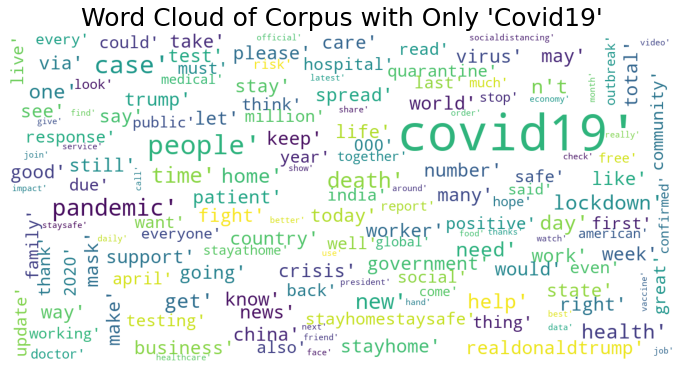

In [18]:
show_wordcloud(corpus_LDA_with_Only_Covid19, "Word Cloud of Corpus with Only 'Covid19'")

We can see above that (as expected) the most common token is 'Covid19' as we have changed all the synonyms into that singular term. The removal of other Covid19 synonyms seems to have made more room for other terms compared to the last wordcloud (in Topic Modeling Book 1). Overall, however, the terms are quite similar to the corpus generated in Topic Modeling Book 1. In terms of countries we can still see 'india' and 'china' but now we also have 'american', representation. The mentions of 'realDonaldTrumpand  'Trump' are still very prominent. As mentioned in Topic Modeling Book 1, this corpus has an American  bias due to filtering  on English Tweets and majority of the English Tweets come from USA. <a href="https://www.statista.com/statistics/242606/number-of-active-twitter-users-in-selected-countries/">The Statista website</a> shows that USA has the highest Twitter presence. Even though the linked data is from January 2021, the presence hasn't changed massively since March/April 2020 (especially when it comes to Enlgish Tweets).

The other prevalent  tags are 'stayhomestaysafe', 'stayhome' or 'stayathome' which were the prevalent views for decreasing the chance of contracting Covid19. Finally, the other major tags include 'spread', 'lockdown', 'mask', 'hospital', 'health', 'testing', 'death' and 'patient' which are all similar to the last corpus in Topic Modeling Book 1.

We have seen an initial analysis of the most frequent terms in our corpus. Now let's continue our evaluation with LDA to conduct Topic Modeling. As discussed earlier, Topic modeling is conducted by describing topics by clustering word patterns which are similar, and counting word frequencies. The model can cluster different words together as it learns the word frequencies and which words are likely to appear in the same document.

### LDA Model 3 and its Visualization

#### Generating Model and Relevant Visualization Objects - Model 3 <a id="5"></a>

As getting the modeling parameters will likely be utilized later as well, we will convert it into a function which outputs the 3 required objects (dic, bow_corpus and lda_model) which can be assigned to variables. This function will be called 'get_lda_objects' and is defined below.

In [19]:
# Import function to get LDA objects (check `scripts/function_name` for details on function)

from scripts/function__get_lda_objects__corpuslistoflists_numberoftopicsinteger.py import *

Let's use the function to get the relevant LDA model and other objects. These are given the suffix 'with_only_Covid19' for ease of clarity.

In [20]:
# Getting the objects and the LDA model using predefined function
lda_model_with_Only_Covid19, bow_corpus_with_Only_Covid19, dic_with_Only_Covid19 = get_lda_objects(corpus_LDA_with_Only_Covid19, 5)

Let's create a function that can automatically plot the the LDA visualization for us. This function will take the 3 outputs of the `get_lda_objects()` function and plot the visualization for us.

In [21]:
# Import function to plot LDA visualisation (check `scripts/function_name` for details on function)

from scripts/function__plot_lda_vis__lda_model_bowcorpus_dic.py import *

The relevant objects are used as variables to plot the LDA visualization below. <a id="6"></a>

In [22]:
plot_lda_vis(lda_model_with_Only_Covid19, bow_corpus_with_Only_Covid19, dic_with_Only_Covid19)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.168649  0.015681       1        1  37.857796
3     -0.033326 -0.153470       2        1  21.430891
4     -0.067092  0.220903       3        1  19.596908
0     -0.076169 -0.097400       4        1  18.161031
1      0.345236  0.014286       5        1   2.953374, topic_info=                      Term           Freq          Total Category  logprob  \
104                   case    6322.000000    6322.000000  Default  30.0000   
2                  covid19  112681.000000  112681.000000  Default  29.0000   
408                  death    5084.000000    5084.000000  Default  28.0000   
191                    new    5337.000000    5337.000000  Default  27.0000   
1815              business    2137.000000    2137.000000  Default  26.0000   
...                    ...            ...            ...      ...      ...   
7033                ecoins      32.482127      33.246360   Topic5  -7.0943   
14003  votebluenomatterwho      32.322937      33.097796   Topic5  -7.0992   
12671                craft      31.910362      32.686028   Topic5  -7.1121   
1550      stayhomestaysafe      74.072496    1998.652721   Topic5  -6.2700   
5842           immigration      37.663117     114.801676   Topic5  -6.9463   

       loglift  
104    30.0000  
2      29.0000  
408    28.0000  
191    27.0000  
1815   26.0000  
...        ...  
7033    3.4990  
14003   3.4985  
12671   3.4982  
1550    0.2270  
5842    2.4077  

[323 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
14930      5  0.987650   110
269        1  0.007785  2020
269        2  0.523929  2020
269        3  0.048267  2020
269        4  0.421167  2020
...      ...       ...   ...
94         1  0.247111  year
94         3  0.061444  year
94         4  0.691243  year
493        2  0.922653  york
493        4  0.077245  york

[523 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 5, 1, 2])

#### Analyzing Topics in Model 3 using PyLDAvis Plot <a id="9"></a>

A brief look at the plot shows that there are 2 well separated topics as well as 3 big topics with some overlap.

We will attempt to classify the topics to see what they reveal in terms of the LDA model competency. For classifying a topic, the topic will be selected on the left panel with the `Slide to adjust relevance metric` (above right panel) set to λ(Lambda) = 0 to see the most relevant words in the corresponding topic (if the Lambda value is changed then it will be mentioned in the explanation). As indicated earlier, some of the lower relevance words may change for the topic when the model is re-run. However majority of the topic terms will be the same.


 - The most salient words in the corpus (default right panel when no topic is selected) are very similar to model 1. Among the top salient terms are 'covid19', 'case', 'death', and 'trump'. It should be noted that the bars of all other terms look small compared to previous models because 'covid19' is present approximately 110,000 times compared to the 40,000 times in the previous models. Other terms included in the top 30 most salient terms are 'pandemic', 'china', 'positive' and 'testing'. We know the model has worked well because if we were to display these words to someone without giving them any context, then they would likely be able to determine that the overall corpus here is related to Covid19.     
 
     
 - Topic 1 (~38% tokens) shows words such as 'realdonaldtrump', 'stay', 'cnn', 'potus', 'gop', 'foxnews', 'republican', 'trump' and 'donald'. These terms point to politics as being the major topic. Within that it is specific to American politics and discussions related to the Reupublican party and Donald Trump. We can classify this topic as 'American Politics'.
 
 
 - Topic 2 (~21% tokens) shows words such as 'case', 'total', 'update', 'confirmed', 'reported', 'official', 'recovered', 'india', 'nigeria', 'pakistan', 'spain', 'highest' and 'france'. These point to a topic where the global Covid19 situation is being discussed. It has the different nations that had high Covid19 case numbers at the time, as well as the relevant words regarding case updates such as 'confirmed' and 'reported'. We can classify this topic as 'Covid19 Spread Updates'.
 
  
  - Topic 3 (~19.5% tokens) shows words such as 'business', 'impact', 'economic', 'company', 'webinar', 'online', 'funding', 'tax', 'financial', 'impacted', 'insurance' and 'sector'. These point to a topic related to businesses and the impact they faced in the pandemic. We can classify this topic as 'Business & Financial Impacts'.

  
- Topic 4 (~18% tokens) shows words such as 'distancing', 'flu', 'wuhan', 'evidence', 'immunity', 'hydroxychloroquine', 'wave', 'lung' and 'herd' which clearly points to the topic of specific scientific and medical discussions related to Covid19. The terms likely relate to social distancing, the discussions of the starting place, as well as evidence and (herd) immunity related to Covid19 and the potential medication options. We can classify this topic as 'Scientific Methodologies to Tackle Covid'.
 
 
- Topic 5 (~3% tokens) shows words such as 'agenda', 'immigration', 'earthday2020', 'basicincome', 'karnataka', 'pune', 'spy', 'governance', 'tesla', 'volume', 'healthyathome' and 'trudeau'. This set of terms seems to be a random mixture of different topics such as politics ('agenda' and 'immigration'), stock market trading ('tesla', 'volume' and 'spy') and places in india ('karnataka' and 'pune'). Therefore it's likely that topic 5 contains words that didn't really fit in anywhere else or were too small to make separate topics of their own (since we limited the number of topics to 5).  We can classify this topic as 'Random'.

#### Evaluating LDA Model 3

This model seems to be better than model 1 which was also made using 5 topics, but with ununified Covid19 synonyms included in the corpus. Let's quantitatively evaluate how well the model has worked for distributing the words related to the topics using the Mixture and Randomness Score (MRS) and coherence score. 

Note: The details behind the MRS can be found in Part3 (Topic Modeling Book 1) under the heading 'Mixture and Randomness Score'.

**Mixture and Randomness Score** <a id="8"></a>

Out of the 5 topics, 4 are well defined and 1 is completely random. The maximum and minimum possible MRS score is calculated below, followed by the actual MRS for Model 3.

In [23]:
# Give a list of the topic randomness in sequence 1 onwards, defined earlier,  which will print them out according to each topic 
trs__model_3 = [0, 0, 0, 0, 1] 
for i, j in enumerate(trs__model_3):
    print(f'The TRS score for topic {i+1} is {j}')

The TRS score for topic 1 is 0
The TRS score for topic 2 is 0
The TRS score for topic 3 is 0
The TRS score for topic 4 is 0
The TRS score for topic 5 is 1


In [24]:
# Calculate the MRS using 1 as the numerator and number of topics in the model as the denominator 
MRS_model_3_min = 1/5

print(f'The minimum possible MRS score for model 3 is: {MRS_model_3_min}')

The minimum possible MRS score for model 3 is: 0.2


In [25]:
# Calculate the MRS using number of topics + 1 as the numerator and number of topics in the model as the denominator
MRS_model_3_max = 6/5

print(f'The maximum possible MRS score for model 3 is: {MRS_model_3_max}')

The maximum possible MRS score for model 3 is: 1.2


In [26]:
# Calculate the MRS score in reference  
MRS_model_3 = (sum(trs__model_3)+1)/len(trs__model_3)

print(f'The MRS score for model 3 is: {MRS_model_3} (in a range between {MRS_model_3_min} - {MRS_model_3_max}).')

The MRS score for model 3 is: 0.4 (in a range between 0.2 - 1.2).


As we can see the MRS indicates that the mixture and randomness of words in topics for model 3 is actually less than model 1.

**Coherence Score** <a id="7"></a>

The `get_coherence()` method can be used on a `CoherenceModel` to determine the model coherency. The coherence model is built using a the original LDA model, corpus used to generate the LDA model and the dictionary formed while generating the LDA model. A function is defined below to compute the coherence score based on these variables. 

In [27]:
# Import function to compute coherence score (check `scripts/function_name` for details on function)

from scripts/function__compute_coherence_score__ldamodel_corpuslistoflists_dic.py import *

Let's use the defined function to get the coherence score for this model.

In [28]:
compute_coherence_score(lda_model_with_Only_Covid19,corpus_LDA_with_Only_Covid19,dic_with_Only_Covid19)

0.47940673219924806

### Model Results Table

| Model Type (name) | Corpus Characteristics   | Number of Topics |  Coherence Score (%)  | Mixture & Randomness Score | Comments   |
|:------:|:------:|:------:|:------:|:------:|:------:|
|  LDA Model 1  |corpus_LDA_with_Covid19_synonyms | 5   |~35.0|0.5 (in a range between: 0.2 - 1.2)| Model seemed to fit well to the corpus however 1 topic lacked specificity leading to the given randomness score.  | 
| LDA Model 2   | corpus_LDA_with_Covid19_synonyms|  20 | ~46.0| 0.625 (in a range between: 0.05 - 1.05) | Some topics showed high specificity however model seemed to overfit to the data. Lot's of small topic clusters with completely random terms. Undesirable even though higher Coherence Score as the MRS also increased.   |
|  LDA Model 3  |corpus_LDA_with_Only_Covid19|  5  | ~47.5|0.4 (in a range between 0.2 - 1.2) |  Changes in preprocessing show more promising results and better topic specificity. This is displayed in the improved MRS score.  Coherence score has increased as well. |



Even with 5 topics the coherence score is now higher than model 2. This shows that our preprocessing steps and Covid19 synonym unification worked well in improving the model coherency.

#### Optimizing LDA Model 3
Let's attempt to find the number of topics leading to the highest coherence score while having the minimum MRS.  Therefore, this time we will carry forward the learning that coherence score alone is not vital but we also need to find a balance by using lower number of topics to avoid overfitting and decrease randomness. We will use a `for` loop to check approximately how many topics give the best result. It should be noted that the number of topics for this part is intentionally kept lower as each model takes a long time to run, especially with higher number of topics. Therefore, the approach used is to gauge the best score using a wide spacing for the number of topics, and then check the closer topic number spacing once we have a clear understanding of approximately which range of topics gives the highest coherence.

The initial range for topics is from 5 to 100 with steps of 25, therefore LDA models and scores will be generated for models with 5, 30, 55 and 80 topics.

In [29]:
# Create empty lists to append to for plotting the number of topics and their coherence scores
topic = []
coherence = []

# Start the for loop with our range
for i in range(5,100,25):
    
    # Use predefined function to generate the relevant objects for creating an LDA model, with the number of topics changing according to our range
    lda_model, bow_corpus,dic  = get_lda_objects(corpus_LDA_with_Only_Covid19, topics=i)
    
    # Use predefined function to generate score using the generated objects and corpus
    score = compute_coherence_score(lda_model, corpus_LDA_with_Only_Covid19, dic)
    
    # Append the number of topics to the relevant list   
    topic.append(i)
    
    # Append the score to the relevant list
    coherence.append(score)

Let's check the number of topics and their corresponding scores by plotting them below.

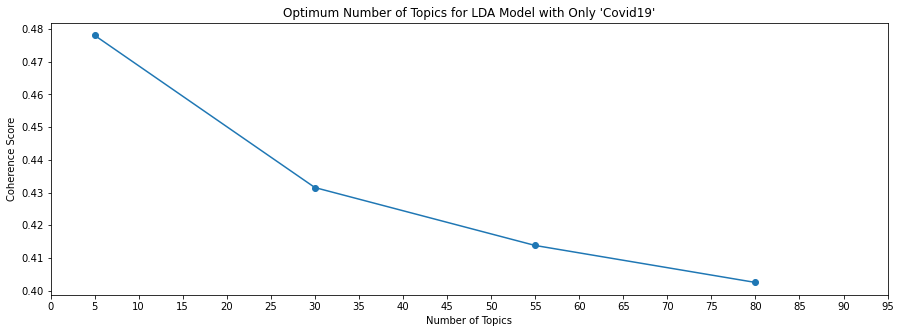

In [30]:
# Instantiate the figure
plt.figure(figsize=(15,5))

# Plot the topics and their coherence scores
plt.plot(topic, coherence, marker='o')

# Get the relevant number of ticks
plt.xticks(np.arange(0,100,5))

# Make the plot more comprehensible
plt.title("Optimum Number of Topics for LDA Model with Only 'Covid19'")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

# Show the plot
plt.show()

We can see that the best scores are around 5 topics and then they decrease. Now let's use a similar `for` loop with a smaller topic spacing near 5 topics to see the best number of topics relating to the highest coherence score. The range for the topics is kept from 4 to 16 with steps of 2, therefore LDA models and scores will be generated for models with  4, 6, 8, 10, 12 and 14 topics.

In [31]:
# Create empty lists to append to for plotting the number of topics and their coherence scores
topic_with_Covid19_synonyms = []
coherence_with_Covid19_synonyms = []

# Start the for loop with our range
for i in range(4,16,2):
    
    # Use predefined function to generate the relevant objects for creating an LDA model, with the number of topics changing according to our range
    lda_model, bow_corpus, dic  = get_lda_objects(corpus_LDA_with_Only_Covid19, topics=i)
    
    # Use predefined function to generate score using the generated objects and corpus
    score = compute_coherence_score(lda_model, corpus_LDA_with_Only_Covid19, dic)
   
    # Append the number of topics to the relevant list
    topic_with_Covid19_synonyms.append(i)
    
    # Append the score to the relevant list
    coherence_with_Covid19_synonyms.append(score)

Let's check the number of topics and their corresponding scores by plotting them below. <a id="11"></a>

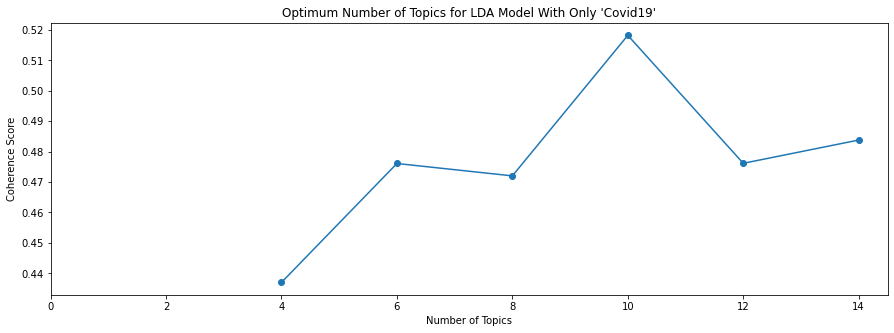

In [32]:
# Instantiate the figure
plt.figure(figsize=(15,5))

# Plot the topics and their coherence scores
plt.plot(topic_with_Covid19_synonyms, coherence_with_Covid19_synonyms, marker='o')

# Get the relevant number of ticks
plt.xticks(np.arange(0,16,2))

# Make the plot more comprehensible
plt.title("Optimum Number of Topics for LDA Model With Only 'Covid19'")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")

# Show the plot
plt.show()

We can see the constant coherence increase from 4 topics to 10 topics before it decreases. Therefore the best balance of topics to coherence scores will be either at 9 or 10 topics. The 10 topics will be plotted first and evaluated to gauge whether it serves our purpose of identifying the topics.  

### LDA Model 4 and its Visualization <a id="4"></a>

Let's get the relevant model and objects for the 10 topic model to plot it. While the variable names (below) are long, they are descriptive. This is necessary to keep track of the different models and the changes made. Below, we will generate the model using the get_lda_objects() function.

In [33]:
# Use the function to create an LDA model with 10 topics
lda_model_with_Only_Covid19_10topics, bow_corpus_with_Only_Covid19_10topics, dic_with_Only_Covid19_10topics = get_lda_objects(corpus_LDA_with_Only_Covid19, 10)

Let's plot the model below. <a id="12"></a>

In [34]:
plot_lda_vis(lda_model_with_Only_Covid19_10topics, bow_corpus_with_Only_Covid19_10topics, dic_with_Only_Covid19_10topics)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.297843 -0.054956       1        1  33.794862
3     -0.255248  0.098362       2        1  19.630049
7     -0.230822  0.066970       3        1  18.239585
8     -0.185891  0.111156       4        1  11.382215
2     -0.123067 -0.274102       5        1   8.099552
0      0.208654  0.018337       6        1   2.456926
5      0.192716  0.015277       7        1   2.196076
6      0.228555  0.009547       8        1   1.555621
4      0.229942  0.005860       9        1   1.499838
1      0.233003  0.003550      10        1   1.145277, topic_info=               Term           Freq          Total Category  logprob  loglift
2           covid19  123455.000000  123455.000000  Default  30.0000  30.0000
104            case    6949.000000    6949.000000  Default  29.0000  29.0000
408           death    5581.000000    5581.000000  Default  28.0000  28.0000
70            trump    3382.000000    3382.000000  Default  27.0000  27.0000
187         support    2945.000000    2945.000000  Default  26.0000  26.0000
...             ...            ...            ...      ...      ...      ...
22183       counted      35.256944      36.129659  Topic10  -6.0651   4.4451
18407  unacceptable      35.165081      36.037818  Topic10  -6.0677   4.4450
10143         islam      35.015856      35.888563  Topic10  -6.0719   4.4449
4683        forcing      34.426638      35.299370  Topic10  -6.0889   4.4445
1967        kag2020      34.288797      35.161520  Topic10  -6.0929   4.4444

[517 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
1905       9  0.983368     'the
269        1  0.140355     2020
269        2  0.095499     2020
269        3  0.714074     2020
269        4  0.002170     2020
...      ...       ...      ...
382        4  0.040254    would
382        5  0.181822    would
5202       8  0.986999    write
10523     10  0.994175  wwg1wga
493        3  0.999159     york

[798 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 8, 9, 3, 1, 6, 7, 5, 2])

#### Analyzing Topics in Model 4 using PyLDAvis Plot <a id="15"></a>

A brief look at the plot shows that there are 5 bigger topic bubbles and a cluster of 5 smaller topic bubbles.

We will attempt to classify the topics to see what they reveal in terms of the LDA model competency. For classifying a topic, the topic will be selected on the left panel with the `Slide to adjust relevance metric` (above right panel) set to λ = 0 to see the most relevant words in the corresponding topic (if the Lambda value is changed then it will be mentioned in the explanation). As indicated earlier, some of the lower relevance words may change for the topic when the model is re-run. However majority of the topic terms will be the same. 


 - The most salient words in the corpus (default right panel when no topic is selected) are same as model 3. Among the top salient terms are 'case', 'death', 'trump' and 'covid19'. As with the last model the bars of all other terms look small because 'covid19' is present approximately 110,000. Other terms included in the top 30 most salient terms are 'business', 'patient', 'help', 'china', 'american', 'lockdown' and 'stayhomestaysafe'. As with model 3, we know the model has worked well because if we were to display these words to a someone without giving them any context, then they would likely be able to determine that the overall corpus here is related to Covid19. 
     
     
 - Topic 1 (~34% tokens) shows words such as 'thing', 'love', 'god', 'quarantinelife', 'book', 'wish', 'loved', 'beautiful', 'feeling', 'earth', 'exercise', 'enjoy', 'fun' and 'faith'. This is the first time we have seen such a coherent set of terms that may be pointing to the positive aspects of the quarantine. The topic seems to be focused on having 'faith' in 'god', having 'fun', exercising, reading a 'book' and making the most of the 'quarantinelife'. It should be noted that 'quarantinelife' was a hashtag trending  globally, and moreso in India, to show the positive aspects of working from home and learning new skills or exercising during the quarantine. The most frequent term is 'thing' which seems random, however the term 'little' is also quite high in the frequency and it may be that the phrase 'little things' was used to show the small positive aspects of the Covid19 lockdown. We can classify this topic as 'Quarantine Silver Lining'.
 
 
 - Topic 2 (~19.5% tokens) shows words such as 'business', 'impact', 'resource', 'fund', 'webinar', 'industry', 'tax', 'relief', 'financial' and 'insurance'.  These point to a topic related to businesses and the impact they faced in the pandemic. We can classify this topic as 'Business and Financial Impacts'.
 
  
  - Topic 3 (~18.5% tokens) shows words such as  'total', 'number', 'confirmed', 'reported', 'recorded', 'update', 'georgia', 'lagos', 'mumbai', 'nigeria', 'spain', 'france' and 'mortality'. These point to a topic where the global Covid19 situation is being discussed. It has representations of different nations that had high Covid19 case numbers at the time as well as the relevant words regarding case updates such as 'confirmed' and 'reported'. We can classify this topic as 'Covid19 Tracking'. 
  
  
- Topic 4 (~11% tokens) shows words such as 'vaccine', 'treatment', 'disinfectant', 'study', 'drug', 'scientist', 'lab', 'evidence', 'immunity', 'hydroxychloroquine', 'remdesivir', 'develop', 'medicine' and 'clinical' which clearly points to the topic of specific scientific and medical discussions related to Covid19. The terms relate to steps that are taking place in the medical community to fight Covid19. Essentially the development and testing of potential medicines such as 'hydroxychloroquine' and 'remdesivir'. We can classify this topic as 'Covid19 Medical Advances'. 
 
 
- Topic 5 (~8% tokens) shows words such as 'trump', 'realdonaldtrump', 'america', 'president', 'cnn', 'briefing', 'fakenews', 'foxnews', 'hoax',  'republican',  and 'donald'. This set of terms clearly indicates the discussions of the American politics. This specific topic seems to show the topics related to Donald Trump (Republican president of USA at the time of collection of the Tweets) and the Republican Party. We can classify this topic as 'USA Republican Politics'. 


- Topic 6 (~2.5% tokens) shows words such as 'social', 'distancing', 'narendramodi', 'pmoindia', 'easter', 'football', 'smile', 'washingtonpost', 'workout', 'crowd',  'sustainable',  and 'manager'. The top terms in this set indicate to Indian politics but then the terms rapidly increase in randomness. Therefore the topic seems to be a little more random than the ones analyzed earlier. We can classify this topic as 'Indian Politics w/ Randomness' ('w/' stands for 'with'). 


- Topic 7 (~2% tokens) shows words such as 'deliver', 'urge', 'copy', 'debt', 'signing', 'joebiden', 'justintrudeau', 'senator', 'voter', 'premier',  'studentdebtstimulus',  and 'cancelstudentdebt'. This set of terms is another topic pointing to politics. However, it's really interesting to see that within politics this set of terms is discussing more of the Democratic side of USA and mentions of some Canadian politics. We can classify this topic as 'USA Democratic and Canadian Politics'. 


- Topic 8 (~1.5% tokens) shows words such as 'taiwan', 'totally', 'housing', 'tired', 'togetherathome', 'trumppressconference', 'realestate', 'hardest', 'imf' and 'novadairy'. This set of terms is again quite random as it has Taiwan, American politics ('trumppressconference'), industries ('realestate') and the name of an Indian dairy brand ('novadairy') all encompassed in one. Even higher Lambda values don't give a good representation of the topic from a global corpus perspective as the terms within the topic are a very small part of the global corpus. It is safe to say that this topic consists of terms that were not big enough to form their own topics and are hence completely random. We can classify this topic as 'Random 1'.   


- Topic 9 (~1.5% tokens) shows words such as 'solidarity', 'violence', 'domestic', 'protesting', 'tuesdayvibes', 'entertainment', 'wellness', 'happiness', 'saudi', 'activist',  'irish',  and 'consideration'. The top terms in this topic are about issues that were happening due to the lockdown ('domestic' and 'violence') and related to protests and activism. However, like the other smaller topics, this topic also disintegrates into a more random conclusion. We can classify this topic as  'Negative Lockdown Aspects'. 


- Topic 10 (~1% tokens) shows words such as 'agenda', 'qanon', 'immigration', 'wwg1wga', 'detention', 'upcoming', 'hospitality', 'russian', 'unacceptable', 'islam', 'ordering',  and 'hiring'. The top terms in this topic are about QAnon, and other consipiracy theories however, again like the other smaller topics, this topic also disintegrates into more random terms. Even higher Lambda values don't give a good representation of the topic from a global corpus perspective as the terms within the topic are a very small part of the global corpus. We can classify this topic as 'American Conspiracy Theories'. 

Overall this model has the highest coherence score and contains some really well segregated topics. Furthermore, this is the first model where there was a topic related solely to the 'silver lining' of the pandemic lockdown. Essentially, discussion of the potential positive aspects of being in a lockdown. However, there are 3 clusters of smaller topics in this model which suffer from lack of specificity. They start out with a very specific topic, however pan out to include less relevant terms.  


#### Evaluating LDA Model 4

This model seems to be better than model 3. Let's quantitatively evaluate how well the model has worked for distributing the words related to the topics using the MRS and coherence score. 

**Mixture and Randomness Score** <a id="14"></a>

Out of the 10 topics, 6 are well defined, 3 start off well but disintegrate into randomness and 1 is completely random. The maximum and minimum possible MRS score is calculated below, followed by the actual MRS for Model 4.

In [35]:
# Give a list of the topic randomness in sequence 1 onwards, defined earlier,  which will print them out according to each topic 
trs__model_4 = [0, 0, 0, 0, 0, 0.5, 0, 1, 0.5, 0.5] 
for i, j in enumerate(trs__model_4):
    print(f'The TRS score for topic {i+1} is {j}')

The TRS score for topic 1 is 0
The TRS score for topic 2 is 0
The TRS score for topic 3 is 0
The TRS score for topic 4 is 0
The TRS score for topic 5 is 0
The TRS score for topic 6 is 0.5
The TRS score for topic 7 is 0
The TRS score for topic 8 is 1
The TRS score for topic 9 is 0.5
The TRS score for topic 10 is 0.5


In [36]:
# Calculate the MRS using 1 as the numerator and number of topics in the model as the denominator 
MRS_model_4_min = 1/10

print(f'The minimum possible MRS score for model 4 is: {MRS_model_4_min}')

The minimum possible MRS score for model 4 is: 0.1


In [37]:
# Calculate the MRS using number of topics + 1 as the numerator and number of topics in the model as the denominator
MRS_model_4_max = 6/5

print(f'The maximum possible MRS score for model 4 is: {MRS_model_4_max}')

The maximum possible MRS score for model 4 is: 1.2


In [38]:
# Calculate the MRS score in reference  
MRS_model_4 = (sum(trs__model_4)+1)/len(trs__model_4)

print(f'The MRS score for model 4 is: {MRS_model_4} (in a range between {MRS_model_4_min} - {MRS_model_4_max}).')

The MRS score for model 4 is: 0.35 (in a range between 0.1 - 1.2).


This is great! It's the lowest MRS we have received till now. 

**Cohenrence Score** <a id="13"></a>

Let's evaluate the exact coherence score of the model. 

The predefined `compute_coherence_score` will be used to get the coherence score for the model. 

In [39]:
compute_coherence_score(lda_model_with_Only_Covid19_10topics, corpus_LDA_with_Only_Covid19, dic_with_Only_Covid19_10topics)

0.5081218639891195

### Model 3 and 4  Conclusions 

A [corpus](#1) was generated using Tweet preprocessing where all words were made lowercase, `stopwords` were removed followed by tokenization and lemmatization of the text. Furthermore, the `links`, `&amp`, `dashes` and `dots` [were removed](#2) and all the [Covid19 synonyms were unified](#3). A [WordCloud was generated](#4) which showed the most frequently occurring token in the corpus as 'covid19', which is the term used to unify the Covid19 synonyms. There were other representations such as:
 - Countries: 'india' and 'china'
 - People: 'trump', 'realdonaldtrump'
 - Most Discussed Topics: 'lockdown', 'mask', 'spread' and 'testing'
These are indicative of the Covid19 related topics being discussed in March/April 2020 and are all similar to the last corpus in Topic Modeling Book 1.

The Topic Modeling for models 3 and 4 was conducted using the same corpus (explained above):

 - [Model 3](#5) was generated using 5 topics which all showed moderate separation and good individuality while the topic terms displayed a really good relationship amongst them. Using [pyLDAvis to analyze the topics](#6) showed a good individuality with topics which were easy to comprehend as reflected by a [coherence score of ~47.5%](#7).  This is over 10% improvement from our earlier model with 5 topics (model 1). The [Mixture and Randomness Score (MRS) for model 3 was 0.4](#8) (in a range between 0.2 - 1.2). This was also lower than model 1 showing less randomness. The different topics indicated [discussions of](#9):
     - American Politics;
     - Covid19 Spread Updates 
     - Business & Financial Impacts
     - Scientific Methodologies to Tackle Covid
     - Random
     

- [Model 4](#10) was generated after finding the [optimum number](#11) of topics that would give the highest coherence score. This was chosen while keeping in mind that a balance of coherence score and number of topics is required to maintain a low MRS. This resulted in a [model with 10 topics](#12) and a [coherence score of ~51.5%](#13), which was an improvement of another 4% over Model 3! The [MRS was also the lowest](#14) of all the models at 0.35 (in a range between 0.1 - 1.2). The increase in the number of topics gave a better representation to most topics, and some of the smaller topics were able to identify underlying obscure discussions. There was 1 completely random topic still present which showed that even the best models cannot classify everything. The different topics indicated [discussions of](#15):
     - Quarantine Silver Lining
     - Business and Financial Impacts
     - Covid19 Tracking
     - Covid19 Medical Advances
     - USA Republican Politics
     - Indian Politics w/ Randomness
     - USA Democratic and Canadian Politics
     - Random
     - Negative Lockdown Aspects
     - American Conspiracy Theories



### Model Results Table
| Model Type (name) | Corpus Characteristics   | Number of Topics |  Coherence Score (%)  | Mixture & Randomness Score  | Comments   |
|:------:|:------:|:------:|:------:|:------:|:------:|
|  LDA Model 1  |corpus_LDA_with_Covid19_synonyms | 5   |~35.0|0.5 (in a range between: 0.2 - 1.2)| Model seemed to fit well to the corpus however 1 topic lacked specificity leading to the given randomness score.  | 
| LDA Model 2   | corpus_LDA_with_Covid19_synonyms|  20 | ~46.0| 0.625 (in a range between: 0.05 - 1.05) | Some topics showed high specificity however model seemed to overfit to the data. Lot's of small topic clusters with completely random terms. Undesirable even though higher Coherence Score as the MRS also increased.   |
|  LDA Model 3  |corpus_LDA_with_Only_Covid19|  5  | ~47.5|0.4 (in a range between 0.2 - 1.2) |  Changes in preprocessing show more promising results and better topic specificity. This is displayed in the improved MRS score.  Coherence score has increased as well. |
| LDA Model 4  | corpus_LDA_with_Only_Covid19| 10  | ~51.5 |0.35 (in a range between 0.1 - 1.2) |Topics showed high specificity however there is a small overfit to the data. First model with a specifically 'positive' point of view for Covid19. The smaller clusters are still quite coherent in the beginning but then increase in randomness. |


#### Generating Topic Word Clouds

Now that we have our results from the final model, we can display the topics as word clouds. However it should be noted that the word clouds displayed for each topic are from the perspective of the overall corpus. On the pyLDAvis plot, this is equivalent of selecting the topic but viewing it with the `Slide to adjust relevance metric` (above right panel) set to λ = 1. If we recall from the last notebook:
 - Higher Lambda values (towards right side of the slider) relate to words that have *high relevance in the overall corpus while being present in the selected topic*. 

This means that the larger words in the wordcloud will not necessarily be representative of the top words from the topic. However let's still make the word cloud as it's a great tool to succinctly present the results for most of our topics. We will start by creating a dataframe which contains the top 50 words from each topic, corresponding with the topic number. 

In [40]:
# In this code the first part is getting the term and its weightage in the lda_model topic for the top 50 words and n topics
# the second part is defining that n topics is in the range from 0 to the total number of topics in the lda_model
topics = [[(term, round(weight, 3)) for term, weight in lda_model_with_Only_Covid19_10topics.show_topic(n, topn=50)] for n in range(0, lda_model_with_Only_Covid19_10topics.num_topics)]

Let's check what each topic has come out as below.

In [41]:
for i in topics:
    print(i,'\n')

[('social', 0.045), ('distancing', 0.026), ('narendramodi', 0.014), ('stayhomestaysafe', 0.012), ('pmoindia', 0.01), ('easter', 0.01), ('indiafightscorona', 0.005), ('football', 0.004), ('smile', 0.004), ('india', 0.003), ('washingtonpost', 0.003), ('manager', 0.003), ('edition', 0.003), ('socialdistancing', 0.003), ('distance', 0.003), ('indian', 0.003), ('medium', 0.003), ('modi', 0.003), ('happy', 0.003), ('workout', 0.003), ('beauty', 0.003), ('crew', 0.002), ('size', 0.002), ('2021', 0.002), ('league', 0.002), ('physicaldistancing', 0.002), ('winning', 0.002), ('crore', 0.002), ('drharshvardhan', 0.002), ('origin', 0.002), ('bought', 0.002), ('sustainable', 0.002), ('reflect', 0.002), ('flower', 0.002), ('socialdistanacing', 0.002), ('4th', 0.002), ('arvindkejriwal', 0.002), ('path', 0.002), ('argument', 0.002), ('smell', 0.002), ('handwashing', 0.002), ('lakh', 0.002), ('mohfw_india', 0.002), ('fight', 0.002), ('matt', 0.002), ('host', 0.002), ('registration', 0.002), ('poem', 0.

We can see that the first set of 50 terms (first topic) has words such as 'narendramodi', 'pmoindia', 'india' and 'mohfw_india' which, as we saw in the earlier topic naming, refers to the topic we coined 'Indian Politics w/ Randomness'. This way we can find out each topic in 'topics' and name the columns accordingly while creating a dataframe for the word cloud generation. This is done below.

In [42]:
# Match the relevant terms to the topic name and create a list of topic names
topic_names =  ['Indian Politics w/ Randomness', 'American Conspiracy Theories', 'USA Republican Politics', 'Business and Financial Impacts', 'Negative Lockdown Aspects', 'USA Democratic and Canadian Politics', 'Random', 'Covid19 Tracking', 'Covid19 Medical Advances', 'Quarantine Silver Lining']

# Create the dataframe by joining the terms in 'topics' using a comma and turning the index into the topic_names
topics_df = pd.DataFrame([', '.join([term for term, weight in topic]) for topic in topics], columns = ['Terms per Topic'], index=[topic_names] )

Let's check the dataframe below.

In [43]:
# Showing the topics_df
topics_df

Terms per Topic
Indian Politics w/ Randomness         social, distancing, narendramodi, stayhomestay...
American Conspiracy Theories          qanon, immigration, agenda, wwg1wga, healthyat...
USA Republican Politics               covid19, trump, realdonaldtrump, china, americ...
Business and Financial Impacts        covid19, pandemic, help, health, business, sup...
Negative Lockdown Aspects             solidarity, men, violence, domestic, woman, pr...
USA Democratic and Canadian Politics  support, official, deliver, delivered, last, c...
Random                                taiwan, togetherathome, totally, club, housing...
Covid19 Tracking                      covid19, case, death, new, total, number, lock...
Covid19 Medical Advances              covid19, patient, testing, vaccine, test, viru...
Quarantine Silver Lining              covid19, people, n't, time, get, home, lockdow...

We can now plot the word clouds below. As we are using specific settings to plot the word clouds, we will not be using the function defined earlier in the notebook. 

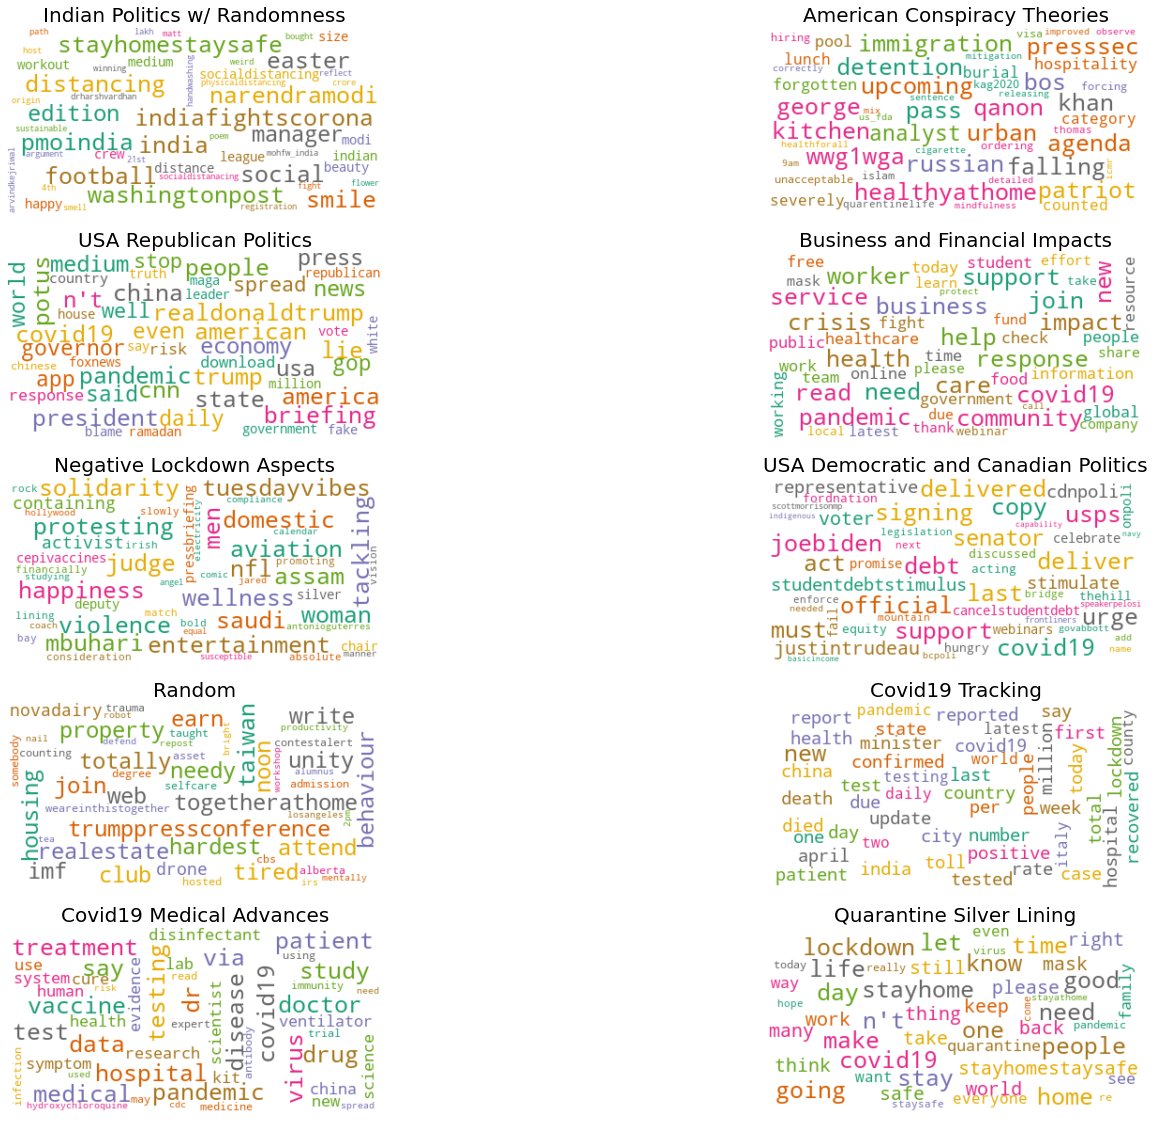

In [44]:
# Initiate wordcloud object
wc = WordCloud(background_color="white", colormap="Dark2", max_font_size=25, random_state=13)

# Set the figure size
plt.rcParams['figure.figsize'] = [25, 20]

# Create subplots for each topic
for i in range(10):
    
    #Use the wc to generate the word clouds 
    wc.generate(text=topics_df["Terms per Topic"][i])
    
    # Create a subplot for each word cloud location
    plt.subplot(5, 2, i+1)
    
    #Show the word cloud
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    
    # Define the title using the index of topics_df 
    plt.title(topics_df.index[i][0], size=20)

plt.show()

We can see that majority of the topics are well displayed in the word clouds. The 'Business and Financial Impacts' and 'Quarantine Silver Lining' word clouds seem less representative of the topics. However, they do still contain relevant words such as 'worker', 'company', 'global' and 'impact' in the former and 'good', 'love' and 'family' in the latter. 


# Conclusions

The Covid19 pandemic swept across the world starting in March 2020 and continuing throughout the time this report was generated in June 2021.This is the first time that the world not only saw a lot of fear, grief and sadness but also some of the best solidarity amongst the global citizens. This project analyzed Twitter data from the first major surge of global Covid19 cases, in March/April 2020. It conducted Topic Modeling using the Latent Dirichlet Allocation (LDA) model, and generated a summary list of topics discussed by the mass English speaking Twitter users.

Kaggle was used to source the Twitter data which contained Tweets from 29th March 2020 - 30th April 2020. The data consisted of all Tweets from users who used the following hashtags: `#coronavirus`, `#coronavirusoutbreak`, `#coronavirusPandemic`, `#covid19`, `#covid_19`, `#epitwitter`, `#ihavecorona`. It should be noted that from 11 April onwards, two additional hashtags, namely `#StayHomeStaySafe`, `#TestTraceIsolate`, were also added into the Tweet collection set. 

In the first part, the report started by importing the dataset and exploring the basic characteristics of it. After understanding the basic characteristics of the imported data by cleaning the data which primarily consisted of removing duplicates and null values. The next step saw the Exploratory Data Analysis (EDA) to understand the final cleaned dataset where some statistical exploration was done which assisted identifying the trends behind Tweet propagation as well as data structure and content. The EDA assisted with creating a 'subset dataset' that was more manageable for the scope of our project.

In the second part of the report, we used the exported 'subset dataset' for conducting EDA of the texts within the Tweets. The majority of the Tweets comprised of 15-35 words (100-280 characters) with a long tail where they extended to upwards of 90 words (850 characters). These outliers were found to be Tweets where the number of 'mentions' was high and contained website link(s) that were shared.

In the text EDA, after stopword removal, the most common tokens were found to be synonyms of Covid19, `&amp` and `people`. Furthermore bigram analysis showed high occurrence of hyperlinks indicated by `https`. The EDA concluded that removal of `stop words`, `links`, `&amp`, `dashes`, `mentions` and `dots` was necessary for a Topic Modeling. 

In the modeling workflow the optional hyperparameters (`alpha` & `eta`) were not usable since they require a-priori knowledge about the number of topics expected or word probability. Therefore, we changed the input data preprocessing methodology and number of topics as methods to yield improved results. The model efficacy was evaluated using 2 methods. The first method, Model Coherence Score, evaluates the degree of semantic similarity between high scoring words in the topic. However, since coherence score doesn't gauge the randomness of words within each topic, the author devised an evaluation method called Mixture & Randomness Score (MRS). The MRS evaluates using the amount of random words in the top 30 terms associated with the topic. 

For models 1 & 2 a corpus was generated using Tweet preprocessing where the `stopwords` were removed and the text tokenized & lemmatized. Furthermore, the `links`, `&amp`, `dashes` and `dots` were removed while the Covid19 synonyms were left in place. The use of PyLDAvis interactive visualization proved to be an excellent tool for analyzing and determining topics. Model 1 was generated using 5 topics which all showed moderate separation and individuality while the topic words displayed a good relationship amongst them. Model 2 was generated after finding the optimum number of topics (20) using coherency as a measure. While the increase in the number of topics gave a better representation to some topics, it also caused overfitting of the model leading to clustering of small topics with high randomness. 

Lessons learnt from models 1 & 2 were used to change the preprocessing methodology to improve models 3 & 4, wherein the corpus was generated with additional steps of converting all words to lowercase while unifying all the Covid19 synonyms. Model 3 was generated using 5 topics which all showed moderate separation and good individuality while the topic terms displayed a really good relationship amongst them. Similar to Model 2, the Model 4 was generated after finding the optimum number of topics that would give the highest coherence score. This was chosen while keeping in mind that a balance of coherence score and number of topics is required to maintain a low MRS. The resulting model had the highest Coherence score with the lowest MRS compared to all previous models. The increase in the number of topics gave a better representation to most topics, and some of the smaller topics were able to identify underlying obscure discussions. There was 1 completely random topic still present which showed that even the best models cannot classify everything. 

In the final model, the different topics indicated discussions of:
 - Quarantine Silver Lining
 - Business and Financial Impacts
 - Covid19 Tracking
 - Covid19 Medical Advances
 - USA Republican Politics
 - Indian Politics w/ Randomness
 - USA Democratic and Canadian Politics
 - Random
 - Negative Lockdown Aspects
 - American Conspiracy Theories

The final table of results is given below for consideration.

### Model Results Table
| Model Type (name) | Corpus Characteristics   | Number of Topics |  Coherence Score (%)  | Mixture & Randomness Score  | Comments   |
|:------:|:------:|:------:|:------:|:------:|:------:|
|  LDA Model 1  |corpus_LDA_with_Covid19_synonyms | 5   |~35.0|0.5 (in a range between: 0.2 - 1.2)| Model seemed to fit well to the corpus however 1 topic lacked specificity leading to the given randomness score.  | 
| LDA Model 2   | corpus_LDA_with_Covid19_synonyms|  20 | ~46.0| 0.625 (in a range between: 0.05 - 1.05) | Some topics showed high specificity however model seemed to overfit to the data. Lot's of small topic clusters with completely random terms. Undesirable even though higher Coherence Score as the MRS also increased.   |
|  LDA Model 3  |corpus_LDA_with_Only_Covid19|  5  | ~47.5|0.4 (in a range between 0.2 - 1.2) |  Changes in preprocessing show more promising results and better topic specificity. This is displayed in the improved MRS score.  Coherence score has increased as well. |
| LDA Model 4  | corpus_LDA_with_Only_Covid19| 10  | ~51.5 |0.35 (in a range between 0.1 - 1.2) |Topics showed high specificity however there is a small overfit to the data. First model with a specifically 'positive' point of view for Covid19. The smaller clusters are still quite coherent in the beginning but then increase in randomness. |



This workflow has shown that one can successfully utilize Topic Modeling with Twitter data to identify the main topics of discussion. This has a lot of utility as it can summarize the 1000's of Tweets into separate, comprehensive, identifiable topics within a small time frame. Similar approaches have been used to identify the degree of severity of Covid19 using the <a href="https://www.jmir.org/2021/3/e23272">speed and velocity Tweet generation</a>. They have also attempted to get a sentiment about Covid 19 or conduct  <a href="https://www.jmir.org/2020/5/e19458">network analysis</a> for the Tweets. However, there isn't any product found which took an in-depth look at the topics being discussed in order to summarize them.


Examples of its use can be for government entities, influencers and promoters who get thousands of Tweets related to their policies or products. Using this workflow they can automatically get to know a summary of the mass opinions being shared, to better cater to their audience. This MVP can be custom tailored for, and scaled to the specific requirements of individuals, entities or organizations depending on their requirements. Once tailored, it can result in a quicker turn around time to track the trending opinions in more detail. In the future the project aims to use a bigger dataset leveraging cloud computing and testing out other modeling types such as LDA Mallet. Other prepocessing steps will also be tested such as using TF-IDF instead of Bag of Words.